In [562]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

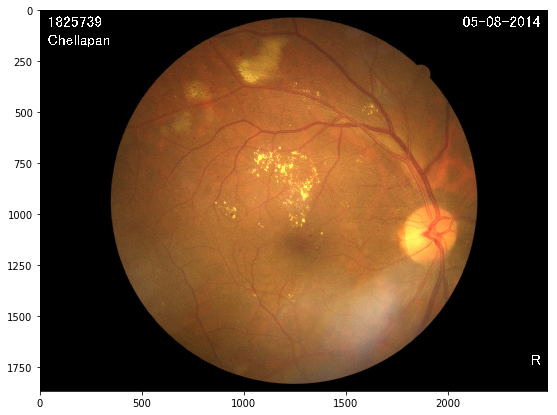

In [567]:
img = cv.cvtColor(cv.imread("image2.jpg"),cv.COLOR_BGR2RGB)
plt.imshow(img)

### 1. Loading Image - RGB or Grayscale
### 2. Extract Green Channel 
### 3. Applying CLAHE (Only over single channel, green or gray)

In [375]:
def loadImage(filename, gray=False):
    
    plt.title("Loaded Image");
    
    if(gray):
        img = cv.imread(filename,0)
        plt.imshow(img, cmap='gray')
    else:
        img = cv.imread(filename)
        plt.imshow(img)
        
    return img

def applyClahe(img):
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    claheimg = clahe.apply(img)
    plt.title("CLAHE on GrayScale/Greenscale Image")
    plt.imshow(claheimg,cmap='gray')
    
    return claheimg

def greenChannel(img):
    greenImage = img[:,:,1]
    
    plt.title("Green Channel Image")
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAa4AAAGrCAYAAACYOHMpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzsvVusbWl23/Ub323Otfc5da/urqq+uS+O2w3xNTGOErDAJCZKFHiJgIcYC3CERC5CKI6RCIYHEhACJeIBDAmEuxwZJY4EhETKQ14cJ3aIHdtxu9337nJfXN1d55y95vwuY/Aw5t616+ScOpc6dapO1fwfLZ215219a661vvGNMf7jP8TM2LFjx44dOx4VhDd7ADt27NixY8e9YDdcO3bs2LHjkcJuuHbs2LFjxyOF3XDt2LFjx45HCrvh2rFjx44djxR2w7Vjx44dOx4p7IZrx44HDBH5ARH5wsM+d8eOdwp2w7XjHQUR+YyI/OCbPY77hYiYiHzkzR7Hjh1vJnbDtWPHjh07HinshmvHjg0i8m+LyCdF5CUR+RkRef7Svj8vIp8XkZdF5OdF5Pdc2ncQkf9RRL4uIr8C/I6brvu8iPy0iHxVRD4tIn/8bs+9w3h/QkT+ioj8LyJyTUR+SUS+VUR+XES+so339146/kdE5Fe3Yz8lIn/0puv9KRF5UUS+JCL/1mXvTkQmEfkvRORzIvJlEflvRORwL/d3x44Hhd1w7dgBiMg/D/xZ4A8DzwGfBf6PS4f8PeA7gaeA/w34KyIyb/v+I+DD2+P3AT986boB+OvAPwReAP4F4E+KyO+707l3iT8I/M/Ak8A/AP4G/rt+AfhPgP/20rFfAf4A8BjwI8B/JSLfvY3zh4B/D/hB4CPAD9z0On8O+NbtHnxku/6fucex7tjxYGBm+2N/vGMewGeAH7zF9r8I/OeX/r4CNOCDt7nO14Hv2J5/CvihS/t+FPjC9vz7gM/ddO6PA//Dnc69zesa8JHt+U8Af/PSvj8IXAfi9vfV7fgnbnOtvwr8ie35XwL+7KV9Hzl/LUCAG8CHL+3/fuDTb/bnuT/emY/0AGzfjh1vBzwP/ML5H2Z2XUR+C/csPiMi/z7wb27HGe61PHPp3M9futZnLz3/APC8iHzj0rYI/J27OPdu8OVLz4/A18xsXPob3Ah/Q0T+JdzD+1bcKzsBfunSOP7+pWtdHtOz27E/LyLn22R7Hzt2PHTshmvHDseXcCMDgIicAk8DX9zyWX8KD/P9spmpiHwdn7wBXgTeB/zy9vf7L13387hn8tHbvO5rnfvAICIT8NPAHwH+mpk1EfmrvPo9vPfSKe+79PxruBH8uJl98Y0Y344d94I9x7XjnYgsIvOlRwL+d+BHROQ7t0n+PwX+rpl9Bg+5deCrQBKRP4N7XOf4KeDHReRJEXkv8Mcu7fs54JqI/NhGxIgi8k+JyO+4i3MfJAowbe+hb97X7720/6fw9/8xETkB/sPzHWamwH+H58TeBSAiL1zK0+3Y8VCxG64d70T8X7gHcf74CTP7W/hk/dO49/Fh4F/djv8bwP8DfAIP5S28OpT2H2/bPw38vzhZAoAtbPcHcFLDp3Hv5b8HHr/TuQ8SZnYN+OO4gfo68K8DP3Np//8N/AXgbwOfBH5227Vu///Y+XYReRn4W8BveyPGumPHnSBmeyPJHTt2vBoi8jHgHwGTmfU3ezw7dlzG7nHt2LEDABH5V7Z6rSeB/wz467vR2vFWxEM3XCLyQyLya1uh559+2K+/Y8eO2+KP4rVevwEM4N95c4ezY8et8VBDhSIS8TzBvwh8AS/q/NfM7Fce2iB27NixY8cjjYftcf1O4JNm9ikzq7gywR96yGPYsWPHjh2PMB52HdcLvJqN9QVcWeACIvKjuHoAwPc8pHHt2LFjx443H18zs2fvdNBbrgDZzH4S+EnwFg5v8nB27NixY8fDw10pxzzsUOEXeXVF/nu3bTt27NixY8dd4WEbrr8HfFREvkVECl7g+TN3OGfHjh07duy4wEMNFZpZF5F/F1ciiMBfMrNfvsNpO3bs2LFjxwXe0soZe45rx44dO95R+Hkz+947HfTIKmfcrk/L7Y6703Xud/9rHXM35+7YsePtj3udC243nzyI678R135QY7tbPLKG625w+Wbd6cO6n/13u303YDt2vHNxN/PIzcdf6nv2wK9/+dqX56ZbzVOvdx6717HdLd5ydPi7xc0f7O1ueAjhVR7Z+Xnn+y//bWavOv7mD/j1jHE3XDt2vHNxPq/AaxumW+27kzdzL/PMra5/u/NvniNvdf07je3y+beaV+8Xb2uPC177S3K+XUQuHrfDrfbf7tqq+jpGvGPHjrcLLhurO+G15qn79cBu3n4317n8eiH8kybi8vXvZt58I/DIely3wmutYm6Hmz+Ee91/K9z8Ye/e1o4dOy7jVkZEVd+wif52uJU39aDCe7cyeg/q/b3tPa6bcfMHdXnFcDPJ4+b9l3G3q5dbuds7dux4Z+Bewn73i7uZi+52vrqVsblfvFH5LXibGK7XitveLrd1+Zjb4Xae072yd3ajtWPHOxt3yu/cb+7n/BxVfV35o/Nz3yjDCg92HnxbhQpvxv2SI84/wHulgD6oxOOOHTvePrjVnHDzovj1zBu3mucuG6E7zUtvZCrjjVq8vy08rlvhbhgst/vA7oXMcfnY24Uhd2O2Y8c7F7cKmd2JvXe3uEwEuzw/3avRuhd+wN2O8zKz+0HjkTdcd+MV3erDudXNvzmceP6luNf6hXuhjO7YsePtidtFfF4rrXE/r3F+3hjjns69k9G6OfL0esf3IPHIhgov35DbGaHbGa27ucbN59/PquFmr2/3vHbseOfg5rDd7Wq0Ltd43Stea567VwLZzdcFblvXerd4PR7ba+GRNVx3417fbc3C6zn/VsftBmrHjh2Xcaf0wxtxjTtd+37nt7s95o2cBx/5UOGOHTt27HhnYTdcO3bs2LHjkcJuuHbs2LFjxyOF3XDt2LFjx45HCrvh2rFjx44djxR2w7Vjx44dOx4p7IbrTcA7hS6/F17v2LHjjcAjW8f1KOKNFLJ8kDhvr3D+eC3lkActGrpjx44dd8JuuHa8CreTq7rbJpo7duzY8UZjDxXueODYjdqOHTveSDzSHte9aBHefMzNnsWtNL7u51z4JzuZ3kqLTEQuRHxvDsndqoHl7cb0Wq91p/dxM86Pv1Mn1juFOm/nnd08jvvpLr1jx44dj7zHFUK4EMC93WR/uy6kN3c/vvmYW+2/LD55q33nopmvdW3gVUbr/Jjz1zx/P68VtrtVi5XL173d+7h5/2td+7VwL20QbjWO293fHTt27LgTHlmP625ah9yN+OT9kA4u/38ro3CnBpOvpUh/q3Fcvt7tGtDdzfu4EzHk9Xo9rxUifK3tjwJhZceOHW8dPLKG6+ZmafeC1ztJ3irMdadeX5df+3YT/M0G6rwd92td91bn3Ctudx9v14bhTte5n9fesWPHjrvFI2u4Ludj4N69hbvxuu7m/HPjcrt+XjfjPJR4/vx2oci7wevpnHoZN+fg7qbB3K3GsuepduzY8TDwSOe4bjXx3wqvh2hwq+Nv5QXdnK+5nRdzc6jvdiHO+wlh3q/nuXs9O+4b+1plx5uAR9pw3YqMcSvcjtF3tx7LrQzVzYzGm691N11DbxVeNLPbsvpux8R7UJ7XnXAn4sWDuNaO14eH/oPeP8YdbwIe2VDhZdzNBH7zttuRHO712Ncaz91sf63XvZu82b2e83oYg/e6/Xb773dcDxOPKmHk3jOcO3Y8enhkDdfNE8ueY7l3vPn3S7jyzAc5PPE+5vkxWlUkGGLK4fSUpQ8foxghgrZODpmBMbQSRcD8e5BKofdOG35sksQY41XvU4EYI6M1xhiUUhhjvFJOoYYK2FaSMGgENUwECZEoidoaOaULz2aMQUqJ5caROc/0tRKnjSQzlVd70CKEnIgEdHRijLTWSLkwuiHB6K2CKCklTAUJBkORmFEzQk6M2mitkXMm5wyi1FoxM+Z5RoZSRyelBEQwQ60ThqIE9OJzHyhKSQVRo9WFFDNRYGhHt3uXY6SNgWS/1woEC1gfjDGIk+dIc0iMbhckoQAMM0QCEUHVMBVCDqD+2YTo77HboGkjWwIxahtEEaac6KPy0pc/wzdf/BS7i7cDQN7Kq0oReesObsfrgHD69Ad47JkPc+XJD4Jk1rqQUmKaM7CRWNJMtQGqyFBiMCxAkIgRMBsYr4RVBRiqpOCTfq0VESHNE6agvVNyRlXpvRFjRMdGTkEJEglRaK2SS0RVWTcDgySCbaHp6JN2SRBk4lgXpA2sGwyjzIEmHYkRDYK2zpRnLEQfpyqYEGK8MGymyhAINqCAxUgwgaZIckMaotD7K2OgVwiBNgYJfx8xRpZlYaBMIRIlknKmthVTkBzovbuxloEMNyYXReJA2BaFKWfWvpJEUAYxRkw6KWawQFsWYkhUXYgxEgmYBrr64kMCTPlA0w5dSCnTWvNaRYMhHZNxQViKUYhmNOloFwQliaIGpsrxm7/JSy9+lm98+TfAdt/ybYqfN7PvvdNBu+Ha8RAhHB5/jsff9VGuPPEtSDwlDEWiQjRMInFKlMPMcnYD7UpMBRFhWdywmTVEIlM+gDX6OcEkCGMMrHWmckCtgwVyyL6abwOZElLdi9PeiCXRu3tebjzAGJi6USMUJAXaujLFhDHcg0iFnDPHG9fIaabbgMWIMiECS73BPIOUDCL00cAExMeSUsb6IGf3yBgQAgwZhNAY3RgSkBiZJdAZsBlNUUMsYAJEaN3c61Kl9u5eDoMgRu+d03zKQFAbJMQNqXU0DNQC0QZpCCFE1tGIJftxZpgqIUOrqxur6IsEbSC4JwSQk9C0Mk0TIoG6dnJ2I5VIlFK4fu2IiBAF4pabXvoZkoSU/P7H4F6ytiNlnlFroAoWEXFvufWVb3zl07z04qc5e+lLuwF7+2E3XDveIpDM1We+hSfe83HS4Smm+RQGrEulFOhjZX78Cn0IIwiRQBbQ7hPlGIYk91YsQA4JBvS2gihNtxIDMdCOaiemhDKh1rcQFuQoWADGIApIcqMSY0RbRKKwjE7CiFEuwnIlZIY2tAtDYASQYAwTJsmEHLHawCJUqLWRJkVDZwhcuXKFdV1JsbAulZgLAVAdSEyoKjkGggmdTsyZpS2IRJJ56DLnTO/u/SWUtQ1MhFgytVYygo1GUIEUUXDDUQpJErWuBAVSYGgnpEQKARsNVJAIy3qdKc5YFASIOVC7IjYQUcBDhgGYUqSPRkoJFcXopCDQAyYRswEE0EBMM4ZiDHTpjNZIU8JEGN3IJSLRWM+OTFvoMyAohuogbV6imRFjpLdGzJH17CW++rl/zDe//EVGPbKHEd8W2A3XjjcBwqX5Q3js2Y9y5bEP8fi73suqkGUCMst6RkhGLBGJENNMSsm9E+0IPqHrMM/VxEvtVWIgBCEOZemNkBJihjFABqogBGI5ofVKIiEjIHEQktHXinYjJ1/5h5QYw/NlQyIxDvfmhhBMsNYpc6AP91iGmXsNuRBCoLdBikIcgVGNUd2jyQkWcc+qxMwYHR1CygGi0M3za31AwCgGbSiSOkJAQyK0zjDDSiab55QIwfNz5iG3Oiq6dvIUCANyzpw19yzFDCIEjZtX6mFCG8PzXptk2lIr0ZScM0GEoQrRc1NmndY7IwjTVLDWCAhB/PPovXquSoQgkVor03RALYAFVCGlLe/VjZTMDWAJ1KZEgZQjoLTWwMYWdhSMwXzIDJR61i5yikTc0+0LZ9e+zo2vfJGvfeEf7x7Yo4+7MlyPLDljx1sUBsSJx579EI+/+6NM8zPkaQvdLSsSfS09UEqciFOhjoaZYq3RBQ9LqXsaFtxQxRg28oYiBmM9Ekshkzx8FgMikd4rhoFkWu2kGLFmlDIxtAINSZG8hb0EX81jmSCQ6LTaiFNA+pZ/iYFuipohcaYMI8fMWpWQjRICFjIhKOt6pJREHYrkQBDhZJpprbvxZUDOiBlBBR2GGaScWGolTUK0RCTSutJVKVOi9koXgZidDLJ2bAzyXMhpZm1nBIlogrM2SCHQl4p2xeZEDpFg0MMmsZUT0gZYIApMJbkRUkUiqAnCIIQMZAKbNmeIDG3EKKgB5sSR0TsEIadELonaBt0GMWaiCdM00Wqn9dU9weQeV07C2hrSZTPKiRgTzYycIFmgrsM9uuQEFwlGxwgpE0x4/ImZK489y1Pv+xDf+M3P8Vtf+g3GcuPN/R3seEOxG64dDwTO8oTpied46v3fydVnnmdIJEkhxAgWSDkhBlKFFBuW3JtKKTnJTJQ+BkESQxqaBNSoo5GlIDaoq3JyOjOYOLZOMHU2YIcUEhKNEIRSZtrRJ/cYE5VGipG2rvQAUd0bERopZ4YZqraxBwtaG0gm5URdFnIIpBBovSPzxNIaOQbG6EhMmCrr5hHplOh1EJqR50TTgaRA0kacEmMYWldn26VEjMEJJxIQIoZS1QDl8NhV6tqAgEgihshaVyIJiYlAZPRBKRNVOymA0qhdmWL2BQNh81QmgjbMPIeV0gxDibEw1iOY+VhC8nBriIiIkytMtkhsJ00FrZWSI2bCWjslT1gUrCo5ZGJMlBiooxNzpI+BhITEThgQCfTaadqZ5wO9VmJIhASqHRGjGwSSe+QEECXLZuBMPTSaM+tyxjQX8vQMaXqcp5//MF/89X/Ay1/+LL6SelUYYMfbAPddrygi7xORvy0ivyIivywif2Lb/pSI/E0R+fXt/ye37SIif0FEPikivygi3/2g3sSONx+ST3j3h38XH/qOH+KxJz9AuzGYQoTg4SDtguTJvQhTYsikkNDWGaPTtFFHI2E07VgQivmKu/dOTMFX8PNEkIQOY86T50kkElMhp4Iq1FpZliMpB2LInk/qlWM9EkJkDplEoITIyTzRe3WCiAxiCgQxomQseA6pzAfAw4Lzofj7TZGxeY4SIG5hs8Njp5gI5ESME9bPSQcd1YQOYWjncDhhShPWDRE3AKJGb4OhgsSIlMy6VHobHHLGutLbIJgz8KbZ151KR3ujhIKNyJXTq85ojErI7gGlFN0AARKVJM5ajCXz8nIDSQIhYERGN6qqh/kGDA3U3kEHk2RsHVj3sJ4plJQ8nDkMC0KTzjpWrA3ixlisa2NtjT4MYmREQ0fjyjyz3rhOCkIqgVoXz2URSdFJG6gSoxM3ylyIW34uZ0GlUmYnsiCRMs9QTvmW3/7P8vy3fT/T1afYjdbbD/ed4xKR54DnzOwXROQq8PPAvwz8G8BLZvbnRORPA0+a2Y+JyO8H/hjw+4HvA/68mX3fHV5j/8a9xZEOT3H1XR/m2fd9OzGeIHSGCkT3NEiJYJFSMkurBBNSD9S2bJPQzMCJBqYNxsp0OOG4rgQLBAXLiRwSbQzaGJyUwtorRKFIYJjT0EP2cJfnoEDVa45KSm4Mh9cJpZCIAse6bJSBwZQyWPQaJIQSEwNj0UrEa5lijKzN6eDLaExhMxw2EPWv6jwfuHHNiRVaB+EQiTljqNeRiUFQxjqYp1MaymgrNPW8FQPFK6wE33Ze7xW60YYS0wwb424qB5ZRMe1+b7d7o7050QEIKCEKaxeShIv7ojEQwyAHqMNImpztmBJLr0gAcoJePWQZhN47OgYpwLCtxU+JiMpWL2Y0nFp/KAHtA0l5I9M0939MmIqHjNctZyUBehuoDbpVUnBPfIxOCe4xni8O4pYvG10Z6oSVkBJtKCUmTN2Ty6kQMX7zc7/GS1/6DY5f/82H/fPYce+4qxzXfXtcZvaimf3C9vwa8KvAC8AfAv7ydthfxo0Z2/b/yRw/CzyxGb8djxBe+cIIV579EM9/7J/j6Q/8dkgHxujO64aL8NhUEkEGtTbiEFKYMFFPxkfBJBDi5BNiD5R4CppIcWI+OSXlTMQJBPN0wpXTg9cCKc7CU2PtjSbK2isxqNc/WSBnL2YVESJCzJMzCGVQ1R+pFOZyCiGhYhuDL1GHT35OTgAsUPvACKzripwz3FSdMj+UWDK9ec7n6unjWHBDgQVyKhd1VmLO+nv5eMNp+EGQ4sYJMSQaMeA0/WG+vYNJ8HGOlWQQJPlk3xTZclA23LCWMtEMqnUWg26Jkg4YiSCJmCfE/LVb7WjvbjSDUrVjORBzYdRGypFgjWrqxJLk91KHISEwWqBpQOKEEDhJk382QxgxUk2JMboRDsE9tG6sHWKc/PuyGkJCRCiSCAZpDGKwiyLxFv11ajNs+06c1/DV40pGCPh9k6G0ulC78fTzH+Ej3/UDPP3ej0EoD/kXs+ONwAPJcYnIB4HvAv4u8G4ze3Hb9ZvAu7fnLwCfv3TaF7ZtL17ahoj8KPCjD2JcOx48FGG68gyPv+ejPPXch2ELE4UidIlYiEjSiwl0Wc8QIjFFkmSsGjoEUoAQCMnzWlPOznRTZdSBhsDxeKS46XBjETshFdLkOSnwsGBKyZUuxqAqCOoGJGRKmjH1vMuiTnCQlBi1k6cZi4mgrtwQsoANhrlHZkExDeQQGWZeQKud6WRmbY1FByFFBJjzjHZQcQWMl699k8NUEDHGaBCTkz1CYJjXjiXxYmRrRgyBfMis6+p0+SjUdSXlwDBX7lhr53CYaM29ynmanNggQsoTOlZnSFYngrh6RdiKfQOGQPBrDevUPsgWyKV4vRSgplt+yfB/g/VsxZLXsaV4oNdBt06KhZQiGhLdi+AQiSxdyRJgBAQ2YrvRm9FbQ8MgzhGIjCCICZKFYQMbnSLnBt5IIdO0YklgKEHOa9S8rivlyOhKEPd8UaNX96NLOTA2Yo7lzHs//jt54t0v8NXPfYKXv/q5N+03tOP143UbLhG5Avw08CfN7OWbRG/tXsN9ZvaTwE9u195DhW8h5PkJrr77o7zrw99F6wONMGonlEQMhSpOT88pEKUQJCJ4GEcCLHVlsszQzpXpwAiCKRyPR67ME8dl4TBnrA1SmjEd6FAIimWfpFBDJFFEWVrl5OSEqLYxAyNiYCjzlCAIXTuHk9lX5OWADA91BRNCjkiMNKukMJGCsPaV1o+U6BT6eZpd7kg2GnwKCIkchCllmjan4idnKI5anSBhnd6E9bhSrmTogyByXp2ExID1jmmgTMk9QfMiaVMlWOJknjmeLcSYAKfXm3byJKCZhjMuEwXVjoaISiYkl2ASBiEFkgkaXJVDYmTpKylHylyYUmSMV2j2akYwI04JRiPmTIiuItLNkJg4OblC70ozWM0oIsiAHiDHQgkehk2mXCkHr8ESCEHI08RolRaEEgrH5Yx5igTwnFhJDO1Yc/Zja5USoK/KXCY0dMwUZvfsY3fCBzkgZqx1Yc4JwsQYgkbh2I4XXnu+8iwf+p738pXP/hovffETrNdeeiQ1Kd/peF2GS0QybrT+VzP7P7fNXxaR58zsxS0U+JVt+xeB9106/b3bth1vZQhgwtVnPsTV57+d+cnnaJYYptAHSCZIZDmuEDMlzzQdBBQxc0/KjL42ZisMVUy8hsnEi4pPDwdqPXI4zZtIrCskzKVgWTy0ZQaqdMyNQBS0BywGWh8YTjWPkp3YEA0dRimFs28uxBLpy0pIONMwRTR60a52fLsnl0gxIwIhR87aysnJCUvrlBB9Eg5GRKijowPKYQZzk3RaZo7XXnZJJoWYE16l5ZqLTRVJCbVMLsnDkCooQuvNqeh6nuGKhHyC6di8HQ99WnfjF4LXWR3rkRj9fXto0ZhLwmTAgCbAMIgesosa0LUzrHFjNaaUSQEI0MxI04QO6OdlwCKkPBOss47BqFstVYConvvzcKoTM3rrnJaJ3ga9DyQGbrRKkeAkkhL9nofBlWmm0lzPMRljbUiMhBwYTZhyQUYnbN+XaquTSMYAMwTBYqB3z/ml5FR8M+Mwzazr6pJRYvQhlOmAKjz5wkc5eeJZfuuLn+Lrn/tlthXPjkcEr4dVKMBfBH7VzP7LS7t+Bvjh7fkPA3/t0vY/srEL/xngm5dCijveqpDCU+/7Tt7z7b+Hq88+56tT9ZxKCIUpn2BdMJQshtKgdUp00dthBhKJaWKoIt04bB5BjJt2XwpIiZhuyf4cSBLRGAg5sbQV3ZQsCs4oEwJ5M4oNI5XZ65i2djXWxCff5sKzMQ5S2Rp4BnEquggxRqa5YBIwCZTpBMDrttQN5PF4JDDoo3leJUZSmQgSyfMJzRTEyEEw7ZRSyDmxWufKE1cwAmqb9xkCU06YdXJwcd2uSh+GdSOFghHRkOm66SiGrUg6CM3AiPRNVSTnTCmFUgpBMgk45IDaYD49QdKmO5iS5+DqSgyGBr24/3VULGZCKuTpQJJEiZlJEsmEUgpNBzFPpDi5oogEp6+H4DVbCLV3omRKnhAiJWbMhKZCFGNpC3EqSPTPbemN3prrLJogfSLnUy9SV69lG625TNZUqKMSg5NVsrgXjxjgOcGTed7uSfFat3oGQS/EiGPOTPGEIBkpE9Pjz/LCb/t+nv+230Uqjz/kH9aO14PXwyr83cDfAX6JV7op/Ad4nuungPcDnwX+sJm9tBm6/xr4IeAM+BEz+/t3eI19DfSmQbj6rg/wzPu+m+nqUzQ1YvD0t45BiJE63AuREFx13FyjTtQT6l0gpORsPaDdWIj4tnL1hN58MrTRaNoRXIpIdRPS3b5VIYEzucOFakVKCYYRkx+wViWKswn9SCcm5OjSRCE7NX8sK9F8EiPiIcagiEVidFklV3kA6YOOh8vWpXqoKWf0PBqeggv3pgOmSgrBZaymzNm1G8gITNPEOhR0MGQzaoeIDidFiGs/kXO+ULNv2pwqb4bZ8PKBGDG8xi0YSE6ojQt9QhvGnGfMBgMjxEg7uvitBSFoZCqBTqdLx+rwAnCEpVUQ9yZjgDwX2rIiG9vTc4quzj9NB5a1E4mb5mMlZafa5yiMOiBEtDeyBKq5ir1VxaJLTFmEiC9E0E6vR1Jy4kncdCljmrDNsx7SicmLooMl9+a3lEQ0o9aVGBNqnu8rpTA6DHNv+caNG5i6OkddKjEWmgxSigTJaBusN77Blz/9D/n6i7++q2+8udgln3bcHyQ0nhDqAAAgAElEQVSf8OTzH+dd7/04GiIk70JR8uzqEbZJAqVCDO45resKkrHROeSJjheIVgYlZuraKeL/pxzQ4LVQOZVNncILS8+Zeim55FPZ2pVE9RxJOpk4WxrWfHJJErBNHkoy5FLQrizXr4EoU4kMc6+uLStz2KSSUqIFJQYnLwQLF0K9IQfqcWGe54t7YmNsRstcyUEEjUoOySc/VUoMpClxdmPBGkwxcrZ25ly4fjwjYByuzoiz1NHhBb2HMtEFujZSEkTheG1BUqRM8ULNXW2AJIiRKWdaHaTk6vMAObgxPtYVgBiM47q6NzYMNFJmNzJtWT0PONRDgpvifBhKNVeW13XQghMdzhl8tgkcj2HUupCLy3SJjc2jHJhCTIHj4lJQKQRYO5ISi8FJEropOURsGGs/EsSlqs4JOgASuMgvhhiR4GojrXamOV14xah/Dljz707wQu4QPd/Za0NIlNnJL737Amts0YMg5wsW46tf+iRf+cw/ot34BuALoN2MPVTshmvHvUI4efoDPPn+7+Vw5UlnZuVAVwUJ2AhYTFirTKdXqG0lW2DgNPJIBPNQjfbGUiuSYS6FuijSQVVJVwqpFKdgmxEVJHuYy8xbl7RNPSGERAnlgirexmDOE7pNthGn1NfRQDxMeDKd0JaV0RdCMoblLSej9LNKnvz88wnSlRrci0tR6KoufJuKezspYa27ULkZeXbdwVwm2hhMacaG0rV7PzFgObtBtoTi1PzRjDAAE9LjTgoxM3Ly8OWxVsrkKec4lCZj8zrdqzvkyKqdGBKtuYp7CIHj2UoUQ/UVEeEQXcNQNwX5SKQe14uO4YLX0Un099iGixQP9Yk60p3mv4Xl+nqDaT6l9oEolFi26jevTQuYtygxZ1SG4WzMMcYrhkTNQ5VrvQgTT9PEuq7uic5b/7Tuheu1eRubNnRTpg9o64TkKi29uwcc09ZKpft3LcsWdsQ9sFZX78HGQCx6bzXd5LtwYgriJQ0iQgyJG9df5sVP/X+8/MVP7N7Xw8duuHbcA9KBJ1/4GM8893FvNxK3NhLbpG4RV32QyJRcVSKg6Hiloadsv/EYI6oDC15XlGNkubGS08R0KHRx2rjnpIChNG3M84xtBaltDEwGMSQwJ0JMKXt7kq2f09beaqttskuv7ZqGaq6EkUJh7c2bEjY/LufMOrZJNAimlRgzDM85xRiJweuK3MAFzxeByzlFnPFWJkosKLCO6sZ7NNZ2g9SFMh+8N1gPHFJhOVZWa5w+doU0BdddVIinzraztrrun557OZPf/1Z9zL1508hgzNMJdW1MJWAmRDXqqMwnJ4QEtS6svRHxwuFw7upZJBdv5ijBNjX3rS5trag48SNRWNeVqgsn80xKJwRzg99p6NrwPiV20dg1idGHMaWJZT3z0G0EMyHEjHYntHRVDtOEZOjDC6aDRESVGIbrUppRiocp21bgXUqk6eq0kTY2ok1AtXvocSiqXIgaxySuyCIRscCwTk4uBCzbF8jQVxpkqpNZRIRvfPHX+eqnf4l2fPmN/vXteAW74dpxd4jlMd79sd/NY099wFUIJLIuni/IU2JZj16/lbKH9AyGCtM0M2rH+nke5pWC0DGUeZ6oy0IQF5OVbugUvH4qeY6E4bVYIUCOviIeY5DzREC9RmwjKJgZEp1CLxjBhNEaEgptDHKM5JypvZOnzFgbuimwz1cOtFqhKmOjj5VDofUOo9NHI5s3jFQakgJZvGUIYsQ004eLu+YSwAZpEwTWsRl2VaIkejsi5vVoU8ocdRCtkMKMijKW1eWrciafTFtIKyHiIckQO+u6kKcAltG+1aytjXnKdOuYGNpcFUS2TtDavX5LYqSP1TtHA4RATEJrtuWJjDkmAsaN698gXzn1MGkdF+rrMQrr2kDDRaPNk8MpqngOKkbU2sZuhBKCMxLFaF3J0UV917MziPGiOFvFCTqpFBiGJvPc06jOCjRvGRO2TgDnZBsPUwpo99KDoRfNQUM0usLh9NQNYxuczLMzDUW3XmseCVjWG4QErStznmi1YqZMJxPrUhECliJpM27Hl77Klz7xsxy/+bU36df5jsNuuHbchI3a/grvN3L1uW/jiff900ynT0AfdNuUB/DVaB+VkuJFU0cVJeRI3WqQqMo0TZC2XNQmj9SpxGAQAse1MVti9E4LRpxmX9HLK914VcwT7E0Zo21GKnt+BK9Xrl1d6kiiNwC2wTwdWId7hVOY0OZ0dQkQt8LYvnqRcu9KCrjqgyqwtbiXsOW2vPC4N3+uOrhycsL1szPm+UCt1SWF5JxE4ZNryZO3B5HkXZhrZzleY55navPaL8D7eXVFxI1BXyvzlRlCJJdCmArXF8/3pKEM6eQQqat7ma0vhJNCGkpbuyuu99VFibUhAmmTrFJVYo7YUCREWocUhE4jx0gSr5+Lm4EJOfmCIHiVQ2uVmBPaFYZyOJ02cVun7guRkPEQqjVq82aTMQVEoS4L4J4tA0awi3YqSWBY5GzzImmddBACdpHHSxrQuqnIM2i9bgxVI08JavOi8lGJ0fNquZzQ6uLKKVthMgSGVmepiiGbF54lsqyrl1Wo9/+SgKv6E5iy1xu22unrwtdf/ARf/uyvwlgf2s/1HYrdcO24FTbDFQrPfPC7efr930bFCHHG1Js4Epy9J2MQiusBikZ6d0ZgN88LpLIV9uYMuSADrDZXJN/yLdq6a9FtkyKxMIZt3XJtI1WkC68ibiGn0ZWSZ0wrdbhiRK2VqUSOi6uln9O5Y9xCiZuHlCY3WKUUrl+/Tg6RUma0V2/2CBfFxxLceI5aiVEos8so2UZFV9ULo+pK6htZYkrYCITN00pe7uuToDj9ewxvrxKiIRHG2tHW0VVQixyunHDj7BopB/J8cFHfvIXT1NVHYoD1RqXXyvzYAVIkSIIxkLipZ1TvRKzWCVuX5tE89NbVOD19nLOzM6Y5kWJ4pSMzbB4riLlGojemdGFgFzd2ZYtIwmwQSyaX4p6KeghyaKPkrcQB9/xG7ViAqislbF5lAGoDoBxOaN0uGkSadMQ8p1pXV+VoOpglso7VOyCn4LqOyaApUyrU8++iBI69MYs3yqT44sSaE3Oi+Fgl6EW9lxA8X5jcoJ6XDWgXYGyh4IIJ6Oi8/LXP8/lf+TlGPXt4P9d3HnbDtePVOGdIpfkq7/rgd3P1PR92iSaZ6ARP7o9zYdyxiZh648NgXr9Ux8Zgy5n1bKHkyUVkJXq+oVVIAQtgdn7c0V97GHmesK2Ox/qgzAdGA+KmXK72CuMs+AQvasTkK/KmjYERpXgn3RzJIdJNL3JfIs5aY6jX3caIlej07LNGnjfx2eATl22F0st6JAavqTrXFYQtBLj1DYvdttzf5gWN5vcgFEIsSBK0rvTanbYfPb82H7yVPaqEkWhVacM9uuVaZaDkQyJNXthrCmnOrOsCqlgd5IO3iHEvVb0uTsRJFFnpS3MlrQna0lwdJGbU+4J4x2g1psPM6EodjQCk6AZXbDA6EDznhQVScRX8aOcdpyNI4DCdbLT1jI6OxEGvlby1Qqm1YaMzzdmJFnTKYWY9OyJxkwkDRIXBgE0aKzA4zKcsixclx+DtTNBBDOpMzE0xTLdvtJoXaJuId3teG6E4ESVH90CXZWHehJNbqxdF02XTkhwYOXqRuJkxWkeidySYQqaPhjG49pUv8eInf5Hlxm893B/vOwe74dpxM4TTZ97Hcx/8XeTTUwYJtq61aSoXbdnPFdZPTk64dn2hTJm6nJGjM9vm6eDhqwBlOhBDQcyox5WrV2auH28QNuml2jtTKt42XoQRhDJtorato+ZitiWdq4G3i9yXJJ9A01ZfpephyhidvXjeCoTkK/cc0oWn4mSB/IrIbploR1+5S1TydPDOv8uZh/KGYajrJ+J5t1IKYzTWdSWVmflQ0C3suIwOFry4WYROIgDLqOholOC1a95LC1IszjgMXqOmw4VhQwtoyK7qXpdNKLdx8tgBCwlLQizJi75NWc7OLmq6UvRSgmmaXLlkC6WJGGs781qwYMRYQKGa5+taa5weDhxv+Hs/z5EFL7Dy+xe3AmAz1M7vp20LDvNckGx5ShTSAAwRpVcDGxxypNWBhIyOSi7RW5uolzHMKXD96O8nijeiHL0xz6ccV7+HQ6vnwkZzQs9WJkFUckyMpZJKoW6dnSOeI5UAao2gnifNMVLVlVRa8zCjbALObfFcWFsXUvZ8nvZB2Iqp21jo3b+Xph1tR77yqV/kt178jH9ndjxI7IZrx2UIj73w7Tz9ge+g5MNWbJqwkIjTjAJ5o0urKroZFgn+ESSMnBLr6Gh3NYRggZMnrnA8W0khXCTRA+or31EpKbEeuxuiqIQpuXLCpjZWspMttj4kSHQB2Gxs9Vwb8aJ4rKk1I4jxSnPEBCi9KzEoYwymMqPqHo2ZT1aysRNbreSNhQeueKHmSh/rUklZ0OTKDMd+9GaTJsyHA31pBDJVVyxs+bWlUbawlMg5nV+YY8FMLogMJSaqOnVdpuLjXwYyYLnu+ZvHTh+j0ulr35TXIRYnVqSUsASrDk5yYZh7jH0rQB5bPqhpJ0VjqP8dcuS4VqbghJuU3XMeW4isjUFQPz9v7UKm+YTeFbXG0Mp8eIzWvTj8vJ7teGMhxwMdRVRdLzBG+rqSNHitmgz6srge5BikKGQLhABqxugdyckLxYcQJRK3xpXH0clilBhovV5oRc6lUHtHGUQLRHWCh25F7mZe/J6myPHaNUrymi5VhcnrDptCFKfCBwukaNSxIqhHBTavNkrwMhDdcpqjezPNdoSx8o0XP8uLn/s1sO75ub1h5YPAXRmuvQPyOwLC0x/6Xq6859s5feIxtLbNe0m03snJWG4spOlAiAK6KUoIpM0Y1VoRktcVSaYkcw/gxhkhudL3ui5IFEoUchAICZGZEJuTB1JEQnb5p61VhQRXgBAzhgZSLoQR6TQkJA/bSUbVi1FzKG5smntioy3OUAuGipJz9B5NOXsfKim4SFKij+71TdWQ7DJVw+OU1LE4Y1IHtnQ0e75t4Mw9M4PIRf8nA1cQyd4zKpTJe06JbR7pimzFtDEl1+pL2Yubuxvl6TAjIZKiMBmcXf8m1iHkAyenTkVvNyrLUMKUOXlipswzI0YnYTTFkz/eB2sESNPMaI2pZBidetaQEtEQODmd6X3FxDadRPNOxKNh4nVZ3tusE2PANDLPj2PDQ7468LxWU+bpQO8KiMtPDWOMlSDGMPcOQwmesxuugj+0OZFkKCKRIYowSH1gRBrK2hZOindg3ugagIe4XbXFlVNySDS86Flbw2xsZRGK2eB4rOTDAaobVMIWnh6BIpnWh9eXmSAWEVN0rHQzQgqEmBFwbzsGQoi+SDJFRmYAT7/wUdJ8hc9/4udQF2t8U37d70TsHtfbGCJCOnmSJz/4HTzx7Efck7K+KRBEFx0tnjeJk7fqyCKsw5xwAaCdSQqtdpoODofZGyyuG+PLvI9SSgmTSIrbR9ZdqqfEzKiD3itxdhmjkAolJpoadaku1lq8SFjMa7pS2PIkKuRppuSJugxEGlKyU6M3hYiUhRSdvjy2Nh8xFWobHE4mApFWOwzzbsutUaZMiN6w8Vylw2zFCEwHV4SPlhi1ujEUPARl4YK0UWYXBRYRmgnRjEymB6EtK0mMWjv5UFCCM9/OKf9mm9ZfQoKSSyIqLNdvMI6VfoSOcCgH1tYZY6DWnKlZAvPpVSxGyomTEYSARiGZT/6n04wOr+G6oZWpFNbjmesz4p2Nuymi5uUKsoXaNNJUiTgpxcYgUNCAd6xWkBBoGLnMrjhhFbXOqE4KSRhBhutLbsV9bWt02W04AWjLJZ1MM8fVG1Xm6PVly40bpAi63VcwkgIWnFujbeu7lTgeV/JWNG7R2ZsygOjEIHqnzLPnw7ai6BggJv88x+Yh2+ggYwubDjeaG0koiGHDafnzlKk3zlzQOWR6GyzLS3z5s7/Cjb1R5YPA7nG905Efew9Pf+A7eerp99Kbd61dRyNPGRmuOehKD4HaViLQuxHNf+BWGyElrtlCsAApsIxOysIhZ9pWExRQJ3UEQ9W8rqo3pkNibIWjrQ1ialiIMJTa24XyQS4F1YqoONOwKSNGSnbR1NGVMkWaLagIxZTe+qY8kUDhWBsxeN8vM89xxAStNVRgnie0N+pxIcwBEt7uvUNMXsOkJkgwLwjW6D2iKuQYvJ1I9FYtIQq1NUIqLm9khg6nm6sZtmkL1qWSUvGcUApcnT1E25NPxqMOcsgMDdSlozbIh0QomXg1Mo/Ben0lRiWMjs3J69RqZZytNO30l8X7hsXgdV8xMNRoGSQU51LU4V5mcMULYiEjjHWl1srhZKKExLJWL8INgbTldkQgThEZgliilMT11cVybbinHCW6Rx1gmgvtxsI0F1brLGsnJ3FafizkTVYrJ18YnecASyyMdmRp7kWJJGISem9EEjk7MUhNOOSZ3itLXZEkECZXPBkVgnlfNcBihk1IWavSGeTiEl+9dUavyFwIGuhmZMSVRiz67yD697PW6kzRrRO1j2vLVWpjfvJZnj98Dy9+8pe4vvf5eijYPa63Gc6Zg/Pj7+eFD34/XSGXSAoTjUFtCykJEOirEudEThP59ATihHUlzQc3XFvvKGDrLesMuxCN0ANDXZ1cRFh7u2h3H0NimiaOdUFXsNZcYKFEhkTyNPtqV5XDwZUh1rMjaY4XskFjiLf7OKcuy1aXs00mqsOp8yL06vI/0zTRa0eikFNxL0VwwoVEaJV1vUbMmXk6pXX3PkdzXUWvERJq84LVMiX6GJuOXSLFSCAzbGxemn89TYUwFVpXYk7ErS5s1E5UI5TI2bJ4sXBIxOJU7PV49DzU1j05XzmwXDuDmLEsblx6g6W56sONSm0Las6UK/MBMGLmongY9MLrzCVcsB/nKzM9CzHkjc1nWFWmuVB7ZXTvSu23KzD64jlGAw0RI1zk+pZl2VTZuVBNsajoqphWwlCWZUFmo2zerJpLWLnLZhd0fLVByRMWoJ+5PJMEXD0kGFOYaNpBBAvuWaGveIpGJ0XvxqxUDC+DaP3/Z+/dfm3bsvK+X2utX8aYc+19TtWhKO5QBQSKcPEF+yWRk38373nJi5+iRFaELUVWsDG2kYAAFhZVddacY4x+zUPraxURiZw4StWh2P3l6Ky9tddac47Ze2+tfd/vu9DJuwJ0NH+Cey3o+n1uLxvXdXC1AuIVX1DBmJTSf2Cmbx6oGVOg1APapJdKsujPQPTMudEr//sf/h7/8Y//gE9tw//s9Umc8XdpvcNARfn4E7/CFz/1X7LlzzxRWBp9Ic1dKefeFzrMADIDppEegs8/9pu3SN7mRWaoJYIler0YyyCsFj0HCnWZtwptuJRcg8NX62t1xWA0GsB0P026rcj2WhnT244xJerVsage9dV9vpZvkeusqCWiGs/rZLsFcnRo7+iTziQFI7whn1CYwlXc5OpChsJ1PMGU+30HFc56sYfM7J2rn/R33JMi5jBe2sA1KkoH9g+fU68Dy8rzqCQCBP8eQ8VVcFen1opGZd+jtx41+OGrLraotWJmnKWwb2nRL6ZjrYLL8ac5E0r6IMfo6c5X4TpPPxyPRpbgCH1VTJcpets4joNyLUWgXsSc0ZhWoGJ2X5oIj8fDXyNjCWCWUKNcjoQiUNoymsPysrm6svRJ6y6eSGr05tiq47q4vSQ/tNb77JWcUa/LEUxmjOUpk0Xan6iDlbvPYeP0qizeIrP5s9Wmvx7RhDH7AvEqEgJzNBi4PL65R5AxCSnQyiLpDxworEopF1hB5uBtK0yizCGM2d6VlOHdvzhp5wVj0Bd9Y8hcmWUGs/Ln/+73+Yt//79+4hz+561PB9ffvSV8/s3f4Os/9RswAtvt5ngcM4eVig+7LcJZCon4HvfQV77TVTujqUuFg2C3TOuTGPOaD/itM2dX0qXdCeo5ZB6vT/b7fXHg8BbfVFeBaScGn/WM2thud47zSUoJS8k5hzI5SyUHn7NEVfrV0BAJMbuQIgg6nGR+lkJ8o4GIo4PMnOoRxKnpfYjHrgyPECnHSdzc/Dyjy83DmAT1mccc/jq16f/tTKSrCzfwW3gjMVvHklG7e8D69OBKn9NNEu4tm0Hfyeqoy867uqn7OA6f28zpqskKKp3WYZibs2POWAq0Ut59ZdGcAmETvzCUSXmcUDrlONAYKb353E0DpgM1IZpwlBXVeY/cP3wA3ISs5vikWk4sCTrcQG3mrzUiTpo3l5O/RYcA71imFCNmQj2elOsJwxWImiNNB6MtIspwD1YKnlpca303tusSbehcOKs5nfAhPndtdXD1k6iBaAlkcF0XIgGx4enIEsC8Ek/BpyGepu2YMHCRTbDoAh29KLWyyQ9Yl2bGVZaRvvf3ynEq9LM6ygyvTiUoEyVukdYvVIS/+pM/4k//1T/jU+X1/3p9Orh+nNdbhfXmr4HA13/mt/j8p7+DBsjphZgz15jUVtAxGQJmGcuZ63wQbTKX2CAMH8RP93pikrlW8q5oRNTcvGxCfquWeqerkOMNme6lchSQ0yeiDurp6kDCZH+5cV5PBKPVSTL/uoqhkmldIBk6C4HAVHlvSY1FbFcmQQOlXswpJNvoVPpws2sXo1SXL3/IfuO/zhNDQDvt7NgWaaOz5Zu3Clul4dlPYa4NCpfSqwRE4iII++Zc6vKUidPfJSjKyswSY7bBy8udqzbm1dz0KjgYVrwCiWaEFfdCV/abB20GcxTRGGXFqAxHUKkbZZ1kEdDoUvcQ3exdj+YR948vmWNwPE9k+aVarwyEcrhB2NmDwcMhzQi3zP2WuHqhlIvb5rlYx6MskYWuKvjNFBwWtNd//0hcQOPgLMZaGfVkVhfZECZjVUpzTqiNGLLnt62D4s1vVy7PPzMzf26X+b0tgPFY74OLHydZHRPl/4a/J6zXt16uNLSonIf7EAV1ZqJ2+uJrQncQcSnE4O1PCR4s2qfT7ulQ20Xas6tyS3GyCUpnoCEQb/uKaIkgne/+2R/zp3/we4zryTux5tP6T61P4owf5/XWhPBDS/ji23+fb/z0b5I2B9jW0rlaI+Xo6qdyYluml46xiBPJ5zJDwcSDIEuDeYHU4VHroi5a6A60bSK0a6BBQDrxtjN69dvrW27SmGzJ5cdjNkZpbDFQz4KIQ3yj4Jv+EMrohNSJS803MY56uuouuiLQugsQSq/cNl0znMhZTuge0AjuR8ope3Bja6sdJ4wBoymDzuyVEDaa2vKuQbaAvOHtBdSSc+yKAAE1cdNv3hg0zscDDRPE1W8hJcwSvQ2GFq/URCgyUMv+QZPBLA2zhRtq7v2ZVM4LYgg8n09SMOqcLsWOmRSUoF65TlEnXcxBOS96U0JKCI2jVhev7JE0G61M8u0GZyFskbhfnI9XRiuY7WQR+uxom1zHQJL6fHMUhkywVU20hmKO23qciChhhYrGN+jxcOFCby7eISqmmXJd5On0/py8winDZ0YuvV/VzOyMYYgHr/n7q86urHN55WZzuPI6xKG52g+f3SHiuLJWuK7LPVkYj9eDlAKte3sz5Ugd4pXymmEOJjMYIxgqAx3df//WOJsHfYZltH8zfdfTc8iCxTXzBJmREANzCp9/81vs250/+L1/CqP80PeIH+f1qeL6W7+Mr33rd/j5X/+vOU6veN4++OBD+rdDLqrfU+r6yhzKFrOTyCPexhJBhrfzZHjirueQeJvEyezGGBMNg6GT+8cPSNi4qrcSXWDhbL7eh1cJ5vlOMlx+DC5bjltm9VwAaMPD/XrvWAocpRBQEsY1G9TGtriFc2Vo5dWWCzHSZkcsIM2VhWow+xIcLHRSGRchRTRtaB/EZNRFxBhzcQqDrdaht9uu62K770w6bYC2CgqyZbBEOxsxBei4QXp4nH00Y1igD09fjjYJ+xKODCMFz6Gal29ssgjmtggbqLdXTbxi3l9uHMfBbCe3fSPlzLNUQoernT6T6nCLmeM4GFP48OKgYCd2VKQP2umtM0zJu5PRmQMSbCnS+wXTGKMx8UytKQJrhlZ6JaDkfKN18RnT9PdNxCsgr7yaJymbEVNwSTw+N3X7xVwiIKUv1BbDK7G3tOveOxJ5N0CXcrkQZw7Ks2LiNHlVr6ZEJ8zmszNNjsUyqIeDf6d4FlitPocUG8zREVsVmAxGHUxx8VFt3iItvRCGS+VVhHZ8H1pHYvA0BTPS/YNno0xB1H/ev/zTf82f/P7/ArN8Krr+0+v/UcWlP4yf5NP6/2dpuvNT3/lv+cYv/S7Pa0FS7Q2J5JuDRc+YEp20uSjbK2nYSeqDECIadyTvnhSbja6C7Tu23YgvO/rhxvbFZ2xf+4jdI/njziAQZ+Z8vXh++XRO3RszUIxSKmaKTiHatm624oDdMUm37IRulFm9ctTuh+oWE1IHtxCR2ui9Eqf7vfqEq1ZkToKIo6HAFY0WCOJtuNvt5mglaZR2Mkej9Mbt/sH5dOdFMHFTqQilT8ZQOkpDKd0PfQlK2oxeCjShPo8VNBlox8WolwtRzuq+J1WepZLNfKN+XIQ5uGcXJPTeoA7q4+D733twnQWLEUmuqNtfdvL+gXTbyXtAIkgO1Fm4jgdhec+uUvny9XDvXS2EEOndsLjRTYn3G3NOXpffbXRPCCYmGh1J4qSQemHiGWM23H4Q0g1SJH+8k1cSdAieZzY63PYPTA301QqE6YGMcVCvA6ERsiOkzAyb3rKeyhLouPqwlMIWvfWcswtc0rbR8FTqZylojoyp9DZRIlEy7fK27y1kxKL/jBYhyHtytiVHmpWrQp300Zgq5G2Zr02IKbDljMzJFhO1dWhLlAOAEDXSurcGJSgDR5UREn0a5VLa8NDLMTuzOb3juvzi+PWf/Q4//9v/DfvHn/zBZ/eHsD/8OK9PFdffkvU3I8SNb88f5i4AACAASURBVP7af8XLF99GQ1rKv4WxCZF2nfB2Y5wQcqQ3n8P0Jf+1pmj2KPsYjdYVxX1ddbjHqDanJtSjYNkJ4VuO1DZgdvqXl1cGIsQ9QQj0BbqVGajHg6CK7ZGQN1r3dpKrEo2Igan7zOLK+2JSSyOmdVhMT+3tvTvUdttXFSCM3tm2G3UdeBbympU8ycmo5XTfUowEwWnxMS+vlyfhaogr9sN/f2Jw8Ot0j5ms+ZqhHk5oDhSeOrHgfqmzdpJl6uWHxB6iS9GDJwsndYFHReijMSqounHbWYSFNlZsSAWLPosq4/LLBz7LTBZg9tUC1WWKFoJNKsYcDsOVFDxv6vWg1kreI7P19TDZIrhXckqM2pYYxc3RpZRlFFdun39wq8Cqgkt1tK3ncTVSitRRaUUw9ciWlJTr9cEI/vcYS0AxJmoQ97srIq/jvZKbIqgG5jpcbynxPE+feeoSgPSODXGfoTl9ZAuB18dBCoG4B56Pk6xexZWrohYI0xBRF07E4FVpC2hQV88qVB2MqdTjwX1b4N8OOd3e8+LG7FhWynkg1atCyniPh5kiYG4ujzktZetkTqPMzvHdP+OP/+X/yHa7kbYbANfx4Hj98lNcyg/WJ3HGj+8yPv+F3+Inf/kfEiwxiuObWG5/iR6VPvpk6JKtp8B1dGLwHKtsriQcAHHdQDW6lLw7xLZePoy2kNb3Vd/sxyCYqwzlau8qrNYat5cXjupts3KuOVmrzAhdYNs2emu0lVyrIoSQCBp4PQ9C9tmYR8gL5brWJtnXzMw3I4vR+YK1YupzvN4GdTRsdkbwduRLDpzFN/xyXYxWCdnl1hpgmKLDkOh5YvFNQADvraKjdKIIt5xoszAt+jB/tjUvmbTqQZltdgaTJH4oSQzvt3DGoI1BskQbkyk+K2mtkaIxmGujd8HBVSq6qBCjT0KOrtIbnWbqANmjEUzorEMYpbSl+psTmvvd4pawnKjff8VS5CqN2TxnSxUejwc2hOd3D7Y9EeLG+fp9MGH/3NWHZsbVqsvMx0RNEAZ9Dlp1YYnafGcGnu1ayQKukLye3qqzvGFmHM/vkVNgrqDRGLOrP5fgqNE9vWD4QR1EERpjTOI0LulkW55ABnPUNf9qzOqqy5SSe8psSfkjzDHQ6GpZEaH16rlz63LQKa6Q7ELvRpNCm4XAUoWuZyyEQLlOxnGRto2rFWYb2HbDkhEClKO4z0y94ru+95fcP/ucEJ2n2dvJ8/ld/urP/ojv/cWf0I7XH9Ym8lVdnw6uH8el+cY3v/2P+exnfpXeXVb8Zvg9S3HDaJzkECkHWArELVOPB7ypBDEI8Z3uPZanK2rwDKVzYLOTUqKMgQRFhkt+32YyfU4PSjxPZpsOqFUl7ZkZIlveOZ4FKWO1kLwVOMUD+ybjHSs1BqQYqV0Y5rVlLadjkFDaeRGi+RymKpYCYzanuq/gw5wzqBJypBw/uL2Ovm7zNt0I3cfKhhLifcNi5vE46dUPD5kDmv95Mg+/tJzcS7UUfGbOYaztYoveRrtqRXDW4nk8GUzu250hg3oV7h9eKM+DXtzMXLurG8fyA0nzTXbSYSGl5mik6O+rELAkyIQ6fJ6iqkhzs/VR3Is1uwsqoPoB2BrXcZBuN9KWUR1M6djwuJlSCuHmPMcQAlyV+iz06lWurQosbEr4eHNSRfcQytsemcUvFFfxKjrEQZsTs+VdGxNRz/XqR2VOP9QsJKa4SrH37headZAAXvEAIhFj0srplA4zjn76HI5JP92APXCqfV9w5qgRG0D/gYnekqdjB1XG6e3EcjW6DtCOjknUzpwwppCDV09FLmQs9e40DGGqtz63oBx/9V2vGudk1kK63dk/fo2zugnaE67X/A9Fk1fKOSildjdRR6U8D/7i3/1L/sO///0fzmby1VyfDq4fl/UDybvwk7/6T3j56W+7Pydmb6EtEK6IEEzeWXrtrEjMBHO1XR+NfbtR5vhrbUd1jNBxLQFDYc8fHNS63ZFgHMfhmVOYI59CwIKbacUGrXT6UdZmC3GPWIrMLtSzYhpImxtqr6ssL9RgjkHes5POmS7MUCVp9ipL1iznOOjtesfu0CaW3cAbUyKo0+07/QcydYF6DSwqJoGpnTiMdrwSA3RRevDXzMxbbDFGFwzoG+/OD6qBt6r2+83jLoLSiiOD4nRT7dH9Z33zw7l8H+K2wi6H0C5PZ1bLSPAIEK8iJyLKKEIdkLeAjAHFgxvrdM/YdRxse35/594MufQV2klnEojqM6ROxyZcj1cn1G+bEzlCpp8XbUxM4JqVtKXVAh2oDMYxqQ+vfiwmzqPQRuXDxxsnndvLDbrTOvp5+XxMI9fxpf+OyV+LoG90dVdv1uuiH06aHzJIm3pXYLLadk77n0EI4geLThi9IL0S90SnU9tFTjvn5WayFAJNBrNNctpgdkpr6GpTagjE6T7GWTuSE+2oqLjoyEKg94socNaCDiXlSB+FykCXcKRcjT0vT+MWmbVyvj4YV+F+SxzHQdzv2Japc/E9Q1wzNaP1yrZnns9XzNxjaBo4y8OVkbPzx//qn/Mf/+hf83dUyfFJnPHjst4Ora/9/G/z2c/8ikNDZVLnpPYOy8cyUGrzOI8+5yIMeKy6BCPd7pzNmXXRjH5d1PNyRVz0aiukzauiNS+7roP7Zy9crVDpWHCobWseHthrIyikHBmI35rbgDahO2E9JCexNzqalHRLpBx5eXlxavt5MXonqrFbwsQH/arK83HRS/XZzVizLnGawm3/jEbm6C6hPkvDhqBr0/94u2HTW2qh6zvFoY1VXQw35o5Zycloa7YzLDCWFDylBCqkEDiOLyn1opZOaZVaJ33C8TwJ+OHGGBiGiLFtG9ImQQLPY1VJIbg3rXXa2aitU2ujXJVpQr57yzKIf38JwdVyZ0WHz/7m8LwwCTB1crTDFYJjokyuq3p7d7pUfcuRLbvAoHehD5/r2XC25C3fHLUkglkmphvkRL4nRMdSnUZyivQ6oXae3z0YI9AapBwYo9NH5Xb/jD2/IN1boyqCSnSqhXjy8VwKwLglOpO5jNKqypbNn6U2XHyzFKiMQdPJsxRPro5Lmdn89ZDVXo7J3OO3LhAddaFO3unTL4BVcGP6FphvcTxAto3aJkETYd8410wwSHQupUU3Gc9GD43vP76k1uJ8yc3npGMatV1MXKSjqwIsdXIVf/5ev3wQJBEsIgRej+dqcU4YkW/+4m/x+U9/60ey1/xtWZ8qrr8VK/DFr/wjfuLnvsPE22MYtC6YZFI0zuPym3T3pFjwXv54w9WsakaH5xZpWoo5M6YbubDZHcPTvCV4luI3/uI8ubE8KxZ0cfGAKdy2jVIK9ay014vWJ/nDxr7v9OmUjpzsXQZvwdVoo648qnaRLLC/3Jmtc1W/kb/Nud68Nil5cOIQaHUwCez7TqknMSlhcRKZRpvmg/JR12EiGEbt50Jemb9OpmwpojlxXtVbQipENaIZZz2XEq6TgnKd1cUnigdcTvfAobIqToE5qfVyjJX5gWgx+msdhPq8yNGTiS2uDKkBMWyOf1oA2zlWNtds5C2944d6aQxVti1gGniWi3YNNo0eHbPauTIGs55OnzdBYqDH4AxCCRyvr8w6iXsk77snKtvwNtltw1DK65p9nRfj8vBMi4EY75zP76Pmnr2yquMmULszA636XMjnrgER4Xg+0cZqPzoNfuLvQ6mVqK7wA97JJa01RvHD8yxlHWxttZ0HUxaBo/ss8Xa70UuD6IZjHYOJ0fsA6Twf54rUmbzEncfzS1LOII0xhN6LV51jcN9uPJ4nFoXaThgNGSshIExsTP9dEHSJXEopbC8vSAxUJiElxtk9iHVe6BRS/IEFo+FZYGEY1/CA0MeXf8m/+Z//B6D9kPeaH/n6VHH9eCzhJ375H/CNX/xN2krpHeIeLGMZNKvQ26SeBZu+cZZyQDbsnunit1szY0aFMJkR0rY5JDcoU9y3MqYRQqIN2O43JjhjbzSmDNoslHZ5wJ4pIsbzLJxHIW0bRCUEkNapx5Nei6vKzuLkdFWO2qh1Ms2Q6K1KM+N8PD1mJJrPv7rzBt7aoARoo2B45bXniE4hxwDTW5jT4KQjyZi10ksnBzeallK5npW2yBq63cn3DzSEqwxaa+QYHXqrk0blLI0+/EBsXRhqjmEKyduto9K5KNfp8SJBVtZYIuc7pc53UDDqoNfbtlHaIESldRfR5Bi5rhNahVK5zkKr0xWZMdOmk0pQ9UPrvjHaqvZC4MPnd8KHSLjZ8lIJQyYhJ0IIPK9KqwOb0M76PmfqCy11Pl+px5cwJq0UHo8nj/NwNcMtED/buP3EBtoRBtfxZN83Rms8Hk/mEM6V85ZCxiShISEWQbyyuM6Vx8VEwmJKihByotTKfKuKawOGk0eGXxC8klm+rtIwhDihHp3yelFX9lmMkV4rz/OkXJVWJ326nH6u1OYxBpsapnCOE4tG79WjXpbitbW2cugup9uzRCPNW34yIXbDJHDfPjCa0ad/DmPa3YzdO7tl8gzvyKgogim0WrAklO7eu9EarVeYDgL48LUvePmJb/7Idp2v+vpEzvhKL+Hrv/A7fPazv0E9C1Mi5eqEIB70x2T2xkzC9pL/GnHbSOkDMmBOIa8gQY2CNsdDyRR6g5gCccCzDFLcGHNJnyfM51LYSSPFtAjfK1SxN0wCdRQYcP/s5mKMFOhXw3QweyPeEmXJoEcbjiEKxmyeJrzdNsf8BKU8L+aEMIVxnSQzLjomStwyvTc6xj0lJHRUvaXYeydo5Pm4iFtEemeKMoKgElwBaR5fIn3QGMS8IxK5zgu1QE6ZqUZFiDnTcBVYCIEUNq7n0+NKRLDksOG87bw+B2mFOYoptZzc9ht9QD2KV43bC1ddsxgLSzU5VrIv0CaP82C7J6aZV2tihE1XrplzFGNMMAe3HLmeF0QlpsDzWRl5EvTt9zFCNLa8I6PRG2wfbmhIXM9ClEgvAw3GJjsWdB0QwtUHbRpheGrzGB2fQHamBravvzCnInXy+r1X1LJX58dB0EBSGMIit4f3VOzzOBEVUjDKVcjROKo/n+XR2NPO0Ib0jq3YGMFg8B4VM8RIIzkRZS7xRldEFcpA2qDb5FkGOd9RUWbrzDgRi8is/szHSLdO75Cicyzn7J4aECPtmjTJTLyKS8FnoDaAGEgprbmZuS+OSdgj5+MgxMi0RDYPIZ3TD8MxOk0H2pb5Xg2ZhqkAsnLOPL7n7UD/4qd/gde//NO/NuP+tN7Wp4PrK7uEjz/163z92/8AEWXqZGB+y+0XKnANkE3fgwlleJ9/jMl8k13XTh3N5wJmmHme07ZttKa0CU0Gt5SR3jgeT2A6Ygej4zlF42quZpPqYYhdfXYsHUQ5nie0htbBfru5j6YUrHWkde73F7r5JqTRvVsDOGrFu3qG3XZiUNpVGWUuqXpAVzTFxGPWz+vwiiKGldjs0uyQEgbc7y8822S2Rh+NUp0nV2bHgjGqR5HYgNmEGAJ/9Vff47btlFqoIoSoBDNSNq5+MVVder0YhjFGavUolDHVyflASo4SqscAmzwLTO1k12igMii9YWkpQY9KMCVn4RpQG+h0WG0pA1OYxRFVc7jRt/aJhoBE46qTj59/YLTK6NW9cSEw5qD2k9E6YsKYgyyKpkgrFekwymD0Qnh54awHIplsERmFID7HNAvINGIQWhdidlVdSxMLSj0Ono+T2xYRVXpTpDm5Yo5GV6+Y42oxt3LSZKCaCMmY02jjRKoT3gdC7RelNWTFqtThbeJ2NEqb9DnZ7zcn5ceJqCOXjvNBxLh9lqm1Uo5K3hK9TcRwhNMY3D68MHtFWmP0Ttr90ldH99wxi9AO6BML4gexBm8D03mWRpeVgC2dt20073eu54kMx20Ng0iA4NEwqH/WFAjr8xjM0V5py9SreKsbYMB+/xzUlrjl0/rr69PB9RVdL9/4Ft/4tX9EWybV2Ru9TbpOBoGOz1am+oEV/OqOSnBPSfcDJSVb7TdPvb0ux+XU3mlzYFXIlujXxWyFFDdCDq7qW4my1/EEcaTSW4ow05iXYMNbUkgDrdjm4Nc2IxqMMgZtNr7/3e+S9kx82QHfzFKMHMVTh1sf3D5+4DgftO49Qu1O13gcJ0ldVBBjRqdy0RGBWQu68q9sxcj3BvWspByYNmn1gOUVq93Vk2bOpBNVaIWvfXzhsdqZ+5rZlV4JwYMZt23jOs93Jl0bDnqNtjmzLwR0NEaD61EIEjjbYFt4JxVXSaoqGjMxJFrpbNEFCn1OYvAwSg2ZVi5a8+RdDQGzyXFUti25JB2gKXFR5s/W+Pjygpkbq4OEVcUeqzr3m7yqAkrOied1IpqdbB4SbXQmQoibWxFEXAwyoVwdXTPGqi4ykBiIuhPz4Pje9wkW2fed8/TQzat3xsoJG8MrRlHBNNHKZLtFHufJfttppfuBKtODJFc77zguL1tkwpxsLzuadh5fngSUUp7M/mRLXokNUa6jYQxuIVCLB4m2xc9UCcwxkSE4kkToV/NYmgEjuNrVzLy6FujiKKgRAu26sCiMutSjXRgLg1VbX1Do4fE2QJMOTcnbThknYq7SnN0Vh/SLMRq9LsXsouPbhKnJUWifDq6/sT4dXF+xJSLEl2/wS7/5T6hE58d19yPl5D12enPUjgwEnwe5H0TZcI+NpECbDSUhapQ6eLnd0FIQS1AbSYXX11fGOMg50jfv2aNeDbXeMQlseWeMQR2dvGfGSEj1eUOZA1Z4n+rOmEKZri60faN8+Vi9fWXWwvX9wf3zz7hGYw4nw9fpw/nn65McI1MKsm0whPNxuJw+RmqfhPTBU4SvJ/sewSLaQRn02SnY2vwDZ58rowk2MfqY3GKijEa7CkUH9/sd1Aii7MkH5bN3cozvYFsx91vpMGoZWPTIDwkgzdV/pfohl+LO87o4+8X9tmEBqC4oCSFx9uLkijFovTNw3qIrygyRTq9uLbCYXK4+OjqN/WaLx9cxix7zspBKd7OlqpxM9crsfD6dboHT/UOwRZNYBP9He58v1lHJeXeJfQwcZ+N+v5M2jxvJ4c51XUxTzBKD4lEkY5BeMhKNWU6O40uCBk93tsA1hS3fEXGU0uvrk7xnj5G5Ou15cpwXUwQzP6BHC8xaqUH48OEzF3WUA+lCLYX6/YeLK2wSszoVYxT2ZebWJPRzUqVRz4Emp4Z0hBiU2QdlgqFI9kuKDGHPO+V6wFRy2Cnj4uwVM7+sTKZ/HCtEXRL3lfeFjGVGd4jzbB2NHsia98SY1VmhQXmUh7MV+0AkENWw7GGtrTWC+rPxJiz6tP7m+nRwfWWWxx7E/SPf+MW/x9UHEhqyUoCHDGoRUlDidqNcFVGPwJDokfGIc+hyTO5hMffEjDmJZjzOJ9KF+XjFxLhGYbvl95A8mRMxl1RLjEitKH6zxJSgYSUgG3Ul1M4hhJBJmx8oUVfUeQyM0okhu9hB/INfS+Px/VfyvjOuwhQIYiuo0X+HvO/00nmWStyVZMrjOgnJqP1JiDfkVHp3fFWKbjImbNzTzRNyZaAo0QKnDYZFenE1WVdBWkGnujqzdXTxDtM9Uei0CvGWmKcDV3PM2Aa1FfZ7olyV0sb7nGOPmdIqA6/ORAwYzDG5esNi5rwqISmEwCyDOYWpiasWtph4fbyy7zu85WitjXiLCe1Qr0o3CDE7sis6Bb+Wg9ldCTqksqXbCq5MiGR6qyuRuWPL9lDaxX3PjLNzHhfbxxfAeY9BNz7cA61fXKNjOlH1WZWnSvulZY7m0Tn1QnVit4xs4pXv1amP5liw+nQlpykWfF7XO2hUvvjwNR7HybZ7FyBv0S8dj8Rsg+dx0VrBmAQTgin6IdF7XTitScqREDaej4uwZ9K2cdoJfRAlMKdhITDVuEohRCHl7DaR5grRaMnVmtNABz0K8xKi3TxQEhwiHX6QIO3ZKoMRXFBhIoQtUsv6M6C3ynk0N+ZLxoZ/RmZ3ILaYKytHvyjt8tbwihoa1/Hp4Pq/WZ8Orq/Mcq/WN771D7l/8bPrawbRZ0k2I2LCXCq0lBJ1TnJIrqpbainFaRRBnFLepyDTGLUTqic/iAm1V/bPX+gqKzzRM5ZgJUbM4fSN5W1Kt91nBdNQWcy5EKlHZQ5/jFoZdC2OKeplHRzCM4DEyGyNW3K/S39cSF7qwbAhItTr5L4FnudFbXC73ZAlab/dXmi1Qm307odVCkIdgzomMWUQ4yoHfU5yyoyrIq04Q292ct69Yukno4GqS9OHGk2gjYa1wLx8o7+mkGLmmgVdhmidxvNxkVIihYGJ+t85GzneKP1kCMiSU1sfTDE0CHt06f6sjaCBsFp+Oe3M2vjs/pFGp1VvPY3Xiu0Jm8rz8SBtN4JNRpgc52IiRiOKIjk79d70XfIvfTDVsKDeouuKBsdn9eZZVRrEwxeLcxVDCD6H0sAcHl4550CXLSGH6LbY3hGE5/UkSEejMCeYRUYXNAWiqrMVO9CeroDVxqxQAcbgcTUmk14nx3XQR0XGOhh7x7QRboF+1fWzgGhgZWoSt8honefzIFkGUR6vTzQaE0NMMfU2uczpBufaKRwOGGYSJdFaxVbETUNopZHMGKNTaiXFjbSibUwd93VdlQ+3O1cr7HHjrCfBsgtQOrReyfFGm5cTU0yxEKitegJ0VIpM5piYmAetDki3F2iNL7/7l/wdNSH/J9eng+srs4Qvful3uH3xc+77WDctHf7BK6WhKRKCMfpAl3el14HukTZ8FnKVSlbDFnsvWaSUwxNgVXwG0Se2e5KtbRmmIeJqq1YGWEAItOLoHg2BVkBNKLXwMW/QB3W1rFIKHM+nU+EXKVwFLAfO14MUNiQFbMuULwvJInMOrudBvkE0p8lrNF4fFxKEkCKte1wFFj0tuUPeXqjSGGMl1eY7Mga9Trbgvh9T36T2faechRgCMqFfBQ2JlI06LlqZpC1gsFpbtmZvmRo79Tw868siozemwLZnRk+Uy2kQDWctduAEoiZsCjFEb6NaxYCA0K4DE6HN4VQL9XZuKd1l6Mvzo9MH+CpCdRkcKUfy3VuWNtyzddQnp1T2/cZolZd94zhOgkWv2sxnoJ4UrdQBUQy6syYniuwTvvySenzpB9fLnT4bvTTyylabfdKtkcxl3Y1GnaC9s5mipkwNIJ0eBzqFQCLaxlkL9VmhB8I22T7eua7KS0jU15PaT5JCGZ0Pe6aXStNBU8VMyGGnS2W775Ti1owh082+o7FboE3Qy/xAEyFkXencrg4t9SIEpZxv2V9An3goXGMoaIZ2XP4MaGSUiTndl7glZqvvF8ZST2TCHt3UnOLO47owSw6bzp6EkENcoabilTcXjcZUpceOTeElJ65+MqYTNEQm5XTv3f7hI1j+BOD9v1ifDq6vyPr8p/8LvvZzv+44pFJAjBR3jrrApFHppTLuGaLT2VWVtDtFOwT/0EYNa4OKzDFo/UL6xLbEUKPaUimZusKvevjecR1EUUJ2FRY2sBQQ9YBA1QQMgiVer4YiiApRoLYTU6EPYPocBnWZsqVI75NkQtx2Zh0eNfE40AGP736Pj198nWEDs0hImaG+0dc52HLmqpMYEtMmhUqtjZwzIbhYoPdKa9VjJfC4ikZjdOfEIUKtDTMo9SLtiRkEncaYypIaYKgzB81BrXnfXYZsgqjBnJzPwu3DC0c5uW07KQSu/nbJMIjGZHJ10K4MdTHAKJ0cbxzlxIO8ZM3+AlcvMN17JW3QNBKGelUoSi0NVTi+/JKrVo+8x6vqQKSdfbEcnZfYyqTNCQkgsW0bs1QsLCJJCJzlIKYbc3RUnYY++2Q8XsEC1iZjRro0tpyYatAG13kwxTd9yYb1DiowG6N2+lUJt50unetyLqBZosfBNQdtdMK+LYWrElpmjrIaCwOuSsC7CqLGqAXLG/VqYJNSn+z3O32AiHE8PccsWQSZdED6pNZBin742xAGnbQZoVc/ODT550AXYb866WXq9PdC4VpJzTobxIBI57oun3n14pfIKSSLSFZUOldzlWhMG+14dZHFFOqyVhCMOavTQsTjT+hgSZilImJEi9RW+Imf/xXKcfLn/+af86ny+j+vTwfXj3gpkL/+c/zkt3+XPp3wHsTFEb1efhiFQJtzzYOUuvrnYm6svd12ar3oU6DCnjP1vNAVb8EWIETy2uindoIGr9pE6GPw4eWFsdqNUg+EyOjV5zv7zujGkImo0OtFjNnDJaf7ymROHyiXhlgibpHruBxIOt1U2uREk6FDPDF5ToIOHt//krwl7CU6KDd66F+Q4JlGCibOsZMQGdOxRq05NZ05iFGpzePuVZVeK1VcabjHO006vU1CVPp0YnoXQeokBKWp0lRIwYf1Kd1dkFIvBv49ZEDMN/fJRUdjPa5CECWHRBBdcRqdeMuMUJHu5JLXx8GmGcHN0q0UNEa6+fcHrzBUnIbeh5P9U8pQGqqyLjUuZQ+hMyVwXZ39lim1MlpDRXC6YmDOhMikXhcv+8bj/BKtDsTN+44yGaNhyci3G+d5LjDvcAk9lX3bfbOWdbAqlN5JstHn8EDRLmCGpcAswqxgMSAqnM8nc10oXu4fmHgMiC5GX6Mzp0AdlNZdkDL8PR+lQzR67YgGlMG2fbYuUs5CjJaYOK0+5LB+VmEEOM7nqmI8U6uORpcO06upOUBjxKT5fDd5Rh0dGgMVtz7oMJiD0Rv7vvuFL2eu5kGZrXnKQekNVeV4XmwxEm8fKddzGb/9s0UrpD0wUMY6rG0lAISY6fXy2Zt4JffNb32HUQ/+wx/9bz+yPeqruD6RM37ES/ILP/PL/5ipaQUBK10UFXOJbXGFWbs8B+p4PXx+ZMK4fAZRrgpd3jE2szZaOUHB9oSmzEAobTBNCSG6fHs6UinHyGgufZbRGOuxSHln2++eETUKs3f2YOQQwUD2iGRn/iptAgAAIABJREFU4g08ssSEpTD0+UYIAV1hg713QkgMhHS/cfv6R1Lc2OLOdaxwyzHo1Xl/KuYb8XR48PN4pfW6DJq+4QfByQZD2Pc7ZpHzLCQzXvYXZGZmV4fTKozqhAxUiUlpeFWwxYAMJ1FEix7REQLb7eaBgxowMUafnmMVIv0aYBFJO7UNruFzo2FKL41efV5ynIW83RCUKQ4RDnl3O4IZOUef8XVZlHUP29TpHL25vGOzDz589pF83xjB6AL7S6a0gxiElAMxZkLY2FIgrGoiROGqJ0okxN3hzHMy60XEZ0m1NMd5LfOyIigOSQ4WmYhjrRZsdpaGXP5cevba4mV2YAjlKDy++6AVF6ykaJzXQR+FUk5qabRanFkYdyaBjBKaLp7jwDalrhSBNjq1DabBNS4s+7M1ZC6UlnGNCtmFRj7XY8n/8SQBFrB6NDcmD6VX90CO4CrEQmfMTrsulI70g1aejF68gtdEQ6jTcWkjBl7ryRBxHJYp+y27ACe6wCaoEj2da32GL6/SRDhqpSyl4nSPAX3AEKMO0Nudb/7K3+Pl69/EBVyfFnw6uH6kSyzwjV/8LfbbR2S68u6NLt5aw1IkpchVCt1W5ENSpHXvg9tgtOK3U3Fmms5BrZWXzz5SontKzAIxCEFBh1drb0KM27bRLmfLRXXSRIqZKZPaBs+r0fp00GxKtFE5ewOU8fQokzba8qBM6uiUdvD6+up09RVj0UtzZReD7SXSbNIYsBkzKGm78Xw90XYxzko2jwvx27XSCSAOilUFmerZUHgLZs/5HaKbgs/lar0Y9YRZOZ8HAGGLqERUN+qYmEyu40lgImPw4f4RRGi9M1tdc6+3gE5Xfx3PV65yIHF6IGUfbHv2uJU+CbiFQENkYuR0W/LtgJkTOvZ857Z9cBjyUEwTE8NsZ8pGK968pFRvMUVHbJXWqH2S442gGQsbFjYU9yjVVqj18PfiutCpCEYdK6V3NghC2O8MieT7R4IEZhPKOR3F1cyjcvaNujKuvCXrzMiIKyNCMHLOlHrSltm7jwq4OXdLTpl4ebkR4pLvrzgcps/ZBOUqHsQoMSORlcgdPFombqgEtrRh0bFRMW+MNpkKTRpioGGBevGL0xYTKuaG3xg4Tr8AihnxHkCDt5+HS9trcShuyoEQ/QASM/dNRpAtEjaj9YtRLsrzQS8eJqlRGbowW82FIKW7f6y2QbWB3ZTy1g5+Q0nNQAo3WNltbS6BTDRUve3Yr0bebvzMr/190v7yw9yevtLrE2T3h7pc8u6JU8IX3/5dvvHzv0EbfhN7Y8xNnejc3G+jkzGEcw5iSEt44DOqia0hfGTUzrgKORtqka6RMTsxZ+Y6EGkdEUNkOgFBnZB+Xg7XdZKBS9xHF0xdljuloxKXjLkz8NnRFiKifjvurdLGG2Hc3DBdBrd8o5WTrpWZPCU2iSKa6H2QLXCcT0YZyEyL6pGIeWcaxC37hzwm2pxczcUdMgYdn/MNUejj/ec9n40UFY2+afstu1JaY0uR2TtDfZh/Pk+sw+3zD8ugG1ANXNeBjE5jeihmKQSLpJiRqdReaF3QtGFdKL2Sb5tjt/p85929fLjzuF5dPTneYkzUYzlMUYNnvXhJkfK4yPtOyDvP82SUE1EnR9w+3LhqJScH6Hrm2FwZag4F7kxGbaS00abP+EJw7FIdXqnGFLyCehYX5wQQnbQBoO4jm4MU4pr3DDdPT2D4v5NCpI9G7YUQDbouNJigw1WpMaV3yohFfI5jbhEYpdPp9PXc0/1CcF0OJnYupTM3UzCu50nanIxh07AgtBUgOunIjFzNW3z7njifD1e2toaFRK3ewpPu1P2puEK2ByRA6YX7h53jOBZrUdHePM0guGl/C5HavT2vDEatHm4ZnT5/Xod/FvH2+0BXxE5HOanlgtohpJXQXcm3FxfppEAwqOUgIIi5n6ubd0VSCAiDv/rzf8u//Rf/E6MeP7Id7IewfjiQXRExEfkXIvLfr///loj8MxH5QxH570Qkra/n9f9/uP78l/6/fu+/fcvP4QHcf+pX+cYvfIfa1lG2Nt0x3Mwr6g7+51VpeFhgjBklMjSg4jdGUGqtyBzke2JERYIn00ZJGAEGxOAb21TfiIMoX/vlb/O13/xt9l/9VcYWOFr9P9h7d1jLtixN6xtjvtba+5yIuI98VD6rs15UAVWtNnDaQYBFI8DAaAkDo6V28UD4OFgNbos2EA4GDkh4qJEAD6EStNQSdDdVTWV2ZWVW5s2Is/dea83XwBgrIks4oM7MyurMO6VQxDlx7jknzt1rzjnG+P/vpw3DplKuT24hESHG5ER0lFQWcoyufovuo9q2DTlDHC0ETKHVzr53Xl5evCIEjEjWwrTAMeYZvid+806Bdmw8X6707l4v65395YadgFlXWsoZg+HKr340Ep6/FQRa76RrpKnPaST4zyekxPNzcVFBToTkIpKcF2JeaMfuLdnW2LYXOGNhNPgcqCzxJGkIj/qWOZvHybSNUQ/WGJhHo20PQhJnBV5Xau9OBml+yIpFsnqGmA3FuvGqLB5Tn4Rmg+3+Qk6KxAAWWMqF+mh+Q0+FNS/kZSHqQpDkJJFhiEUPkzRzkMl0rNMw47I+kXLEcNJGHZVcAl07HXO5f9/Z9/1MDVDa3hjn7ExEfIYY/ec2BuRy9Uo4J+JSmGdcjAtalLx6Ltaobi9ordGrCyKQwGwHsx0c+w0L8NGnH5GCkHIgnOIeCQ7l3Y9GsDP4tJtbCBD6CJi6CtaNwhOCh1+mmBm9+utiP5gymNGQ4C1GC51WJzZO1ez5/DG9pW5TqYcgsVC7ccyB2KC3nRmMGYyjVh69QQzEpWASGG6HZ7lmNCZSvpCSvxYi060pqoy2UbIyR0XFSf/DOshgWTKLeJDnFGcmfvTlX+Orv/F7vpX8kncNfxqtwn8f+LORnf8J8LfM7NeBz4C/cb7/bwCfne//W+fH/fItgVCe+PQbv8M4I0dUzLOTzqh4GeqbuSprLu5nYdKOjTY9m8qS62rGrFhz8oDmjGj0W3rf3fMzPYhvTCNmv802q4w4ya9es371W+jHX8IGnsuEe7Ae7956K6Y1rDp3cDAx83ZLPzqjTZAz2yomhtnJDuxoEK5PF1LynK68Xlnzghk+vI4R6mDvBzMHKJl8idzbhp6Yq3rbadvO8e4BeycOZTFxpRaDlAP5VP5l9Yo154wQWNKCzMDsg+uTR3bUJoymiCQ4h+UaBGSgHbQO1pJJJSBmXIonJIsIswlXTdR9J0hENbAs2QkbRRnWXdk4h7e+dKI6qPVOTsFl1BhdJnU0V9Qt0UMRmSxlJUhBRkAJjOaKQeSUZ5+zqL5VtntlVhBRz7MWh96qBjhv+pIioopGb5097jvSQNvkKReuTxeqtQ/JvrfbjZAKKceT6iGUdSHGBQ2FVs8ZlnX6PEjZq/VL9AqkXAqSEg2v4rbbg3avRI2UspLXjCZBggs3QszEsjoxI/r3UFtDYqAdO+PYmcM9VOVyQWIgLhc0JoZGhik5rh/sDSU7RLr2w3O5zkRwPdu8uSRiKIAy+mTJ2V+7MsgK7bF5e/ecic3z1/s52XiPcDIXNgWES1n8ADUoeaFPYyZPFJ/AsW8uxJkTjYlXbz7+wLcUOmoN65041SGVuA9OiMyuXr3PiY3BaI3eOx9//Te4fvKV07D/y7t+ooNLRL4G/DXgPz/fFuBfAf7r80P+C+DfPv/8b51vc/79vyrvc7p/iZaEhS/9pb9CWi8eM06D4Lc/6+9bSYHa2gde4JITQTIxL+SQvb13a9TaiSYOrZXzcJmdvQ33MImTECae6QRuQMaU/Tj4zt//+7y8/R6PP/pDlvNGaDmRUiREIeHG3To6RQo6hDFcupFDcDEHZ+BhOMfPJqgujOE38zoHhxrtzOXKmriUhaN20ppJpbhfyIz4fGW9eLWJGEkMbZ1LiEidvP3O97l9/87tT97S74fP+o7DN+opLPnJYahmjO7ChxwjtQ16he6fltE6ow1mn8zaSZodn6Ww1Z3eJ6wJomdyza6oRqYGJkIIC4iwbceZweXzkXVJ5JPz2Cc+NyFh5+Bdh9+qLblJF4mEWDi2QS5Xb1/mRF6emJIxS14Ntu6XCvWKyaZTz2PIiGZqF1d5WncVYWvUfaeLcYyBtUaJgohxtBt9HLzc35FCJBGIGlg0kExhRmdXtvoBaTSToLmQ8wWdgRgybdtpR2Xb76whst22U8YOo4NgzDNb6tgO2t7QodQ+fW5mk6LJD7C0kiTyePvgONyzFELw1t4U5n4wuyAxE9cn0rKwtUGlE5fAo1VCjjCbH4IBR12tkWoVzS4OEn4senKPoMvfU1RkTI7bndfPV7oNunUkePJANrhqJln0sFSCz9gG3kpVZXQHN8/pCQI5eBt/DiNoBo1O+VgWFH8htj6ZR+U4HlSdTkvR6FE3YjQmJBcJ5TPtHEn86r/4V0nPH//c9rC/COsnlcP/p8B/ADyfb38C/MjM3qeffRt4j4H4KvBHAGbWReTt+fF/+mc/oYj8TeBv/oTf11/QJXzy9d/m+dOv0IkESSQR9u6tPtFA0Mt7mw+17WiMDPFZF7Of7a1MMoOz4tH3c4H3EQnDCeIpR2rrH/K0SokeITIGKSZs3/jB7/++U+VNiCbI7FgU5MynCikh4lLnIM6ma/tOKpEcHGwag8NKJ5PLcuG4DZJl+jF5enqiyyQtC/tjo1knrBmbk9EnR2s+/zHhOHl/STOMASOxaGF7dwDC+vqCNOijsv/I50a6RPIlQVRsdtQCcQBB2e87YTh5Q0SQw9VyM7jZV6KyxEjAOFSQ0VBTckqMvVHFcUeC37pdpCCIDJTgTL5jItmFKffHO1Jc0KlUqWgAPePaS8pncCVoc8TUnL6p5aQct06Ml3P+mc+2nM9fVKIbncuzc/XUK9s2Bpdl4dY7BBfBdBuEHE5XGmjMroQ0IZbI0/rMY99JpVCPTm+D6yWjl+Izx+yXjW6DIokuYD2Sc/hQBczWWILP1kyE42ioBlePnhlg9XDy+rYfToQwo3ZYyuriA3ORQqt39q1yXQthJhgVC4G4LPTNZ14V9wEyGsf9IK8Lz9erJzrXDnOwPyqjd28zkujdsV9r8aq/Hp0pA+vDf+6pMLrTMfbtcDWuwf3lYIyJBVdIpihsc6CzQhRKVJJEuoknIgQlxIKZsQQ3N0dN1P3hysygHKMhQCiK9jPk8zDWHGl1IAFmbxzgAOxanRc6Jy6vEqI62T4GIT99xFe+9Xv8wd/7H39pAbz/1AeXiPwbwPfM7H8VkX/5p/UNmdnfBv72+TV+oQri66df582XfwuhIG0ypcOSfe6DEVNCELZxkDQxQ6L2Qc6uFpvD0Ox+oTkGYw5SzsSUPf01eOTEFPzwas0p20uBeUaYv7lyvH3rkQtneKEWR82M5g2SmIIP19tAYibkRB1nbx4jJKX3xhAjmDFH47idCcV90h8bdIhrcogr0HZvH06x0yRcwHayRUIQpinlBJf2VglBCME3t+sXrvR9cGwbmnxuMLsAkdkG9x9tSHRkTm0PlEDogzYbe6+OBTK3AShCt8FRG6hiyWXJ+bIgqsxm9NHRkphnuu71kukn/7D3efqugOYZZkRhzM66uLqvjooiMM6gTAswdiwouTsFpcsgXVbq7KQYGQoTJUtgKIwkLOWCVI9kseFzDtVEbw7EPY6D/XAbwWgn1TwnDuuINRJCyBA0IOYEfsyc0m7zDJpUquNjPXPqfORy8UNLzEMO77URg3FZE8fo7p2SQMzKOOesIUYkJGy6AvXYNlIq7IcT+VPMzGbcqtNRHLEUiam7hwxjuVzp1ujTZ4NtKjY8gNS6V/uPh5uQ+8Bnq+YXu1gK4B22db1w327E9UwoXhYYnf3RSDlRx86SI7V2ZhDW9ZneG0QjaEG1eRWehNEaQYUZlFph7y6OKDnSus9+rTdM/fVt4kb9Orq31nWiEpmmpJKJc9LbZNbGWgojBo7aWZ6fQCaX68rx2EmqzG7MWenR/21ZI6MNvvSN3+L27k/5/h/8vT/XPewvyvpJKq6/CvybIvKvAwvwCvjPgDciEs+q62vAd86P/w7wdeDbIhKB18APfoKv/8/UknThS7/+L0FYGAoq2ekV3dsVSsQGjDSxYxDWBUWJcXra7gSRQe+NLkYJ0d35KCUW9r4Rprd2Ygxs28a1ZEw8ADJJwPpk00Z6/Qa7O6JpSKDfd54uC1oSx4mWOu5OMY8Djpc7qp5RNYF8kjFKvrBvB+TAasJsnX17uGn6kpCkPPbdW0M5OQWiD/JsZ0aRkgJUIIVAa+7ZIQ8Q92bVOcgl0+tOKCu6JvIZhT77pG47IThDcOwHa86MrWMqBDzGnu7k8dkmsxRsCK9fX+i9s22b55m9eLuv1TMduTxIy0KtB6MkhMCYvgFVUS45sd0eLM/GbPJBgKJ5+NyoDl598sz9sQOT3l3affRBucTT5AzHS4cshBjZjgOZiuhK0uTMQjJR/UYu6oKL67I6AqypKwCXyDEOUk4Olp2BUhYQT8L2JBNXIB7NvX8ylRgzISn3/UGUQO2NkBOBALhvrJu4TSIaNgb14XEcuRRiEtp+ENOK6oKq0Ouk9Y4EJabir4UUqdMJJ0uMyGkcj9lhuarRKxfJqBjWJ4NOCAKhkzRgA0IOVFMuMflhGILP9Uzdq3himSQ4pul1esW+HcScHPfFWTnHSLHgpJDeCAb1uDuoeUJOwla92g7DjcpD3Wht01uZGjMmCUkTqoeRVhpSG4d2x7Y9GksuHncyOwI89oOSE/kqjHvlsVdXKQalHbvHq+BzY78MONxaAgwNfqkKQrXO13/nr/Dyg3/C8fLDX7qgyX/qGZeZ/Udm9jUz+1XgrwN/18z+XeB/AP6d88P+PeC/Of/8355vc/7937Vfmp+28OYr/xySXoG4pDqUgIbgoFMNHOoZPqHjM4bqwYApZjA3/doYyDRyiEiK9FNl9bJvEAVNkbq5TDdH5dVf+gbxW99kvPqE2fyW/Hy9UHtFsvMNS3Dkk00PGSzrCt1vzCm4r6XEQAnJ5xtAJ2DqhHRhEKcn1IoYEWHIpFuj9R2TjihkDRRRZPjBULvz8IY6vPUYnZBXuil9+LDexOcp+/1wluASPCYkKrYqcU08f/zKU5dbc45e9ZnGYCIJ0uqtRE3CZcmncMElzu8FEJfg97c5J0/PK09LJnaon70w98F46XBvzLcVXg7k7YP7D9/St537D164//AF25vfArsw+3Bl2+FVior/f9q2DWPQ94PZO+/e3pA+qdVcJSqRGgQbB0WMlBUdFR2dfHL1xmiIOdZqjOGYoOmqwU4kPT2j2dVttXdKcdq8DINhLKE4Kkp9HtPvB4sp1jo5BUoMBIM4IzYG2l3aL2YETYS0+rzVlNvNCRi1HfRR6TiWadppmBbOwEUXhUSgNYglEXFahsaMWMKGcrvd6N0l/EtaiaEQJBHVye2tG2OChUiKCzkuLmZ6f8nB/LA5MVmIEE8rgxNiqqdXz87EPKKlLGdIqc9kk7pHTSUCmdrdwC1iTqhPgbIm1jUgwYMkY/HWrvVIiIlAQbqwlgKzE85J/hQoyxUheqyMDaIE+vBLllVDTT8IQzRGbMgpyKqYbU6SV0WJCAtf/vW/jMkvnx33Z4F8+g+B/0pE/mPg94G/c77/7wD/pYj8Q+CH+GH3S7Gun3yTL37zX2CeN8dZDywv3OvBZSmkkCgnkcEZbuHHQXS10lGObaAyySWjIXgY3hmnoFGIGpjNb5oa/YbWc6G8+hXG9m22lxewznFvXJYLKS/cfvgZx14RO6NI5mSYkBC6QExnhMM57BZxgzLiVIuOo3KadadF3CtLXD0OpQRPDS6Jfd8Y/aCq0M1IEllU/YFE3ejap2c2zTMnyQRhYEOww1uHqkq3wPbuxuUSGSEStJDXC492Yx+NsibK5YmsJwm8GzMZYRqjGiX4aFDD+wTk4dijo7LvB9Ydtjv6dNqFQsY9TTFGJ4y0inRlWZ+ZvTNl8nh7I9yEvC7E1YU0R2sQfCaiQVjF2FtFS2IJkaO6R8or6sH1+cL2eHiFgSBj+iaVA8e+seTiQpvQaf0grNPz2XBfXWjOhQwhEPD2WjtbYU4iwec5ZsTFfXsjcFaS3u6sYxI0eRpvikxRRvfLh8lknF607ahueo4LaQ7GURkD2uis1ws6ldHNU5zTigQnTxDUgxPnxFQYm3Mek5y5cnUjhHwmGu+UFOmjnsGWhq4rrRopJESMMZz+P8agLJlWdzgOVxDGTDr1X6qB4xikBI1J3w80ZtrYkKgYg1Zhirr8IspZya1ghqqb9k09FuZxNFodXNfVYdN5cf9iEyqNJIExJkGNZhOdUMrKY39QootzytOVuj/IOXmKwzyfMw2M6ajJWLzNPUZzT2P31nLbGjEVPvnKr3F/+6d8/x/9bz+Hne3ntz43IP+sl2a+8Zf/GuubT3jfT7IpTFE0OMB1WiDOQFQ4zlwfOb1ds3vbQcwY0/1L3QYlRcZ042vMwus3bzj2jplRcuI4DnpK5HKl3R8khLR45lG8FvLlFbfvfg/OrKZ4ktGnChJ8eI5Gn8XNSV4Cx3ADc1BXzjU3v7jUe9+J07i/vXF9XjBJTA1O1uidXBJHa1yvV17ud8r5OaYp28sL1rqjnWIG8DmSDkQTWs7vDVesEcQrr+m08sdnLx4bkQKXN685urGWTB2+IYsqYg4x6uazuHcvd5fMnyQDs+atpNGwqtQ+fFOjM47Jkoq3ksTVabV2TITZqxMeQvZZ3ZxISIQSSc8XhiaWlLlvO5el0KwxB5SYGWYMJiUl9lqxGQniLUs159eh0dtMUdE5Xfk5Ossl0ZtnY6H+86ELplCy0upEA+y7Uy3Wi7eM4/S8teM0D+uZn/YeLRWiuo3ATlGKBDcWK662DG42Dgi19tNY7e25mAPtmNQJJQjL9eLhkzYZs3klPTpkdbXmaQyetRFD4RinyANzsYkKY3SWZUHnYIxKbQ092YN9TgiTdlSfK6VwKkobiJIlM/pOjoE5hl8ycCuFdf8aMjoMY3/prNcrte2euzZ8dighYrWRojJlsh8dmW4xmDZgGCElVwebP69zHIhNn1225qb6fDm3A3WINtM/tlV6rZ7vhbC+fmZkZdZBPHFXQwbD7FTsBiYOFpaTYHLsN/7B//zfsd8/+0Vg8f7/MiB/Dtn9Ga+PfuU3kXU90UXp9A16RhKzA4nYYewVzYEU1YGbRVESrfs8KIjfqsUGSX3Q2+dByYExjNtnNy5vXnN/3JwjJ4E8YLx7S1T9AE8Ny4L1wcv3v0uYnS7GpSTEjL17BZBEab2jUwjJOX2jdQJGn67wmtUj1TUkWh+EbrTHQRJhdGN5Sr7JBqFoYJ7k+u32IKp7ddJ65f72HTony7oygmKot9dUkehViykus5zGkhxvtR2dIJ3aIqUULCphCeyjnjEj09tq2WGsMTqM1Qb02risxT/lmUJrFv0gSkouEEbmysJxPJBn+ZAKjRiXZaFWmMeGWOZ47D6jJLA+LzweD0KD/mikV4ntfveZHj7n6tJp8xTeivvmxvuNEjfP2lSnutugz8nYz6ojwWCeLayINKP15puYTJggsmLjoE1jzskSA2Nvpzl4ONy1TboZmiAo9G7kvGAM97a1fkr0OY24jZxXxuz0OegMynXhaIM1F9BB3T02Zi0eW/PY97NKd1JKicqYJ+1leHp330+6hU1E1Odrqph4NI7HvsCyJGQMVAfYZLiRDRF1L12M1FGRELmsV4/yaZVrWTja4SHFIZBFGEMYafgFUg2qB16+V/JxQMiR0QdFDAuBbjgAoB6ME45rDKL4c+iXqkGKQh9Cfn/pjL7FhiS01phdnQpvEN7TVOgENbBOaztBstsqTGm1nYImKCeRRtTRaaiLPC5l5cu/9rv84f/+P+FNxl/89fnB9VNcLmX+8bp++g0+/eZvoylT+/TWnqRzg/FIc4aji7o61SIGJ8FHVY7tYM2L8+VCxpyR43DcqIS0IDYIEd78yld5dzSeni68/eH3SKYEjBBPMGqKtKDOJuyD+sMHOQRKcmBrXBb03YvjgdqOmQcI0pQuAwhoDMRqjKMjSRHBzZFbp+6NFAPXTz1y4jgOYi60NpkiFFWqRjQ5esqa8vbxIxefrAszQlkKMXuO2HYc7j9KyW/JU8lLZtaGymTNmb7ttLYzTFmuxYMpTZA5MCBm34hCKDCNVDJj7GgSWh3nMH5iOZBzQmLg2B5so3uGU0hIzOQYCTkwcYvAUb0S7EkpKRNTcqVnNfbHHeYkrN5ue/zRnWXNlOcnpA86k2VNLrk2Y6uV/e6sR4n+vtYrJQVG9w0ul0SWiAY4jt1nJwGvuNQ+SN97n5R4BVMkJ+wEM3sWW+cYjazBc9bU5zF9VPoYpJwQNWZzlaBo4phCCZHaPRlYRCl5RWp11uXhKrduEzVlCQttTnJcOY6K1UmIbgGYZ4tRJTHp1D6QA8ycymJxkmMgaGA7mrMZ+znPjZNjfxBVXcVJZ68HQQJigsXEPoa3XHGQbmuTZbkybTINJ8h0R02JRuiAeuUVcyCNyDw2AoHRKk9vrrTm5BCH/nJWj8lb54ARqOoHoJyijjk9bJPanCyD2xOGDVLw4MpK97mnKTEt9NpI5mb/1BUtEUPY980DRxFISp+QVMGGz/ZQbuPBAD752rc4Hu/443/w+3/Ou97PZ31+cP0U1589tOLyzOuv/iY9RpgHSCDM4WmsEhk2YA5XCUWl5MVVbc2VSNtjY82JNhvv+S7hjH3tJ5roshSqCXlJxI8+5tXTM2//0f/Bp5980ZFLtwegSPKKx1ToR0Oat1/EPFZ+DYHt5S2jt7Pd4hHpZgrBTbgpugry1t4yJJJTJszJ8XI7pc6KRDj6JOaCjsHoOyqJ/aiOd0Jp+07oRk7C9XIBEYJm37jYhfLkAAAgAElEQVRPQUHrEw2uHlQxN6XOgZpL3CeBhBFy9pRfM5/1Nf93xqVw7I3eBkvMyHQQcdv7hzgLgCVkPwCY9NHIZ6zIVCj5bJUOJebC0R7kxanvOV/YD8++0pDptnO5PvHQjZwi+/2tS7BJPD09uc/osxdMFYJyN0XoTMFVgOoKsi4+n1KgqfqcMSTGtoOcm3iAXZzY7v6u7llo56zLxCuxMQXJgd6N9ZJ5bMMPNzM0u7S814NmncvFIcDHvqMhkWLmaJ1eYXYPC11XjwyZs/P0vJJqg1Mg0g9HakkILjY5HtTjgNExU6wLY3pw5nvSeyyFOiuxd2LK7H2Qy0IbHrOi0WiHYUToHRs+9+s6YcBluWBiH8DK4azqaAePtrtUPwW2/fA05DYQnFEY1MHTdnIB23GgKXPcNtJS6JsnEkyBoX4t6PWBhORzpnawt51FCzkX7tvGZX1m2E6ySe/Dk7tHJ5bAsAkd+nCSiaoSZnQzv/qMt778yGeKVNqjU56fmBoIJdGP9/61wv04vH3YBkinrJE2BkkXvvCN3+L2wz/m5Qff/XPZ736e6/OD62e03nz9N8ivv0Drk6LFDx1VbA7aHCwpM6PRBzytngF1VI/9sO5y9zErGiIExxi1cZzSYcg50RFyXuFktM13L8QpfPaDt37TxisiJXBZCu9ePqNPyJqYvTOCclmvyAn+JcfTS6Yeqjeg2kTb5N66A11TJklwUQeT2YWnpyv3/sKyLtQIGfMgSQlMUS5PDvrdX3bCHB4xglePwxIlOnx1640QxEnZ084Ie5eXxyVS990H02Nw1OokCRPKdXWsUass68JxtjyvS4ExfB50NDr8OPgPozWHstbj5m204Qy5Oc9LiAiqk8mB6uTo7v1yEHBhMJkCec28uz/IMZIuypRXaK88XjbkqARNgLc6GY1LuXgl2vtJh99gDLoYliBOP7RSzIh20rpwHJ29Hczgs5mUL+QshBiIKRKCV/Eo3F4eHzBKIuID/bKcFfSPDatik7l1ejjQkAkxU/fDEUW6sCwJ4PQg9Q/tTDNjBo/Qmf38fBq9uhnmMy+b5GVhr5U1Z2QMbE7u21tSVDdwR4/9AJ/LzeBg4mDCqPOcTbnheinOIqz1oOFAX7HgCcWiHAyOfWc5D/fRD+63G8uaaPs8L2G44EKUow9XVpr7GccYaMnYiKRk3LYH6yUD0YVClimhUOtO0kBKF8bekGSEnJjWfH538hpHdzN926v/vc4zPLQj0TPTQggeMBmcflNbQ00Ia/oQLFpHQ4JRVBjmApSju/jDBi7SSYneO7Fc+OI3f4eXH/wJP4Z5/2Kuzw+un8HKz1/ki1//XZoZIRiBRECpwwfOMQRMhX27s16eGLMyRJhnWN/x2Hh6tXIM554FM6ZUtERmn+QQUYX1+RUjR/p254ff/rZ7lfpGzgHw4XcQxcQD/db1AmNSj428FGQMB5wO6LORlnxGNWRSSuzT2z0DVxgGBe2dWnfiulDSwpjC/eUt5bJQLhfojUffEfPZRhog3bjf7+Ss6BKJJbGkwuO+EaPyaEaQRoqFGaIH9UlAZVKPTg7mMnr1GUibjdmFsiQsegWaUoFubuw8A/3MCX/UNmi4sEJFSKV47ArGXgcxJGL2WdR6vXoV1w0bjcEkWaGOAVN8Y0mBfd/JKSHiral18YgMLJCXBEO5aCQOqG1yvGwkdZHNPtxD1/YDCZMSM13MXxdmpLUQpmFny7LWSsyFkoOT3Htn3jZ2KjEpb7e7A3Q7xGtBstLeDVSDR2X04cq7NlxBGIQ5BkmDiy7e7ag0D0bs4gKNdDDyBQuQ14XO5D2g7X7bMBXk9CeZCsfth7xaVqTP0+cVqW1DRdm3B31/ENeFOYdDh2d3sKwk9t6IJbLvu8+T5sGlLDAnY0wE5VEbIUz6vlPWCNGo+83NvxYJqjyt6cSQuZRcmIyumHhUybbfyCmfGCZP2M6lMGtn7J2pE7HK09OFx7Extk5YAsxBSKdIXYz5fnZ4dSJI0QHC+XPtxBjcB4AiMUOIpOAXCTV/dre5U5KSWBj7wdTF44fOitLMSCkyZHrauAViSGzbRs6KjeYCmWbErICLRD7+6q/xg+/9IT/69v/1C3towecH1095+ZP95iu/7hEUZ6igh/BFVonUOfyhDwElUo+NGBL1GI7BUaFkB8A288h6J0YnnsuF3arLgDH044X4+mPKiLx85x+7YZTEdbnStt1VZGQu1yu3x4M+DJtuYhbMb6uhuCouX/0hUT/EwroQn19hn20kU8f79AEmLMvCVGV/NOxwQyRR2NuOdUOHCygkKWNvtNuOMkklMYKyNZ8T2RSKCCkNlrBwDOPYG/l6IY6OySQnDzTkPIhMhBwiIxuP/c7T0xNVxWkKpbgQQwOIklLi3dsXnp7yGTzpqbyzV99IVD/Q1G3C8vRMbZUlCrP5DTmlhT6VmC/UtvP06sJ+3yirKyKZQjgrACd9QJsDDcHFFJoYvbEEJcp7fp+yLhdqW4iLH9AgTFUetxvM4UQRCnEE2hgIwuiu8LRuaAyIOBIoYMzaKHnBjsrYmqvrpvhBxyStK80G8fSsiYorFYGkwb1/mqF4ldWORt1ekADt3cPl9uL3+HkqTUsO5/xrkErk5fEWTqDs8dhpw6sB65M5O+3whGqZ0TFcZeWwnZi9YkilcLSGamF0Z0qG5GKOIj4nK2VBDG4/ulMWl83POUkpeNWRHFCccqZ1fwb2Y2Mhk2LB5jznREqYDRuGqBJydD/bBJWEzB0hOBdS3WenQdDh0nmbg72d4hPcKhBjQuVMkBahmVGHspZIbQc5RHprdNw8fW+VNcRz7gYxZOas6PDPL6o+vZx+aFbbyCVB74xhaFJidmCvxIgKHNOpGi/f+y6zbb+wxuRfPufaz3QZz1/6Vd586VusyckMDPM4BqCf0Rw6QKsPtHNI6IQ1RHIMjOrom9p2lmAEXB5fJPmGpXqSsgu6PlMP5e33/5S67czpRlHawWVNngvV4P6jdx+o1ykory5PiAjL5RnOGJSYnSweSD5rM3h+/QUkBGpz1ZTz4T02ghmJFh0TlKN7y1pDrJGTcl1WbO/stzs5w+Upo1E+VEImwvrkZPc6Gl2NOirrElmCh1GqJ0bSR6MdB6FBOdtXo7mpWYAcCyEmWmsf2mMiQm/mwgoTogTa6NTjwMzj4tWcZyh4UnDbD5I4pdyCz69at/NfLaR84bg3cipgwedT7yXYJ9172CRpIWhGcqCZy8TjEtAcKR89wbqyK4wSOBSa5nOekXn10WueXj+TnxdsDehTZv3oSv5oYfl0JV0C+WklFK+kqYMsgSX45m9T0BlYQ0GZZCJ2TPZ3d8IAq83p660x+qRuxnbvzCGM2plto9UHKpN0gnmDQTDQs9Vls7GcIpoggjLpx46cuDDFXH15WZi9+mFmQmsD7UK7V+a9Um8P6uMd+/7OaRESyRIpeuZYBQ+rFIVt2zyHrDswOp3Cm/v9zhiDfd/PhO3IkA6mTqXPmddvXhFj4f3FsvfODBOiQhD0TO0eKuxbY3SYXUixODGleafENJCWH7f9S0qUlAjqz4wC1QRSgbSQl1fkkGCIpzbAadJPbjYG9/nliNHRULlcF/RMfnhvnBaRM24lINOryXimROecPxye3Ty9+c0XvsYXv/lbv7CHFnzu4/qprnh5zTd+718j5lc+mxHfqBlAWNCc6OYPVTSw6XlPtXs4n0U3ZMaQMOmuotPAEle6BZdFm5sjL9fXjKC0etCPB9fFIxmmBb7wq9/g//6Hf0AyCCLeMlPPNUp43Mjb2zukDuS8gbfuvqSoSooLPSnHbWMp7vUhF/ZHYykFq53j7QAdpGhINsqycgwj5wx10A73h+U1sZTicQ5qJ838vKXH7Lglm16BHC4f3m93NCllyYQJY/x4LjNbpzfjeKksTwtlWRhn5Lxa52iNfFnJqfBy21liIspwWOx0m4vgt/cYvSLats2TfLtLxnPO9HYwurcsCQlZIjbnmU3FOQ9zQ67gPrF+Ak81OkW8pMjj7Q0CPJULEiaaEtvRPiB9PlAPWndfH5Dz4odquzFFWcqFvTavNIffzm0Mb93iFPoxBmEmjMmoO2KTgbGk4qkB56beplfVgiIpMlUJCu3YXDhRq3P5znZYPyqtQ0mJXg/G9FToqIWt7g78xbAwsSknlPhU051Ck47T7PPJY+zTjbkdPhjtgybK0xWNkbAEx4ud1VIUV0aeLmj62Igx0PrBEKNEF/f4nNI3dKPTbZCXFRsDPoh4BqO7Z08mtL2SwqS1c6Z02xhjkotX2Ovr65kD5y3hKR2Gh3L2fvrQekdVMCJBzW0VA2Y/VZ0MYvCDKCMcx0aIyhBQG6jBPHYw5yJacByW5oRxZnKBp0L3SWsVdIC4sd7UD69huL9zDMb+4P/8X/57Xr7/7Z/1tvfTXp/7uH72yxON3//++ku/gcnq0NZQ2M9oiKTReX0ENxIyKDnT9oog5BSZ04nqM0xijjQRZxpqQvKFUQ9yLtTzBlu3BzN52nBMmTmcVr2sV7777T/BescsMCKMOcgihOkD4LIade98/NFr3n72luv1gqbCmovDTlNgTQlbjf3xQimFedtY4uIPf/V8I5uGJOOyLjyORgiR4+UBww2m+ZrpUajjpMCHQMhntMQETLiUTMdTflOMHEcj5+Kqu8OlyLN53LxOQSRgtVFyICRlBCOX6N4iM0oQwjT2+40lulnTYmK/bUQVLIpjhFKhnjOmoEaOE5swbTBPKvykIzljAsexOS2kd3LIrnCbnSVnjq1iOHw3LZl9P3harhwvBzonsRRar0TN3B9ne/PoLDmecRiDuKYPVIphhiW/mU8LtOGtp3GaaE0ElcEgsfXO5fLaGX8MYhiEmV0Jd3R661zeXJhmLmSRjAavOgbGel5c8uurWwO2BzaMIJGsxugHafPY+2VdaF38sE7qsSgfqgUXAkSJjHacXMDAnAMdRi6Zfd/RE61U+0FMgXhWu6Pv7C+eUFxev2FrECIs65W+70yDHBPH5oIlV98u1DkIEhECc0KI5qo+gaiK1eYXthTZt7ujzPLKfn9hXQo2PLJGx8axN6ZwtvFB5/l7Sow22Y+dNSf6mQSeTtN+Y1DyAtPTA46+w/T52dEaDM9OS3ml7wcpXzDpBDqzCSkq9zmhdy5l9XawRkyVMIw+BiFl97+lBLioKwSfgY/uX9/6oDb3w00tfOGbv83L97/DL4Ir+f+9Pj+4fqJlH34P5YlPv/KbTAEbjTY74f0NWaDk4u8T93yMcabFMuljIFFIq7L14L3rmHj6wse8e3vnaJWlrPTW/FZ+DoLbfjBjIKREipFVhZR944wqqE3kvaJxdCaNzuBPf/B9AO4v93ND819v7zvLmti3F3oL0CdpKTDd+1JK5nE8yDlizRgCKS+YZIJNSl6ot8aaYes7y1yhGRJcAiwh+s8gBj9Yx2CvFSRQW2Xa4Ol6pffHCZkdBIR08ZC+KMp2PzAFnUIu4SRrb6wx+SaWXeYcRJxMYZ0SVtbLBRNP4VWboJ28qLdeLHK7+/wg58zj9iAET/wtQSFEckiE4FEuUQIWJq12tv1BzgU1p6Ac+4McEvXlgY5JDEZkMoarRte1MGZj2qBN5b7dueTixIkBJWVEHKEUUsYGHveiiqbkwYWzcVglhUTMBdTovVJCcvYd1ducMinLisUABjIDAz943Ns2qW249HzvhKCk9YLNxmx+gMdcSNlVr8ta6NMoMfG4vxDPWWyMha4DmZNhSlgKGUWsne1ep2w8XQo2IrVuZF24vXxGmpVaJ5oXrBuShR/+8ffJl4X85nKSZcTzqMy7e0etlJKgGuNolOeCnOBZxvzw3LXRWPPC7J16DC7LK46+M/tkSS4UUVX2rTJrY5p7LWWeBuEQqHsnXxRT5Xq9Uo+dZbk4h5PhVVfILjjBeHm58er5go1OG8O/jh6uymxQSuSx31liog9hCQkRD7a8t0afk71Wlpw+xMaM2v1yMJ3V2Nq5j5g55upw5BWqYMZACSnx5otf5/UXvsrbf/aqrv/P9fmM6ydcnoUpfPLNfx5SJpymVsRnLVEzfRr0xmzV497FIbNytj5CiIS4chzGEpUQFTWFuHL9+MtOQT8OpkJ8Wslv3lC+9GWsLE6hVihf+hqtvOaxV6YGSJF5GiDrViEGBGMtkafLxaMwuhElc3u3u7T+UmjWyRpJHopBsuAzID2jyzVzHAM0EGJBpLB3AGW/3V3yq4HL5clhwiE64ujpSsgLa16gDZaS/JY+J63uqE1UO/fjBdFI7T4PbM2J3wD1bPWFKO710UjsxkWVYRVj8Nh3b8fGCOoV6VF3hrk8ec7O1IE15yxqEKZOwhKQ96q+GMkhcl2uJI1k9RmSDCfkd/MDMKeFVBaGRKQ4wHccPn+bc1KtslxXlmUhLqsf8kQ3CIsQVfxr5IW0LpRS2OfgqJOcVkcIzcklBuIpNpEk7H0ymtJGYK9nNVQKA2+VavADJqpiRI7DGM2Fbj0HWggcU5AlUS7uH1yWhW6Tx+PBEKWLkYq3f8OlkJbi//3stF4RC2zbcKoGCsEj6mNyBmVI3ga8j+5RJyESysosifX5SkjCR598wvr6Iy6vXnFZEyoDBh7I2Tvy7o7dG9igHZ3H40E9TrFQ9danhMi2bdS9Mo+OmRMqjuOAIey1M1Fids9eFPcLPjaX/d+O3ZOik6cthHIhl4uneWuk3ycyhBwj9+NAc/LUbplgSo7RobgWCAQu1wUjIOLJ5VijDw+FLSnSeqeUwnHi0kYM/v9zKmt5RoPbAzBltBNsrMktLHMSJfB8vQKChuwXv/cXw1NsFMWwVkkx88Vf/z2Q9HPZG3+W6/OD6ydcZsb65ss8ffI1JkpanghldTKtCb2dotRg5JBIkriUC0tZEVUwB9aWFD1OHthax9T44T/+I44/+Sc+KwqRkoRPf+d3ef613+UIC9ME0YXZAtt3v4c9jnMGcLhsG0Vx9VE/GmO6uGNOx0bZVGwXOJQlRLb7zpwQY3G8lIhDUfFZWW27b54Wac19KP0MyRvd5yiX64pIQtXlzcH8Z9SOgz4aL/udre6eFSbqM6XLikogxpU1XXjsO8RIx5OVu7mYYyI+WDcjLD4Q7xrpbo9iSQspuzhA1GM0YoyI+YO9twMNJ0z2uCMn5qdNrwx672BGji6hC2pnpPz4QLpvzecbNrqLIQgnt9Foh9+c5z5ccVgi1eDlqHTzAbvi3yumLsvObipv/SSCa2ApAVNj6iB9uAAp27bxeDxOcn9xhmTOzN5pu8d2iBovj505vOU1acwY6DI9+qYPLjFgo/F4e3NivZlfGOgf/GxJ4/n9KFvdqNIZIth0OXytlVgS6elCzAkTxcBjUFLhGAMNGQVXm0ajdqfGb7PSxQ+2/HRlef1EuhQnTMzGHGeFsjf2241QO4GGdVcl9ijounBgLE8XYs5+OZvQavf0a1EYetpQKrNt9HqcYgf3XumYSIikGBF8VoV1JAdSULoOQhH22wuzb1xKoB/VX1OSIHlFhEaOPhhBiUvBgjLMyGlBQvjgE3scu7dpz+icMYZ/DyhCpNXJdhzEmOk2aTY5TrXlFIWTX/oYFYnO04yhIBpp0z4Ik8aEnFb2Wnn9lW/y0de+9ee6J/55rM8Prp90xcLrb/wW6fLK5zZnayOVlYGDTkOEGTxVNcikHxuzHt7bD51qg+2x0/p+Jg1n6jFY15UhrqRrDJ6+9GW2GrB1RZ+eefXpp9Rt47osboDUA9VOPk2VYb2Q0pV0fUIvK5SFbUIzQYjwMKR5SnHbG8sihBNrNKcS4kK6LqRUCB0WEeiN67VgDPh/2Hu3H1m248zvF+uamVXdvfc5pA5FakTqNiOPYdiG/Wr4f7efbWAMzRgYwyNAhkYcUuTZl66qzHWJ8EPkbtovI1GiSGhwFrCf9tl9qroq11oR8X2/r0Aqwnx8otRMva7OVNsWFLg+XXj0Rq4LaywEE4K6YCCH6NSF1sj4wy3BYDRvg8RA3S5oXkjlGdXsopZlIxE5Hscpsf7kMF6U1883ojgRJM7mQXyK0xHmnSVH1lywManr5mQMhZwqaEJGwg6XVKNKnx5PEoLPmNCBmAIHJSWnrNt02r9BWBwu3AykFkq9YEHYtg0RA5nAYNpBFHOjcx+noTiSshCDQ3pfH52xe9U5pnG0SckLqsoxDohCzqDNNyvjtFAQWJfCUgopBBdIaENnJ4xA3x/044bpztPTgrh0gi0mSqgeJWLuCZuP7uKY4UnNct7BrttKXir1siEndDdZ+lUadkxYyMwYWbYrMWRsqsu2xaXlhPNglwnZN/zn9+/Z3l0gBw9GZSJt8uHnH5hHdwJG9plurolUwaSRl8iyZhLGcdyI0Vi2FQuTo3dkOGPz2AfHcdD3B9KVMRJP12esFmSrSApQAiMO4kXeYMclZvpjUkLmaVtIyMm9DARJb8q/GKNHvkTHh00FVcOkIiGT8sL90QmSSJIxg0YHPBATzJ953B+3rBWSt6zndADymJ0iiZIrqnA8OsEiOfufx36n5Mh9HG+RSD/6V/8Dy/P3fyfb4z/V+u7g+keudz/4I16++glMIZrSHgeqRjO/nXpnKHPcJzoEs0xOq99QzSi5nht5dqJD9LlXCIF02ZCQyaUiufDzv/k591/+FLndTnUSrNsTt1MEsi4XJCZPYTWnToScXMJsBgRiSqRYqOuKVti+dyE/O6B0tMNzqoJwnx21wf314ebokmknSfvYb0jymJP7p5un0C4FxNttt8Nfz9H8Ntn26eo5m5TTD5ZSouZESIkxO3M0kiihuDxYj0lrTs6+73dmmB6vPn2u8HTZGKNRqrMMazlp8+CJziGTYiHHRERZUma/7Xz6219y2epZORpBXU02xyAscs6p2htKyMwFEw6o9cMrBcGCQcroTEguxJJIEmiPTimFuq0QIjYD+3EjJp+fEJSy1vNADF6d3Bof//YD7fXOOAb7/U7STk7QThMyMTBmI0WnUowxuDWnxmPBo92tYM3Q46w89GQy9vZmkg7whoea02kYr/cHj6ZvIgkJX+jskGLkmtfz7xpZAk0NScnRXqcq0cTDP1NK2JjM1pmt04ejrdKXKHrz1t+2LO5f3L2t18bAUuSQQK2VfHFQsqpSJHD79hVRQ07Y8/56Q8RcrGNuvi2lcM2F2SbH3liXcnL9IrN1SvUOgcWAxgA50Hp3/1d0jyHAsjyRykbdKpYiJhHr8OnDqycmq0fwzOnSeYc4n2q+6Z0FCYoEmNMxbj4Hi8S6oNEwIstyIajniQ0bEANzGjl6RMrcOzEVQl2QmFHJxFqw5LCCEr01qKODTqb6M0lQYhhOlddBubzjqz/4s9/J/vhPtb47uP5RS3j3zU8I0dsPJSUSmRqr5zpl577pHNSyICkzETR5VtCwyNGUKdE9GxYI81fyb1Xl+vzC8RhoV7Z1JX34yIf/+98Rx0Qfr/5gR99Ub5/u7A9n5PXuG6gUIS6V0dyB31tj9Mnt6Fyfr2gWDrzllCxRJRN1sKUAOnl6fuHph3+ASKak1VNjVbnWDetKInJZL7RjEGsh5EBevDXVtVOWBUWcp1YrXQJlSagdflgZbg0wJ2CbeMsupUTElWQx+iBazMicSq45Xapu/neHKbkGjvag9+kEdjkw7QSD3js1Rt599e7M1Opn+7CxSORaEim5X0eCR1+sZx5ZPDeUVIqbrWW6GfeM6FiWxVN722SVQA5Ce+wESdRtJeUVJTlK6ZyFHfeGTuNxHG5QzpUxBmIgKsxptGO+zU3ymRCQJCDaiBW26ubeL2pHNRe8TFwhOQ83sCvyRuqotfpnHQvtcVBT+ZUFQJVwcg9DCIgq7d553e9kCwTzFmpdilM+5mC0jpq9iY10GLW6IMjEYbITYZ6EkdBPy8P0S1KqC8u2UpYFi+69mjlRnlfKlnxWfLYA799+YhzeBs9EjtfuG7WJG6UFQr74M9Ybth+IeSpzjJH91mAGtIPZmYM2J3bstM87KyuVCk3RWAg5k4KbuElGG0pIlT4gamZNmd4Pni9XSsgkcy9XCdExZdl9iEspfnE8vYNL2Uhn+1CSR9GIGZwRkt569e/h6AdRxYHK5u3pHBwuHEJATF1aPxTryra4f8/U53JLTqQIP/yTf0VMy+9sp/xNr+8Orn/Euv7ej7k8fcPo0/0XwU6iwiCJE82FRMkXcl4hFY9EsAOb3QUKgO2HB+OFQDOvjkKMHB/vPD58pOlBkMnrtx98WL9t/PKv/4posKzu4cjmvLe1BDRMSiy8vt59E7JAXRIJJY5EJJEMjwvXQJyBGUCC+2dijl61lUw7DtrP/xNZPHsoAJfLBQ3Ccn0mfvXEx/FAsyf8ji83v+iCjs6ExecArTWWFD2GxFy+rOoZT55kGziax1wMAxVh0jH1imm+7meWET4bTAuxbKRlOZmMxrVEonUS4rdRnafkHQYdqQErRgiuQivbRg9wxMkYd45252gPLASOORlnUq7bGbwCcLJCREajiAsawOd8ViYhu0kc4HFr6BDW4mm9/TGIIyEq2FRsTq7vnyjPlfp09WRd6SQxonb6Y2fe+tvBHUMgh0q/3bE5KWul5syyLKzbE8u2OULKziynAVEKa1nJawYdtO5V1TB9m5PlnJEzRTuEgKmQQmWGyPPlhaO7BPx27DyOB/vwqpTTv1RKoutEordnc65EcfsEU4myEOOGyUrUSpSKBDcxv76+uoG4D1KC9++eSSlxeXlmvS70CDVEqsD8fOPDT3/K4/5KqgVQ1DqIkWpiVvN0bww1FxdFnMSuqmQCsykyBDvw50Gc8C9LJuZ6bvAD5iCt4ayMM0UCx95Zr09YSBzNYdWxeNU0PWzE56A2KNmFL7G4x6xEIZdI79M7AwTIbn4uycUXgjIfD5hQZEG648OiCKEFqlR0GnMKqfr/W3NPX7gAACAASURBVBE0TEQ8KVkC5OiWk6iwpkIMhR/8y//6t79J/hOt7+Tw/9AVE++++WPaadTMOTPN2PedQyeFDHLeAtUI09svKSeGKPGSaV2JpTD6dKnrUJZ1o+HeFBWltTvX5YJJZAmg+51vTzbdmMrtk7e6ypnQOuf0hzBGMvg8bULKgV2N53cvfL7tpOqvT1AH6caE5MzzD37AL/6fv2QJCRC0NfY5WMvCvR0ExUnvZjz/6CvC9YnHv/8Lr/DSipiAuMck5ErUM6hxzhPCOjhOg2iuCQ3uYRunWbPUTG9KKjDGJIVMKBGZiaB+z5J6glSD/9wqQlk8KyrESCbQMXpXtif3zqiJe20ozOFk91wSvR+kkN0WQALZISRqjcwZffh+ClW6Do8LCU6JNxG6NrJEQnIlXhuDdV3IIaPTSCcI9+iDYz+I6uSQYW5eLbFyf3RK9ooobsWFITlhfZBIDIVxPwg5EKq3GTOGBKUfB+2ca83mm2WzRokF7UrZKsf0XKscI8ogiBLU0V29N5K6cES7cUw39H4JmAw58jgO1DrX65W4N1obLGtCzaveFIO3FTH24dlSkvzwmzbfOhKkgA0Yoogm1Bo1ZeJSne4fAo/7g31OJLsoJ9fCkwYesmPazs1dOD514JV82TBzpNUwhT7QEdi2jdEGyZTH3gg2T6vAgHm+pmmYdoREWDO5Jj9oxeChHq3SzcM6e2Bdrny8fabUhCyVJfth+Nh3P6DOedcYO0utHO1BDMbj8XAKRwQ5DFN1EknxPeCBcc0VsztjCoKQU8ZILCVi8WxPn/NMnebPmXpIahuddbmi8yCIYBIJwYn0E+XRdnKufP8nf87P/+o/0F6//R1unL+Z9V3F9Q9cz1//mMvL71PKQgqL48QmSIoebJcjxxiuaDLveTsN2lAN9GMQjHMzSnTzjKup3v7QoyNDqamew3fvmVsQUo4sdSWmRM3Rc35qIjyv7iyLAuJoqTwDycRp2iHx+X5nfbmcswnnvEky6uLEgl/8zV+RAie/z3v3tTpNPajRdWBiHK3x6Rf/kY//4d+y2CR28XRdE6Ikpn5JbA2Y4IbKnKGspLIQ89maOhV/uSxMEhY8Ur7tB1UC+VQSTpSBR9bnhM8r2sFavI03JFKWK30qj9kgOBZn7Mcb1TyUgiQnG+RUXG14ZlnZFJa88fz8jqUkxskFTBJp+07Qweg3cphOVbfpLMJUKDX7+zg9dU5TcLpBjJFUneS/lAtrWYih8PT0RK2VjlPQrQ9yDu5VKiehPxe2lwvLVs8ZVqLv3avL6DxIkjHnztEejNm5PW7c246J0e1gjAPw9uMXJFYphf24EzAuWyUGI6V4HrjpDXVVSiEl99OlWBGSpzvnTDiTsE2dSKJNCbFQayXEyjyUSCBJOEn1HTHFBEI01DopCDED4u3yMbvjx7aVET2QsQ0oX13Zvt4gRzrekiw1ctx27h8+Yxq4fX7QHjspRy6rKz3Xy0qLQPXAzCCdtAipGBoF2QLb956o37uQa+KwwYgKxaNxGobUgpREo5Nr5bptfPzlZ9I0TMUPoegt1FISipFPgYULNgKIniKYTH1a0ZywktAAsWSW4kzTWld0midFDyFF/8Ou0N276e1XJ9ubGY/7zpo3pipzGBoCXUFCertIfWlbrtszX//BT35XW+ZvdH13cP2DlnD95s9QcwK7BDcrDhtOqw6R231QYyETKaWwrD4fiTLJQUgSSDWRcyWJzyK62ZvSTq1j0un94NNn57FZVJjKZd28562DY78TS+L9H/0pz3/4Z6TLM6M7JV1q4qYH1ES+PPPu+z9guT5h7RQQvLxAih73IMb++Mz16QUscrTO0RzbxIR27+QzNwszkkDowzesVNGCk+yLG05jzq6COluHIQLHQKa4TD5kSizgWjPIwWHCqkwdrGWjW3RTqSimHbPpm4CIt6OSh0bmJTOD8rp/dhivGcfxADN0n1zyBprRKRyPRknBiRphYrEz6GQvWRnN2BsgldknOr2KIXpMSyB4KzgGnwe1xu3zjX4M1uhtpXC2anQIIpX2MOxQ+qMx+oHZ4YexnXL4ZOzW0Sykkt1kOn3jv+87I3bCFklBsb2jrbtoZHq8ewlCLa6ASxMSwuwPh/faoCZvSQUDmwEO2NYrxmC37jir5J2DEAJz7Cw1ESRx/3T32A2JTAlMDSjC50dzf1AqNMUvCrFgMzIa1Lj6M0HgsQ+GJvpUhirYiZk34WiTMQEddPM54htrkolumaYR8sL2/pn333/3NsNLEmn3B/uHD7SPN3TAsXslPPpkNP/O5FTJtZJODuCyXUlLJdZMmx0kkZdKtoTtBoe/tppXTDJh21herhzaWK4X1nWl3Xafj1n0feCLaAPPVFM7K+tupJRppnQd3NsgJ5fRW0x0FSYuMIrJr1FOcIE2G107dxqSE5IyOgJDPXR2DPfITTO/6MREkIyNQZ87Yzp+JBSfy3WU3/+z/w75L2DW9d3B9WsuEWF5+Ybnr77xGYooiMerx1wZNskpEtdM3AoaYZhyaweIP0R97tQYGfuk33bEnPUWTyp5JhLMN2ANxjf/4hsEb0OOMemfbuj9lWyDkjLL++87wHc0pCSkJmJNlGVjuz4Tc2b/9JH7t39LXgrXH/2Q+NX3GHYS38ckXa+k7Yn9fkfHoOTkhIoQCSEiIbOPiU4HfUaUID4HkRjdbJyzz7doiA3GsTsQNaYzrsPl8ilXukFXJ5SrzRON5QieeeCx6goimZqvFBIlVpbLigWYUZniqrU+GqaTp5cXuqlXQWtBdRCLByDKUHSfVElvn6O3uXxwrjLctxMj67IRQuSybMScKGshhcr1+syYhh6TGiM6oZxw5JDUzd9j0JpTQFIRtB3sr5/fAi8nk7D4pcWYyHQ5fQ4e7AjOBVxKdhZdyE5ER0lZ6EEcACw+V7kfD2bqPNqDWAapGiX6XEm7Q3dn7+ihdHVD8u3ob7O6NMWja47+NsupdQGM++OzR8fERMge75FQZExKyUwNgBCCf/463Yz/ZWZ2iCIpstR3HPcd67CURKzhrLSMHHx+4zxBQ6dXxMGgxOCVLHZ69iJhu7C+e0JSYJh6+Kf6e3388hP9dkf7ZJowTsUowRhB2Cc8WmOIiyCOPjA7afi907VRl0SuEUrkwHPHWvNDOkajtca6XrDgM2k9bR2SCnMImF88viQUWxJSrt4hKR4j06fvFzmdyLZ4xgbljITMulww84PpOHZSrHRJtG6O2xJxNBmdbVn850XniWpwyojaqbY0iGekT44r5IWv/wvwdX13cP2aywxevv/HHnkQ7I0hl4ILDbxDllzlNfyLJbggYRqYDE/E3Xef+4xBrVdKXkiSSFkgTf/vplFC5vXDR5RJypGcvR0BwJi0fnC/feQYjfX9Vyxfvyed8Rbf/uynaD8cnBoj26Vyv33i/u0H2qdf8PkXP2XJkWiJaJXj4yv9uFGulSMotVaGKkdTl2TLJAYXYcQl01WpNTotBFDMK6zWoU9mG4Sziiw5ITGwlMIcypxC3irDjLysLt+ekxIjJSU/gAKnxLjTZmOeTLw+OxGfC4XkMwidxv3T48wI4ySSVJ+DlUy+FDTDYefPHAOz7p+JeTsyFU+rleCbpeokpeDCGx3o4X9kKAP33rRu57wkMnd/HU3x5Oqj83j9zBICKoO0GPWy0k15zIM5h/vhUJa6UtPCcXhi78QrTzHjuDVS2hhq5OyD/qn9jBZZEK0EC7R2eoJEzvmQhz2KuBJSpKNxkFfnCRL9gsB0ifwYkz6dCnK73UkpsT1d3773ZuZeKnOl3zgapRTW5UKPCcrmatDopuUvakfC5Pr84rOkkM4DXJna6dOl+qVeSLESJLk6NyVCiszR2NuN18erJwBYIF2v5OtKvfilaSpkTi7h64OPP/sb2v6JYYNSFkRcEJF0kmJ0oLTZyRAUD3Ht/Q1Jdru70X49Y1Mulyc0GOv1ymSQN/cUtv1XVglRQ4PSTTiaoiYESeSQsTlZSqH3Toxu00hnIGoIgWGB3QxZNsIJD0aN1IUk2S1v0RWKJoKakVIBAq/HHQlGyRFsnnNur8BycvFL7515DO6fXxHg3Y9+AumfN03jOzr8r7mW9z/iD/+b/xk0E8WVa+NUApIXzLVCcGZY5XT6N7JvZq01V/yIV1frVmn37u1G3B/UFNbzxiZTiZeNgR8AMwjPy5Xj/urtqxBQApff+yF9b+hxZ4oR9h3J1fvwZielG16+/30e3bg+XUBcyTU+fSLEQjsGYzaW60bfG7Orc/j2wHF/PQnU/m+7KWmt2OwogRDyKVE34nCuIDnRZsc4/T1m2FR/yIDRDuq20qYiw99fruvZKhFKhPt+EFNgDZH7xzsxQVoiuWYEaHOS68KYdlK0AzEKbXQC2W0KMZ3IKxhDnfTRvd0mIqRSGdPtCzH6DfoUO6LmLbTZ1X1fIbAuF5rnSzuJ4+i0zw1pinkUGCqcsw8nWFjwOV1Nhf3RkZLINXhV1Iz6dOV+3LFh5OQ08Joz++vhsyURtqeN2+OB9TNKJgdET7rJPLAZyLmcZlWfHfbe2R+Ny+XirSUmEjK9PRwVtSy+oYZMG7/iaybz9Gs4q9NwoszgNNqf5uYgYJ7nlUuk6fAKPnrMRpsn1b55cGXMQu+HzwHxROljdGpZ/WckGEcnBU/JVh2onDlsy4K18UZlD0ykD/ZPN3rb3yJmVGAGqMsKSyWXxGw7szeer1fuY5KXzefAkhgIbd+JyQ8IVWWap4wfs1ElMXVwPHYuKfPh4ysvL++5f3xF06TmTDB1NmaY9MdwogmdLMFDR2timrxBqsXM51XJzdizedhn+/ABbcMxUXkhrRUpEUvCaA0Z3tGx6HDiYS5qqiG+Uez340HJpyUmVxc6ze6kHCCJ8Zf/+//K3/xf/+a3t3H+/dffiw7/XcX1ay3h3Q/+xGWvJ0XaN4NILhtq3tOP2anenDf5Qae3O6KdmsxRQm2SS8T2QUwgdA+djO79etwaTI8jCcGzr5IUtrRwvz+c/2bRb6lduf/0r+gffsp83JDHztP1StDpmUzJRQQ1JPT2IM1GysLX//q/Jf3Rn9Pr5SRQ+0G4XZ94/vorYnYy+/64nbEQysvTFVmXN3mwnfgaCb7RBzVmb+4tmZOYE9u6YChbTsRo3uoT8wPnNL6ST/WhzVMUoVjvrCFyqZmUAiEL/TjIpTAlYBRyvpzhkWdrlemVcIzEtSDFETxjDPa9EeWUe5uxXBZS9rnUnMZszSthVSLTVVrRq8kvc5e6rtyPzjgG/TF5/PIBh+dVOWZqEmvwmVkEyRGyQImQnD5ftgwR9GhEc0rItEZKRqpGqhm1yQBKzmfls3FYh+SUkRiMYR0NXrG1dqDReExveU0d3I+H/96vlTYegFNTJu61SjWjUZh1YQShj8NhrgaxBtZ15Xq9knMmBM8UI/osBr5Ua8awQco+jytizPlgaieqsQjUKKcJ7Vf2h1Szk0AIpLRiMzjHMkQefTKDA6GJvLXNVJU2BjlFWt8dcxQiy9OV5eUZQ729PAdBI8ejoY/uarxUyOvGbgHweBDt+uaFyjkTZ4AQ2VtnLSuq5mitJPQ2PIUhZ+q28vnDJ5ZlI0tkPzpqQiyVoJEYgrNFp3Fvh/v2dp+3fcnkG6oQgqO5TuUteKUcg8++W9/R1phHg6NRU4WQnEySIt04hUan2haopbDUekb2JPrstD45utHFK8TWGt/7F39MLNtvd/v8Da7vDq5fYz393o95+d6PyCEC6iR4ESRF1DrRIIt4nAS+qcQ4sfng0FM6TCSZq558qg3Xl2dIBUlCNCOibIvPXqT4bda0IR4LSwnONwxBUOuEGlwGnipzGM/v3tEMdCg5FJo6RLZFuPedORoaMvu98e7dV/zgv/8fGcG4769YcHL5rU1GG/SPD/QY1C8Jvqswgwf69akMSdgUnybj/DmpiY4Rqs+TjraTRL36Onl14CpHbJ5iAgf4opmyFCQnpgj1UvzfmTmdva7E03hsIhyjE7P7dqZAqYl9fxDxEM6Acex3ahaWJfm8Y3byUjCLlPWCATkLkiNliUgU8lbQU/VW1gArp1TdlXQuf57UzVOMy7aSa+X53YVyWSmXK2lbydlbMqaQ40KQDEPI6i2muFVirRxtMHZn16GDJReSOuKIaPT9QLoSdYB1+qFckv+82bt743SSohEDMBVGJ5bA7fZKV+fwpQDISeXHHEA8dsQ67y7PjNYI2T8jPWNWAMZ0S0HO+YxPMfrYPe05BEJK3n1QdeVkdNGJ2hciv9sXZhJCER7t4LDu+V4MbN4Z/eFIsSV59RwUCR5cKgw47mRR+uyk5NUxJTNKRC6V+vJM2DLHdMoKUxnHQXvsjEOJtXgKeIoc05jq8ysz2Jbql602EXUBkfZBu91hQFnWU/gjDFUul0Jvd2rdEBUevZ2EdodSl3pe7paVvKwAZ9SLEjPk4s9GLJmunclkH3cu75+ZwXymFjL70QkSXYRxqmMtgI7GtQaeSgYTusMpaTr5sq3HFChrJURjyZEFIUej1MxXP/ox3/+jf/lPv2n+E63vDq5fY73//T8lBud/1ey9Z0mehqrigXEMQ2LyGArzyAwJmXrGK/QxzoF79aotBD58+EAtK9qViJwy+fSWtppQTAftuIMYM3T6aLThgNSxd8IMhJioTy80NfbeiLEgRJJEHvfGIsUp4bNz+/AzeHT225391tguK0/bwlYq3/7s5yyxsqiT7VONyFrY3j+fIorgOBv1HCrFuN1uvDV2xVuBppMcE1MdGNqGIbkgOP3erQICEj0JOrp524aQJZBL5PPnz4Su9P0BdgbonZuZq6o8IiZqoJRC2xtrXRECr6+vzHEQLJBUsAGGsq6V/TiY1jj2O8dxo+ZIDdAeg6FKPwaY38iPNqhlRULm8dh5vH7GdEAWpp3qwBrQcNLINTJOv5vEcwYo5nJlPHuszcHtaGCeqZRSQtJJMccrk3kKFkwGEiemw6uf5P672+3GeOwnBsvbg2ZecTU6eVtRheWycV03by9KQqdRy0qWyhYyiypJfXa5bRvToDEYo/N4PBxPVRzNJV/a49M33ZyTE0R0MntDiNznYOqJfHLJIX3uyOy0dkO7Uz7A2+P9GCcc1tteQ3ce7U4A9FQclvD/SQCXQDxp+V8uQTlUegqEbWN7utKOG47qV5Ia+nilf7oTp5ItkqJRstMl9IwSUVFiFF5eXpw7mALrpaL9AJ3kXLAglFqZwZAE++6erRwS++NgolyuTpdvc/j709OULs4ILcvCMSa5uggjx8hWCpf6BKr+nQlO3MhfwjjVW5GlJCy4726EiJLQIQQyGjykU0KhT5/d2VB6c0SYxYDar7BcP/jDP/VWiT+0v7V99DexvjMg/z2X5I313e/TFOpyYez+sEkwHuo3eJVEkciUSECY2jFRUsQzjlRZl4pmYzTzmxVwKZXHcQeBMRtSFo65Ey2TRTgeD3fXLwtCYAy/Yc99MIdnEEmB2+3VDag9siRPPF7eXYim3iK8rjzFjdsvPtBfd/b/9NfklxeIib4bdIhmpD1w/8v/6B6TrRCjV1nTJv3esAWiGGN0nq9fnRvelWNOwBAxdCjRAk2VYEYQz5MyFUJIHkMx/X0oiT4dV1Ri5ng8sOIm1rqc0eQWoTsP77Yf1MuFoZ0chBAmcwqBM1TTjGBGzZsnRkf41B7kVAgitPblcrG6aCEkJ4MD62V14UM3Qkzst8Z1WxnmGV+9G++/ekHDoBPIOdKbZ1FZ8aq3TWcLmnnAqOG5ZT4HclqKqrgvRxulrIx+EEr0DCYSMZ7SdRvOwQyO9bn3Rg4JcOjuZGIaCeGMgheQaOdGNxxvNAeHQIoup/bN2g+B1oWuwa0aOdDmGd45OhTDdpd3m3ZiDA6uHZO0JPqAiYENjuYhjCqBLa00PRgyT1+bi12SKBadq9hH89+BCHnJcCYAPI6DVC+sCH0f6JingnCAwTgOiBFJmcf95p2HFGmjs5QL7TiI24VFB2G4MvVx/+yXghCQAloi0ZxVaWYEmYze/IJTEmM01nXl9fUTwQAJtKOTi3vbXtvBsq20cCAT2n7w8vyeT683sM4RlHQt7A8YChH/bPqc7vWLkZIzo03kDOAcpw9LzMU3/TiIBklg7A/Su2cnp8RMVYG8EifEmAll0tXz02rK2JhE1JWOczqXtE/GWZmNfSA6WN99xeX919x++XP+uYVNfifO+Huulz/41/zov/qfOFoniONYmMaMXmC0oZ63FCCn4km+6YzKSAaqJ5NvsL480x8uQy8poBHIkWNvxBlIZ3xBKPnk9wlTlOfnd3z8xS9JRXj3/DUfPr2CDiAg+GzqmE6FsDEgLUhOrNsCeeW1NWR/ZTnnNvmy0dt0M6ok7PVB1ADqqrPl+UKtwi8/fOByXanffMPTj37Cz/7NX3jbUpxkDg4aLaUQxQkekjwZNiCuguxATNTNQa9heqxHwrjfHh4+KD6oT4sT3uecCBHJCXZDeyNkSDXRzVyB1Q6SCaEs9OEpyun0j6W8kCIc95vjlkzhOAfiMVPOWPuUEtE604x62ZgqjL6zLAvtnCeqQrs726/rINeFUhYOnfTmldHehqO1Vj+YUSWVQk6BPnZ/P6bkXLzt1PppAI/s+05aq0fRpMToB0tdvWV1UkXUXAJecySdeU1Dgehik+v1ym2/o2KspTIMAj6nlKhMvxkRfTR1CndgjM6yuPm4i5vCu/qszabPmfZ9Z6uF++1BDhnM/VIxZ6ZNZBox+eEsQQkn93DX7m1LG6ylcm83YknMqYhAEceLlZQY3cUcMSSO/U4WjwdJ2BlUiUN1PbjmNFNH9sfhfD87D9k+SDL5/OkjfW/UnDHieZlwY7xFPzBVDHN9C6jy9PKCiTEHaDJSzIyubKvP2toxUBPm9GiblIB9YDOS8uqxM4tACUw1CoIOb4mO83LkQN5+8iDNxUgCBLA+fK51e2WeMSwhRsr7F4ZN0lqgGSEZR+/M7ofsOIVGTEVFER0wHLStKKaKhOBYr5OU0lrj27/6d/zl//a//La30//c+k6c8RtbofD1N3/C4/V+Gk9diZC2ipohRC6Lt/psKKLC09OTD1JDAI3UlH3eYYF+HKcEuPqmaELrSkpnCxHfVNpwH85SCsHg06dPlLIQqHz49jMyhaAJO1zJ1D7dsZGJ5QpEcoI5Bn2frM8b77/5PcbR0Udn3B+0v/1Me72RZyTcB0V8o5raqM+VWNzfUiSQLxvHFP76//gLtvVCtEhMiyN7CC7VF9AxCEAOmXzGZNRQWXJxmnVwmXCs5a3irNvqD3FyRV80I+pkTRGZ8/9nWI01nOKKSEIodSHWC5TsGWdnJZFL4jheae1BKk4ajyqk4nTtoQdtd0hxOw4klHOm8OA4Xr0F2zoSI627zDxEV2yRXJK8a+fo3dvGQI4+vxETtlIoKcHonuQ8A8lgqytn3oW3kjIEmdRaCNPeBD8KvJ7eJzlbjoBXGMOVecc8KCkQVVy5N73CWUs9fVoekxJEiZYYj3EqAV1ajSg5J3IulJjZu0fFSDBM+pvJ9Xg8UJtMuuegVY+umeLE+BBASvA57JgoRpPJYc0DMAnkEN/AxkE97icTXIZ/dD5/enUjbUwumiAzBRTlYBAkv6UNmA6O/cHojeNUR36ZO6KniX/Cul14//XX2NmCHkejSCBMJU5FupK6krVRUJ+HnqGUZqcKMkZiEvrwKjakRA6JnJOjrlSQZcGYPF5fnUqyN8bhs1fJhRCcMF+erm++wUBGRgTzKnsczcNNzziUmjcgESRyu3Uew7PlMLdKDPW0gbytTDwBe2rjGAfjGKhEhwKfyeMWPLlh9gYoMSWWVHn3ez9me/fPL/Lku4Pr77Ge3v2IXN5Tc0ZsMlUhRcb0eA5XGDp+CeBxNB67w2BTFFIy5JyblOLle5DpwXrgvf1gxBjYW/f00zmR4IzBuq4QEylkjkenH8ZoEGcizoA2I5kzzOKhhAcs8hXjLszXxvhw4xf/51/y8d/+ey541tc4BvM4kMekf3yQO8w2SKVQL4Vp0xNndxdNtG7I3skC+/6KVR/G783RPaNPTIR9DkJNzo3jbEDEBDkhCfreSCFxu93QMT1eQucZr34nl4jOxqRDwA2h2ZE64fRrDVVSjmfsiNFHY7QdGEh1EnkfvsmN/isOoqQTtCqBLCdfL0EqIAJdhCVfyUT04am1Q5SyOPutnzRvSY5x0gAz+Os5RkOiqxt722mH8+W0T2abvimHwtEMyQslL15Ja/D4lTVhMTJOInwiU6KLXCRG3yBPYvgMuBXiDPJUHcQUnNkXXQLvJH3xGz3RZyxxYtLPRG4hp8o4zcSI+cVqgnYlncnRKQcu68aWF2T4z5vdaPdOleyiEwvMo5NCYIbOskRChMtZCXQUC+5htDm9stqVxzRiLmA+s0qSWJLbIZxgH4ininGez1ophRwiqQhLjdRUuT5dSKeMfeiEFD0fzXyjL3klh0wywYa6jUWE0Bv766tHq+ydGNy6EmL037N5HEvMZ/SI4lE14STkl4xIIsZKeX5x9mYbXJcn5mPSH4eHa8bACOJE+s2VfLkmQpFfXcLqBqekPSRneJZSMIHLc0XUPB9ODLXhsz/zccRQn2HN46BG/92LGeuyeahrStR6ZoKlC3P4v+1TuTy95/s/+slvcTf9zazvDq6/cwkvP/xjUkn0DjYySTNzKIToLZcZuLfmHLUQuNTiw3sdGAGZLjOvS3Z59FSONtwDNCfBhCqZsSuiRq4eBY8mjvvB5198or8e3D58oqiRdbKkyOBAs/LDP/9TtpcnyiVh5eDz4+d8evzME4DjJMZxxsp37h8+EyUDBQmZ+213RVoWLu9WLA060/1bkgkpk5bK8Xkndk8IPsagtx2zgxwmXQZSfd6xloXZ1NV/SShbZppDWud0fva43xwZ5N+68QAAIABJREFUFYVh00kfJbGu62nYDkhaOFQ4LKA6SFUZo9E/PojqFZgFJwPUmN3vlhNRPMk2x8j1euXl6cm9WW0Q9Jy5pERM4Y18YgIPbS7ZDgmJK3FZHY4qPlRvE59UhOBqtTHIErgQiKMhR2NLmfloyAw+VB+TMDwUcKr7uEIOtP3B43ZjiQVR4Xa7Yc1f87JmVA4mkyGTuiQXPNzvHjgpRjixV3n17DX36PimxslXLGvh3l/dnC1w7N05hOoVDUlRmif9jsEukyYTDUI7TdiLKHN+xrSTOQkfp3cNcSGRzMGXwb7ORhS4v74SEO63gzxdDm9BICeWpwuhLOTi2KH98RlBGcNJFrN1hnoC8pgTSYl8WkRiTtz2A1J2ksqyMQY87rt7u0wJ4sirkj0rzJWmGUIgr5EQBmr9DUi9rVfYA8XSSeK/Y2O8/f3nx4PHvQGFSEUsgSSMSN2eWLdn3yUM8lK8SzEn16d3WA/cP92odeWyXP27rzusERUIMRKXSIiOpwrRUXASYJirFL8guII6JNgU1uIXgngSRmqCy+WJZXUGaQ2RqE7aadOtEUfvlBz90hfXU+UaOHTy7g//lLRefwd76z98fXdw/R2rXH+P6/vfZ3TH8Ywx0Nmw9sCme7i+3HA8DC/wmLtHiJxEiSmCWmROYIhHmp+D08f9zuhKuxsyA0NP3loXOCD1RDYhqVCIaBZGHGgehBIol5W//fABrZGBoBKIWyFvGQnuT7FgkBvpKZHfLcTimVlTBvVS0eSx43cg5EzJghinRN3jT9K2+m0wRmqunvfUnDwxVE95vvPQpp4m0rg645BIwYUmFa+UMsIWPV5lP+cyDeEw0OTKJ6YgI5Ko9C7kpbpMe3asT8KsiCwcpsRYsaaM6QBcVU+ofX3sfoNPCYsJEyiLR6GHFE/hR2LNVxKZ2Q96v3mYJ74p6q5wTDdWp4RNHGHUBnN0n/+cIpJ0Uh9MB4Tgh7Iol3V11eNxUtrVs6xScjWkcZrSVendhR1RCrks5OzBlNE8jmXvByrG3JtnU6XEbIPenPVoc/L5w2fnX2rHGJTsuWElLyxPV0rdyCGhuDI2Rv9dlOJkeJsOuY22IRKcI7gs7MfwDTQFTzEIjq6yoBxMQkrOdtwnS4202d1b1SbWzWdbwTBzI36q3p7NUbBxcPQ7z8/P7uXLiwtTxJWWKbjST1F6Cuw6CesXfubJx4wRDeeFMEYyEZuC5Uy6XtFl8XSBxBsXtARhtok+dsbnT9w+/NLJKnMQVXC8sP+eVGBZFnTiCs0vkN3sYauyOpDg9fWVd9uFIpHRFDUjSvYIlXAhnIpfr6IDdU3M1jE8d+uLCtFiJIWFFDw1IWjEJFBTdupOOVWR+/0tUmWYc0pDsjPd24Ha7WxFhyJY5OSURsrTE1/98Me/9b31H7O+O7j+jvXVD/+YWF3kkFePP4jrgkn0QXfwAWmOEVFv2802SHJ6Qg5F9kG/N7QLx90j2ekBmpAkkq1wPIbfKoO3N6xDDN7nf8xOXDNPX79jmj84fZ4pxwp9fPZ2SfYoBJEFUiIumQnkpbKUC2qChsTy8kzvjVITIbn3KdeANg93bDbpekAf5BwpNbKE4BXDqcLaSoYYCDUjMZBT4ugTCdGd/sHd+mLCfkwsCK1PXtuBnlSH/fFwU29dydVbIxIDw4zeBstSmTJoOolnPy+VhWW5kmplBm8N1VSJkthvjzPLLBPIjDG4rFdSydxbc1DsnPS9gwnpvMlbiA7lPeNLQnTCOzWdfLmAqLeNRlfk9BD1e+f+7YNIZEZjBiUQEZvkdUFqJaWFaYnbYxIoLMU32pyr++H0wOSLxNuJGeUEzfaj049zqN8m0gOzu/+tdVeLkSPgcwxJkXCmZae6sTePqp+908bg46e7XzSOjnalqRByINpkkUyagXpCoUOK1LL5BWuop3q35oKVw7O52vTPUtKZfdadqD9MKZvnS8UlM0TZLhcigfEwjkMRKVgHbca6Xci1kpdMiMKj7f5d+wL3PROf2zhnZCGethEPES1LdUjzGS46u1/qJDneSc0IuaIxU5/fUZ+u1K0iZ4zJNFyiPz1ReX56ED7dkdfmAiyUdlIpYlAMr4TaviMpELLPugJOWimlUFPil59fiWWj3w7aPogxs5QrQmIYjJC47YO9NaZ5tasElm0jL8VFRIAQmYcb6/twVFgskZCSA4ijJ6jP6RcHOzFYpt4OBFcufhk/7NoY4pYZkUBdXnj64U9+B7vrP3x9d3D955YELl/9iH1vKOGNAq82CcnhouGL7nEq0RTGoJLp9wHdiCZnvIP/tzEHIpBMsda51gWLSn4SDtmp20K+rqwvG5qM9d1KuWzkdaNNIaTsER65UurGvu9kS3z49iPl+QJJWZMSR6NeV6j1TXZcgiA2uT9euWwb1iHHfFIldiKBWhaKREq9EJeLb8BjQpisKZNDZNs2jqmEsGCWPOiOSJGA9M6S3Vis6uSMZVtPgrU6QDatPgv7ckM2QSfOQAxnP77EkzVXKNUPzxQyaGB/NOY0v90XUN0ZfafmDCMRNDNbI5i5eXtCySu9KWtdmL0T8KqyDzspGptXaed7FwJLLCx54/bYPfgv+6A+Ra9y+uPGtkSU9jafGLoTcqIPA41oCOQlk8U47p+w6V4siZHL0zMxV7Y1++xo7xT1g9LGJNfomVvaWK4VWQPL05VaLyzL4giw/5e9d/u1bcvOu36tX8cYc659O6dO3U5V2VZsQiI5OAIpvCCB4QFewl9A3vIA4p2/APEKL5G4CAWJtwiJPCAkKwLxgEDEQCyI7bhiy3FdXHWue6815xij3xoPre9djrCF7YrLB6mGdLT3Wmftvdeac4zee2vt+36fQlo2XAo4FXppDGdt2JQC27Kwhoi0zhItQVkdDK8mxR6DvFxQNTDsXg13xfCc951WDoZ4hgjDGxcyx0CaM6neB/fjMGZfTta+6sNMv9hm75zjzXmg0UJOF3F4VdYtgSo6OpVuScDec1ZDQY0xTA04jKPlQ7JNu4C4aBs+zqI7giPlbIGS0c97eqfLgORN7g/oGJAi3QeWy4V0zRAsk05VjDCTV/bHg/p04813vkfbb4bKmorH0hqSbPYcQqB1S0ZQp3iXkORx10DaIsdh90M/B7fHG6WZmd45R+07Pgjruk5DuydEex4RRSJIt0NCq9YudF4MadX7hHZ7Y38qOBfABZI3LmLaopFQnFkBrFtk0vyIkFSQPqj7yXsffIPl4cW7pe+LvjF80b+/P9fr8vKrpBQJdCROKe0whZmKmLpHBfGBc6+0vWAEnk5IsGyBMIewYfO4RXCrJz1sqB+ES+CpmokXbzENY/pwrJwfnO2Y9Pn+bq4QvLemujZicGzLhorn9UefEr23wEMdjMcbcjR6H5yntTpDCLja2O8HMTnE2+Dcqo3Obd/N7wM8e+8Ft6NRUZZXL+neTnzn4xN5SSaHDon1+kCjc2hFt4UmjpAXVBz1LCDWuot+ZYhVkdbCNPLFeZ4WGhmWefrkHZbJecWJ0EozGTPjHWXbDhDeUpNTYKRoeUjJ4bL53UazaPdWTHJ9TkWnU4P5ymjkEHl8c6O2wtkP7sdrOmpst2YbNl4oKPmaOe47UmG7rJAiMXokepNuZxNdCJ293jnqQdo2WgT1gz7KnD0q7bwhTrnXQhMYzqIwtPVphrUWnjall44OYT/uwKDbi8RySRztbvPC08j0dBP9+JyMKGKUI9KaKVS8FzTYvM7HwFPd6aITEt2M+j/bhsknyrlbfloXWq8c7U6OEY8RXNb1YmKZ0dAgaPAQwyRFOKO9O4vrCD7iUwAKt2M3KroGXLdMr14aS8zIMLGQC8qpQFqIKbBkO6xYYKMZuVFBh0n2UaG3MTeghT43cTf6O+WhqpIuC7ItuG1lefmcvBlhomuh18a6LLONqJxv7jx9/ppeQTURfOb1x5/Th6MPT62NEAJHG/O9d/QBIQte4LgX4yzW2X6feXDLtppQZPIxVdRETirEtNq9oMM6It5zPN3oeyFN5aUQqOeOE2VZs1WbzTbQlNI7UVJttsak6CeL0/BStVbqVMz6uPLiy998t/aNn9Qi+6e8frpx/ZGXsD7/gBDT9PnYg+ckmGtKlJSN3aZ4Q4itjuZP8mqKr6MVimv0YHy4Hmy+s89APyYJIaZEwhBHfZ6wymEztDGgdkP3Om+bWj936rnDlMXux8HDZQVvWT02z3FmNlTboLY5uPU6DA3kJiR1jTx8+C2ado5qOV1dbeB/Oz7n8nDh8vWvEV++NxVKCZ8tMsR54fqtb5o677KR15XkI9dnz0nXB3qtxODorVp0hTPUjYy3yCjj7OWcCTM9NoWJ+2mmwgoxozLAGX0+LN5CNf0gMGh1cLmuiLcT52XdqMXoJCoOH51Bhz1IsMpwnA1xgzf3G5fLA+qEZTWFXFCbh+UY6AL4YMq/qWgbXfAu0lohxgCLw183XBK6M4l8aY3SGsMNljWznwerT6S84YNVSsfZGT4jI+O9CRXaOClUO8SEwOjW5rtcLjCj50MU28y98QbHGPhkmUwhCil4UvDsT4+41tE+aM0Wy/txzHakWtU5lPM8CSFw1srA2tDt6NQBxQstW26aFmXx1uZcY2Qvh/EWtVH3yqgdL8L9fn8nfjCZurMqZAgRq6xrH6gPtsA74U4FJ9MHGLjfjAYSnIeuRDcIYYAo+368U4iq0axxokht5nOrnRQztTTupZDyYmSTJeOSUOo+M9VMpenWSHNCfvWC5cUVjULMgXK2GYQaaGelvj6pb+6ct5upLlNmvz9agrRPPD4dLNFEWX2YN1DjwvrypY0MnGdbFtp+ME7zUI3WGR2O/SRFz2W7mrgiR+NGOlueW2tmIalYVt+wWSFjEMNC8nbvvp3LtrNBsEOlEyWnhRgSQby93z7jJZHXjWXNtmmq8uLrP8v/XwgaP924/ogrLFdefOlDig7a7OPnhwcqjuYcIXj2WqjFPCFOlTXKlCUrbTSajllpiC1C525wXRziMz4thgLqnaNUtBW028B+IAx1M5Ji0NuOtkG+PEO8Z13nqUuVVivdB0LOE4araFdcsIXTOcMGjWHRFT5lmNSEEDbe/OAT1nzFLRk3MVMpCtIGTz/8jNt3P+b2/e/y8hsfcAYY0bE8v/Ls5z5k/bkPyT/zIfth7btRKvXp4P2vf4W4LSCeLV8M/NotvVdVueYFL2LprKMTRGnt4On2SPKJpo3mlDfHCXPO4pygmOqR7qj7Ad18aQxFpTDE5nKjd2KOdGkcbSdfM70rIWVkifjF8o/urXK0nVFP1mCm5NFkEuEtVwtR+n6DXnBDiV3wDqq3ls9wjtZt03Vi1bb4binLIsQIbrV04D7aW8g60pQoAykmvfcu0LopU2M0aO/bk2/IwU7PtZpXToWzFqOFYCgnHxxaG0+ffM41R+r9RnbmHyzDNjr1SorBZpZaWbfMbd+JaQoftBNWa28Gl9GZSi2zaopeGM7aZEonLZ6Y5Z0w5eFywamQ4mrqzhho5cQHQzpF74mScPqjSJKULhZIWQcuCM9fvWS5PsOFzVqiWhlnYczDwq0V9nLidGZxdat48kwg3p/2mXNl7WDvAqVWSlcgIhLfAbCdOkuirgXyyuW9r5C/8hXcswVJ5h0L6shdefr4E/bHJwBeXF+yrFdy8kTveYirGYOdwznz1LHbs7h9sPHm8484bwfCj2axyjQEz0PSqcVmbl3MIrFkwpaNQTos3UFmzpr3JtNvrdGHVW21d3yyvzNKQJnE+t4ZOEbzBuyOQjkriKdVxU/Kzntf/zmefeWbf9hy+IW7fop8+iOu9dkHhHxh6EDE01qllUdiyugYZipVh/aB+E4XRUMytpx3tL2Rt2zenw5BEn5Ge9TR7SEdAXFWGcW0GokiOM59R5qyrSvqlFMbTpzhZB4/nXlIQmfSJ5Ln/vpT1suVProxAmMEGez1zqIrYP4g5zxaB+1sPP/aK163k+WSWb7yTT7+nd9h4DhGQcSyl/wANzq9wkc/+AHbtsFeiS/f44O/9q8SXwX885fcvvsR9fNPWbfIGIWnc+fZz3wLGXB58R733/y/CfsNgN4qa4jkuSDisXaft9yy2343g6sq0hvtvJFE6K2RYwYCWsY7Ynv31rfXPpCo1LPgfaRqQbzj4XKh7GUm8irDCWdp6LCH/Lpu9pq0MWkMC7U0G+i3YnOItBmpn8jdNaN5pGg4JwmMfrPkZ3EEEdZt5b5XfE4cx4nHc+KIaaUdOz74dx40nwyki3NIHdYOdSZ2WGJCu2P4xtFPw/e0RvCJ2sz712pjeAU8vRfbbNR+1uAMG+W82K/qafVkiBFe2mkJ0dKE0TtuSQhvyQp1+pgyjGZK0dVTtVFKQ2xYxlEMByV+vIvW6L2hLnE2M9ZLUWrrkDuqZlIPISCMmT8llFGI3lSYre6U1jkGrNFmYWPOLA2yPKNBgqOVRgqOWm02FJfIUQ/W1cgmwQV8TJzlmK2yxrImOCe1Qht5XWgAImivbO89x1fl+HynPFkCecQhT40jPXGshSCeED3nvhPE4dSe/dKs1bjfzBQcUuLhxTP6rZAkoNoYe6OFTowmmBJnYq8Y7fDQBriU6L3SjmFdgWXBeVO0xs1afs45uh6MU1jCSusFsEywh4crn338KfRO9qZuDj5YC3TGy/gJwnbO0UR5/sGHvPn93/1JL7d/4uvHqrhE5IWI/B0R+Q0R+XUR+ZdF5JWI/IqI/Nb89eX8WhGR/0REvi0ivyYif/WfzY/wZ3EJ26uvgBM8AakB6R5tA20NL9bmGMV8M2MSsfdqoYe3/SQ6oZ8FX63nrm8rI7U+f/IKCdS7GaNuJlUbti+4NXFK52yQMarC2xgGJxHJVzNGqs2vwlDqfkcH5OfPYI2kJSJ4liXbHMCZyXSMwcOLB9KX30exG9n5zPbyFS/fe5+Hh+eknM3oyIA2DNF0OywmvRRu/+S7fP9/+BXOf/x75Fr5mX/tl3n2Mz9PevYA773g1jtPnz6yPz3yyfd/G3fb8V2I3vxT97ZTeuFEOYfMaHKHQ4je5iNMqXGM0YzEXS27S4SeQKd6Ma4LIZkn6+3cq/VuJ/tq7SMXFFxnuI6LAe8StXSWmCjHwV4PENtI6qj4mAhuoZ4CI6Apc/TGm6cnfIqodxYE2itHuRljUE0w0jr0ZlX6GIOUFqvgyoE4JT4splB1Rv5ewgXXE62ZUEVcoKsayqkZZWJZV1JY6VUYGHPRuUZQk5cvPrOkxPr8Sn6+ojkQ4mIbVM5m4paAtYKENoQ+rCXswoAI4ZIo+8l5HiYikU4ODndWWrkjWDhoUEjiaM3a2kEMRYUKgwDdRBnXbbNNyXuKgEbDZJVis6ByHIa6wsgj17zgB7TdUsEflpXVZ87TFKFFzTu5LEafD9FTj2JqxdbRZuGQ5s+6oOJmmrW1xa+XB3K2jkKbz1KrA+brbQpDO7gojuIcy4uV5XpBg23so925f/wxrjZStIQCWRd6CpwCzmecz5Rh4goH0BVxnvW6GuxWlXIrrGHFkYjebB4+J8tWQ4jLylDzqq0vVqPjA9SB7gf91uilU0rBScTs9ia6qO0gBnh63BkjkZcrKmbbeTu9Uj/nzDpoavDk9tR5/tVfIF9e/L9WxC/a9eO2Cv9j4L9X1b8I/BXg14H/APh7qvrzwN+bHwP8m8DPz//+JvC3fsx/+8/sWp69z+XFB/bBW6GDVtKy2axhUoh6FuO5eaGLmo9EHasLhOnDiNnhnbWgxPMu78hJJGAelTGsN+3GIGJzrlGKKX9mXDhqczPBaPTlNEBtzAuXnClMqoR27q8f0eOk7I3F2wIteNqUqF/WzL1VPvnO91hebLz3rW8hfvClv/xLPI7EWSfFOm8s22ZG0KFECYSwmIT92XPyi2/we7/+W/zm//Q/cnz0CfePP6ZX4au/+Iu4tBGXSPn8c9rHr20oHjyjKx1HSBtxuRLTlT7Ae/uZPO5d4GRwzvr5bTASEN+G/Fl7Y/EJHyJlL+gQrtcrpRTaMDk2roFrXC/rnCkqi3NIadTz4LqstLMjalL0EE1WHoJHdXAeheAsPqY33rp5KFrZtsVmVlMVGcRi7EcHCZFTxFRqfvLjpjfHZqKO/X7Qe7AZ5pwv2RxtscBGNZuAesVni33x4nm4XFguG2cddi8CwQnB28IrAnExv1mQCNVRNTCGJ+T1nd/pbThmlAQVpMN5uxO9suSAYFSSoxwm7HAZ1LHEFRVnB6x1WiJWR44WvYEqLlonoJdmZmDvwIFbMrVWLuuUymPp2+PstDrpDwxLgBbHWSt7OUx63ipZ3lJWqj2TtROIeDXahxnG7HU4z9NIHrWSgicvhuA694qL9nwqJkjqDZuleYNT17OYHQIYMeBfLPg1EDejwpfeeProU85Hey6PUjlHpXmLIdrWCzI5jsRgStVlgRzoatE+Cc/9sztBDTjsnGO/3VFV8hI4y53WCk0dTYblxmkjJs+2ZLPgJGdq28Wz5kTjpEsjeBPRxOjx02SsQVCpRFtoqL1zGxUNHu8tGsdnGwE8/+CrP/E19096/ak3LhF5DvwrwH8BoKpFVT8H/jrwt+eX/W3g356//+vAf6V2/S/ACxH5wr1CIsLlxZfJi4XbBZ+BCekuFRmKqCmUclrprpNzYIxKNjsyKo6mQnSesx70oTYDmuT4MYMOz/N8116p1SIk3uJ6ABvgjmEYJEDEUpUtP6Rzf3oDo6M68MMI16JqIXmInUKHpam2ADiTWr9+esOz955R+0F785o3H3/fev0xzpO+w60LO4PlvZfEyzOjhCC8fPnKQvXyxjkq4fT413d+8L/9z0TpPP8L3+DT3/8BKQojwIsPv0Z49ozlK684e3sX3V6HtdFOChLMx3S5XJBoysHRK/UsyJSHizpyMiaijoZ3jjHMP7OESKvnOzVZSglpNueLaeXcG0Ed2gb91OkdywxpxubDMZq1HYcoLlhwoqhRKlx2Rh94vENtLEtCfaQNtZlUCIgP+JwJOdCq3Sd9mPpPgkwsjy3WrVZCSqzXleVho8y2XD3OmenkcOpxzZR1+36+A8juR0VPO4jkdUPFwg9L64a66gOPHS6GmiiG0lmXCwMYwd5HL8K2bcQlW2VXGtElOo6zd6tAcUQ/QbTJw5J5LCeCI/g4K5wxq3mbhaWcqX3eQyEgA87d8tHCUJgQ5yDB5OPJM+gGR/bWJtMByQfrnnZg6ExyPpGu6P2EY+CHp54VmrzzkKnMHKqUqGchOCPw92Lq1RQ9tbR3CK2YE8FHxEfO2jh7xy+Box50aeAU9Z7l2cPckO1762dBj516PLJGx5ozKV9o4ql0RAOORCvMKBazSywvrxAHXTrJO/Y3EyGvbvrRPEcxoklMAdwgbRcQQ6zt+855njjpUCr5uiIi7LXhgpnHU0oT8QQ+CDlH65xEqyzfhmcG56A2tFR6OfEOtmXh+urLfz6L75/g+nEqrp8FPgL+SxH5P0TkPxeRC/BlVf3+/JrfB96+Cl8Hfu8P/PnvzM/9U5eI/E0R+fsi8vd/jO/tT32pwvW9D2nNMZwFzg2x02Wj0bVYHpLaPOKyXXlq1YyBWhjRcpm8c/TgiGlDg0OimWK1GkevDAXJ3PdC6wXnhe3yzJKNxeN8msnFZnS0722g2unFwveimMHQUm2FnOzmTjmitbPkDWbirxudqIPj/oTqyePHH7GMmXN1b9x++DGffPt3uKzPSQ/PONTxzb/0i3z+ZqeXZi2rlPn8vHO5XHj67GPe/Mavcfzg+7huXLyX732Zsy68/7Wvs39+o3z8mk9+9ztkCcTnL/ExcqrR0J0zJdvDZlLqqlD6eJtHaZvQnDdoH4TJqzNptkIrLHEaSIeJG46nG34GeXY8TQIBobWD4WHJ0bwvaTGj9+TOncUSm9swwv/9qXC/HXjppC1MpqFDk6KL4JdMOyvRT7VhCPiYaW3Qzg6tEqhcLxfUAn/xWGupa8EHZrtKud8NiCreo8GCHnuxKI8hg8tmcvvh4OgnQie5QQyDcZpy72zFDjZqD/RxnGaoDhY46OvgeLoz9kZXI2Kk7coxKhosSZmoDApKM1FFXmlBGMFTxBkzURzb5WIsPe2ElHHZ42Mgx4x0i15JPgD2vrgYpgfOMcZBzvNwEB3irZWdtsigsx8na1oox0HfD7SpMQWLIqdR3Wsr7MfdMFI6SF7pTliiWFs5eFKOtFKN2L/vlMPauaVXw5MFZ7SPIbSC+cbA1JOzelvX1Sj5tSPeJP1hiywh0I4Dz+Dxs08pj2/QDkFtZtmdGAAzB1Qcijd7iXTSstAUs48MpelAe6XvFu5q1Tu4uFBdxMWEC9lUrdtKU4tLUrW5ank66U8D6Y6kTLhiog+oZXCcMsHDA69CctkOHQqhQxjyjrwSJjatPh68+tLP/oGcri/m9eN8dwH4q8DfUtVfAm78qC0IgFpmyp8omkRV/1NV/Rf/OGj7P4tLwkJ6eMEICkFZJlKlNhjd2eYzYGjlfn/i/vpOksC6bLbApUSInuMoBgN1M5J+VJwMUrC+tXMzwiPaQyFivot6nGZWBoY6zr2xXVa8H2aCVGU4i3Uf2gnRQufcUJxYzMcYA4IDPwizLaSqBGfqoZAzp852SJ9EBA/3H36X++//Y8abN2xd+cE//E18taRcFwJ+KPXx4BhWFaCdnIVlTSwvH0hfe48eB28+v3N59SVefuXrrJfM8uF7XL/xLS4/8038dqGBmThnXPl1vZB8QIfNtwBwyWZTYrEppRSTqxPt5+id23lM+KmjNUdeH1jDYl41lCVYwu2SV4KP1AE4QzLV0ZChMLoJTpzHhSujCylHluwJUyo9MNMnU1l33k/6aLReiDEanWJW40Ec27LgfYDR8G5YNIm3YExxgXXKlP2ihNgZbQfZScGgucE5OA/qeXJWe51GaxbgKVadu2FkFsTyWs9UAAAgAElEQVSZby04opic/7puRhOJjnhZ2IdZK7z36P00gvtZwDv2oxBSpg2d5JaZzeUGDpsZJglIn9Ls0mZqsKJiSKFWB/dWLdIlOPqoVnGLvW9ukuFjsBDWweDsDT9Tk3sPnCfEtHG/20HlLbYJgKD4IKgbpHXj4dkLegrIuqI+s24bdaoqhxo2yXvLtcp54zhPi9oRgY4lIDSzSHjvSIt50ByD6CKtCzQhTFXocRwIjhgXLq+eszx/NoU6gfZmEBrcT7sXxlk4R4cQ8VsmP18o4+Q8C2cfZnRfE8uLlX5a5ae7MAqMIvRiqLLkF+NLeofS6E7QDN0NfBDLbvPWghYRfF4RTJkqLln72gu92fPd+skxjeLlPJHozJuHIN3u7bdkjbisXF9+sauuH2fj+g7wHVX9X+fHfwfbyH7wtgU4f/3h/P/fBb7xB/78h/NzX6jr+vxLlsaLtQ0HtkanJZtxc/benReWzeK+l+nUH2oP7RC7QXsbHPtOmF4lP0/Rqp0cI8+ePQO1NsOQQVwiPiYTgcy2YFoXWjPye/DJYtpDmlEfkVFNQeiDs6DEEUwK3zr3+w0dgyUtBOe4Pz4ZGNXFSQavbDPH6Pj8Na6f+HZS7zeT/fZmknMZ4JUyCvmS38XRN0DywoiR/X7no2//I+r3f49MsypRjAp/v0N9/Ybz8zvri+dcnj1H8azrxn4/GQg6E6TdJC1EhyGHnMMnb/OK3k3W70xxlSYxPq0OHxrQ2MtOikYPD9ERl2CzpRjowWDH51GgDUQ622VBfMT7lY7QRsM1pZwWb9/GwAuTSwkx2XsowfwupVj6rz1I8i5HrB6V0mwBHurffV4Z9CEseTUhASZYOc8TbT9iS7YuaO8IjfN8wtGM53c2Rqsm2Ngi9DZnWx31AxbP/dw5W6d3T69C2hbSw0Ipp1EURNCucJ5EEfS0asOq/YgjMWpnC9Hyy6QT10BrFXWduFxg4rPsPbGNrtadUo6JHQqk4MjZfJDLslBGR71QhnJJF3qZLdJ2krfMsmSCCME5tAlBItodooG4Xix+JWZuxbLAWjmJ2Q4nKdnf710ytV10nK1Qy2mQXpfRYYdJP823grVWAxEZ8g4E0J1SdOB8phXIaeFsxdIc1sz11XNIFi/S6ZTXj1wk45pF9oQZG1Nqt8gRJwwHrQ7zfQVLQQ7OoVURHMfnB+NeSM7hBMsvWywNwolHZps8rWnGzhgOa5STOhoaoI5K6xWfxHyOXkn+R4KsIJ3shOgzo1topxOdwhqbDcZoAPHLqy/cFOefuv7UG5eq/j7weyLyz81P/TLwD4G/C/yN+bm/Afy38/d/F/h3prrwrwGv/0BL8QtzXd772qSEO6KL1nN39ib7YKm1Pif6GIxRcV4Zo5sL3s8hrBeqFoiBsGQ61qOv3ZAtuM79vHE/d5wMzvsOc84Vkymg8Ba9XQ1JT1fl6M1ymZwJP1x0DNcQGiLK7f6EOkXUOG95Rl08HXcLdBTIeSWExPOH9xjdzI3eKU/HTj0LKoJKARksPpKI5BSodTeeWznwKdDaHAKXk1FO9DjxtdJff85nv/kb3H77H1E++R6xCo+/+21++A9+lXL7mDcff0TfD7ZglPzgo21eY5C9qcrczN9q0hjOUnDbXnBD2K5Xe636CdEwXPUs1tMXUxSO+eedKqN3ehtEMVzVmNLwoWq5UWezFGGvCB3voHtrbYVkxmiAjqUviws8rEZVEDzRGdtvuE5cAj14NEU0J2o9EZRtbvbneVolLSfHuRv0NkSqQggbpVmu1CgGEh6jWZvIGel8n2xHCWIzGGY4pHjDMmEtopwza0q4YQQFJHArJ/66IFEp3eaobe8EtXmT9MHRTgMye2W42fKORsfQXllSog/HcexUHWzhQvDJpOZ9pvNKYnGZdjZL/43J2phDSHGhNuVh2dDuWZaNuKxsD89xzvF03y1vTh05Bk49aKsQn6+UUWlduZUT5434nqNYTtj06l2vLwF7/1ubBA7n8euC82ZlsE3e2mNjTHrEeZJTotSOU1hzRgSOblL21isqIFumO6GHzPXZS2JYoMN+O3j92We00w4RHrFwSy9IVSKeGBza73gsgJUoXL70HHF2QF5c5Hyzo/sgNkX3znGzrojHv3sv83rBuYXeQAlm1D+H2W1cIoZkrWUG9/1GG8polej9vE8cZXTwjsV5PEryZrj3LvD553f8euHlhz8HLv25rMF/nOvHbWT++8B/LSK/BvwLwH8I/EfAvyEivwX86/NjgP8O+G3g28B/Bvy7P+a//c/8krSSHl7YabfpjxAqrZN9sEG9m36j5UIrs4XFoMx001q6lfdiG9TA8rZETC491Nhh9nAYKV6iERByjBNeakbkNXrcaCA2VH2bCdR7xyVvHDbgvj/ZiT10i7PPZlgsbdBGs0TZ8yQiLDExauPx9WczsNI2r5wCSwjzFIhlLZVOb5UtLkS/omqt7/L0xtoQZ6fc7+Rl4xjC9cWX6EN4+cGX8N1x/+GnLM+e8bW//It89Rf/Cg9f/wYpmrhEg+Plz30ID5HL+y/4yi/8DMt7F9QbPNSSagcpRwtYHMYuVOnUSfV+ixDKOdNKIUfPGhxO7DUoTVHnOe47bz77jH42em2gVtkNNWEDTZBhHLvsIk5lxp87KINRIC9XQlwZXbjdC1u6WAxHt1P1Gm34Xo6DEKNhshZLYC5tp+ppmV/lPk2jlc9ev2b0ynpJrEsipMRt362NuUSjmPsx52JTeh0ntksd51kRk/8Z3aHOCq3sIB0fhb3tXC4X8rrZ4uk8aQksKbItmX3fzfbwbrhYEAZr8jawz0aBb9VaTPFtRpUITQf96IThcRJ4enOn6WCf7eoxhUGI4bLux0lwarO44CjOsGnHcVBrpZdum3s28HFcLmRJjKKcR2VdEq4PclqpffBUTmNbBmMk7seNola1dlVjK6bJGI3RfF6q1FIsJ6s1hheGFxRhWTaqyrtnWWuZ6cwrEhaj1JwnEhzh2crysOCCHU7HXnjz0Q8Z52HPmneUMoG44mnN2I73244bloQ9gnJ99WA0HIXePU+vT+5Pha7W5u9jcLaT0bGfSYw2YqpH4TwL4j378WQdnWFqWBGLdhExUZdMAcpwFiE01L4HrYO9dG63ig7jJrZeePmlr3J5+f5Pegn+Y18/lgFZVf9P4A+bRf3yH/K1Cvx7P86/92d9LddXrM/fNzhqN/BsyIlR7WFopdBHNzGAZEKMBGcy3FEaLiwUGkNnm7FbZpR0S8X1rnP2jtRBq4pTe3iaDvKMa48hmWRabYhtm5pFUpgaqLOkxO1pJ+S50WA5PW5Y+0DbILqA+oSOzl5PlhCJ3vG0P02uXEVcQsXmLtcXH4Bz1McnxtG47QdrDAwqZztofeAQGObQf7YkJAqoyaajCzx+9DGuDj79J9+zBXbNlDdvOPfG+rX3WD/4Km++9wm5N5b3HyhOiK+esbiIxoCuCXe7ocPMz6M1zvtBv9usIzihjkFY1mlR6JSu+B6IfqFOyG1cFu61GOy0ncQ0EG9V47qslFItW0ut3TWcsviVqMJ5drRhJIde8Qy8N6O4Dyav9s6x1xuK4Oe/ezZIaUGkMkrFz2o25Km8Q2CCgfvoSPAwBkdtrMMj0dptD9eN2+1GL4dJ1SNE5w2mHB24Tk6RvQ6WvFj8Ruvgxd5zhbMd9KYzHn5WWwj3Uokp0o/TjPEyJqW/cLmuFD3NEN8qqsNYnOdBDpnhTawkISKTOFH6YEhj7bA6z8gZLRWHxy1W+cQULCy1V1yISAcdlXOcpDXivKV59n2QfaS0ArnjBozaqcGbFSMmWnNEvzCadR6Cz4i3/LVSB2EJaLdkaaLn0MFC5CwVCbAuG60Xi5eZeLNa7WMwsnuf3rw1RHw2EU5Vz7Yu3EsheEsKUB/x140FoTzN+WFr+AJtVHyOBAdvnp7YcoY6IGbyZuOH4CNVOuMqBLfQfniz0Fi/cDwetENJK/gZ8mmcy4bzOg9Aloi8pIz3FmDZ1KgxqgNpRioxpPcgOk8f1fyGGLHE/pcaL9E5SrXnTBwQPM8/+Aq3T773E1+H/zjXF1s68hO+nr/6OuXNibSTHCNhMWKG6+bk98HwMVGTUQa041BCcPjs0Nm6cM4eJqUzmqFwxJnk9S3VOznwEUq/seZobDu11lsfNi8LLs9Fr7DvOwDOLZRjkFK2DLBeiH4BicQUyEui1WMO1U2Km2bF1bCK5fryiosLXQtoQXtj//yRp48+pZY73gvrtiAxAY7HY8clJSwy/z5PrWWe1Af7mye8GNl7b5XXT29MINKE8nTj/sPv8dn/9eu8/t//AUte+dIv/EW2979CFaF9/oZnL7/EUSr7cXIfHYnRDMkxmKFThFF3/CLkKJb0KkLvJ9qsXStOEe+QuHIr5ztmn5NATovJjePC2Toyh+7SBzIqvjeGdIg2S1NVLlu2h10izmeOMnh49ZLlemW0hsc8V8bg80jFNpDRTP7eDnCWvryuGzEstgHIbEW1zrYkHB71hnN6dnl4F2vinKF+Rm3gHTmt+LRwHJ2nvbLGRKkGYI7Zob2aUTfaZuGC2s8ESKmU42Bx0OrBsm3ItiBp4bIlYobj2GGYIdcNCCJcFsMOVVX6KNzr+W4DC8k6Bsknzm6VrA+OsCU0ms3V+8hojtEGtXbSmhnBWt0+Wbu7t0E/1Dxyas+KGwHRSEgLLiVcTkiMMDptnHOWY+3s0S0PziJxPCF4tvVqOKiu7OfJZV1tZu1Mpl9n6kCtO4s3yf5eLerGdyF0C++UbpVK2CIupR/xKj0crqPXjcv7L1mvEaUTFfZPPmN8fqM+WeDpi+3CqPbvhWABlPVU9lbn9xu5PH9ge7XgXKONg8vlglah78OSvUVR95aCIu+8aqjQa6XuT5RREBzOJXK6It5bWoJYvtdRD5TBUe5cktklihgAYcxYnOTAZY+GSGmd5+9/+Oe0Ev9/Xz/duN5dwvb8FcsWcT7Qa0V6Y3GQk0WZaO/vFHputs06yn5WVCLi3oYwDkJKczE38/JbQ2c9KlpPvGAnnbTSxejmdSaeighBzRXvnRKDY5mAVxdAolVjHs/qbcjrRoPa2febsc9G42m/UU9TkaUQGKMBg6fHR/bjyWLHXWQNkVoOcNCwTKK4LMTNGHIey4uvp6LiSNcLtQ+u1wcul8uU21uw4fPLRp7V6WiNclbWhwvrZWUcB5eUGeJZrs/o4nDD8frjT1hefsD7f+EvMby16t7K4Y/7k21MUwzRu9hw/Sik7skSbHDeq1Hbe8c3b3OzjlVaXWdshLKlbBlE68rAyBw6BQF9mFR9yZFSCjEsLItFsKxh4/7aJNpvBSTLkhCxeZhfw4+Ua9q5XtZ3wX5PtzcozVRgrXLerNXYRyPGQasnx144eqPWajgimCGPdtA5y86okJcNP8n4azKRTJ0CiRCF0W2TUrFMMRcgJc/qDWIcHNTzkXEWpOsMYTQfXZvk8pACtTVuux2gFDP2rtmo7aXMVlpTC/ScgOShFmSq3oQlZT9p5QQ3iOJhL4zjZPGBa1zp++B4fceL+crWy4rERF4uxCVPMoxtPoBtlsHENDME2+wfyUJZwzAob6kHMiyyJc3A1OGFkJOpA11iPwsSLQSztsIy7Rbrkkg5UkdnBCP2p2XhzXmju4E4j4aV6/aCPkByIlw2Ys4MJ2yXheQ85fWN83azVql2znKYd5HAmiwOpXadOWMNd9l49uVXaHTs5eDZl9+3w9UZcEUI2IbVnRCTzbK898bVbMZbfEuSGWMSdryQon1OorVltQ0eb4Zec8OoKyl39vOGx6O1kQS2EFgfXnxhZfGi+idSq/9ELxH5iX1zPm383L/0bxmLsFuOkkQ49sIaL7bA1YJGq7qOs7Mti82wEKKLNptydmocTI2HN5q4nwF9x2E3cHQWJ/54f+SaLlRVXIem7V1yso+R0SEv0dh1AmO0d2m1/TRjakiWptq8Bek5ImctZDG8kmGIzKtSz24n8uwYzeHUGIp9GPbp1EpUb6nHIfD00Ru2LcEWiNvVxAXVZiJuKvRSjhz1NEtA7yzbZqrC6VMJa+K8V0Q9Ip60RJPvukBXo2vLw8L9dvCgnnI7UA6iQH0snEfj2QuTFaeU2M/DqhJmBlYzDBQxUNuAaUFYH1aO2047Dy7bdZ7Mt6k4qxb2eQ4jKbhMoU/IbrPqYPIQvTNad4iO2k7G3oxfKea9CSlx1mn2dUZC8C4AjuPpNc+fG5C2lm6y5jFbyWMQcsKppV5771EcY5wEn3BiUes6FxyVOYNoDcHM1mintsESAvfjMMVhMIr/sZ/EHMFZO3gItFZZiIja/RCdJer2phzHibphohf5UZrzmKKDNrot0GNwnN3mgaKM1ky8tHhbtEuD0Sh7mWDhSi8WApmjCVtCdKhzqI8WgkmbIN46iR2mvgPMCB6M29drJabAcd5Y00Itg0YlBONwikDvgxgy5f5kAqnJhbzf71zy3OS2NNFUcBQ7cIg3LFJOK2/evDGhxbogPnDZLL2aGOjNMuMsyLUh+93M47c7WpTRT3DJqqIkpEvGi0ecp9DsZ1cL50zB22vnrStzvL7jdwsAffHyfR4/fU1aHLp06rjTazO16dmRPihB58w9sr14Pqn8ZR6yG8dRDNotBlAIEskx2H2sDVGlnh1wiMxIIAWtlRiVX/2V/4Y3H38fQ4X9RJbjX/3jWKG+mNvpn8O1XF/iQ0Q0gFrab+v93Q2lNMsZkkipkOcMJESPo6PjwGsjAa6bi79UnfOnSq0nnz0+UtROsXVKiaMktClBTLYdgjH70mrO92VZp4Ko08phMFnVGfswvRfDTrhhzpt673hxkIRDzcPBWzl57wiB3mD0zjnbTV1hUMkSCd4e6FbN7JvWQIwLYYpVQohm4vRm9gSTDOtEmev82YIKOWS0mfz78uxim5Y4ImYU1maS3fLJZ2yjs5cD9Q3nLM7+LMMsY37QtROyI28L1+sVUsRfLyzbBcTCGZctkaPDy2D//JHog/m05il0aKOVwiWuuOFBPVIdqrCEBR2GK7rd7xStDDfsQMLgbDP642ExH9fZoHWO+90SsIPJoL0I9TxhNFwS9rNwlkH1JmPOeZkpvkbscM6bdB8hDiU6P+PtFVWZFagFceowcYkPC0cdlGrv/X5UpHV6H4Ze8gFionSHejOhxxihOWQ0nHiLuRhCE88haqxIF0jqWLJVjKV2mgpdrAKsR4UZW//W3AqYIrRHRjfrhgyropboyd48Vh0Lr/RZcCnQk4lNTIYeOWqhD2ezPUxoIKomLBChz9Tv46ygnv2sFufiEwOhls5tP5BhWWdhznvGGOCF7ZpQP9DsacX8TWet1DmGFBz1NAFG3i74ZSMvF8R7hnpKt69B66T8D4YKB4pGh7+u+GipDm4+b31vyCHGF3V26NVu9BDnE4/3QswLwwbiXJ4/EK8LiueTz27Ey8bZlNoEv1xJaTM01WJ5d2+rf/GedthBtkhgiMOHZaptTf0qsyovageNMDPSvLcEAVQJ+FnhNx5vlcvLib77yWxaf+zrpxvXvNL60m5cNemzjkqr1TKXwMCsyVvEQ0iYojSYKqvrRKlA8GK8tj7wTs3/MzABhreHOYpVSU3tZB9nvz96j3cWJ+9kypDV6POlnuZdGebmP2un9kHKG405R+uOqJ6cHD6peXOwtlJvB262DIZWRLrNcXxgDJ24o8G93Chq0SO9gahw7oXzODjqSZgUbe8tVVZE0G4tt44iMZIfntncZkn4JWN+fzdVlY4hgeN+4DETcJtYq3YWonaiuPl9e9QzEVDWLiot0LvndlaO2qh9WCT71UL5pMtsuZr6zgjsw8hE1RSZKUR6a4iD9WEhZKuGz/1Om5y6IJEYHJfLSqmmCDSlHIizKvZ63WzR7Q2t1tZtpSDdscWFVk62mGekeiS5zKid++MTozZUvG1yUyjgciJdNnpTsvOG/Ko2J/PZkYIjipKi0PpJpJODp3YTx+S0EUOGYcrQJSW24FnERCXtLOQA1201jNMEGI9hOKY442N6MxWfx1mFPYYxBTt2eFNh1M5oWEtSTE79tkVsqCzPtmYTZriB2yL5YYXkiesyZd7WWYjOkqV9shnY2cc7828bcLZOKTYnUhemwduTsvnD6Mq5W9UUJMAwWwFqrbJWT/p54gn0054Ln52Jd3IyCHWw+3c4IXmD1r61trzFcL2NngFr8/tgYhmZ/kAXPWyR9dVmytfWQB33+8FZim24I+AloxX2J4sqkknwaAVGF3oQloeVIINjny3vkRAW8BmfNo5Scd4ThpupCvaaRMNC4lNAg4VaOrXDzZKj5a5pJyfjUdbS7PCEQ/Dc7k/00mAYEur5e1/li5jR9dNYEwBxXF59wFCP88a/W12iUHEqtGbGRB3W+hIR47Bhjn56Q+afLXUQxPGQF6oOhnf0ap4ixVkkigiuF4OMzk1NrKzAu05rFR/zVB9BCitnK3YDipDiRikWmeCkkVxgiBlbL9eNp9trQ//IAcPR3SDiGBQCkwfXlDf94P2vfUg5K0+Pj7gBOXqcN/HFsmZCXqjHHUk/4r8xBhoGfS5sToVxNnKKtOF4/elrtphwzjNaNyWaM+r9mMSKmDNeuhEyuvL1f/6XqMFx/+SHvP7tb7OEwHk2Fr9wtkcGJrao3eghtTRidiDGoHPOzN9BbAEVb60ZszVHVKHXhnij5L9+fENeV7wlYdDGgeRgqrBaIUVah33fSWugj0EKidY793ISt2iZXzHCaFBPY1Bqt2rHQVwjZVTWLaEIT08mWXaioMaJA0E89FHBRYYWtm1jtMaSrEI4D9tUYkoMZsaTV277iU+ePCKVbvw8FVMkxkh2CZEAMRJGxQdlDPONeRdsjuc9rjV6gJ5hWRfa0ZCqFq+hik+RUio5WAac9wtx+tUYlpFW7jtnq6xrwEe1YMmY7F7OC4F5yl8W7mclxmiCFgbdKcElainmfcqJRQa9mx9LgolA9qNYq/Q4ud92rs9WqjacEy7JUXtliZE+BKGZX83NWaEq7SwISjkOfEh4Au0Yxp4Uj+pJzp7hrEJy4mlqoZEWcxMYUyr/eH9818pcU+Kpdi4hU+MwQ/oWWNQh3SrF9tjwS2Yo6DjBCVEiTuDp9UnysMbI/W5evdqNkLHfTdouNeKasGwX2pOyrA/U0mh9N6XvMBZhud/I6wa1oHVSVvpARmcEb2KimQxwtsG2XKhHQSSQXMOEhYPhHMF7Lu99meX6guPpsz+XpfmPun5acQH/D3vv9mJbluXnfWPM21p7R5xz8lLZ3aVWCcvGxghkbIONwfgvN/jdwgY9GGOQLVBf1HXNPCci9lrzNqYfxjrRRpbQW1dD9n4pqMqkImLvveacY/5+35duH7h//OQfyublzNZP0vVgDgi6vOFu02nl0xq9Vxc3un7X/aNyxYhnx+Z4vyj9iqDR6AmyrxJIJzL4/89YvkMLMTuQ99Kz1+7g0T4XWZV5aQti8IXMxHf6K0yO88EWMsuUKIElkxCdx2ZzsRSCLLIWcip8+ekNm3C7PftoI3gvRWMkLmi1Mk3JE8rzRj1fGbMjU4nDd+OD5UoRWSCTiKtWWh3eNVpA+aoSn4zgpe6zGX01Rm38m3/5v/Pyr/8fwvbEn/0P/xPyp7/k+Z//5+TvPiIpMqd4GvACBS/DcTbnfMdahSv6284Ha3ZGd7jqV2J8SPH93y3Zx3V9nOzPXnqV7ifnpF6HEBzauiV/z476QAPvKnqT5eLNvHnqDR+TsvoFRRb2px1y4ez+0HWW5O4pSPWNj2pgTh/liEamKCaJPj2VCtd4eC1a7Yw+qXOhOHQ1bl5wvt1upJS5355IOWJzoVE9jUZmVPOKQa0crwfWnRJustx3dYkQDY+Gp5yJBnZ2ci6sr/xIjH5ZjheT2fwzfnu60cfiUYUVdlp32PPj8fBN2FaYy5BLnmrRJw9gjNZArq7i8opCs8kSiBpodZJWpr+099DFGI5R66M6PSPGv6W6B2cX0hZZfNM1BOwC+0r064C1DLF1jdAVJXNMg5iYRLd+X+GTdpzUPgk5sefdKe/F7xZL9uRuzm66TvsdnjdWDu7hI1Ifi/EQxDKjCiIbIoVCYct3jjZIsSBkQsyIRoJkAjurC1KV+tZofdC6T0WC5neLgrVFSXfiUkZfnrpckz5PBzD37hvYKawZibpRT39GCYPzfDBm9YpJiJhEyv7M/dPfvz7XPyxcwHb/xJKEre4qDKnvs/FWBzHAGI3VG5FFCuqt/+Tl14X/IRegUUAHbTk4l+4lzLTl6wPivh29AhwTTyj20XycswYWvK+lC+bZHax74X/aNa/vNojFR2FjCo/W3kvO79H6NZEobmmOQtw2QkpoCjSr9Ppg1RfO8xUJg33fuW/ZR4l66VRk+pd+Ls4//J6Sr0iwGXIljkTMRYLqozhZEFNgzsrt2U+ea5gLDsNOznd0OcU7luT3Tv1knm9890/+Ebd/9Kf8+f/43/HDf//f8Pkareu1WGhwv5ReRIdt20gYYUxycArElqLfBdl14sWpA6EUNCSG4LDZKtzyE7XyTsjIxT1PSTwwYWNeRIVIWJnVlfu+Y/h47vXNhYd+mhZ0qt/LWMNsevjjuoRH3N8mUSEocS9XatN9XasbAYMJJspW7qDR3zP8waOyKBFs+oNpzsU4q2vgAVHzny1tEDxENLv30XxUybt5F53MNT1hOd0q0E7n9eUtkJKDbBmL/lJ99KrKYPF0fyZOY9WGLL8D1GUsc3XGUatDYiX5Pe4S2qOjKzopfS1S2gkxkreCxUXQyGyDPSWW+QRCpzBOL8s2KmmP5FxQEkUj6fJQldtGytFJKOLpyN4G6SqDP66ScxtGfVTW2dA+CSLUWUlFuN/vkBNPTx/8833No+QqW5vgSVJbFwYu0h8HH/abWxVKwEKk3Db2+5396Ub+9ssqpVsAACAASURBVImuCbNMkDvBNnpNhHVjPASzTJ8J1k5OH6kzYxS28pF8+4Zt/4Y5lCDZryuCTxPS5kQSXX63l2MhAKNX6pXCXCYkvEyvGLMN//3HhJQZASQuQlq0x9tFFNnI16ZsySJvG09/D4vI/zAqREj3b67drv83S67icAgQF5Ivyvij+wP0QsqEVOjWyTnA9JPMhIveHJCV2Evk9XxztMx1VxFECASmmVtoZ3eMU/RRopwDiVevIvkl69D6PtpZy+htIM0b/wS43z4wDZTF/WnnOB/kVKi1Ool8DZidsKKPfUphzMa2P7NS5stPL5QcaBb48Is/5fNv/soJBm1Q5yCt4BZbG+x74WQxx7g04t5HmbZ8weqTcQ5iSIzRSVFJorye52W9VbQUPnz8gTUG+/0TYx48Hg/++l/8C/T7P+P7//Qf8Zf/6//FN1l5kwxmzH5AilQzgmYnMrSTpAIl020SFQiBelTu98I5K1vJjobqA9FEDAnwhe3t5eR+f6KtRtzUjcvXCHgjopLo/URkuBE6+qnb+nWiujpZ53FcD3acTH6lS5027jxDRAgxU/twy7EkXt++ENXvv87zQZ/ubjMbTKLfhSmE4onGGAvH+UYpz1hIpC3wOCthLcJyRXtRB8PGnGljkPFT1DEaW3Ac0PaUwCJnN45HQy1wu9/oYzBHo2uA5nR3rjJ9rQsJDvw9jjenc4RA3rJ3Fs38XmgpW2hEEfoyNC4CyoenD8xaPc0pThw5j5OifveLLfqEej1Ex5iICmtN7+S1iYlQa2W/33l7/cIWA1zUkm7m39sL3lxuOxqU/P6Y87F/Snr5uq5TbvJKxGMMVrj4jCjW/S53rka57tW+BkZsTo5+oAseby+MCRISqey8dTeWW3Ck1XMAzsR4NGptnlgmg3XmTxMs8mhKfs6YJsqtsJYyP78Ck23bsdgxBlECe1EeL58Z3bFlmjK1dliLFC+G4pzEOVALqCRGM3K5c/TB833zzTBg1d83DUIQP7mf3TuqEpWxBts33+NLxfg7fjb/h1//cOJS5cOn7yA6q0tlJ6U7qezvGCab3r9S9fHDmD4mGbN55DcmujXqaGBCWNEBu/XBl7ef0ORx3IVBH6RlBFmU4DH1ZR59T8EldCHhPDPxUWK34eMb4GgnrXZyyHQb18jQL+xtdJDFy/FKs8l5nteY0hmLfh/jHbO1JnH3WHg7T9QGOW1+gnv7QowZDSDZo+5faQSao3P5xBloJUdEcTZd83h4errx9OkTwqJeLqmjT7ZtQ9Qvz7//5Z/x68+/56gPF9h9+shsg/r6mfqX/4r/+3/+X/hQIjw9E9NGTMV3iRYQM7pVFo1S/MueNL6jfs7W0BJ5Od9YbZJwOjk63gMU1g0dwp4z6GC/FR+7BieRoEoPE6MxV0MU9Osoa17mxeAqpTpdKz8unqM/dP09C8VPophjmc6zEmIm4gDZ+/7EOBwWG2JmKzvuXXSyfLeOmXdv/ORbwQKzGilCH2+UGK5ddWJTx4bp9IrGbStefTBzYy+Oy+rVzdMaigdDknK2B6hS7jfWmphNV7uXgGyRLW0U2VjNT5UR2LaAREFTomFY9FtFpsfPR2su0jSjjpOwb6xwje7OSjD/fGtYrDXYb9HJ9DKJF9Lsq6xT8BCMYByPVz/5j+6bgJRAwmWi/vrvKMNcaNnP5osyxvl2ossj4qJ+RfkYwxOGw+hzUWJGLyHYwlFucqGuENf47JTrOiG7781gLgOJDAL5+VtiuRG/+cj8dmf/5Z8gT59I5QnhBjMzVyHojXFA/TyItmNjR9udVZ8QvSFhJ29P5I/fcc7MWpnQM7f0RIibh8bWIkTlnIspfofZ+5Vczjc0biwiW7lRz3bZES6ViigWEysK52xIUlIIJB8Q8PHb77h9/PDHekL/e18/+xNX2Z+J291TUuIhit4mKwk5RqQJMQSmLSSrX1aXDeS6E1hwnqfH5q9eUdDoVPaYPFSB34uU6Abk3j21qCRCCPTlgQOCfwBt+pc4peTz/TWJ0UvFcuHq15zksOirETRRx4IguBvOXEK3nLloEXQFjnP4fcd1r5GXF4/F/HK8VcctnT1Qbq4+bz99ZsuRJYu5zE98HcZYxJI5qhtmUxSsr2vhujMeBxqVIAENiX2/8zg6wfz3/Ok3vyVN4fbDR07rTrHAMUjjfCUS+Pyv/jV2gmDOeCMSc4KUPIJ1JfJi9NFSvzTsZSukEOjaPREWlD0V6pywloc0xNE3+VboNnhcyocUgt8XCLSzktUtva61KLydFV3Cvm3MNUk5IznyYt1NwtE5fIL/feZ0/JYloWQf68pYtGGEZey58HT30dSed46zk6Pf381R3++27rcnbPq4tRQ/Qc21KOnGy8sLqsqjN4JuXhhXeHt7czL+FIIsxmP66HQJkQQoQY1WK30tr0GEyevjRGqjbHfMAqqLNYFpTFG2p0KdjRECKSSmNeparAhJfUQ11yIAOWyklPjpeKGoF7vH8iSppgiX0HCM4Z/dXhFReu+U5Cm44F5w5liYNndSBXkHJosJ0/PsnvjEf4b9mirkp2ce9XANS0gOJL4IN0ggXF3LOr2TtlQ4jxcsLk9+hoCKUMKNY34BoC9DxJCwsa7/DEsJy6P8i4SEZ3LeGFPRGFhEvnv6luN3f8A+N8bVtVq9keONMTq8BM7XgSTl0/NHZu+cvbJ9u0PufPz2zvnbv8FmYUwwmT5CjAuRTtkSw4AxSeX5XVIrCgtBLttBRHgb0+/JVUgpcp7TsW7SmAIyhtd50sb+4Vsen//wx3lI/3teP/sT1/b8LSHtjvFZxqIS44VykkgXo66BqTHWogv0NdEYQfwye/VOmD5Cwczhuma02cnR01utNboopjfqEvbbBzRFBhOio5tGP7F+kEsg5EhMwsO6kxJ6pYSAEFjDDcJLLw17WzAX9xRgeiQ4WSSHC5cjQozKFv+2WOrdFiWEjMTi/R+DPSY+fvqeD3/2n/D4/IWyFqsPvv2zH0hbovWDeXmoxlzI6CiDOhuaAylm2mvz+fptZ66JReExK5pgbf53eXv9Ar3y9uWFP/+v/lvyr/4zLBg9LgjXhbg5tsbMiEkowXtkakYSpbdGyZlZHYmlsijXY67Xg2Hmacux6Gd1qsJpfqKKC9kWSzpZYayTGNe7wHH1zj2W95Eb+P1dRBAxzv64xJaDeixyKNgK3G8fsKYkifSrV3PYZKC07uPnlBJP950oynG+vXvYjvaFUsxJKhpptZNEiMAcjWmdsRpD/QQzunfIoqp3cXLhdstuxBZhTxnpXkI92zXqDIGn/cYyg7Ny/lgZhxDNpwkyF6G5nPDtODnf3pivpyf5xkksCiVAUBLKODqtdWY92ENBTHj05rHy3UfpX46TfbszBtDX5UuDKOYn5N6RWLyzpk6BCCEAvHfvWqvEAIxBwO/3xhrvIZ0tRD91ipEvL1frB6heCdyrpA5ICsR7Zsli2PCxfh/ccuTpdpFskhNryoUB0yU8zhcCztCMMSL5RrXJ69nQpf59izeIH9mef0DDM3M9A8+I7GzlTjPYvv0O/eET2y++48Mvf8H26Rtmh6g3v2MMO1vc+XLAGTZuP3zPLBu6fWTlj5h+JOXvWfZELB9YmoHMWE7XiSaIRAzxu20JrBWdwiODOQZtGjlt2BJ0OQ0lp8K+74S4ee9TnfwjIs5w/Xv0+tmfuPLtE8ii7D4SDCnRp8+xH70Rk2vXp0EpkbCU2RrYcPmhLgyhTh/XreuDoNeiNsxPIZqDA0i3zJ53zvMkl4SYCwc7AUSZazHnwsx4u3adX4vDc/jFuZ/MoNkkGsR0dVe+arlVWWt6Fyd6hDqYcds2HmfzgnJO1NrJaUcRj7pbp41B//1viK8/kmRSW2e7Z3rw0vTzt98QtfDlxxfCMnTzQEgqycc5wQ2452unrcU9b/TeuH34yFLlOCa5bAQdnK2xRHkrBb37DnhPiTqbvzky6a3T2gPJzoFMIV27c/+Z1/LuTdlcW157J06BsYhyec0AFaUf810Zn2NCs9Kqj1e3lFlR6K2CQSyJNSYfyg0j0OgM69js5OR3I300SvRgxdmN256ooxJzoD2Go7HGZM/XHUwUhMnZJ6zBFndswtlPStYr7JNZfVB78wQqAQLYghQSH2Kmz8XqnSmOfhAgBGHUSlfBgoc2VnNPWBZ1esoafq+qkbhldAUknqwx6N1LyZNFKQXLAyRdZXahnp2y3VghoSlSYqQ+KnEYwRRNyTcGtigSWXPydla2nJHmwZERhRwLrR+oGZaDiwungFXs4vcdb2/+OY6Kzumf3+hW8WQboss3EOrpxJSSnza/evHwsvaYRsQJJWKLeh7cPzxRx0mKhRz9BFgZ6JYwVQgLxXh968w2eLoXSD5NKTlwtk4kY02QLLCEp+2ZRUA0w0yI7NRT+Ph8x8T5umspb18aOURm8z7X0/Odz59fmGGDNBi22HJhHpOOke6F9JRgV1f0XBaAYIlHfZDyDUlGflamdmJY9PrCapUco8fsbzdex2dfzKe58FQXc/lnEY0EJnV0QoxUBisExoSSEmt2eus8Pf/DqPDv1evp03f0Cxm0gptxc8i00/Xiwyb3+xPn2Vk26f30oqWYywhRQko++44B6907W8sZbnELtCFY84cma9CHsO07o1b3HtmVRgQkJVdjqBKTP3Baa8i4gKkx+NzeJiVkxK7bL73a/bUTNyWF7ONMM7COpsTj/AriFGwZRQu9+xiyr0rJicd5EpexRnc4rwhaMsxJPwaf54MPP9zZvnmm/eGFYJ6OHM1DLGsZBI+5ZwKtLy8XHydvh99zBVkOHk1Kf3nh8S//N3787R8Iw+P0RTItDFJQxvEgBH+glBgJbs1Cg+/GW3V8lif5XEUhGqnLuD89M4ZvRtqVupTNAbIhR5guznuclW4nKWWCRIY1Hl9eKZp5jRWuGH68MFhifuLNSTjqiyvRm2Bx0UYjbxth30DsGr0uxHn0RBEmAzPh9e3kXgorGbH4mLgOj/AvG8QYmH1dZmihH4OtJBadlRdBArV39v2Zs3WW+F1WuhagR+vcbh7B7zYRdXVNa5MEHOdJH43708ZKfhJsrTFVPcRj5gSNWZGS2fcnPr+djKMjYRCjMGWSiYj6nZZuLkxt54mKn/Z1TdDJXZWYxOnz0ZinAUoq12c+Z6JExjrc8t08Tp800MfwxSkER3Hh+CkC3onzprRz+QQgOD2Gr3JEH6V/Ph4+ZmqTElyoGspG7x5+EAmU20ZMHbtnwH17SYW3lweqhSG+mU1L2OKNMSGHAuyU/TsPeISNSKSeg/NzZQ5Ptr6eDfwrSatvoErON44shN5ox5sLODWQvtuZAjklqk224OqY4wSVHS7Hnn7aWfNk1DcEd2+N1inlI8fxyh4zszfO+iAZxFuia6PEAldNpERPKq+1yMFNE7UvxCK6Bs8f/4S/Q+zTf/T1M1+4hHCp3pd5UihoBgtE8fmzaqQdjT4qOUS/rxiNnJ+xr6MHWUwGa+Ff5u7RcjNjDpimEOFxdJ6DUwPa40HIkWCLmIqL7+43jvNBvNBPZ2s8jhc+PT0xJ6RbovdJygn6QnVh14mur8WySk4RlejuoeCdm7QV4jSOOUkxgKnvXnOkHqeLFW1RL4KDrUVvlTorpRR6PZ0oIYHVBudvfgLzHVyIBVUY5gvLWtBePTnmMe5F3DLHcVwGaZx+8P1H3o4vzC8vfP7Lv6CfjRSVl7eTFDa0eCF1tOHjKXUYqUTn7G1hY/TOmpNHrSSBUrb3ZF+MkdY7+35jDe/epa2QtkxtDZmTx+OgaECWkEKiBPcUkYWc7i7pm8tHLThjEAkY6wKnmt8pNMdvrbnY4s5gUe4b9Tgo4Uq9zQoC9ah+f0Dg9pyo7SSXQA5OylDzh/UyYWlEwyKkePX+HHuVFZqATSNdLreoyltz3xRAMNj37UIlTUSUOBcrLHIIjNopxc3ZfRqL5exDS67DiMJqnTErYsYWC+2KWcvsPOXEKYM9BVerLMgxOj9TF9aNvQije7Al4uEhUz/52xIGDe2L3qcDdRWOfgILOl7uX9Dt4msaRM0McSRYN0+5ebUiYCaoa1VJGhhrstTFl6VsBIk+NeEqf4sgSa+wjWt7NCpzer8shIDirqx2VPanG/1CgtGc7JLiRlB1diUJLc/EsnGexnkuji+T+RDfsPbhxHyMHAKnDYZNYsiUW2F2Qa0zZ6c9Xnn7ywf7xw+MbfkEQPx0K92QIMzZyd98gPhElAwWWQbt5UfCUmo7SBqZ5xuMQdHEDGDRyGFHlhupJXhyM1z3ebO7BkemwXJnYLpHNGes1T/Gg/r/9/p533GF7Mf7a7YeJb6zAPtsmJ0A7wXiOS8vVNoRScTbE8TECrBvShKAyVzq2nYBuay7a07KPb/fT4Q9ulU3+OIXVTmPN25R6WfHJjCEp+IkaQlyiQL9lKESaHP4l8oScbtxDP8Ctjl80ZDgUF41RrgI0l8BvlEdsaTivZQLbTN7hznfi9ezdZJ4efrbX/1j0vMHghpmJyowxC/ZPdXos/9v/uQHJAZKycwF9+cPbM8fuH/zkSrG8z/5FfGHP+H+q3+Klt1hsDmSnz8QtgzRnU2MgKEMDZw4kGKpnzrngtb994w5Um47bfjfg+UyyrmgPiqtXRQKphekg4c5rF0cu2mwJo/zpM7JXIuxJspgL4LYdITXcoBqTB4KQQL11ZmFEiYrDWRfRJmc5wuBQRSwdn2O1gX/je5qMpukFKndQyRp371YCuSyO5g57R56wSnlR++YqJMclmOTRu9EgX3zhY4+qZeUcYoDkef1e1n1Pk+MwaP2FwvQNHKaPxBuZSeHQo6RmJRt33nrjRXAqGybEpLA5b5aQRnhQmxdCKOcM2tO9uIEfRsdEY+hr3Fp4kthFSHHC0wswr4V8iXQbN3Hx62fzAVK9H7R8nALiPM6V6OendFd+iriJHQzo58e9lBVH4U27zhaUB69Mi8nntlCJVLf6iUSNR5nhZgYtojlTmven7vvO1vZieJRc8mFGQvPH78j5p2hidmF/ljYm/9dPn33C7Ztd2p9XzyOzn4vpByRAuE58+GHT5CEwaTNznrAy+8O+ueT/uj0s3HWCwgsifvHb3m6fUeWjZSe0HBncWPUjd43cry5APOi9nd8YaqPhVVFe0AMgi1kdoL6NGGaW5rDWlcHUBlLuD19+jt7NP/HXj/rE9d+/0TIDrOdfXp6Sn13rSUxL6DmGIu0Bcw8RQWBZgutlTEGWXFNgvkDPhWXv0lUR/DMSdCETiNJZDKgR5/EB9A5ffQgYMNHG2MMEuIX+MckhEKIiz4qW9m905Vu3s8SZZgXKMUWOp0nJzG6p6lPwkVMjwEnGlQ/JYScvGzdp++8WKhGZoMYlK0Eam+ksNOO0xfv5USPtLmrqp+NsjkW5/HTK6+vr/Q2KctPmr/99d94tP7CNrXf/gXn8Hu77b6R7nd++v1vSU/Kqn7ikanM1wO1xacfvuf3X15AF0kC7ajozdlw0y6u4vUzhZWgOsV/v+3U14P9fmfiEGK1APgo9+n5hvVG2SLVJmsaq7sCZtqEEDh6I+i1uViJIkI93ihbxtaAJMxWmeq73fk4HQ82BlMCLTSCqN9r5OQP92nEoChKyDtnnTRbhO4LbBsDu1Kn86xO9lZjtUZKhSkDjYulnXacbHFnzsnTfufHLy8Xsy5cYZKM5kg3kOuubUzvlPUgbKnQ5ySqsdZgzcWSSDtOlhoiG2effteKXXR4F6LmGJkqznKcgz6MmALHcbCXwuydty+dmAuzK6LmG642kLgci6VC2hLhnjheXsEENfGTPAbi04u1FhLDZQ4OqLngc/bmo3pccdKn+VgYF67O4A/rMQYhFu7bzWkZGrGU3Fm2nJpoZuzXuHSJeIr0cZBCZmGXvNJj9hYCsdxcrmmJkjfS/g1Rb8w6oCnnH46rggKvP50eLomL24cNAFuDmxYWRrxAuN/+8hf87je/YY5BtMBmAWtK/fFB7YNgg6i7G6NjYobIGoJRSWxYi5T9A32c9AF2nBDvpDAAVxzdQqbXgW1eL7QgIK5yykkI5sgpNWPfMp2JBuHpm+95/cOv/zgP63/n9bNduESEULy3pKLEC5FjZqCGIGhwjI+ibm6dbuBl+V3NMt+R2JZYIbkdlQTBuXnBIm14b0rUJ8Rzdd/d2SKX7FHvXgkpMWcnZI/ehxBY0WPPsajH9ftiDWh2IYyYhAvwOcegXfp6deOl7+JV4SrBdllw6TDkwuCIRnqt14N/XZRoZcnwQu8wXwDH4vG7X2MooRSev/vE/Z/8Ux6PB/3f/AWtGzkoc3ZWn9y2O2Mas12kCFFmnwTg7fMX2hzkkBhNkeQU/fPLC6aRURsZX+CDgqQb+1NgPD47jSQas52uf++TnIvH82Mia2BaYol43227uUp9S1jvLnecxgoThjBY1LcHweRiNHa6OkR1roko1LORcmTocDuzCGtW1nR3Uo6KstzxFzxUEETe4cvLvBz6lXOncpH6Rej14Q8LTZgN2hy0BjFc+o2YCDIw3Is1+uGfSBXOs5JDcQVISbweD0op0PG+2FWvGAMkRj+RLFgDHgy2beN4VFIUBNd7qETMOtuzb46WLogZBVrtfgoXdzlNnEUZzBdhjcrj8WDPm991SiKmQD2b350kPy3f08ZZDywYFqC9HRiw4mVxPiYaA/2iiPjYtzkUdnRUoif0xoDlJ5H7vnPWhoZ8jbvs6gxOshYeozu1ZkzeamO/FfforUkpO3rdkTUzJEcw9Y2Quf7HT8eFiTBR1oqI3hzOPA3ZvuGskPOgz8Xb5zfm8EpLE+P5mxt5L26UCDC6YabE5adQ3SLn7MQPN276pzAm8/Ugi/J4Ox1tdSlNVHxik5/uTAIxLjjh9acX7LWRkrJmxEyIG6hUllZSV1p9oV3uvTgDlcowiFsga2Z1PxGH5b+/2eB22+irkfbb3/2D+j/w+lmOCr+OA7eb92d6Nc7XDuKeqLxnJEQUpaxECQFri66RLs4eezwezDZQQPrgnguyYNv8yxI0OS19+G61BC8A9gGyIilGdxmZcc8FtYGWTFv2t7w1M/pajO4yvSlC2rKjnPCi5Bywhnlc+iLI1/agdR83TrfIOd0iJMIlJkzRU4SP+vpeqA6aXMt8XfKbeZ/t/Wc5KyrLY9kxkJ+fnCCeMzFD7Q/3g127fWNQ2+nR5XERIJIXmvvjoB8P+nywf3Mn5kROG3/+q3/smoruYz6LgT/8za95++lHH7HensjP36DB2eWqrjKX5Pd51Tq6R4YKS6GukyHG23FAiBwPj6hvyUkIX31acskMNbhU8ut7ICKEFJGgtHrSq1cb1vJy6r45H0/xh1vrp9t3JfhDZjihe9pi9OlYlpCAQpvyno6cX2niQAoeAY8KfTXavAgJ6ixMVdew6PJxY4x+r8k1CtLkD51prom3uFgq74SE0Rq7Oo2/JIcJ9zn9VKHL6xcTqBOrg9kr/axsMZCDkEVhwCaJ+fa4kFPjXaS5glFKQoo6izH5SVvwdF8/G6Ke3hOFnAIBQy2wzsG0QW8nt70wLm1KSgnE3j1mL29v1+If0Jh5Hb75W9MB0iVFJ2+syBTXqnTrtLnQmGhTuN1ubGm7oNmZvoSxnHiTshep3dMlpJSptRE0Y0udcL9vGAWNT6yQCDly1k6eizSV+/3O4xw8//CB8GnjXIOYg9P3u3NJ6zLKrVD7JObC0QNhvxE/PpO/+8h63im3nWmOtkoaMIEVC3l/9rDVFI6f3uivD4RI7wElO+YsFERvmOzY8nK2k1Ac96XwLuG0o3G8dlLe6aMBjS5uT357e2N7uv+dPaP/Y6+f5YnLvwpCyHfEAsMG+/0GMXMeJ9tTuk4rgd4OxkqETUlr0fvJRNjyxhTX08ecqYfvcM9WGQjB/LQzAtQ2KcE/IOZ0KKp1Vr3o4hpIKxEkM20wbXG73/w0B0wz7vdnWmucs3mijohZQ0JhGdedwQ4oabuTowsK28S7VDZ52m68vT6IJdG6s+e2LVEfna1sCMI8B3NNaJ1UCnMsgkwmxvN942yT0Sb117/m3/74mTqN7bZ5AVSVhpMqcgrcvvlA/6vfYI9G3jemgXWjxELLLl1UFr/7y78ipUQ93/jrvzrZ7hsv5xf3k6kgGkjZF5jXnz4jc7ikM0JJnmpc5ifjEJV6DjRGt7+uRSTy9vZGq50ZFro8cAG+m7cxsBgY07zGsIzWpseqxYkjEgI6OuKUXV9Eul1jYD8JOAdSOesBtnyRHw1bXmJHhDGB2fx0GCJnragu1AaiQhvzuuz3CLyx/MR/FdNzzuScqH1Qwo3HUZnFyKM7mHZ0ZoUUbo5hGq7faG0gRCLKut8wc5LLQDwU9PpGDokoyqiDJoOcHEumPTKnUbLyGIPjfHg5uL6QguObevfTRYmJsSaVhWYXoEbphNFgBRJOXB91IDkgHb/3Wov9thMMplTOOXhpb+xbovVro9UvbuYY9NMXbMxPossWdbodYIrXRmprlKj0cWIqhOv3CaqU6IGhpy1z9Emth5d056SNSbLE6L6Yx614OEeS8w+3QswFjQWJkUBhvz+xOn7d8MXrA1uOPH3YkC16eRpYRCwIKSngMsm5YC3hfHRSvj5bQZnL9SRH7fA6sDl8wbtFbp+eOOuB6OLH3/2ehHDPd//bhEa4Z/f4HOrBoNEQ22BU1Awk0Id7+7aQkAk2A0EVY5BvntS9bZm3tzeCRrb7RzSXvxcBjZ/liQsAieT9TpsnuUQWg4hdAsXlp4/pHxziYnQjRSMGISbXa+S0Qcp0FA3RhYBa2GO6RkX4P7MG5xhICJ7FsHHFhB07s3TRWfTR/L5BvMuCXrHimN8vqpNG1Fw06NLLcPWyClo2hvluvx1OyxYRVHzHehwHW4xELhXJXPSL7D3nwK6v1hodWY6cUjy7oKq0G1TGawAAIABJREFUaai6lyzEzGyDj999Sx14aXEukmQ0ZxqTH3/7O1IQVBf1dCRWWx0TuyLL6z3w4iPb6MT8a8STUqEdlSSTP/0v/xk9R1ScZB2T0xZS2a4RafK+E8aaTlR4nCevjwevby/sWwFZPKcbYRi9VrI62kYvNqFE8dSg2fsJRy7cUDsqw/x/V1XeHifGJTY8T2wMl0dep6gU9Vrw/PSq0d8Xjcnf39c3ZLhsk7mwFWD65iWt6Bp6iX5/1Vz/HqOf0Ps0ej1pzdmPMUeGes+n1+VOp9Yv87aXzpEFGqgDhhljOposoJyvB4LTVKyDLHWTsQ3qPHFsBrw9Kmv450VSujo/1+Je/CHeZdAZqCr9PDgvor5sEUrGwqLXkxw315qMyZhuRLbZqe3BMauXvufXXqKzh4JmxvQxasqRhdGsklLyMjGCFgcvTy7KS3AJq16kDF2KmCDdeA7lwj9drrXlC1XSRDsnNv1zr93IAlkDMRQIdwjPjJlI6QPh9kQbHlQK0QNJ33z8BcsSbXrnMAbYt0SIMNa8OohCDhG6p0JDcpO5xsR5NoY5uaOU4j/3WkgJSE6k/Y6myNtvP2PNn0+P2phZ2L59onx6Jn/4yP7DM3ILoBGVAqH4VcIlzlRzMLF1ZVojleSqmOBEkcfb6d9FEcr9mXJ7+uM8r/+d18924Yplo2w3cg7OEFzK6HaNqQxZ0wkKw8gzEYisJgQ8ZSSqNLtGdQQOm3Qzej/eRxqKUd8e3GKk6CQnJamPpbDhxVFN2MQNuuJN93WhfHQJmjMEe+fkAe8hAweTTiQsZPnDKW9+b5e2dC0KrmMRsisbeqfO6eOxoN6RAh+RRT8VMs35iLPSrYPiD911se1FXNxHYO039h9+Qf72Cb0V7yGZa9qv3IiXXoOy5YyNvx2JBZQxrrHqWJc0UZjH6Yt5d/dZMzw8sj85zHRmFI8/t0dnLzutnuhyOOpedlZfbGV3KeCY7tWKiaMdpBTR/48SxjS88+3kgvRu20aKmZLcCK0Oi2BcpH4fb7ntOBc/kcWtuB7DlKARa0ZYhae9AP63WL0xZ0ULvNSHJ1bFT+1PT8/oZTYec113RS6EDAhb3JwC0jtbzlA2LAptNnQrmGR0OSE/70pb/X2mEkl+Mrnev1iid6DAI9NTHcgahGXdwxBDiASqVTQJb/Vg4d2ur2OrEAI5J9rw0vjCx6ytuT/OxqTPSe+dR200gfLNnSbt+qwtMpHeJrTJkuEm5zYIFnh7VOKCmJ3+MhbXqFtYMnyDuAYxFNLyTd0cwzdR28ZKG2G70fvCHgPtRhrG6odXEXK+FDMuhtgJzu28JdIefUwcfWMnurAlzO6jurg7TX6udYkZIwPoY3h1wBbhthPSYsZFnxME9j1jcpWARZwhuDtXUsLf6lFKcvuDj1rTNYr1zfSsB/b5xB7Nx4dm5KfMx19+i1xaorxtdJT04YlPv/zeT/0aEc3OLlx+Ny+pMK4+J0E8Zbo80UtQTAOxJP+Ztn9YuP54L4G0PaExs0yw4ayzzqRNj3TbmjSrTLmi1XMSZF2Xo5fXaU5yEk84NdClLIRzuNTtRFg5ch4Osfvy8vCR1lIvJ+fgevfV2a4C6mwTZNHGwcSISWH4KAPtlC0T9uyRbTM368aNmBw0u4Y/dNYcHP3AWqOdJ9Y6i0He4oWACawh9NOIoWDLNSZ9nvRRoXXHV01j9E6vg94moy8KGxqgj0r9i79B/vCZL3/1b9E+SFE8zj8ECYG32rAJow3mWUkGUv2kEdTHZa06pWBd8dv0cUf1Co9Iob41/vr//D+QadxuN/abm3pv2w2JPtJBl+tTMOYwBA/RlNvGdtsRDYwF+4cnOgtdwvnywPokhfCuaomxOKdwDKZ1evMeE3OiAnsMcN1DDjp1+ikkl0TSi+6hHrFu1pj2xpfHG2HBqIffH5mhJG5lRxiUKNAPPr/83hOKGNvdLbetNa9NIBzH+e6Ysgq3LXPbMkUF6YOwGjksbDTHje0Zue7gUg7cY0AX3OJO0kSKG60JxELcLwAyfr+1TJhtUGJiT4Wli/3phgZBl8N/Q05OQ6mNnJL3n4ILLNeAkDdIStZFUGVLypYjrVdu9x3iYsngaAdqA1uTqIG8e9I3COg0hvlpr9fqpfrlJzprPn6rY2ApvrvCEGFIYKxAO04eL2/0tSApqpOgi7NXVJzoEfNG0Ojdreu7HlVZ87rr1SuQsmckBrZyI6/CveyoBm4fNyx7uGcDT0EGn8IES8hwrY3myFR//hCEpycPUcUcicVBA/N6vuw5c7TKMHemaRK27OPve0ysl8p4aWz3G204ZeP2/S9Y6cb2/IklmWMYktztdRyVo3nl4KsbUNZFJImCPEVGUh71ZFPhFp2aEdQomjjfDpYY5f73I6Dx81y4Fj6jvi7hc7m2pWZgg7AmMpUkGzEqdVREfMe01kKm42dc3e0k8Rg9cBE0Id2P7gTISYh7ZC7hnje/CDdliTJQzmHE5FHyhNMLXPUe3YH18IXodvP/frTGaMvHPOuytDI8ynzpHGT6rnqaQPhbHJLDRyG8Sx0DMekVcff01GpuXZ1BXWIQxSGi6iggCYGz+xds2aTVzzx+/B0yvLA9hosxRz9ZafLhV78if/rECkopG8MM4asU8UEffuqU5MidkCOPHx9+QhBhiUfmgwj1r39Nr5XTJjEnjnpeb6ddUFonfSPXInycWG1ExBOf06iP0x9wy9DkJ4PRLhrApasp8WITXs6tSHwfufVaGa35aGxFUnY3WB/GcTYI8b0Pt8WNtJQ9ZZiw7Lpr0viurn/UydkNDb7zt9ko0c3LJouUoqfbijLWZBwnTGhzcNRXznqw8P6NmP/eUZUcEhkPUvRRWQrN8KRfLowpIIltc2SVj5Vd3x5yQYJSnrOPn8Z6B0gbOH08JeqcDF1IyZj4WFVFCKj7ooaRZoDhnUCR4DLUcmfhgZKgyY3V6jDlId6/mtb95B5gzEbJAZHOPbu2YwwfFy9JBM0O6w+BXo2VNoYGQk6U++af/3glai+KvYaAhEifk9efXlgSmEuY6q68PifbntlyIcWCzsQ8hRjL5ZULHst/CqTs434tQFkM8QmFhIhVYTbFhhGis/+Ii5gvaecEmYvWvA+ZshKSp4n3fafETL4ABSoRG3C+Pei1OtmnOb1n/8V3sF/PtOC/w9PHZ0/0qhBud+TaHCM+Ptg+7G7Q3nesT1iTW4600Tj6A5FAO43WT3KKxJDJt7svvH/k189z4QLK7cnJ0wK9VYzGljO5JNqavM03RDzC/DWFOKqPMWQ2VuvX3YO6HFChjUoKiZwSccJNA3aezNo9IYax4kDyNUqcRsSw3jjayYw+mtm2jTqqXwyngDCA5YVTjcQAKxiyLTQrfQy/g8Nn/aLQmy9MSGDgBOl13bGEEJxKoJdCHtfVW/cRnkQXNoaoHEf1JBd26T2Mvk4WTlfIJHRBEWV2I2mgXDv77/+Lf8Z3//y/ZvvTP2E835hbIt9vxLK9Q1RlTGZ/pZ1fCMFFhEH8fojmhdIpjZQVTRMRiDHx9vpgVmhvldW7e8yiX9SfraLio8jeGgb07otTIrjqJCUf08xJmw9eX188sRegTf9c6IJHO+ky6cvpGwv1B8kF0I3BF7Qkfq+1K6x5shcFGiOYj3avRXmM4bJInJEY5KKbN0O61xFadf3G7P09wTi6/2zbhxsjdCThvL0SySGiS2AMT8MFHxEv8VpFXNnvGGslROFxJT1DEoYMSskeRBDhFGNE4bU3ahck+WZFxuKWMxoSbdlFrRe37xC8CNz7BYD2ErUpELxQz1UnmdN1O8dxeHJ3RdQyzMijGxqKf8bTRsybw3xT9H/+csn5iPky907DWiesxWgu2tQ+KCvQH8cVShjsonQWxxysEInbTlOhy2S/58uYPenV6yu3beM8GibBN7ExsqUCklklk3Jguym3m9AHpCCEALMLoQBx+WI9JudPhpoHbrwWIEgRZoaVQHZ1alUEUXVpJcaorrQ56oltgZZBskf0a3NhZrfJN3/+PduHm29wcmSt6UnAWtGyQS4evdeNJf8veW/vq9m2pXf9xhxzzrXW++6qc8693Va3b9u0JUJCAhBEmIAMAgIyAksOkfgfSJCQnFtygAgwwkICiRQkEssSHwlINLQay3273R/33nOq9n7ftebnIBiz9sVIRuhe6AM6KzpVtatO1bvXWnPOZzzP73EpUFJCc0KiclaXgmdzAr+YZxVVjIARFGYcmE72jx/cGfs9Xz/YhUtSXkWHHZFAUj/GS8hoiHxMB8EcKRQARiHYwEZx4kCdSOtYvxjBaDIwTVTz4kVbZW6dL/w4pzMHiWwaCHGSs5Ik0iUStkyUgSSo5vJRToHRPQ8D4g9Wa1x9Uvv0HVGtYE7FaK2hquy3m9ui1YsPU9zpMxA0YdNLBp/lRGwN7olkOdhSQs1IFpwDN53QHkNC8AoVkUZSB7v2WRkJNCdq7wvKKfQyiFtmxoPr21dqM37023+Z1+tBiIE2B2dva8iPa/hBvTZj+CmoFi8plOi7xDYHx34nizIfJ/fjxvEhYzoJMbIdGesDgnA/bozpvVxiRhtOEScIfQ6QQKvD5cAx2KJLQDI7GVluFCUElxDfXh+I+oLVxpIAm0NNZ6/MUsEaVhu1FGRJngw303SBSmNYJyavmpGp66TgwdYpLvt28+BsYpk8UkKm0JdRwbmF++qF89NQHd1366speQru3GuNz+eTKngTcb65s7V5jqj3iQ1bp2QFC0jpZIM9R3fta3BzQzRKXdm+6LOXZD4HVRu06a3KrRemhRWLCP4ZhU6TwaC7jBsCWzpc2l7yetgTaXNafrme7uYNwgzLrp18I7BtG6giSbkuN46YGbO7+cLJ80oKXl7KYnxazNDUZ8M9EqI3MeecGXjv3ofDT/ajTF7fnph4z1zpldacZB+ScrvdsD0jO1iEPgb9Mt4+DW9GTrB/nWC67bw9J9dniAFyVg+DdwhzcOTgRZvrs463REp+4gsrwvBlA5rz5nnACT/+8BEdwvbR5eDe3LpvE/93HTtbSpyleY4veU4VfGAbABmd2Ssa/bSaNSLdWzH2BbAO6x3Um3LWyb5/+AKD/F6vH6QdHoQQd6cpBK/4MDOOBI/2SpwBCwHDXL6ZFQ2BVhrSByaTZo394x26n3gcvgqNsQwNivaAmT9MrXffgWXvAOpjIKE7YSN41qcsKj0IzZQ2vD8rDHPt/QsuKrjUCSC2woLLASUCZXR/eV1tLWBGCm76oEPQSNwTj3bxku/eBBsjj7cTLBC35D1XKb63vgb1RVYskBD6BJOwbLWdTTO9uB1Zdg+Afvpffo9+XvRy0fadzQLPz6/YGHSc33Zsdw8Ix+Qvkw3aVdG4I226Y0zdofmoD44ciEei9IYFD62GLTOHkZKumYe/XOusWDSucpE5/FSalVIHFiZbUvIRqc+TfET6NMKuLsMMSOLmEUPoZ2WGDtYRE8+qVS+TjOr49hDC6m6LHlI2gy6MYewx0+tF7w3ZIpRJKQ9ePnzF47pImy8G/k31/aQJfo9ufm/JKqwUdXL9wBfd1jpnuVCB4+XOqI0ZIjEomNGnS9u1DVQjQQMTrxcZrbPtkat25tW9QLNPUgxoDry+XViMPNZJJKvfl9P83xSGy9PW3Gae88azlyWvTkrzDQpjotFJFUGcxmJzkNXdoBKcn2lmqLrMOC4vb7QBYzhgt10Fw9jjzvaSuJ4P8n443DjfqFcjqdCFtdESwlCSCVGNIYGznLzsx4o0OCtUojpOK05STP4OmEKtTyAQ08HZB7sJ1kA/JroYMQjHrgyFPAQD38x9Y8gzEF4ThtIfUC8jHm6ECsHt5yFAnoEwhd69r22Lu7crh8y0yhgQt0izRgwH57MgDEoQ9vvhJzkiOQRMBsM6NoU2Gh/2g9EvWj2J+0arGYvg0fuxnLxgcxJiR+dg9MJYMN3WvTpIYuBqjbRvaM6MJdN/X9cP88Slmf344NKfyDuLsKxacYkKKTIWOWPUwazm+M7oL/KUjHa9Ud8eHOIFelHg2Db29dim5DXxAm7fFui1MspJYjrgFogS2Uy9R4uAMMjRZbMcIzY6ESWuF5oT5ec78TxvyvP55gHkNpllwkyk6ENfpu+QRnf3pIRMksymO3U0DyI/n8zhfVG67WjaOG47x92NDTNEsORZpylYH2wIoXRoldLemClwzcLb9WTURvv0CenNpbK2WmiHa/JZo2dCwiTed/ots3/zEaqjmWgX0y7qPNm+/oiNRmQyojqmpndkCFki0lxCzck1ft18wK/bxhyJZH56mFS3hUfY9uQ1KMXzbFYGVv10JtPDyB7EbSScOo46nsizZdO7isagtuZor94pa8De12nu8XglhE65vOo+58yWd5eTNijzcpZkqQ7qNXNHmOiC4yq9Q9SNIYKkSOjGRiSPSOpgs3oLcHZcUQ6K9MIYDemVQycpTO6bh3hjCMSgDhCO0Wt7RkMTxHsm7IkmgXHBkXfaxN2tFmh9BalZKnOYPOeDdBNnOM7hkQ1zqG4MXlQYUnSMUEy04M4LXd1nKa2NEoktvuAYi0bORlQjBM+IEb29wU+0hdbaMtm80WvlfHv95Zw1QNaMzgD9YvaL5/MJvRNtcj2fmA3SkZm4CmFADNvCgvmpVHUDAhaE++0jLy+/QXr5gGZIEdRJY8QEeXfrflRDd+XltwXbxaW2OunfCVGEnJ2a1lfLOSpYghnd1HPVSs6RPqo/usEcSyWJt0ch5o12ecN1ut+djbhIN6qKmPl7ZBlsvDwiI5oc6F0row03g3QDE2JMlOKzQ8YkicCc5OC809mK2/e3O/n4/oPIP8iFK6ZMSon7y80LFNfCRfAHslvzGvoohOS12YToA2VzWKeIZ7bSFtZOWSm10q/iu+3uVvpgE4nuYvK5gvP9SunctsMfsrlQU91o3VDJIJEUEr1UNETO6sy6FBScY+2Fe6yXb1Kav9EJJsTgp7FgRtgCNgMxZpxIZdA853LknRwjvVfSEQlHQnVjv32gi1IJTEkc2UsBUaHhWSxVRUPiSDeXmqYiRD7oARM2jYzaSTHSrgu1ScJfWJsqat2LGgV+9Du/QxWHnyKR6twCjo938o+/Jn18YQY3SZQOcbuDBkof9NnQJJRRGLNTS+O82qL1RzRmn398qUFBKIsz6YYCZTtuSIiMgueqVrg4ayQfu+f3MMK78cXt3hoSx757DjAGIk6a723QBuRj980E3lg8e2fWgvVK2sRxS2JEVdIUdg3M3qmz+K58OkrLZeAlP4lRrfnnOgZ5u7lUPLvbrKe7TxFbKCnPOw0rhNARqQQZ1PJg9s7o/iKISdmSIkOIBjMrFr1LLswvRBeXrzAPS6M7e36h1ck5B3pXuk6Ik5SyRz1WcNeYXAsbFUVJ5hGQx/UkqJNmQgjUOejmIOMxJnk/CMlD0CL+rFaGS8NTsRF80ds2YnRA8mid6ywwp8OGZyOgtNJ9EZjmi93zM+fzM6F1rHqusNXO+Wgc2+aOQN29B88mI0I4ImkTtl1odVIHNMM/72yEQ7zSJhof/1IgJLgdATvh+XlF6hKE4N97FGr3lvSpAgqlN38vtM6oBhKZX7J3ptRZ2b+6+0Y0iruKl31+rg3Gfru7ZL+Uo7gncghkc8I8dXicZjba+UZkYsFJJCwVZ5rR+gVByERyzqRt/75e3e/XD3Lh+rIrmQN0ZRf6dIttt+m4FE2+C9NJNTcixC0xU0ByRFJmSvLj/JwL4imM6XZcjQ4vvVr1o3if0Bv06g9+ilTrq0drMexUSJvPnRR1CRAoq3E4hEDcsj90vdMHXN2ZcxYUkQhx9XCpt//23h1Ya42pSy+3QG9O0x7NH+xgAevGng9UvEnZH4q8XvgnrZ6ECUkjKfqAvI3BtAbWnOQRjUc73Y4+J4q3FmuIzOlB0l6aA1dxMvX1+omf/d7/Cs+nz26mkYK36ZbXyvmP/8TNEKNhU1DxyouUErcPL24eaZ3ndbnbbyngvTdar3TrNJsMWfxHFWL0IPGWElPhWQvDvJtIRGizcZVGnS6Z1FppZaGN2kBn4nr6rv8L6kiiUcbleCuc6nHV6rLLlzCrehZOEUKHdnqWSEWoo9PPi7BI5VGFLXgFSV8B9PPtAc3LHdtoDkYOwhDvI9skMduEFrC+3Hd5xTdm95JTzCXmlJDgEY+rVp7PN4+HBL8fZy2ITeKYBJmk6HJb3vxkp6psursaYQntCtNdgq12yhjUYZTlsjvi5jQT8YWlNjenxG0j5kzvk9K9fHJLmahf7j0/rdfqWbHX19d3Wsx2z2ybn0bHdLOUf0+NDx8OugT2D18Rt43bkdiOgKpvkIZ5dnCLG6rCKKfPKfvJ/XA1AhtcZyEQMUnOQhSoz8nj58PrZwb0YjSDmQIhgupEsxA/GLIZfUJpk/Zzozwc1bVvPnPtXwwQbZBUHLZ9rUYBmWtOLTDguL34ySol0n0jZiPHyJa8xNWCn2Bj9qyYU0c29tsLbBmSL/SYP2ciXr6qeWUbbVBmQ5N/9qOvgtE2aa0yZydv378l/gc54wrpANGlDYN3YQgpZuYcbGGnXA+O5NXtSb1EcGKkmInpYDTI4oHNkDNXq4Ciq/5dRQiWCT3QeyOry1lYoAmu65O9qTds9L7qxZfXtItRauG4bcQQGWY0E9pZF3hVyLpzloLNQNYNU94zRjEEqnwJH0c0qUM8QyDaRILPyvzFtmNbwKzRmnkdCnghZunU1sgvG2ZQWiGaIigpKrayU5vu3tA63SBRRl0Sg7Ev80ZAGGGQ9oM+oV5+Cjr2O8/HyfXdKzlnXlKgvJ7YAMWYp2epkkSkOfXDZ5K+MKS7bxK242BaI+SIkhfo1YPZtlyFvXs3FXMgMfA8jZi8eG+MwWOVJwYNjHq5Q/NZOGJawNy5iA2+YYCJjYbM6FSHfAPxewmMl8N1oSnOD2S6pKjBq+b3tPO4Lu63G6U00rZjJDSqg5pF0KiEYdA6x54W27AjX3iSBfKW0D0yuleJtOGKwQS6OMpoNg+Cj9FhCz5jyk5OOPZMH8bj8VjOxOm79TZ9Eb5t9NaRFAg9cM8bszae1xsxJfoCNNfaGUNItzvWB7pHWivIttFW4Ha25ve+whkEQyktoOb5onat2ZQoJkZr5Z/gd77cDjChBY+Z9ODgY9bJotbK7XaDLiRVptl7u7KGgGRhdH8yjuTsTjRwux9MmYxivL092GIiRg9/lzqRPVA/n+R44/gYiBneXiFH6NFPUF9iWpacJ2kifPMT+MUfDDZT+gXPPzZe/hnBdm/aHs1v04kg5r1uvRmZQT8b46r00/vwAFLe0Q8rpmJOGCmXNxuHIF4227zoNqVEb4U6mm9CP+zE9kovyst8oTw+s23Rq3BKBVmytLlKoNHlZczdl6018u34C3pT/9OvH+TCFUWx1fZpNrHl3urN9d6qXpUQo+c1bAwPDodETDvdBum2Ux4+YF6kIIa5e2fMySgXpi7poeGXJHkLyJ6JHQxf7K5yggk2fTAMIBGiZQ8/d0ODEENiWnVTT4yc40SyuluQQBuVYAFmp5sPvOc0NHuNOb0TU/bSv5wp7SQGdyx6bjMyR6PZ5MOHF55vTzRBysvNFndSgvN8ODPOjDYrKSTm6FgwUoyco5Gj19bHMGmYGzlMXNwf3vkzSkO3XzY+jzkYszuZP0zCthBOxY0YIR0Muwj7ThT4/PbmeB8zWLMSGwORwRg4hT+4Lm+r5TpGJ8AfurGL8pwXNjqiTq+ICL0X2uUzJx3OlvQFfqP04oYZDcSUaMX7yyQJo7vZYCwq+66B3gbP88l2bATDT7F7xNoKMU/jpjvtURFVXxyjrViAv+hJSlaordCtI31Sm4H4YqENdJ1uzMyNRWNSqhNSuBqGsSVfzPuYWDVmMFrpxJwwfEcflDXDTQxR4hawru+nnWmBFLMvkMmBsxqFt/OimJBTAiatNscbtca2bdRm5LyRYiaFQituAHnUk7RttF6ZUZzOEgJmbrCZdXBsL145El+4RmUGt22nHOkrBxlj5HF+JofAtidEh9M4LJBiYGiinoP7LfEsF3GLWGsM6dTg5oRZT7ZtY993rtn8ZTE7x/GRIcr94w39+k6lkWNCl8lCJk7yCE7NFxG2PdCAdhr5o/CbP1F+9g8H7fLTsP5cedlZkGEYxRUXMaGWTv/zX/D2+uYRiH1nIM6zjBELxp43RpvM3rilDYl+anNzVsEY7DEzaRzxoF7epbZtH6n2ZPzM3dFznlzF1RHEsGC+iQ4ehxmi7DExrfN8Pok5E5Yx7Pu8fpBSYTzuSNwXAMd19bN5w+5ojdKezOhkCh2BjZ1ZnSVWuhMohAniJIdhLpk55sfYpmeIwsBdg3UFR+cE6y7hBX9xNXNOWwgBjXnZ5SMJYUuJMCCaUIrLXjEmB3OWiwioQqmXFxRumbA4cVECNj0ZX6dLPocG5nDJ6fVRyPvNs0vWPUVPJ23h/eUeohM+mJPQhlejjEHcb1iYTA3kY3PTwZHRnAjiA3+HUHug00SYQYgqhDlo18m4ms8nmkNwy3mifSCtM1qlV59PfKGnb3F/t6eDF9hqWm296i+A3k4YRuzBJbHgkN5+Xm64GdNPqlGZaXLNkzoqrTSsV8I02nRJUoLPAEfvzDGwOaEPtM9VUTKopVDPsgiPw9FPgLYOvWG4xJhvO0k3ZnewqiJrluNS4AR/Yd4OgkSSQVgmg6t3pnVEFxxWM2LGx+PGh/0gL27TWJ2k+5ERHf9E8Lx3lx+nddKWiRpgXoTZnF7BZJSODpd/teNlj6NxlZPaT6dz9EGcgXI+MQmc6zR2Fi/0xBr3LZHMzSCj1/f8oJnLVjJxM41FRp3s2XfxGqIvVFHpCx/lDMKFOYuRR3sSoq3wsM+at21jzE5vLjEOc4NRD8J2c8JLSEqYxr4rFoyXY3Nziyl7W0e8AAAgAElEQVTWvrwVfP5sZjyfT3IQNlX6dITTMHs3cqU9ISpcxdX/2mAMrxwyEQhCbXimMkELML+C7cdux7cxuP6k8fyzVWRqeG1S89P944//mP7tJ+R6EFpFvEbdHbszcLzsmHp90X7znrTSB20IdXigP5DeM5pmhkaYMimj02+ZeIeZG5bWhi65hL0JqBmRlXm08U7oV1Vk8P4Mfp/XD3LhStuOBUOCD5ltBA7dCHTux41NAlKcfmB4tUc8MqVOD/AReT5OpwngxIC0HYh9kWIGKQc3e7RJfQ6sCyKTY09I66QZERL37YV2GgqE7Py1Mpuvccud1noFGWybLOXLm2dba25BV+Nqn6n1dLlTAm04hLeWAsPovVBHZzJorfJyHKstNtJ6JSSXD2utPhzG6NMYtoKeYTKHfx6RSZY783Ngfp60szPLpD8bkNmySy63l4wtEoJZo5u3QN/viW0Tjo8bQ41OdzCvwBQjLGkiJMUk8Lk2WojkD1/zrN1RU70yh9DrdNJHmeS8ebMzxrDGsejwYgbFUNSpF6rM4jO+/eaVF1vcsKugV2eUiy0kzucTFZcYowRqr6R7Ysj0BTMEJDkrr6wA9+grsmBCuSp58xPtWx10zUg6uGpDiLzk25JjxOtYVs2NBqfAH9uGLFqLL8IbSXe+uf+Y+iwcYXNmo7phwyQgw8shCUqpkyiJIyi6QsNvzyd1XO8VKQzv2bpqw+JgPzYsOr8wFq9lSeaNyx3HnB0hs5mBBqp5tUgSNw6Uq9GH0LrL1KkHQheOFIlq9N6o/QmcmBVaq+ybqwwpJPqE28sd5uRqg07CiNTRSFF4nidzDBSlnCePT5+cLh98wdqScy91Bq7H6a3m7UsAfOcsgz4DIygtJcL9Rt4Okuzkqcxn57bAvpdNLKb3KqMx3AxyHO443TZIaTIek/oZ5NPk7U86r39m1E/4CTb6yTgcxvE7cHzjJanSI+1PhPYngecnOM9Bfa08/vTnjO+ejFYYOrl/dVCvyobjsWo7/cSeIvHYvLZmqQ2CR0L6bORdmWGSc3InZtR3+HMIAT12D/VHR8/F5JR/786z94zrkRJYJ4ZIihsSAun/AyeuH6RUaLIGlOrD8mmNYb6raKWsl+eAqFyjkIaX723bxvO62G43MKdJ1F7oGhjtIoWEzEmQyLlOQRpANiVpZozKszwJeYes6HRpQBQGEx1+AwUN9FER8YbfEJdNvg9Gb4xhrkvjcuao3cnUOdJtEDUTs1MhZl+18FEZ0yvb+xiMWYlxXwiYRnk8SYeHMsHrNBBnwaU9YxPyvrt0WYyrXiCDQPBW6AD7kZh0ZldmM2Z0okgIguI77Ou6fKEP2fFEKTAZxD1Qa/PCww6o78RDOni53X2zYeZuSQkrzD2o08OjvXdGHYza2PfE29k8L3TVVR3j7kObcD3ePKwpQuCgjUINRtLkFullRc95ZzIdkjpgW/JMvwq3TcEa++EziiDq5YJmaFau5lGGOSGkyJ4Ss8uyem8OD66VeOzUdrFJpj67F2hek5SFKZOX+7Ek30nS9T0tjfv9Th0VpnHoRumNuOm6P5ZFO3hlyG3fOM+TGIUwnK4hyVENpbprTW0SLDBKw6LSF2Q6aGLMCmOSo39mvU6MgarAWhBLGMwAFtQzriHysmfK2RmjwTRyiIxxEtQco6aRVvD+uhVM771ipjQLyOiIGozuTdezs8fNjSy1MKdx//jisRD7Je7KujgtJgSu8vQWgZS4enUYbwxcQ3h5eeHxdMMNbQAr/1cGOftCEJKbmUrrxFZRG1wteC4yOgFj+y0niEwTvsmBdnpe8rpguwV0HVB0GuEvw34K4xqcnyv1NLaP0TvIriecXpWU4o7ROJ+dsG9uGovCcdu9sWJd6fCIQL75feQt55k5K7d95/l0x2a3J3X4PTTGeP88NYZ1onKkW6/9fZYm4hsmtUgfw81VgsMJvufrB7lwheiUgWnmTpqQQTxjMWZzrNCSMHaiU6vVZZR932mzYWNlPiSRRelfsEC1eenePaLBCeIhRroZ8cgumw1DhxPA+xhOA2AyZmGzO2+fT9IWkWWuGF3o1hY1wK20YssSjDAWjT6qcp6FqJ0+AjlmIokubg0f3YjRkDXEhu4zj1r58OGDA4b3yFUGjE7OmSgesHV7dvBciAR0916zgdDaoNbiFSYpsh1KOR+8vnpGKR54l1LMMNxma0tSZEJU4SoeeO69+XB4FJII2fBFVYTn9R23243n6+nB3Bid6HFeC5HjrsnPn4rbw3slZue+EZVWnKouQ1aHE/S3xwKaDqZA0InNSU6J1jsg7mQMylUbSZz5qHH3gOqzMRiIdWJ2N+gczjhMmpxWMECSompcV+HIPoMyYJZKGEaIxnFz+kmcXrz4ep0caWMsSn4r1fum8FPwaKcz9mSy39xIFGKklXOxKSP5ljmfD+cEtkraN0Yr7JJ5lEbaMsSBWWDM4ApC8DlKWJkfzGMBfYLR0OzQVs7G19/8mOsqiEVM8MbvpFyPwuerkDdFojm0VwrFOqF7NZB0g+DQ3lEr1oy0bzzLkw/HnT4n1/lw+TS4C9CCUusgaGLLzogMwYs3c4z0q5NVXOZfHEntHTPhlhJvb29e54FXy1gQ9iNTuYj4LC+uvFhH2GZl2kD1A9Y6OQTUAoIxxkQ3YZiR1U+ZLQqahdCgAW+fja8SdCCIEDKEO9S3yryeSBU+PwZiw+Xg1tHppyQz5zCOgJPmVckvyTfWKTBiR8R5pXPFatosqBizC2+fXplU4q4osMWIWGc/7jyf3yIhcFklEejTT9MR1iJa2VLmPJ+A03FKKdw/7ITt/+dSoYj8uyLyP4nI/ygi/7GI7CLy10TkH4jI74vIfyIieX3ttn78++vXf/f/iX/Ar3KFkBi2ZL8QmaLEbfO5k0SsC7MZMgNIImhC8exHMEEle+dVbfRZ6DTPQc3GkQMvN+fHCV4GF8Qhpn3gXMNlVFARDo20x4X1iUrmqpUQFSRhot6IrHDsjmCp0xe8KZMU/BHMiyE3zVBRYsr+dxregqzmMNMY/aXq/RqBXlzgDynwrI0xA9ezvWv5MoWQMqUN76S6LhBj0Omz+WxhjkXknt4thvJ8exBjZNujQ01rX9gpXF4aboxJ66T0fJzIMGwYYWV+YspMER5vvmjVcpFTwgwkOmlEMWTt1r23SZf7zKfUX3/zYwLR+5ZaJ6cNhvdRzcWXnMMYbSxiQKc38wWtg5G8ERePSYzFp9SQqGel9UKKmRAcQFpLgxDWzwV6n0wTep8rUN1IaszOOo0novqcxsKglsauTu2OMXLERJiDLJMduB8HOTkLU1FeXj6Stp2sjjbaUiZHz9rEmDnyTj0revisJx7Bu8yin8y3lDgfT6YJpEjo8LIfPoMDsMYmgTABGYg02uxc48mWlOM4PCNFZ8ovyfSzDe5pI2t0uX0sCkN1N6VqcJ5nUoIMersYzWeMYXbuq9yzXE9uW8aigPq9pMHnXWP47GXacFv7ADDSLjxHRSXT26QalOl9d+d1vRdRajDf8JlRTzc1xbgI86sTL+aNlI/VHr5MRWvOa7hNXYKhAmMO1G9vxy7pZL8Lxy5cn4RNhH6CfQvnoyHZXbm9d6xP9i07rHkMynRTze0lEzcHXMctruhFI+/C/eb1SL37fbwJnss6J48/f/D42Svl00kY5rUwokh0Jcdm83+/GTo3xly50NtByJ4t2/cdQ4gh+jPfXPbu06ufvu/rV164ROQnwL8D/PNm9s/h7T7/FvDvA3/LzP5Z4Fvgb6zf8jeAb9fP/631dd/LJepE94lXlrd6YbUgzVx+Weh/jU5lRuYKGQsaXA4K6lZj1ezEbzNCVMaEgfo8yQYB4xynwzRRZgvQvaOq907pDVVxaWZOzl4IW4TsWRNbfxeb/sLdc0ZECeK7eUWhuSuoXE6Sr/XpuSJbkic+14mS6NeE7tmqlNeLpXuLr8SxtPCAOLaax3m6g43wLlWpDeLo3EWJK0BpITAI1N7cgBIG2oxZi+dmrBFyoo3h0FYReimeP0uK7ErKPhPTpExd1usQKI+LUT2sXGtFppBWozTAuMqyWBsGvHz1AcuZX/zsZzAnNjuMvkoxnaqgOEE77dkt16MtoHEgps3RR1chmcttAeO47R4CF3fyhe5V6EG8FVlXU7FLVnGBhCciA4JLbU7kmMxRMXPn4KYbwXyRAhbNoqBp0nt1O7eEdyJHqd755p+FoWZsKsuFaGzb4YWTvWJRKN1LPMXGKjFMtHryPN/Y9sQWA7NedBucV0EWX7MHZaz2g8BabMWWvOxOTtamLU5DSiEPQcd0qTz6TBYZSPD8F4vjqWIelmYSoqO4xIx+Nq6nZ7binDAM6Su3KIrGnevy+3kMNzzFGF2NkMRVurtI1VmVO5nQnDSiEleLQ6AHP0VGAx1+ShPzuIv3lfnC1+dYbtQI1untWiWLjmvSlQeToKCGLlhul+A0jB2uN/jZ78PbP4TxC98w5CORvznYv9mI98AIDpQmdWQD3ZUyPRZw7Mmrhswt7zLFW5EBzQ4+aM07zMrzIuXI/euDtCXqaVzPzvksDgWn0+srgi+IOcfFFfV3Wm2TEDPdBN0zJivEr+qIqHUffMGSfV/Xr/t/j8AhIhG4Af8Y+FeAv7d+/T8E/o313//6+jHr1/+6fGlG/Au+wpadFDCNJEJoq3guBXKMhGhc5eE36aoemNNrCQjTywdtsN8iZ3uu3bWXGE4CA+M4jjUHE6Ju1OtCxVCNJFW0N5iDbcuQFQkePN73nTYubPogNqpQl7vM3p1NgHnO5bb7vyXFiIhns6wb0SKbCoOB7pnSfbaUc15B5kAdFVV/KIeZo6HmLyvtgwhbEJJNRpnMIR5+boW5iARWKpSKtA7T3XaqAWnlXb6Zpa7TzOmfe3Q+pGd1PC8UYqYsm7x9CfTmSHw5kBQY58UsDeuNbpdXrY9GP99gDHR4oHla5zw/UZ+vMDqtFrDJ7eXGkIGmyGyDGBOhdXSRrvcj03slRA9djjHX/HOwp0gafdnHJs/6pInLhQGD3tCAw4e9ScZfqCKM4VDi2Su9XYhNgkGSjD0H7SqUdlKuByG4/BekEsXdi1tcMtnsXoGxTmpjdub0pudunb5aigNKexZ2dVVARbiFnXu6MYtnpd4elWmB7ebt0b2VJZFNNvXpwVUCoypXraCTDgyCY4PUw/BjUSrieoxFo7cHzEreFA2sTjVBmLRafSPYB4+z0KszMC14DKCPyhyVrJFEQizRr0FfOK7Uccr6ljENfqoaQi1e7tlKIaadVgoiblG/zgc5eRj7C/x4NkgzQOneFj2cgFG6cl0g4Ua/CnF2np+eSAuUzw/sehCaYU+4zkXZWYzKENwAUi6jdegTxs+N86dG/Tm07zwuc/8d5avfVeI3gZY7+Tc3PvzuB47fPvjmr35NzAExn2XHsHJ4pdEehdEa5+eTUTtCJ2nAenUQ9Ocnj1I5fnTj+JiRKPQ8ePnRRisXYkJvvvEbrfP2fFCH8eiNt8s3ADY6SRX6wHqlz8IQoQ8I2Y1BX3r2vm/Q7q+8cJnZHwH/AfCP8AXrE/DfAd+ZLRQE/BT4yfrvnwB/uH5vX1//41/1//+rX+5+ch3fM1Bp26jT5y5j2cX7XPXyoy3IrPPxWmtY868TOrsGwix89XKnXw6u1JCobWLDj+BxzTo0uXW89eIFb5s33Io4/cBWYDTIaj5dQ9IvpG0JfkIUkSVzNV7fPjFkEBQP1YoAPuDt60U3uuGTLSD5ZknMwaeDSTcfttdxYpwLhQRTOkMm6Fx2WWHO5oDZPtnT4W27KS2OjZF2T+RfEy/qJLLtL8tW7xsA5gR1uVOjsMVEO5vPerpil0slQZxiHXMmf7hhIrTHhRZhmzvPt8K+74hCN8fj7MfGft85lhX8/vUHJEXe3t6w0bw4cN+8ukR1YZAmNj2oXK7rnaUoIu8LrIifRGNyaQ8bzOHFhiG49OvEcccZyXT5alth8She1aHBT7pBDcnrtGoeBJ69L2KB525Y3/96jRUk/1L/1hy9ozf/fFPERPweMfOBu3m/k4gskn0iii68k6sHtVb2zR2Hd1Un1ceAtM5dIxuTPSltBmZMNIMYAwHz0yKKAWHzeykE3wzF4Pm12gZh87D/GONdng0hLNiz/FKWjpD21cE2K2M683EYJN2dhtK9pHSzzBi69v++EWq1O5Fkwh7SOqGfXlfS/ZTXuj+T/erMCjnsCIF927DpDeh6uyNrMQ2SvL3h2TgfnVGM5+vDJcOqnM/JxCtpegMGpCnMVyg/hedPBXsImgfbbxgffwJyg9efudP49pK5/2gn3RIxeudaiJHbhxc/aQa/h0XVow0qtHLx/PaVyTLqtME8K6NO7vcbuilVjB6EfBw0jO1QRn06UBinv9uYKI6VO+JyJy5Jl2B+mpxui1dZJHkbwEJ/fc8L169szhCRb/BT1F8DvgP+U+Bf+3X/QiLyN4G/+ev+Of9XVxBvG837bSXOJ7o7cVtwjTqrz5Qc3eO8tzEGOYrXU0zB6sDEXwNlWedltZCIqJPIe3NrcXbXD9PdWJ2GBte0iRt7dOMGrdPNbfpRcUtx9kqTuYgHcw4SeJUG0fE3MplxMKx43XxWrHsWqdSGpEjrZYUKJ0fcqE39lBDcAltboteGpkbv3uvVq79cg3S2/ca8JikpcSijFboAA7Z8UPpwd6QqeTsoc2JjMlsjBLfjuo7fOKIDca/roo3JsW30eiHTHJNmxhx9feaJKMLtvnG9PrHQ6LNzf7lhKaBRmd0di/Za0RTZtkz8jTv7b/02948fef70D3n76R8RX17Yc2L2SX/9RNbsxI9S1gI16aO959iA94A0KSBqnOeDl/3GZC7I8eFB4pcb9bw8Q6ZCWyd2/x7u9N7cXszAxOXKOYSXD195v9RoJFNKea4wqxcXklZT7+abmFYawQyN2QsAs/MaylW9Zp7B2Tp7CESDgp9Iqk1U/Wutd/oXq/2YHFvi6pO36+TlduPx+eGA5z653TLP0aitoHpDU+Y6GzEaU7014ciR83oSgjobT40QPJ9nA1qbGCv0vyukwHme5KTMIURNWHDSBuAGjOgmpjYuUtwowzcq1gc57ECnhcLzeRHxWvtS34gx+CYK5xqODm1lkTqFnN3V2VZusV4XsinTJsddaddg1InGSEpCb5XdIoyAPBrf/eG3vPzoGy6M7YOfRA14fQWqqyIxQLh3vvpNL+jsVSivk/FZ0BFoVth/tFEuByTvt512nmjeuF6/W9IjkDeYDROXbw1j1EocE/Bc5PVYOcVovF1PQnQodAyBl5T59vyWbY+8fnux0Zn9IuNzKxNbMmmmXm9EzIk1KVLKiWZlGt4CbuaQA5F3av/3df06rsJ/FfjfzOzPAUTkPwP+JeBrEYnrVPU7wB+tr/8j4K8AP13S4lfAz//Pf6iZ/W3gb68/036Nv98/9TI17ltm9EJSAEEseGbpy84Vb4P9P4bvQgheLR99UZMgTm8WI8yBRqEjDITeirvPUnKu1JjORdsCRH0PO6rqey5ofiEfMAlzvfx6Z487GgIheQeTLLBm0A1NkTEao02sdUKO1NbpcqH4aSuFtEjankXabzvP80RD4qwdscFtv2O9eCB1gCZ3WKWYneTQvJV3y4nn80JFGdHnElGzd0Kp0oa/HDVEhOkhzFYJ4sBOQZdsYVh/kKM71+YqTBSUtG2U/lyWa2X0AV29s+yW6OfFtm3MPrGhdKsOGpXhsl3OXFfht//Ff5krZD7/3v9M+bM/RWLgUOX1u8+83Hc0+UJdywPTiVpkqofEzYRscTn2bsxREZtIUHJ0uGmMkdoGuzqx43y9GP2CLRFDQHf/XJKEderxihONmW1P5BRp02es0nzYrxrZP/4mvb16yekYpC076FRcqo1R2feNx3khZkhXtpDo0RAdXGXwYdspCyLcCaCQcMZglODhboP7ywuPtydvj4LuGykr57jQw7vcXCaHpIrtuzvaAm6xLpUQgnc3peB29+JzVlE8Q9KGQ4STVwnVZrQyiFtgO+JqhoaW7L07S4Jx2zdkGIPKcWyU1hAzns+TEHZgsO8HSTZyqLT6RDF0z8zpgk9KSiuuQoTp7coxw9DJ1M40QXrm5eVrXp9vqGQE9RnZAjTXWglbIuqGjc7UilhhPgeaFN5glEk3L2Bkg+NHXiYpEsEmmgOisMfAVeDzm+OTNMKeE2LC4/LQdXzJ2GtiXJ1N1TeF94231ycia4Z6dR6fT+7f3DjPi/Ot8PLNwWznAmvD7XbjUV55PAZhGrU9SVI5v/tEa98yx4mJt6YXm/R6sflDisZEaxdRBZW4nmmfgY8QSThcu1P/33g9/9+6fp2F6x8B/4KI3IAT+OvAfwv818C/Cfxd4N8G/vP19f/F+vHfX7/+X9l7AdFf4LWkiS+QUPBcA6Uh7kGAELBhSIQ9734CAmJUxtUo5XQjgQHi5O607U6vJhGCUJBV/9GZ3ah9cBwH3Yykm+OPZBJQRPzv8wUcuh8bfbgVnuBp/NIrmygxuMvpPB+ktK2518odxejOPjPiDD7MNZAx0eFhYk0uE+ScabU4d+FLDCAYR9qY5+UD7Zwo5SJJRoIyVBgS0HxDRvNKEvtyMg0EEZIpKWz0MXFV0Lgfd87rya7uLAwqzDBJcWeUTkAZtZHvTrgvc0ADNSHvxrM8uO3rVBK9zflLM3CsHQk+VBZRl14XPeEP/pu/z/Fy0N8+8eO/8lf59o9+yvO7TzA75TvPUH31l36Lh1XyfvCnv/8HZDGmTWJKTkiZvnmY5oN3aeKLb8xegxEDj8fD4wTVsU0xRmwahjGHEbIye3MLvB70CkSfFUpUtLtU2PuktAdzeLfWJBBkYot8Mkdg9vZeGjqmu/Raa8Qj0uj0KmzbQaudPSYe1+mU9jmZ5nO4IIMxAtux8Xg8UA3YFjiSE086vps/u8upVy0wvQUh33b27N1rTix3A8OszvNXww0oKLU39kWwtyDUaez7xvPxmdlxuVQy+02ZDM7a2PedaJHndTnvMwYerXiuaVZEHPhrDJfnZK7cZWQySClyXQUUmky220ZQryhhDM/pqTKjNw1MhPM80eGtENfb6/qsBqp34paQsLsc2YQ6n9xuhy9Oh2AKHzQ4Yi16HjOIwcovIoFazJ/hZkx8szv6ZA7f6H0pSm2jsB2R4+ONXt7oZ1mAg8Sx31fG1J+fcTb6rWHNySDxEKKGZc6qPD99dlOUeBj5/PxAxGei2oQ5fSSiIpTeyUmdYTkHcwzEGrODmWDWGZaw5sivqfLOjvy+rl954TKzfyAifw/47/GYwv+An5T+S+Dvisi/t37u76zf8neA/0hEfh/4Be5A/F4uQQlRCeKmivv9xvO8yGljmq9eXRzrJGPQRgcmM2TvxhEPh2rasFl52TO1VFgh4PmFBq8BnT50Pm4HFnxX36ufTkaciBg63N7dgHt2Vpho8gV1LUoxBmJ2a3prF/t+W4R4z8KkIIRVzW2hMa0zp9GeJ43IcdsZScjb5u601rxRtU7abM5XbKsy3Aa9PAkjuuGCTpNOkEgYwuzOJYwz0PqJBV26ub03SH9h+o1RqRbI+06tnp3SzWddtTvnT8UNLWbu6LMomBo6fLOQF5wVa8xVMb8d3ubcGYwhBFNUo2OSTu/YutlkXG98/Vu/wfnzN7Jkjh99pATj5euv+Pbn32JXI/7Gj+DDV8j2x9hzkGNgmjDHRGzS2mTfopttxMG/XiWzig9FHP2kCzHVhrcZ904MSi2dHB3InMQl0N7aCnI6TUKHMwZV1VuU94SGSK2QEqwh5rKC+0Zq33fnzaG0Wgm6EYA6B9stkULibO5M67U7Ub754mAy/LRMIAaXs1ovnjksvgBrVLp17nfPVA3cXDSHuEQdpjsHh0GDtCXoA7FAHY0QI0agy4BhbMfOXAHkoOZ/XjDqGIQwuG0ZbDKtsaXogdqQsDHpc2IhkD7cmHMSJROnee3OcFesauDZl2y2escmblYKytq0ZkZb/Xi9k1Y0ps2CoEQZtGDktDPwIH0IftqLkjBVWq98ao3jCBwqWAa6YeY6zVgyf2+/fONgMKvQdBIyWHUHJVmZ3dg1st9vnM8n28eD+jyx64tpxZDhIIH9vq9CzU759n9n7012LMuW9LzPbDV7n+MReW8VSUEEIb6CZprpMfQ8fDJN9AwaEJJAcCCiSFbdbMLdz96rM9PAVsSVCEEQIKkSQvJMsvP0cD/NWtb8//d/ssgcb5GcnbWy5qSclZQj7kiXc/crXg9raHJYMX3ZsyHyLvZQxX3yOA5en3cg69bi8XzwajfHo8IiYOH6/9MdF4C7/yvgX/0n//rfAP/N/8nX3sB/9//kz/t/67FsID3jNebIY03yzjwqtXLPhuQc2BUllIDlRJUYPeheUC9hWVAImkMtjwhrJBSL4oYLlJJprfF4+xqXkCjNBkwNlVlOIRaoQcNe0yLZViCJM9fgqCduStI4xKeHqqyURNodSEmxUE1ZmbexrhiHPJ6JlSP6os3OkU4cxawh2bA+Se6UAm1dUf2PhRnk5wMbnSQRlOm+tmxdmSvoBUeqMeqUGZe6/1XWfbe958oRqCco69WpKXYKXgNtRTWsZFw8Vv5r4CT6cqY601uwDl14JGXc4Q3zBa6CZNl+sUouadMBRhyW7tzXL5yAeOW6jH/53/7XvL0a//Z/+O/R//k/UBH8+kBLiSX+HqWVLJST6LI11HRmhvqiyIPlgq/BkEXeF5vmAKUWiYNZjhw2glUwmdgG3vYRe7WjZvAVC/N6BlR1WvzeY/zIoJrb//bccneZUfCQfS/XW4xZ26APx0qhPn4KSr6H4EGK8+vnN96eJ8PW9lg5fV7hq8Pxrdpzd9SE+/UZF3RNtBYkkqRQjoSYcvvFKsp5FEYqYQMxQ0Vpa2zD74Jx0+5Geau0O3PQvT4AACAASURBVMgiCFz3Z4wb2UWR7CnIAmMgQGbiGvuoacZZTnwraVVh+eBujZTDhygpY1NYs1NqGHD1+2dnLXRE9tRE8Owcx/MHNSep4dKhxW6pHG+BxKKRcCoTXS/MTtoyisVlJQK+BM0eysUqXJ9xHqyhmMDjpxhb3u/Gt186X/4ceXhDGiJKqZVF4/HPv/D+7375Mda9R8fEeXw9GN145Ezv4enKJXZmrysUrlIgW2K8Lop25n2Tl+F90do7Zi/EO9aNNhr1cUZhIZl7dV7zFZ4v7+BG+7hQWdyfBVdh2u/fcf0hWYUqmVTDS3Qej+hAVigH54q5bSL2Uwbhcek3fTRKDf9GeTyZYrvKjUwgloUxtUX1JiKxK2KRasHUEfNdSRrYpGjiKEJVKOo/jLljhWYqicCK9n/0VxCcJVRw53my1sDm5MiV2cNU6B4prFmN460ydfuwJJFcWKvT1s0iIXJQjx2iuBaF3UVkJZfwS/GoeM3YcpqHebffF8mVt+NLTFezIG5UWXx8+4bPsSXWB3jCe+wBfXtTlnWMHofatgIUcXqPXU5zYUnI9FOSEISUEt/LCyWfGLL3f2H2Ps4KTHJJO+Qy0+7Ob3//D+js9Ncn7S9/4eu6+fwP/w4vwjTnX/zL/wqxUIj+7Z//yQ8lqLiH8nKEsi3nkD2nUshJGO2KSj8ruk3FYPQ1MHrkMm3TdEoJEyOXitTCdOMsmZo04mOm8XwcrBWKQUmFpBr7whw+qiyxbBfzH6PSNgfLfacwO2lGdyMbbIsPWmu0Mbg2/qvWutOwJ4tFLUqRStGEj4l0xz46hynFAY+sudcdcSFjj9xQZVyNNOP9O3uAdJcL0+N5cXemdeqRmfPiOJS0jHObWFdvPLSipPBDplBSPo4jLCVBYgqbgTunBo8w1cR0o12vmFokJZ2J8/mk1AdCCEDOR43Oy5w5w36QssZYk/BI5py5+gU5PpurR4c1fZKPgqtxPr6nBwSsePiMwstC7CJiQadZTr+DFNJajHtlKaN5cEYRyiOFqXgk5qeRklNqAha6goGpOfPn//JP5C/BcTxK5vn1jTmDzXm1FmPBjxftlxd+Q5EIiU0CNjtSDbMb8+hy7+s3ZDWSx+uXNQU6rAcdBBeO/dnRlEj1CG+jG4cmqirFE4nC/zfqg//7jz/kxZVqCvmsJO77xnwx1yBtrFMRwgw6doQ1BCLIY1btHruuQyLCfbQbxmLcg7fnwdvXr6CL43lsl33sqthS+1wC0aKaIyJiAK74iGA3IeLrBdu7L0G22TZ/V5ulingJmbBpUK6XMDyHubpk5Ewh4iiJlGH1gbfFbJ3nUSI/aYxAG2281FhhZHTfse7LKF5IXSh6cGrdF2N4OfoaTAZsYcUccTCOnTCctlQcSZgn6lHQRGSHpcxRCmhmCtjqQUpw51kOrHVsObU+I73Z04bdGs0Wpsqnh4zep2HdeNST6743YzCHDLo1fE60ZKY543Wzfv1GuwdPLfz7/+Xf7ucx8Xr/oJSE7gOqzxfMHn66viXa0yjpJElc5mhCCpiEqtIldk+qNdSmbnRzPCdebUU+WkqYwVmOQESVEoUQAb11Fq1f1DMIFDZHKPB8bRk5aAnSfSmFn376iXq8YXIgOfZea7YNfo7D+XGEklPNoqPSBL4Y7aYojDEj/NMab+cW/axFUoE1+el5MteIt/Ls+DTyWSOqRMJPSG/QG3nBx3WjpVDOFHlsEgOeGH1nai6UXOmrh1DkfLBWqPIMfuCXYqcb465lHTySEtZoaC6wBJcHqifLCrjEa0RizEnvAWV2QoGpR6hoNYUhvXfI+sC68/X5FkGZM8z+QdIw2t1ZY6DmtFdD+0DuTnu/sBecKN5h3I6a0i5nvEDix+XMgsree2bh8bWgCv0atM9BUmUtZ0nkeCXN6Hnw/JsvkTq+AuA92gXjg+OQMHQnZ96N/pffgsqzL/4kgo3OXI0kAx8vxDp2f9JnUG66La5xR1fnQus3pjmQTrkgGkrnVBMDY7EYNmnXK2wtv+PjD8kqHLNzHG8RilYrvgyUH0m2gfyJD41oIj1id/J2vMULlkOmrRLqwZKFOeE8cqgQbVG2oizVQvaEE5EApRbuscc9y4PenizkwwhiQWFAdxe4VYK1nBFCeQ9cYyM2dpTFssnyUKypJoYKYpOU44Obc8aIsME1jZpOfDp9NTIKKYDBczP63Ah5uUYVX3OKoL5ksIScC2vGCMeMULvlUGaWUjBZ/On5FkxHH4jW2OPkOBxtGnpmTOG1ZmRFucbY1cMbNOYdnYZAvyblTNzt5kgZWZOjPrjHQHLQRZY7koX3dvM4zu1fi/TpR0qRbKt772GL9nf/nvY//Vtyu7nG4L4Gz43V6b2Tj4oryIpDG1noTnF2H3SLUWRyj/GJC3UTFcRDJLJUYCWEzJkS4srjywYQe4xE+5xo2cIXC1WrWSMfD1TjNTUNs/nd4v062FlUO/G5u9OuHq/3gioVrYlXe3HbIEuhbfGEES+aXIPyyKRaYcS4WlYQRLwIrV2o1nhO2ozCQhwjCOJFCnZ3PMcubPRFyeE5cl+YO1XlB2cxadBVwiYizNUo+Y1pk/P8EqnMRsisN0Umbz7hGoNnrbQ+4/WeExUha8LNySnQapJPsq0w0haPUbgZjvCoQcExc9rni+fzDZVFTg/aMtw65XzS5qJ4QVfQ2W2MH9Eqgm9i+kH/+JmSE/XxE798e3GOUGQe9TuLM/LNcoaIwotssKVBzTFxLrvQKfQpyHCOo9CV8KvNBrbDKWtBrigmGcaRE+3+4HiemN3MNqgUvv3dL5z/9ESzM9ZEfdG39L2NG5kNNDyUSsV0UghRS84V62H/cQ/gbmOQyoGNOBOXGS4hbvmd2BE/Hn/IjqtI0M5TSlud5eRSKaVynrH8DJduEAvUFtmM+/4Wfi5JIQxooTq7rkWqsRAuNczDc8YIzEUYs5PUSIfSVotR4O5ycs3xYXQPRZxFfMHUSEe1nalla6OUfMaYxmzvtypvb2+bdJF+4JTcQmaskiAJs3fUBfjuB9Fo+UvGLBRJKUfHpSVRngdIipRfMdAQFbgb7oaxoEDfyc1uhvuMv7Yba6+/Zjg5vJVE8hUSeR+svtABYvEBj67LQIU1Jp42HkpreNv65EnFWsSMX62xbOOPMtExmnBsUGrrN621oJ4D4hGtoR47tfe/+w+095+5Xr+itjhLYs0Q2ORU6K9GNolR4VpYH5tVGe8bV+H5+ILkhKjx9jx3DlneQoYgb5Tj4Hw+9/tjsWYPFZ97qCPHJOWCjRlesbF41IM1e4h6asR0oJnjOKNj8o27Kim6va0KDfM8tPHier0Hb29/xNXi5xEW5pPzSNg9kBHvpz7azjVLIHvUmpxvv/7KmjGK1GVIHxSE3gZpdy6MyaFgwyIs1wUpEh0ZsfvCDJ+B32rjFRT3FKin1q5IHsaQCRCj41CrLlIxuhhaEn11zlooRZEUzEBdM0ZjazFsIFmCZE6MGMuPFIjFMuP5fGOuKFSHd1JW6iPCI+958VodR6nl4Kc/fYmDPoF7p+QI9FxjcH98Y46LR1WeR+KxtVvJIY0w79rO5DtzIm/Ddd4/T86ZrPD5cTH6xOdi3o1lgz4Nt4jKoUXm3LoG1283YjEZGmPw+HqSz8x1XfgwxrdPKoQ1xAdF4vdsLSZLsu0+TsC9tURHO+eMC3Z1pg+ujWqbYyGpQso8Hk/qUTjq+bt3XH/Ii6uPm6wR1x4SQAsk0Rxcr0/m6DzOgzUnvpRhipaKkOl7jDY9DMH1yLx9eSBHilHQaLgYc/WY968VsRoQl0eCPhvNR9ApPBA4vj1cr/6KmJMh+C1Yi8pmTaMv4VEfqGbWSjiFNcEtPEU5ZxKOz4gx+U7YEInAQp9Bl3A0RnfJ4udVx0z2bkdAYa1JVmesFaghW8zRQnmWgH0h6FEpZ2ER83XzgSfFMrzGHino4jWvwPL0idbCSkGXNw/iwbQYxZpNJMXbMqXE1EV6nKRUeR8v6vHEV8JTRnIma+F1vWO9Yysyv0YPhE3VihHdCrLiwlwD3YdiKUFNSaWgOElid7QIgruNzqEHOR1AqNymG3cLAsfYe6XzeGP2zhiDo+qPIM9xdx5vlZUW3WZYFbTy0V/xPFukCIstiioJ4cyFdU2e5aT6QZ+h/qtBveW7g0SW4MO5X6HMDJZejHK0FM6vPwXfEP0h4sked3yy6NLdDMklTO01cbVGJYrytakMx/kFSZmaT2waa0xYi2eppCmcKQ6+coTi7vl4ULPuThXmEj5fN7gGV1MSWaJg7PfNGoPjKIzZkUOQh+7wwoWrh/iFzOxQSoCD1xD6bXgPUHR322b5hppzvRpmaUfB/BVkm3OmiHK1hiQiY2taFBWqHKXEODWxjdGD1+sVO58ckUPBMl0oL+b4jdcv/4C9Lt5/fufzveP4JtNEqviaYWd73TMudaAvY8nkfGbueVNdKPs5cQ/P5FMLasq8B71NzlSxYbx9OdEyWa0xrivef18OyMa6PpmfjXZ/hjeRiVhn3t8Qu8PYT1hFzKNLHldn9cEcV1xs7ihQRSlaYkeroOmgL2FpQmr5zx3X7/Nw7vumHoHjiYo8RAf1USFFa1/rYyeoKhNlIuQjPqjqEd+gqvS5yJTwMu3L6DzyD/YgEqGMrok+Y9eRVej9wnwy1yYue6gVVxskW5iPOPh29EnKymvsEaZEN+Aec+oxFimD+uDMEgbTkqmPJxBm4ZnBckKS4EQWTz0fOBXNmVRSRL0TF6ktUEuxWHdwlNH7npEHZqcg3JssMS08PdMCwZT1QLLwen2QtIRgIGv4tGwn2zrbcD0RC2Crz86yuIR8NPr9ga1XpOWusBwohElUErU8gkLfBu26qNFLIuqUpMEg1Mx9Ddxjz3gcB+NasRtMiksUKCWdZD24V6j/TKBUZbYrIK0SPMuskTCdRXldLfLNqvC6PsN8vDvb1/sn/aOzxorCYXlQ0+cdHrwiUe2K01eEiHqySAsmQMcGDNlg4jlprUd3kgopx6i3j0hc/l4kLQ+IbdZQs6VaQlJvYQ5fI2wdbbagtyyjHGc853OFv8cNqcKccaBmV0pKIUyQgA+/3m9aj6IqqbOmM3sY3011R/MQl5B6AI8lsuRYhDm2T75++Qmbi9nuzX0MNe3Xx4GkxPnMkJzmnSFRPPY1drEmFFGe9SCrUs6DTKC45tjJ5GwiTv0u1pi82kUq8Hp/cX90mE6moJKj61k9Osql6FSsR9Ew540w8dUp6vT7A7cePrE5+bgaa+/Q5uiB/MpKGytifHZho6eQz8RoN7/+x19oc6DZQ9HHiAlGH8y5uOdiZqg/Hbxao5SMjcnsnfNReHsKOQ3s/uDjl3d8gd2N9v7B9fGNZCN+xuQxKvYGDHIRyE5NTpKYBuCCKwwbO6E5xtieIlHj3u+H3/Pxh7y4lKiohMVR8lbqhcS8jyu+SITeAiabCGbeWSo+14a0ZsxmXGT5jKpwGfX4ivRQudWSgiUGaFamwJxGJUeVXStmW8q8O47Yb8WFqNt3c2iJKtEXY6ftagmclOQYG5Dja/uM/VtIgoXRgz4xbeFJqEcmF4W0x4JjICtUVEhGSPhK1OOMwEkW930Hs23C+Tx/dCu+oK2IirAVAZYYFFGybGOsZMrjS4yz+qCkRNEcMOMVnjEsnPnfn3ffApaaYycia7Duhq8BsrjvV+xq1sRmeNakCuVZqTmRNyhXxTCfpCSMqwccNgVFZNwNZ8VYtt/c981Rn7TWsG6hsqvPEM1si0OpwfPzvlhtRkSEO7VEasC6R8SkuJNqxt2474u5etgn1JnW4nvp8WNEoxoqxpKDR9fXQGSQzwjMzIdhq3GP2L2JBIZM1Fks3DLl8cY9nXYHOPa6LrBNlzdjjDAMa65IOViy8KK4BgQ6S1zG34G4cwYceM3BcRZ8WnR/CmkZ/XqRz8r5ViMlx2Nft3xGNEZOpCykEnig2eb/oeM6zyfuzvJOLcLr9doUlm3OnRE59Lr6Fh0EXQY0dsgSxY7ZorXG6Bdz3IFxqkp5xKjZBEa/Y0yaouuC6LbK5i6KOrWAFMWysIgdT0oJmx33i6t9kGomqXMcwvX64EwZGw1Znfv1imgWh+d5UFToH5Fk0FrDZxz097hxJrZi+vL8UklZ8Hvy+vffkAFCpABUMuNqPFLsfE0n9U8RHmtXdL6fv/3M1T+D1vLTI/aJ3bFvF/a68H6R7a9KxbPWWDO4IyPCVrPqLia2eX867bMDwUetkqkSnlTfArP/PCr8x374TvXUjFnm7mMbfUNFZ31z0zByTWhVWr+iA5hGSmV7tYxyVO472Hwfn984a6K3KygBo3H3Hvw+V9o10Rkg0emGlGd0cX1wlvAHaQqUipv8iLCQvpAVi2qAjAR/7hUV+xyNss2Uptu/Yhb4qBVRjyoh+5UV1a8KiAfI9ppRddXHwT2N+x5BjXAn1xpvZIVZ4PwS1a+nDU11OPURo6oS48KSlOTxZwK0OfA1Ga/rx3ghWRzunfDsPB4PkhZUz7js1LEW0RZss23de5I5ws/FjGowF8XF9wUQB87n3UCD8C/fo0IelWkTZ1LPQttg4TWNJGFeve6PHzEoa4s0FiNoAzVSYMkp4k3UeTy+hCcQQ+YgqVFzRH2M+xXKlTnR1cFuNEeaMhmWwBKNIE5fXNcdnZs7z8cRPr4egZHtimLKzJgjKBSvPhjNEBLtHtgdeW7T4+ts71DH7EDIs50Yv+UEX75sQQQa1gKNcZyQSMcZu7vtaRqtcVSNvx+dVMKicPfOUmfYYPQIr1wJVlJMhGvN8DxK7PNEHdXFssl9BaHiqOdWEY4NtpbIJxOhlAMTwzc02noUTEvAi5KPwvHIlBqjr/CrRb6XdUOJz1U6QtiUJJKge++sPVb0FRaNJRGbc98vsMk046gPjnRiPbpk0QBDL1POx4PPcTHWxWjvZBqzffL+229cH98CD1YIKEEKIowm4SwZ6zM6Ul94Vb7+0y/UEkKcdU++/eVndC7e//IL3oXZF1WU84yOWFK8j4oYR4p9fa6J8+2gnsp4/wfW6xvW33F57YI47STjoLunFBE+y2bk9klYNzTWpjzPE+8D7xHrFP9+x7vY+s8X1z/+I/YEbd18z9la035U1ZICv9TbwCUxV/hnQpYrrLtRBEQzmo4fkSf1DOnomoaph0GUSFoVi3wf3T6I9r/r5M5y4MN3EKLjmU3RDgLzvSMnYC/kd2cmGEfJ5FQiL8FjxBARGjB9oTuighWhkyj0FqOmPoNcUc5Cm50lSn07GMu4X405jCJ5U/BDopu/vPH1n/2z2EDbRGRidEoJwKrNyTDnNXqMrlR45INkEbtiPln7sJW1UI+R7Od1MSUxbFBUuN8/yOZUgiJR8+YS2ndj6iZHpIybYl048oNSTqYYb88YryrR0Yw1YxzngbSaPZ7HtUcgsknwLlHQHGWrQ10iVJQtL7cQb7zaBzUrv328g2bW+A6/7RGtshqlKvVMkQC8vzeuPwI8h01e9zvpEK4x8ZhXoy6Mj0X/jNfcxkLZIh0kFF3maEox1tNCOh40B087xHKLK67WSDlsFSor/DglxmZzrB8eum+fL+4xyDnxyAezRdyNYrSxthcrrBmpVF5tsDSKhnEP3s6MS0c8Eq/NB7kEw1AtaPBuHZf5w39WSom0A+/U80QptDXpKyYQa3bW2qrW4xFTCYkonVpif+X7z1qycDU6cPXFZ1s/LgrNedtcojMvpfJ8PiK7bBq6lEcuuMdY3005Hm+gQdi/WovdT1FKVpaBu7F88KyJlBZjXKz7g/7xyXi98/nxK6u/4vn8KVKYncloF9f7zehBVrlG5GS9Pu/orPcE4etPX0JYdCaGh6S93Z9o9SgkBfqc9DUZrQUMNzlahXJmap7YfLHuT2zEftMsPHvLOn3e9BXnlGxF7veOea7gfkKMVkvK3K+LtSbX7JvhGrSS3/PxB5TDR5Lvc0vbIzQu8ErJ+WtMBUGzHmNFRe4Rlz36jDdJObYCz5kWMSDu2zOlmUrF1vasHHVjbeIDV8uBuIRqzuBgIKosIvo8OqKdz/V4bGl3ZEkFwVzIRwohhAdqZrunWcCjFK7ZGb2z1oz9kSeKJiaTXJ7BdjOjjRkHYj0j52guZMS+724NKRrnrQkpZV69E3qLGdDYsZgYNQdlvT4OxmtHcDi8v36j5jdsGfUsMQpcRsmZz7F4lAPJiTmNojGU1VPwFcBPVWWZcZ4PliVSH7Q7DmRb4dVKGhYH9cyyhbmRRLENEfW1yOlALZRYLEgWsZPL0v7dokt0E6bEMjoxScJmEEYabFJFjwPzxZe3AzTWBvdr4tkxTWEXYMEanDVMo4/62ObcRTkOairMFbL58yisNskF5lqkdISKbi2694iHcUen83rFmHTOTq3PoL08nszXJ/XtDK7i3k8hwtWNI3nw5pJxvzrPfACCpANKxlaneRxasdcL0LLkjPXOUQ+kCEaNn08zaCJLcPKaDVbOJImpQQ49XRQPpkyPsex9Rw7Y+SiRnZViNOUs6iOjlhnNGL7I5YFZ7LLGPZirkwrkUkGUaZGhd9QC10RcSXqQ88HSgWrsll6b+iEinPnxQywlQQHmbi+e9SuMDhyUMHdxfV6otvj8nt8DQYVShEywH0ebQcY5H9zXJyU59XxAg+sz8fbnTL8G5ovHcfD+7ZOvj5Or9YhEOhKewJohLeFm+/wxyiHYa5I9IL/DDa2xj2qz4X6TVVhuHOmN5UEiWXrh1bD7BR5pF9PCDL/GTa7KYXF2mFkgrYid6Hkc3O0i2QhQcQI0h99zTWqKlclcO8Pld3z8AS8uB4x+NUhCygVZkX1l07BppK3Is7F4HrHsHq1jIpEaPCNw7XMO6pE5NLF6SLk1Z2ZfQUV3jWf4SPgV4xJrE8GRJBQip2kJsZh24cwJsTBI1+Ng4dgySo3O6MgVfKKibFv0FpLUHV1PcAJLZo1FrYk5O/M14HmSc6Hdg6Mord9xyT4OVut8XB9xEc5JTRmyUs/K3HLc9pefGbNjMxJ5nYDRBkF/cZ4n18eLtGn0oil2RCmMyHOr30SV3mPEpkWZ7Q5fjkT0R7NJ1YIkRcZi9c7n6kBYDdKR9+J48tHuMDE3Q8oDQZBUwwjsQnIHUWyFuRtXkiqjt6iIvzzovXO9f6Al8zyezHEhDtMTzZ234+R6fQvV23RqVUqOcerVOrKUen6ht8a4Fs9nYXrslp7lgfoK/qQm3uqDNhu3bYTUTODRjOFKRrBkgXrCQBLeo84Nb1VI0JMUZruhFtrHLzzOg+uKTsgINJZaRlJCxbnmRU4V9RCc+FykqtAHz6q8pQf3aMG3Uw2y+vAoJFJ4eHQLQe471IdeKmTFW0ZGXHrNvo+ElZp3JvVKUaeXbQ+5O3MuchWOx4PVVxQHKPmo3CvCRe0zRpK5CFpOWmswJrqEXBPLF2tCPZ7B8xOBaSQNSICmwnEEIWP6wmVACoBvEYLNpzDui5wy/fNFPQ9WGzx2zFCT+YPs8nldQWPxtk344JIY14uUIjeuaAhirvffEIP0/MpS4bfffqXkGkWBOioTI6JlRuv0jxtJkf/mFtOWPl807+QluBpjREGABwR3LscFxv0NTRbiH/tET6MQ9oT4OQt93TEetFAVznGRxZlIeAolAjmP8hY5c8SefFoL43+KFOaaiJH67yzO+ANeXDDHzfHlb390MvUoscTfh+Vci5JPxIzZYuQmmjYtQlkzqnAVRT3jFi++jSCAnyVC6BaOp92tZI28qZ0R5B4xCGFjisO1pMpYg0MjI6vb4MglQi7dI658dJIGCLU+TiDhPvfM2SJHS/YHYJs5syr5LLw+bh5f3hDxPSKDYTdiJ/23X+h9ogo1HRFbwmDcd1ygW/SRcnQlWgrLghunO/bcLC7Q3jvH4+RqLap1FcSMu934CPm8u3PkgrpuEnoozkpNyPS//nNJdItMrrXWJi0sbIYpO5szeuwpkgtJTnBh7AJkChQUVog0pll0TTVTcgo7gk/e3r6GJN/CXhDVdSZ5HHpvX85NSh880k8M6yhC0Qw5o1kprkjKP2TN5ay00clHhiSx75vBsCwSS3s9S6gH4ccEwM32eC0o7XN1VDLleHC3F1++vPF6/6Q8H7TVEa3ctrZFI7x7ajDnoB4H1+pIymiqmMZOLe103Wu8eMjJ6p1UK5ZilNhHIJ3qs7J0oVZYtvA24+dX2b9nKC2dmASYG5aEWhX1wmg3SRWzERdYEu4Z6dAilY9v16apFNZy/Joc54OE0FVQiay7tXYnpxoK1tkQXbQ2kRIhrfc0kjglP1jz5rpaiAItMu5yEVKK51+QMMJrDirEvHgcD8YdO013R8+D02q8F2Vt8Uq8b5Y7fcZ4VXxQqMxx03bUy+yO6kTGJ2d+otek/PQVm7YN07v4+JjwHv7MXNj7NZC0yBlGCg/n931zSgn6VnmKMu0OWo1HvhbSQAfmjWGvUFVmBTHOt4Pr/qBoeC7jsxArDJaRUw4BjCSQiu6JQ6qZ+75QjX3d99XE7/n4A+64AI9KsmjmoaH8E9/ptTmTSlQ77p1UYj6uEmOc1sKIii9Kcdx6OM9LYHVUg1SxNGbIicRqF2l0xBbHmYMBswxwWn+FxDpVfC3OEiF3ngiz44r4lcQOk/QURI5HpVmYR0s5Qmq+U2YjNsT3gaj0ERdVKWUbESeSVlSJqWzD9ESTc+TIqdJaWO7crTHGoI1GKZUq5w8Zc5EaxAX3DZ4VfO4PlzjH4y2Ujysq9lQKJrYP6MVajevjG+bx9Vo0ltYzdlmpZCQ5VROqhWFhfC6aqKlSSkEXAdY9vkB9gCasO7LSJq3H4RJE/KiUl01Egtp/twvJSmegNXaK6qGMZNxkHzAm993p9+CRcuw0WsdmREBgN22LDRQhp7Qj65VXe9HWYs4VoN2USBJQ1sdxADu3SR3JWmY+0AAAIABJREFU4QX87mkbI55XktDsYs2bL49Kv2/K25M+Bm0txg45TUmoqdCJS0y34vSRKlUPxOSH2CGVsII8zyP8Tw7MQFUl4tKU2VltUPTgHqGaa3OCS3iRlB/5XUuFe0UxVfZ4aUioblEJ0zTG9brBQ2kbYzto/eJzdDQLUyZY8AILsWup5SCboB7j7dfnxbjCY5m2bNu9kzHqkWnzZtkAIsGh7Jyx72GMeXfLjpGDURw+qnaT0iamVyExcRUi+iiSlGFw909Gv6hVYxxcEmaDqhP1Du2Tozg6F+vzxW8//wVfF/PjF/rrA8Ydvshvk9fff6O/Luqzkh6ZW+eOaRFUc1xWAjZv3Af5cFJx1Dvin2Qd+LiYr4t2XSghpji+nBzPB3Vnw7k7sw3OcjBRns+fSOUZytYR3VrvPVgDEizFaZGUbWbUelByjBLF4+z6PR9/yItLPTA06IKafqTPYhamZCBroqQEK0ZL7uFAP84TcadosLvIAtbDnNo7KonX9cnqDbG139AJY8ZeZs5d/YLIpKbvUuKLti5Wb7R+4Wmbl1VZ66L1DxIBzyVvVBCw9gd27ANYTMCFMx+oJNYMc2bvfe+R8o656NyvD8Rn5HXloDyYKssLbYJq5qh1dx+FV79pxLI+lwQpU1Jh9hhpDY8uzyzGH+t+UbYh9ygnp+SoRlvfijYLwkIKU2afuwioBfXMvCb3bZgGJ7DWk4GzcvjS3u8LEmQpkdQ8Y7w7GZyPwpe/+VvOx5O1jMef39BUKBopTHioHb9Hux/HEeZnJpaUqcJKJ0siQSBtIsl93/iIfcKZM2IeRH4RUKGNUHuaRy7u43GGpw7fUR0NT5lO4rMbo09I4fGJ3VXs5fCgc5g4a96hJP147a8X+nWFOVYhlaA5zGkMm9AXmg4WOSgWhBcRXRwaY0QRYdhkqZOfZcviK+mIQyttYcNxVK7rc+8Mdyfof81yuq4rCraceXs8mCt+z3XdfM0Vm5ELJvkkqVPPxHEcfPnyJYRQwyil8OWoHKXy9nhgqrjGe9xJuwN2bAYrsB6Z+iykcvA4vlByXEjLG9Mnj7PGGFoDJvvjkkwa9HslRrAWUIBvn++0dgPw+fmJZGWsrVqVtC/2xJqNdr8zfWC6ItHcF/f7B9Zv7uuDqvG5ba933r/9Pe3zZ5JdzPXJ9NcWWrzov138/Hf/K13fef7zwvEnyBVkDla/o7jNDZGG2whV87h4ffuIUZ43TBrTPhiv35j9ha1G6zfZVow/FeoZ0TRVlDYGd5+81YNrrFAwS6GWKPjKWcOHt0bswCREOXOOvyZ5l7fIYvudH3/IUWF4WpwxPdrhuiXkY5Kq0q8w+ZoG1FTUSSWAqpMRnQEZuuE6Q0KcnTEmj3rgAl2gjUgQXhpxHnPOHVRZcFscOcUhKTG6EA/TYt6duEqQmcWDTG3E+DDlIJcvYtG8VhACBFgyWX0y5xW5Y8Qc/sjbWDkGZrGrCx9RpxSPZF5NyJr02aipMlZI7UWE0Xvgg2aEUN59cJxnBOaVYDkeKTFtsHo8p6XEeGl5dA1jLCQL6Qi/VR+NJIm5Bs/jwRxG653Ho+DilA2FXUJ0r6WiKw4yW/ZjpIcszucZ3cVRSIRv7Zd/+Jl8VNLbg+v1GVEhFoT9nApIptYIZbyvxnkkjmfZ0monaebz85NnTiycrCEl7j7JkvnY1oG7N2rO1ONgDCArqpMxLooc8TyeIS+vj5N2vSJRVwyXIHEkNazfqFZSqVytMYywtUvGRof8fTEegOSD8Dy9+kXWg4zwatFZj72rWkxuJoeH/0slYtlVhClhNB9EBM2Yjd5GfJ1qBD0mo1j6MaK7N5xalnNdF4/nhvGRUTNODStGlkL/aDggZ2JcjePxZHy8WB47raNUkigQgZWGY66U+mD6JFVHlzG29ujxOJmmiMF1ve8EOwt8mod8PhEXkuVCJoHFCO1IB20sjnzQrg/Enef5YLmRLcdOUJXHT28/vHUqxGtVMqPdaIoUbgjK+xoRvmrWybluAPRFOeKznk2Y6/uaYOLrSZMY87VfG27Kl//iz5SHoGQ++wvNhvpgzUWRxCxC7wOdE+2TdTeyNPq88TVwGaRTkGWYG9M8pjob+jzvG/eGmXKWzLVu+ozJki3Hk7B6DwWuDzw5OKgmkgqjLc69SvHkuEXW2u/9+ENeXDYi5qEcFSyozbb3TLGPkjDsjoxqJPlKi5BEgL4WWRxB4DaoErEK5aS3SBllwz9TFjxlVnceekTgWxYmYL4Ya5GLxj4lK/fVOGpQ3/vqiCRSzgycqjkysMaNpkrZEFNVZbqgc5I9RpXDnZyENhbP48BTkD2OEgFzVSu3x4xcxSJYrkfkepLFXJ8BzLXF6/rkUUN9Z1v5dJSErxBqgFD1wKfHmOgR7nqZk5JORCJRVvZ49uPzIv30wL2gR8Jbwy2oCcd5MEan5My0sXeISj0P8k77tWUkT5y1YqvjEinSJhrqJ2UHTsaB+/jn/4LP//Ffc2ZFVqI8HqDCvAZrBlE+TOKZ+75JORRe1i5yDoOqaGLOtcG/aUd7JNqcZDQYb68ZAxSJ/YeIxP5FCqzBEuH+fA/lGuBmdA2bRUlKvyOlwHsPgcVmXZoJUg/cJl0TeRM0JCd6WxHiOQb+fJBm5L2tsuXqQ0lidGvMe/F8e8TvuTrdjSKK7lQEdw8f0DRcHFNnsoI4bkYqidIXNmCs2A1HQqKhNSJWlB0Hg2DZKcDdLpzF+HScDMsZO2IlZPHPEDm400fn7aioa+yXS8asoRlGt1C7LQsjbAogsZCQ713k6GTP1HKQ3FjjYoYbj8fekz5KZZgzVbjvwZFDzHPUrZr1yXk8aHOiKszWeTyP8DO2yZqTXCuKkByeNf4ba8X+aKct9xGWjPG5KDnTxk1OB/OOlIbnT28I8Pos1Efd76EXUhNanXUPGDdVF6/5QbaCZmO0D5wXWYQ2X0hX8pk5S4nUURv4jEtIREKEsxaSQ+0cxd4OArXJ8ziZq7MsUWpi9k679piX+B69DcpRyNlo9+c/+pn9nz7+kKPCMUaQB74fAJtyQfaAbqZE1gSMUP+VPUrJGZtOTRUkWmhSjJ3UFmveP7wj5gmVTL9C1VS/R5hbVMmaUiS61gruEei3YgyCOClFwq3rd7HFYnhnOagpMsPnM1uPKBKbEYWxJkOEiTBwcvnO4ouwySlAUkx8d5JBrWfKD6l9qZVaKyWlCG4slSJHMBElIj9auxij0Ven5kRbNyZGtxHG0HpSyoN7rKBVzIYoLBb5mXaVnBjNMJct6ChMd9KjYORtSg7klLXOdV3hS0EiLFJhlfh/KIk//5O/AVmMNsma0X7z9lb49d/8a5K9GCPoIGOMIHsfwXecFrilCJ80xsYF+VoUT4G4GoZoRbSGKvC+QQeJxGCxPJ7ro9bwnqVCKWfAdqsyiQRhVvjtwky8+Ywo3eDVJyC4SqRAYywL5ebY1XSWwG6NsehzRnxLFs5DsPaKYNpNd/UZ0NuEcuQSeK+0dz3ulHyQUhAiALRUlsXeaLZF9sxsFjtMYJhjuqACCXRnOA2bIViYMVozj5GcqtLHYo4Fbrg6JKiPk/o4ETLuCcuhTG33i+LG/f6JtItSIrg08sgSvkaMeROU48EyKPkgZ+c4CxAg3iYW7Mi1QjykEhSV1TEGVvmRxZZS5tg0mM+PFyJClcz12Te308lFWcMY92JeH6w1cVuwJrM3Xv0OGotN7uvFbAOdhvUVXRkT8UHVhY8X6/NnVC7G/ID2yXj9hfnxM2v8R/RojP4rMj5IXJhcDPtEdWLzwuxFPYTjS6bNT5I4KjGW7r3DmJEIvQVgzuR8HNQzzP1igEWKdTyU7tFB+dIgsRR4nDno+UXj9X3EPnb1hc/fv+P6g15c29Db1w8EDHPgK2LNjXhhvv70ZUuDC+4aRABWVLo9iPA5Vfq9GPdC1Rjzjg9EFmrKnKVypBqqNhGOXBHbCrKUyfUglxLE6Z1w6xvGGWiWxOodxkLmoqYc4EsDH5NszoPMo8QoUHMGyYEsSufmtdnurNaOY4kx3ew3hTi0zq8Rc+DeGPeFEGZPV0AT3YPj2PeOLudKPZ+4J153ox4H9fGGkLivhU1n9kHOi2u2kC5bKCzL9kPVItHFAMdxhLzXHVaMPNmdwHDntgjhNHG8biivEBghhFoOWl90ybQZFISvX//EGAKfK2JhNpNwTuPbtxevu28A61b1YZSzRhyHTWrN6Jk31quyRJkT2mVkP2ivxep3+P+A1+uDscZmuylzDEqpqGkY0xdISryuAPKmElR470EBfzwiyiR8g+xxptPumyKKmHOPhinIEQv3r8cJsngfN8MGKUsElUqgi0pSxm0hgKmZlWH6gDXCpmOgpB29MRlmeMmUqhvJZFw2aCt2b8fbk3REaOdae+RXn7w+G2nCbA3aIntcWhFoKRSJr7c5Q6iTY99pEmPKZQFbTqocWWDzEs/nwfN8cF8NozOt8XwctHYFc9DDmzf3TspWp0qK97+k2PP2iay5QbyOeAhQsKDTTzFSDdDymm1nkMWZUHbCQR83Zs5widBHjYu5nBWSRGe2jOf3YNoeoOazCHljxVr7wOfFXI1pN8terP6N5Bfv73/P6p+s61fUbmAyx0Wb7/TVWBi5gh6JpYuxbuoR8OhahLu9OEsiEeInn+sHYKG9bnI90ZJZCTRFRIxaqBttehRR6qFonMZcDfUA7aoTtP2dc7bu9o9zUP9fPP6Qo0KfN+YDTYXzTIwBygNVovuwWGbfrYcMe4YHaPXg8fW+tklZefVBTpmkmTFHhPOJIVSmgdugvbeogJIFXT0XSond1+qNhcQuzGZkXC0J23qyiH6Xg3k3coHWO6QwuY4xUFdWH6Qz05fx+PKF0RfLO2KJdkUkuxGA0bUmfUaERt4E7JQSs9+htiwFxxmjkVIYhieGONztxSSiXHQHRCYJMO9ai/bZ0e/ZSMsoObiDs0dWVNKMp4h9n/2FOjxqCb/MPahnhRliEWWFbH9NfBWO44gxj8rufgISW1NU7e3zE5sRGe+i1FIYo2E/X9iclPoGObFaJ9fyQ3p+1MJYRhWYNpm2EI+KzowYhYasiyyJbkY6S1T9s5DEw/YwfbMhJyUdzD1y+o7GKUfh7p3DC1m/kzbaJvjHhdp7pEObBCx3jQmE0KO12C35prjcE3IOZFdAg992XE0Yw21TQNpsW9IeBxpXeOcez5P7aqhUrm8XaKReq8G8B/UZeWdkJWNoLtgw5kxACR9W/kJf144vySyMdS/KEVlhmuLyjJGnI0P4+vgztw/aiFGnGMyPT/JaFClkTbTZYMWO5uPXd95qAKYXQs2V6+58+fq2sVwRYLosQlZFE+Nu/G/svU2SbUmWZrX21r9zrtnzyEx+hAnUBGjAFGAU1asx0Ks50KFXwjyQmgRCr5gAVWSE+zO79xz93TS2mkUWUEjRID1FnCsSEuLuz/3Zs2v3qOrW71urhIPaK6reR5oijDnRvSD33gHX0Ifpht8VI5jzHU06aWzFi0aSRdZcPlYcINpZJqQQCdU3oZh7ts4UHSQNtFZR9YVhjuVfw4KcFcOxZuVxUHbaVrNyXxfab173RUmRu1ZyFMaCOPwk/v7+oL4+fGEFiroUNx8Ho1VC2uivGEDgrk/MXIXU+k1OgTY7tgbH5jzV9drTCHEDQM5cV+V4HPQ+kGDEFbw/+Du//pAnrtEro19Ma7RWueqn9xfW8vBAlu8HTq1tu47qBrbu0dWCIHlH15NzAqMgYig+W5+9YrKTi1GodOqmXQhGXFvcNjp9+UOstcawSrPG7GMzC29C8Wi3mHPDem8ekZ/Nd9mtEQ3m3em1cuaTJMIjv1FK+Za/ffl4gnzd5S3GdH3JnEZbnatdLPV4ugbfZbXt/8GUaACBPiaqidkrb2dBdRFDIOCai7WWF4tD8PHpWrT7RX1Vcj6d1WeGRAM1ntfFHMZcho0Aw+WMjOpFyLW4+mSobOq4sRhc9wtaZ9YbXdPVLizu3v3XBv/wOx5oILgfDe2uXrEO0QkkNiGpn3TY4YQYnJ8XUyBE5fH+Cwuo42K4Yc9/XpY/RGp7eR9NxFOk5lT4oEavF6t17vt2Zt5w/5cQmOZjbF1Crd0TiCZMxEeYvRN2unWt5SoQc3QWtvU3TCwkUOXn8yfQqf2FzX3aVsc0je4ED6LXF/JxYHjyrOTDIbfbizUx5qaQTPVR5lSjDX+A9Ta+vyZNDquW7LgwHXCGwmyTnAvV/PPkgGTfQPkI0t+nqzYvE6sTHUostO0Gyeo+rmGN635ydy+fx1R8MZoO3A0pYNmJK0uF9Oanjfe3k5C3mn6Xj3NwFFntHRP1YMfCSS37NPh1/7c2z/Q8DxbGnJPPn0/WMi/4pki7b+7r5c+L3sDMrxTUiIcgRbcTbWJWUR206wPr7o7r9UZW4349yWrQKym6AkgW3+95792fA2sxZqf3fdcpk/JegJ0AHeObZ+jAgEAM5m48M1S3WigaOSeOo7AGkCJtVEw8dTtZ1GF+f3v//gvXH/LENfuAMYjZKek5Z9ikBZuKCX5XcTd/AI/ldwGx0JmEFNAhfv8iD+aorDVRSaSw70RseA8D5czF1R/hgARhf6iIiTU8Sm3L4/XnefpYcg3f/S2PjK85WOqfKpsQUsamS/rWcgHf4z3xfDW/6G1GOiKtXaSh2967/rrDV0+D+UWtESzQ5kS6EfUkhcxdzfsoZuQUEUm+y12gOG1e1Q2zd/cFNEanNWCdFpbPxJnkpRjGkfyOqVchpsIYN+u1kAAq5nLCYaRDuV5Prx7kh5+8NGwfmXL9/ODxLq73iOrjOoVlfZ8sJ+Xx2IDRQR87hBLEH0jBT25zOPNO1yJrQFLwce80FyCacV+VM/qCkUphPD9ZNnk7H7TWWARCyYCHM9zb1JEYPUkpTvLPMXrKMXj4Y6xFo2Pt2ie1g26DGDL9rs5KlEoU5xHONajL7zlzOVEERNwl1xwnlVNh9cFCeBwHuiatN0++ogxrCJM5/WdOFCyvPUGAUk7G9F33HEZQ/z2CBhb+s9cxjrc37K5OjN9C1vIo6Jj0q1PvzvHLmydxbTAxcgTWICVhotsQ/Fe56bLJcRZGd6K+KWQt1NZ3utQ3CGmHqLIWpjWUxHlkL0RrZIqz9FJ+oHEx6oXZpOnCpnEtJ9/E7WUbty/o04whcDwe3PWFSKQ21+iMNT1xGxba1bufIqiIW4a/ZIx3dd294snIGMACEoXr8yKRGALlUOocqBmiC2ggiSCDtSox7NPoTs+WIzLFe2csV970ZgSJ9F6x7Het6mxlcjl5vj6IWuhrfhPv5z5pKomIsmYlioMWujWOPWWxsVjq1ZfablTVMWVrurz1d379IU9cNqrvEHfsd5kxTFgqLBnU62auRi6eBgyS985rIkTYkMl2faJrQlBUIoanzaIo74+H6yp2ItBSRFIkJKXWgeVEDIYtR7GkVNyBVD3EoAhrQhDv4hC94OxqjsOjygmni6/pDqfZ0ahoUiR7kkzi3jX37guk2b5gvX0XNnwxjHESg3msO3owoSTdrECPB8/pZOzH+U5IgSDANBTdjinjuvyuYYxJCSeiXxuDv6pbSvFR2v388MvlpKzZSCGxmjFG9bFIykhMvnNeixyDL5z3i/jItNqdJp8DVjLxxxuh+MnBNNLbC+s+j48xkcMJIdOnOdmAk6gHJT+Yt9C7n3SQxOPxTmuwVqQc78wQefvTn3yhmt0/2HgKc1Fp9fK7zrmothgbrXS+vVGnPwBUfRz4fFVs3/3MNmnX7Q9cdYTPffk92cJVIksXKwp1LiBjoXhnbA4nyI/hlYB8sNagpMQjRc4oTidXxWQwl580H8cBW01RUiIEL72rZmf4mXh/aq5v2SMbxCpRKCkwameuwLBAKA80Jlp3X1N4BI630zcFLJpMjkfxUaiZM+ljJj8SbTxR7d9G3zknBIfIFv3SivjvrbYI4r/Olp+GZDkBf01jLhBNFHX+YoyLdTdChaIPUvxB1MNNzLty8iWYbLODTlTcIBDQTY1Q/9ybo5ysV1a7fVRqQtrmbasL6W5SUFtOxI/Q7ot1X7Q/fxKHjynf398RUTQmJAR3bXVD+mA8X0T1+sewyQiD8KagToQv2cvqU7+4hRcWvRJiqzsiy4JLTGMiMFDTfU/ln3UVp+IH/LTfTegyvXhu5gnnlFkCKyhBE0E93FU/PhjX5+/27P56/SEXLjD6/USWMTseORf1VNk0zuPBbMYYRh+TthUaa/Rv4aRYQFbBhngBd/rikNQ7IW1/IMx8fDH3GGIO/8S03z6R6uNGCx4v7mORZQcqpndErvvecWT/90XZArnJrBvKmRLkzDBlIbSr+Ux9PzCHOUi4tpto6qwyC0j0UaBEgS3bc+rgTpEN136YGXMu3o8fpFx8oW/boCvLE4+9EzT7SE0dFGxrIhga5fvBvcag3TeikIobmtdsnjYrEc3ifRkTlIJYJqVMCuLIrOmA0iAgIaGSsL6QdtNfPrr7Sk7KgiCKTUPigZaHj+ZSwVKkqxCP7AzKcjCY35QShpFL2mlN/17eV/Vd63IuXZ8O5j1iIaXE4/30h+mmMozhcFgnuvtGBEBlYXV89/VyeftOm/bB/u577F62ev26Xy4uTT7mtamIReImiIjCoJKKP2Cu1ml90ocfRaM62Lfeg+vli5HtAI5YZ4yLIBORifWO4MxFwzFeYwznN+6xmZkxRTjPt2+6uEpES9jyyYG2SULIur1jSQlFUQZWP1hjsIbQOzzOQtBFaze9Vn5JJ4n0/XPjC6tSNLpiJe2xmfhIs/XKcRzI9FDQIYl++yLUZFK3cbn1m5TSTt0tDx/t1O8/pEGYijv6xgAg7LsvNZhLCDjdpVf/57ZrLV8EmVUH928v7J7IENKR0aTkM7Oi7HG3j+qP8kDEnWTlSB5Asklfnbk/lVPFQ0rNGZhod9OyGhFBFuS9GVk60bQFdyaknYxea+0EsW90EWFMA82sIawpG6i7IQyizLZHxHORkuPc+rZV/J6vP+jCBWt2VHc/RTabThMsx+ystUg5Uo7oxAuZ+w5LSXqCOOl9UHek2TiO5EQJ9dORiSAhEZOXN5kOmw3RO1vPemMa6EuJIXskPyjWXDI55uTt/dwYFmPtXVNI4sqILIwIQzyttsJ26qgvwph+j+9eV0Wi0Df8NakXNV3wOKlt7DswB3Ha7ITgF/aoIaq8WuU1vcV/bk7i/vQ4A29Wmi3qdOagfYE6m+ObXCsRmLLQ4vcpEhWTSEinB0/mIOXojqmNMqrVE05MXFBIIIf0/dAS3F4sIRHUo9VLJjMk12QoEL/ub06wwNr8x9aXU/tlEFMiRvVUqdgGlJrTNNbNWB7/98qDf21jGhZ0k9grZy6uqpkTEXXGnIhDTPvtCxvO7POHyrEDDP5ePB6nY4Y2yzLg5u1ynltl0XYVoznuKwcfqR2F4/iFZYEUM0wPVKQzYSc0rejpKbixVfftvrcFYLDMH/5zDfJZiCHzfH6im1piZnzU2+/PJLHw8fNsHWt9l7qddtEIxBLp5vet475RgZIyqO/+kej5o5hh361p9HqCEbiXo6xiclv4l3Szb52GF6QTw9LuVCWXNU5nerY1Nq1GSQ8lln1vFr14/yVbNZzckSSBBdqYjOpUldb8Zz2GxQBnsAUF6373WRKag4tEQ0CXEIdyfd60ZyNogpxouA167nvubg0NTlYOIWK183r6yampYOqurIhxaoAprGnoGkQVjEir24w9jcXkzJlle+w6dpDHbIda1vdd9VDzFMuYjH2SFpnugEvRFSuEven1tO8CH32rb/j5nZUm8AdeuNr16ZHqKRsaKSgu0kMcaXTdg2nyfcQW9dOFRhfK9VEZbZDUIHoYoJmzxuac3yigNhp9PcnZ6M2Lg9MG5VBigGSReXvycNIZGMP8gTr7xGqjtwq2eLy/M2xwzbahsOJwYFwUp6qkHHh/HE7hiBGm313MziYMALrPVcEXvRD1+4TowkyP+gcRZAVm9e5K2eyyac1Lpc2VEu6GMsZwJM39enqpcbijqreKBH+4CxAk8Pb+g1kNtUgJB3NkQnpw102Rxx9Q+UxoipTDrbbhKLz6vpcYe/wkguGLqJp889lCTuT3gzGqG5eXMQW3OadCvfvWi4lbnCX6YjIn1p0CMa/G37794t8vMdKjIOIn16/7nTmcWPG8L64+OM433zDcN685WDGhOdOHsYLSzDl64Yzu+VI/fjnZZCLBTxghuWq+v24OUZL4aZxslJJ4vV7fUfZ6f+4x7dhW6k1TNwFzIr8FiIdizG8yiYoXelPykZCI8Hx9kFLGjN13xDcLw3tZYhONkym+mEoIfue7Em+o6zZ+HEiEEgPj82LelXp3hkCOEZtg7pjx93BvAM+HPyzv3mjd6HMhy8i5oDERJG+cPqgC5g/SMXHfmNhmRTpI2IaR1cvJYotR27dfzB/w65vaHlUJ2QvMOSdKftCHINMBxjL3SR7hup/f0lFpxv3nn7TrcrbmGZH3B/bIlL/5QTwK8Th5nO9OQpl42kKVMYygiRiP79i6SiRKwKZh0xmIUaK/J+KbO0/FHsSQqd29YaoKKTNm90Vr+me0N68DqCp3675IbvTdGruuseHOrQ5CKqw1911fJ8fAaINRb0T+r8/Tf+zXH3bh6tWxRun0BJax9mig42ZQv3vZUlVcaT/9GC4TWZOQfJwkwSPhSzyJ2EdzlYgNYPHj/RdCftAGpHIQjsCPv/sb+lrc942s4SO6hStPZHmPZ8NKJbhWICV/UAXEtePiwQMZNzI7pk7jiHgCTewrKtwJW6Hi4RFPK9pYRIn7tLmlkbZHpYOtax+8PQ5nvhmkUFAC17MBwhETJs5AjEEoW145DAw/7c05faGci5wOZusutLw7poaJcd9eYB5TyOWNfBwu0wSMSDUXP7KpE6qLJT637roDAAAgAElEQVSOneJ6mvw4fWELAetw5MiwQbsaq5k/9ILT5x8lcb9enIe7hrz07abaOgexHEiKfvdE5Lfn5cLIBa3t75/n7RAxUs5oyMyQ0Hzs+ygI4hsiC05giaH41XjMfLZKbx78EQIm201VIiFHx2mZ/zcAlsB93/4+LXh9dqbJJjT4Az2pJ+Z6nwjhe3Q1vwDM6tzFdGQeb4ePp4OPKn3h6LR+M4eRViSbn2Jz2MqVtdOXLRC1YMvV7v3ZaHUw24QhPNKJoL5I75O7bH1GicXHmPWit4ravgPEf/695yVedpZdIFZ1AaNEhjl27AtsbahH6xVevTFWoA8o+dgl3Em7FmuZd7F6J6q6eTu7tuhqN/fr5RLR7iPDgCJjcuz7ZWzsxSFy3w0bjsziOXn95ed2o2Xyj4P8yw+OcvKn9z8h6sXuGHycH3NBQiSXBzkdHqRJJyn51yIhEIsy1vKSdUhOktFFM79DD/vkGKJi1l2WWbt/TUs2RME3o8u2TX19rZXKAkKIpJi/f19N+j3OnN2RYeeRWF+pSptcT1cf/d6vP2SqEGDUp59+KCjmxHT5QSpOPGcqMl3TgC7CPnpPoI6GRGONRWMS1LsdOWSstj1GAxOhzYHO6awxAgyls5A5SKlwj+ojvpxZzRlla49G1hiucoheoozloLVNvZji3rBrssS8hiuLPhY9CG+lQFJa7YytsUCiK1radFHlmKio/1lwqd9ojeN0bbyJElLgbo1YMgj0+kIVSkq0sRCdfoc1F33iu3iLlMNNz4I6Ikd9TDRWd7XKEkLOfk9GBBGw5qcPMnWT4MtxYMFrxq0PkmaEyHU9ef/xgzEdk8QctF49Wi6GTvWHixrSJiVnrusCVUoIyJpgwzfrU5nqC42Ykd8L8XigkpG7cv/l37KGO9t8dwBTpneNdO9SF0g3D9WMRsi7hzUECfpNzV+zoiKs4ciwfGSMyRqQU6Jt0eWURYhKH91/X/UH2fvj5FVv38i8B/rw8V4bg6RKG45AGsMo5XRv2Y5xj7X4rI2zFGR5Dw+b1FGZwxdvDbsfd2aGTdqapKWgStBAey00bkdVb5QQaPcgi2OeLCsTQ7oxd0xfMfJx+DhwBX5+PMmH0xy8dqIwht/VSt/JPO8mjen/fhP48Tj8z56UWCIfn5+UdBBmpM0Js1FK4eqdOZejudpwNFNQZAVUC+FgBzw6MuIG8AYHaIeAjZtZB7VdPN4KvW502zDa8nJ3CAlapT5/83F7mJy/vDt0+8jYcLNDHzCWW7mve6Ah7tRhdCD0qN4hnI2kD79lm+KorT1yrrPzSAfLfFMRQiKuyEyuaErHseHdSl2NUx6sCXUDln8cnn5trVHNiLb8BBgTrd0wjG6+YRAxQhI0KDYXYy6fLKhQwsnr47d/7Ef1/+3rD7tw1euFzM5cB0N88XHQqGOZfAy1KKXQKpvVBiUJol7wFFnekQg+dihBkegsQE3e2s8xMmsjWNjkB491t00Y7wZJg5cn04GtmxiUvnfsKXlBtuSTOY2oMM07KIyGqJHSyViGdVdZiEb3KU1Dt0csSEKSJ+HK4+Tz85OCkA5ltMnSttFWzvs7Hweme0e33U5B2aVlfwj7MM9Y3SGjQf3OADWPUhNYHo2kHJnaF1GVpIG+dtE6uRBxNHi8Z+Z0zxXmJIJJZTYh5ERYsFaji/B2vEF1jYiKoAlPw83BPRdHOijJawEx9g11DYzk0s4lrqZxk/UCD2k5xaROhJvaPvmbX37BStmTPMNk+PtvARL0MchLiCliX9QM9YvHOj1xloKfBqYZY7oifs5JKYnaLtaaxBCIkj2yr+L0f81I8M7gmougTjCIITFHp/Ynj8cJw8Msa+GVjKJoGLyuJ5oLogFb7pl6C5nZh9MWWv/W2uT04K4XHIW7buBwTn7KJLIwB67GzGQy1uR6CTkFfjxOXreTTvrwekQyhwav1dCz8FFvziMybTpKaVW3TO8JwAruxNKvFOryRKIAEg6WCZ/PSj78/vN6/gRgrM6ygMgEXa4JipmoAixCSD5O1Il0Dy4t8+CJpzH9/bG073XGIC5ftPLhG4kUHggepf8m3zwrr9fLv6d/+4unc6Pbs0+NWHSViyjoGNTbR8nexRrE4gnWJOLGBZlOP5DEmq50ad1JKGJ+urLnJ+FQCDDFnE+p0K5N+8iRI54MpsfsZTLmok4jp0BYbrpY9XYQAeZmdxH/Z1ERhas6+krGciFnCrTR0FWpz98/UQh/4FEhq/P89S/ITs55umnjY76juYs1IFj0cp8ZvXba1WBWHy+uBWPwyJlpOMJIhCMV92QRGdM/0J93xQhMEzQXyi9/opSyy6eJV2+E4w3TAuIjp2kQJSA7ImwmnOcJE/qM6FFoeEEQddirpj0qnPP71w/zouLszSG7IW32osfkwy4mS/CxAWKcOVE/K7qEZJHRFvflO3zbUkkQUjj9oT6m+5uiP5BMjRQzmjKv2jzMgNJFPerddx9EA+HwkU4I2ZUKNrlvT2ypTA9NiCsXbExqvfxBJ5O+qqedqkfDZ6tc7cV9vTAZNBnfKavo/0lKOQkxe1k2KobfJ7XWHMO0fNPw+Xpx9RuS8KyfPnLDww1Jw6ZVOMpoIVz7z7+acaaHF16zj65UAuVRuHtz9uA2QhP0G87rp6cJKTLn+GtQKKUdzjCUbZg2aNflxe7mQGYJiT6gvvzerdebsgHJTPMy9JDvjcVYEEkILlrMUUlH2qGNji3XzoRUmCz6mohGZCrlePDq09N9BKJG3t4e2JzfZenZl8sM106WenaJ3ge1VtpwdJP7vCc5GGt2lrmBwSQwxb83EqaHBLZmJ2nCJBB2x44g5HS4akZA56LsBSnHk9mG1z10czz3BoIgXqpdE+s3Y9zko7jWRLOXiUcn6cR6pf72G+31RDGOxwNQ8hGoCG+PH9S5HVprudNuE1FG9Q3UbD6+lunhiLC8FF1fN9kGRaH3mxQEZncU1fSOJwOWCXEpaKTE7GSPlEga/f0RgeDhoajKL49dfwhCm517Ta9Z2F9TkyLi+CcRYjkIwRfLpAnrkDTy8fmTdv3+gF34Ay9cItDbCzXxUMN0bE+cSnKMKyxhduP1vHk9L1YVGML9umGIo3tkeYdrz5WPx8PHZTH6RbwF0nEwy0F+f/OTUh8Ugfrx6WihWbFeyRLdCdZ95m+t+2WwKbP7XYeNyeoXWSGrEMw/wEn9/qqUd49Kb+DonE5pSPGLBuJJtSjKFKF1v5BOKTGGwsBjv6r00Tge0XUHZsS4Lawp05dfKmtgkw3ETdJr0dpFGxUISAwkEm/5DYYnzwITDZAeJ1erHgk+/e5szq+OjZFi5MjFH3bLwwPESI4Q8Z7UEHMg8v7+BISiAavdR2IYot6lu+agid8VvV63hz/mQK1TgsNESUo6io9ybTH6RdrKleNwyWYO4fsi+zydtt4lQsyU99PLng8nzrMfFimygxPLO3saSaFAg2IJm8LdGvk4iTn7iE0iYu5MsqAc72++sNGIKXPmAwb4dHHr3bkBw+oiD6WsQKuDmHzcJ/tOw5iYNVKEqZ2hExPl9fMiGbAWvVYsLGRN+usixsSK4sGSEKj3JyUHV/0EqNfF888fzOrWA3IiPfIu9gslP5DNLIzp8PQj8Lz3Dt8itQXuoWj2zc/H54t6N/ocCJFVffQmITDVgMV9N3J8MLvwed2YGn3ejPFk1psYhI/Pn07JGI0ofnL6Qm4Fm4QIIbrV+eseUiWxWNR2ue9uecK1jk56FPQISDTuuZgaeDt9tMcY9PuTcV+s5834ebFqJ4KfcPpifHZYwuvpmzfV7KNhW9Red5k+EOSg3Z4ErnVvlmdlWoPmNJS+PGi1RicqBFPaNcihYEu4brcg6PLgEkRUgqcWTy+ci/ni+Hp9MO7uG3rpSDJS3AGdj09nUf4TeP1hFy4zo7UXerqRliAIbgG+R2MO24LHF+WhkBYKvK6OWqCbEuLhMrYYeLbqdtbuiaXn6/MbcjnNd5t9DVaAUg7a5X0VMNKGuea//UGbFY1+izqCz/L7VnTMqRtIqmB+Ie07fuVujft2meWahia/AB8LRIzX69OTdguQwEA4Q3HQZod2L9BIs0WMfvKodVPQxUhHQmwiSWitMm34n4fgtA9R2lyEkhBVzqNgNni9noguXtcHKSurN9ZyQd3dGjH4zL3ejT4GY8IkEnJAE7ThLMWP6yej3Q5WVS9fh+ghGzXB5v6wbfzS23k4TX6AxkBWOHOhaEQWpBzJJRBT2mGXnVALHs2ua/Lb60lWJeMeLsTTeHX4h7cND4LEdHoxXOE833b/ygkdyyCn098T003N8LRnTmlH8f00FqOrZ5a4/20QWSJY9HvGb2kjwrDJPQ3ND6K4cXkuJcg+Na5FnQ1LSh/weQ/mgtluJCx0x/INP232sdDlWvZ5O2xaY+Q4MynmDT9etF7Jiqdek5/Y8w7khBCQTd14vB2MACEW5uwok1GH1zo20dzSgiDOtFzNT0nBI9hm9Zupp9MXm9ad4BBDorfbC/uvCksJtkhBKcGYr4t5vWAJz+v2aPkXvmzLM1fz99A7cgOri/qqyAbL9t6Z3ZNZxQJJIu01YExSCqA+7Zg5YInvE964HSeny0gsZnvx/ouTX8bojN6QCLEoz9flOhTx4EyvvllYY8Iygjl7MiRHbg1z0oss83BW8pCUDTdQWBJQZdpw/NRa39SS17MyzQjx4MznDlgI91W/wQlfUN0jRJ/4TE+Vjl2V+fj5q6eT/gm8/rB3XACjvjxGnSCG6DFf8c7Ul0wv57RBr3jE98j0Oim7axSmQFQe5WDZICaPugfUE3y9cZSDYIH7szLqRX6IBzXW8nuxEDh+vBMf79yff2GMSU6Z1Rf97qw5EW3kvIvSBgvvq8yxmKN5T0yddOEsCyMU73TVzxdJD8bonGfkas6D6yqko/jFfhSXVKaAzeG7U9nSzT54rRsbEwkeZV54nLz1TscBtWaOjpLgcF8RDybUHZrwpFPe3a4Fa5JjZOjwU5MpKy7qXUmczuXrjUd+48fDSfEqDqdd5vcBj3hSly9uvXc44i6CNjJKLIm7D2QpSxe2pp+u1Zg2tyjUR3lrGDFnjiwMW05tHxOTvePcJVsvGUfSppovwLLQzNAxEFWu1jyyTPTC9hRykO/TNBJ51ntzBv3uYcxdGt09wL4WQSNBp98HrsjEO16qSrfpP7etkxLINmPn0xevUk5mYPf2XLBpLFi41wo2M287tdRIxRfW6/MiHonRF0kiRzp59dtj7M0TuHMJURK9D547bXYe3td7Ve8q2cZczTl59hdZMlkLOWXufmMYMQaM6IV6Bjnh8kRVQlxA3IYG2xUJICmYUVLyKsDLI/EhKtIXNhbT9s/xWozbCNnvNecUkAC2OI9MrRchRu7Xi5QSV7+Jy9CwmFffVYN7s0zh/PHO3D2yoFBy2alNuKuXc5s13t7eSOGN6/ViAfHhFQn3hnVSSr5Rng2VRYzJcVxrEcRYwfuma0wgUUqCKUgYfL6erhs6I6vu8Fhyc3dW9arVghxdZ3Lk5MDl7EqTTMLm8vTs9BFwEqHOwApeWkaio9KidwPH65/GmBD+wCcugPv5kxwjKRa/UC6ZfGQ0BES3K2m4Rj2Xg5gDIQlhdfKXn8tAp3B/XE4tH8YRsu+gevfxyujc9080GMfbD48022SYeTS2vJP+5j/lWY0YMjF4zP1Ll61BGG0Qp3ujvkgCV7v8QjdGyvuDkiPS3OS8Jsy7cX88neasYzP0zEcWwf1jSxaBQJiC9oZ1f6DVrzHKTj8tM4+Hx8Tz84VG85i9Kqt13srBkRzBIwQWwpJIDgdGQDYy6vV5MVmscZPEnNxBYFQQUcIyb/nvMabKZq1tCkgbvvsrJXOcO3AikEsiRsjZHzzGpr33y9FVeKla54JoTDEW6zvB2Q2GCn00t0h/CT5LxpbQh5HONzRGRxupk/q/yCIi4rbe6ncMOWd/75aPyXI+kOxhF3XgHIinUgeTa3UkeWhnDL8DiQpJF+PVfGEJm2qyFqxAjCcDIZ4HJoHaO9d1UT+fpKNAcm5kkoUyGOsmiDlE+VCGDccE2YTNyjyO41tged83WODVKgTj/PELIR7M4KPlRyisvng+n/x4ZEr2cavFQCyJkBLtvgnJWKP7ae5qhOWfq1G9Y7Ys0K5KzIKy9sl5MpsX1NeE588PZHiEXmanf970z4vEZNYPRv9EdLDG7ZH/w++OdUzqxycyGuOuiARmH4R5oza4Pv6e2S/a7WnZ3gZqi9qfTqi5G+3ZkDEppfD2/oNUDjT4KTcG1+mElamflZwzb48flPBgfHaun5W3t/+E9z/955TzT+jp900OEd7+uxDhavR5Y7LIxfmbk7WJHIGoxuP0oryqeq1kOD5NkvA53RRRVBi7V1iC0uvNmhWRwSFKnD5yXBpZMVFHwyLfBWXGINji7u4YU7xzNu7Oz1//3e/5uP73Xn/oE9dsF9fzE40PSnGYp+0juHeglLU6iLDMmOaoJRVjhuGQ2NtLkyklevMiZe0vp0mM5juWESm5eGn5frn8j+6yw2X0u3P95Ve/O9FA1kIbbp+dMnnPhRk2e1Ci0891EafvlNHF9aq78JzIsZBz5nXfOy10oqEwNTBnQ5JSKBgD1Hl4SHKlxRhoEkL2cIWqQjzwoTtgk/zmu9iAx+C9S+OU+VgyrVXfWUZlTr8QH6Ni5qNOmS7QbL0yr00Bzwev64OYM6ZxByCUYYtl6qXHtYj6FRwYHMl/fCU4XTxurE3OmY5BXxQRxv30oi2wFCwGug26eGcPSd/eplyEejckBnIoTuQP0f8MvfsJ6HBUVQzKHEbtw8eQR9keJMOWj1w/mpdzo4jfFV03uSSuWiEob8fJ8CYur/vju1PjCnpBghBLZJgStsJCVJhjn7xSZHQfISaLYAkNGcKXi6pv38fiLI5uilHpzxvm9HvO5f+tCFzPizmN9BZhmZdtZ2RcnfZRXevRO5qFezwJUXn75eHJXInkHFBTXv2ijc75SCRRqjQXoC6jf16sOBi4KmbO5sGI7bq7xyCEgwjU54sQ4O6VNBetXoxLvWOliZ8/P5CYSNnvAWOM1D45SsBqw+ai6KTeDd1kFOuNV/ef0bMU7rF8E2OGhsj9uggq/llhEGWiR3ZlCErvnbyxUd1gtk6XRsiZSMGqh5je3t7Q5P0n+qQ3D5ZojLz/8p/R6pPr84OgwWG8AtMcyjxXRaYX0edq9BGZt6tNdPjJs82F9eb39GkRcvAgjEZW64x95RB22nPYJFvgx9tJHd0TquJmbw1Ka865nMtluhq23mcMggTunx//+A/p/8DrD71wAVw/P8i/FDS68v4LM+TqA6GztvPJiOJ2YisOvdUj8n54kXVu0OnozrqLWRFdiEamGe3zJp+H49DWci6fBF4/f8NCJGehtkm9bvoYaPa7l9k7LYbv09cak343ylvmWSshJqIngZ04H3yxeV4XIEgpu5gs6DJUkiu/ayVlj/znM0Mzd4S15iXFmLA6GZtfpjlQ201Jxy5kO017zpuxPFHGhsR6hHcx2uUL677kXua699H79j+54RlbXPVFya6CjwZteZIQ8NC96feCfFdPaWmAZpOgiXZX8lEwm8gUzhiYK1Db5HEejLm1MWOi4l9/Nh95qkTacAPzCnhHh8Fr3JR4YAuOEL1UHXZEeJnLFTHO9wcYG63jZPio0NYOZaiPplodLt9c7qJKR2YNfzgBRImoFtZsmA5GF9aMPoLUQN+BEM2FlNXvSDcNf/TJ1El8FGx68vX9x58ISbyPFw/WMkKwb5Cq5Mz9fDGWcyJbG44CG34fllLiupuXX7tvVADHcPVOSfGbeZcl+elxs/tKChxZ6R3qEmJSBxurCxyt3qgMFgZzeqrwtej4Iitzcc/JbC8PwWSfbvzNL79wrUpvkyCLeEaO4t0+kotOQ3A3WCiZYH56S9MVOK0ZRQRI9Da3YqRzpINqE5udckTGs7mQk0UpieNPv3CbkPNOdIoXvuecJHFgwY/3B7/9+VeWwvv7O/PuTCYhL/oG6Ybp95/35e/b8f63zP6kzUo00D65R/fO2urI8Ptq5nDdS/DT/M8//8VVKGobA1cYa7Kcpks5I8/PX73uMHZPk+Cgg7bIKTNm9cXahFJ8pNjNyPnkrhfnWbhen8SUmP3FaB6i+f8LyL/7y+jtk0f8Lzz6mhwpJOYnCWNyxESfwyWF6hoUxmTNyVqTIcYsQiiR2JRVF7Yi/RLvXSXXXKj6BXxKhbu9wISP68nbcTJ7pf78FSmZovu+pDVS3L4vJq/rSUyZkA/WHFyfT0Sc35ZSch2GRuY0dFbmTuFdtVLywWjNTyLisW3v0Sp9DrT6ndzdK7p3bePpu/j8OFmr054XqRz06+Y8MsM6R0rcIyIx0Kt5y36HI2LOhOkhCCaw/E5AkherFQ/IRBJyKJYmozeO6KcCzO9fWCDXNs7mRG0dMf+xbQtqX5Ro3ycVV7L4iIQwSTlxjUZQI4hRNHhy0gZT/E6w7g2AidCuzuPt9AU7us4ixcDP6wXRSCswBkjJnOXAeqNN4yzuPOr77mgEPxXY3Fw9g5QiMQd6903QmgMEH/v0r2j0QENGVP3BHB+0+/W9mUICJsmLoTGjy5FLWgo6PXWaYiGlRW+337uGTIi42p2+Cf0ZEM73N/pdWaYQHH2Uip80Y4rEOFgyIC4e55/ozW3SMWRseVy+jbp9WopMD3HoV++MydUGJZwE9ZJ4CIvzcfDx80Vv+26nOelfonjpGZefSirkR6L2zls+mTKRFYhRyeV07Ugq3GOyZkPVN46jO+UiqhIP37zNGWBjpai2pyqO2eoEbIAK9HajawABPQ/y2xtXc1lk/5xwJCwkblvEMUkTHm8nv/75JylnUi6eBNYbVZeehqLkR6C9LkI3ZA2eP38llxOAzBtr3ARZaAjcd/NO4PQuVnpkFO9R1t7BBkEWbCRXH5WkGeuDaQtbXkWZZg6tXkpXI4bg1mhx1FbSSG0v1u0hm7s3VhskyazbCMtt67/+u//dDQH/yE/o/9DrD33HBdBev1KOjLG468XECI8TVDCr1PtFRAghEmNiNn+AnCWzhuvdv+4FJEF8T+RHRGSSg48VZoNZJ/XzxX09fbTQO+fj4bv2GBAxrDb3EG3/1TQjngcSo5eM22Q1h8+mWL7xLd4Hcs9TjE6IluQLQ8nKWL5ojfXlXVo7JWYeyd7F3azCbIMzHxRNpM06M4TjLGCDo0SudkMM3HOgKWLV5+737j+5jG99JxNrm5gIV/cOi5n5YqHeHRpbcug4peYG25jpa+4+DYhmFtG14zYI5QQtnOcPFsoyGJJoeHqrr8XAiEGIOTNwAaKpeOlbMmGKJ7RyQXJk7JKuJ04bUwOkjMToIN0V6EvQGBjTuLsvfiLiKnR1T5PTIvw0l0tAWdgcSFjU5TvtJEKImS6+2A1AooKYi0rxjs2zfUDwk1tOQkgRnyoNwsaURVXoy2kkuFpe8KK4SCbEHY64n8zgMXtToa/h4tLphe8zH9hmVx7vb3QbjrIikfTNSfOq1LYYs7HqREajBGdkDvOuYce4lzmAuLuYc46bmIGk6FloQUhvJ0R1OkpOCO7ZSil58i4LqURPNz7eXCMjCjERykFfk6hCu6qXiceEOXZ1IzLN7y+v68KCj5vDl/YnTkwWrXc/PdcXNivX66cnHkMgPDIhJeZSyk6LagqcuXhZfYdAXM7ZCCK85YOPP39w1ydSlJATrbu65vp8MnvDZLBW44iBsDrSGz/eTs7j4bqbKR6e2fWVkhIxbrmpGHN4slMBW97Js6X06vUGFWP1gWwQtZltpdBkro6thmsxzBPC/SLJcnxXiBwpu+277+dKOan/hIIZ8B+xcInIvxKRfysi/8s/+Ht/JyL/k4j8m/3/f7v/vojIfy8i/6uI/M8i8l/+g3/nn+9f/29E5J//f/PH+X//+vj17+n1ScDb90qlff6FuW6m8VfOm8KojbC5X21MWu08nxf1dTHqy9FRw0V9+UxYHqSHYDp8R2qR8TToARqsukjBiR2tNebs+KPHS5eiMMfFPX0Xn6OSS8JEGctjxURBkzKnu4x6n0wVop4EKUSccdjodKoXOeckMOir0YYbgK928ZLqgYfdU2IaRw4bLjxctTBvwEc5oza/NDoSKRqr3/TRCIoz3nJGQsKiOKJIMjEESs48jjdKPD1CvRZ2TSLBTxHnL0hUUlY0GCHB7I3r9ULMKDF5x60Pxl3JqThrUBerVVJRok91+bxv2n1zxIBscno8ClUXekRiOTHFHzyaCTHR9qlxjkYE7rv6AywopEDTiZTop9YYIAYIcI9OjJEjZwLutbpHZywIORBTIKfoHi1fKziPBxL8YbpC5Oer8duvH9gcLFmk6Cc1U0Gi0u+L+1UR802LRHUw9ARhMTI0jGt03t4f5JxpE0wjIR8MApXBbAM2AUU9y+2m5OFfWK8DW0oKJ1OiazXm8kJ8Csy1+YDB74Ov+ybjC0NU7wzevXH3ypgNCR7lLrGgM3kYCEgpE3IkvCXy3/1CfH8HceBsLm/E/MOrGkOQHLnHdKsDHsQhwlAjx+DdOPXT+F39BOHpSo/txxCcrbmEMYUQCyU/SMfDi517TDzF/2xfi1Ydi9eroiGSTg9FBCmMezGHofsUlM6Dz7tRHplyFvKRQdkb0eT9yCDEGFhMjEGXQY+T356/8fn5E6YxujGaj+J7b7T6or8+fPHpg/G6eP38ZNVG3HSRnLNjofamceHXAXNOwMHMUdzDFzBW60S84nPkH3RTF0eqsGalruF3sdOvTn7+/f/2j/9w/n94/cecuP5H4L/5P/29/w7412b2z4B/vf8a4L8F/tn+378A/gfwhQ74l8B/DfxXwL/8Wux+71e/f1KfP531pUreM+QjnugeV5j6BeVaYARSVA/iWewAACAASURBVFYfnKWgIrw9HixRhkREPZzQZiNu9hk5kB4HXTvhdGtvvwf184N5PZl39Q7VWKTgH0pP5yk2oIQvErafrjQIbd4o/oAd5ry3NSfpKERVRm0smo+uHCrg/rGrbYJBcuDpkckh83aexBWYZtTrIu5OyH2/WGtsYaO360WCX+SWgsncTDgv1mKCxoKlxDBjBL9PmdOBpPfVmL0yV2es7lHpYcQzU86MMOir+8gWJ1ULXuwOuXBfFaaPhdBBSInam+tc1kCXYdckTLdUJ42cIdJevrA38+/f4/FwQ7E41T6IePTdOipekPb0JoDRauc83h1UOozQFyG4zXmaETTu98XZgPe4PA4/PL49xI3HfbbNBBTadrWxd7cmgVQOYi70NgjiSa81PcHaxsT2Yn7ftxdxt/xvhkmT6am/MciiXK/bS/WymO0mAgXj3CckW7LrE2OPZx3749JOJQTl8/5grUFOhcdx+ElfMylHmjW6Tfpq5CPQV/++w4rgwFczzlxYkpAtAtWA3x9FcbvwNn1f95NhE80Zy66nGbP9NQo/lYiz/mCfztcgZaUtP8ncW/SZU/DpBYvrvl3/IothjdFuUizE4DxB74Z5HePx/s55vBHyQQyFWDKqgSMXZh/o7l3WWpk6SY/A1Z2+kkJk3C9sDdhKH4AzZebdKTETl9c6EAcJB12odWxd3nM0LxNL8BOzxq+Nqif4W2vo8M8GePpXAxzRrw2YnnA9sm+Igwhr3UTZtgpNdPOvrdV7V388PTybU//HlP+DvbfZsSZb0rQes/Xj7ju+L6tOCanpBsbNBfSgLwCaAQO4AhggMeAyYMI1wKiZMIYBEvQMIYFEM2UACCGqijpV5yd/ImK7+/oxY2Ar4pzq6kNVF63T2erjUiojd0bmtyO2+1rLzN73eclbZczGrkJ/vnG+/vK3uSz/pddfunG5+38P/KPv+t8B/v76+u8D/+6vvf5feFz/E/D7IvI3gX8L+Afu/kt3/xb4B/zFzfCfzTUnz7fvw/k4lWF5GXIHc0aMRTxsEvlHOVo8uhRtZsbzh+/5vT/4CUoJia9GeqqNsRJH1yyqZsZsXH6FN4iK2AaeUODlCE+V+UBFIr/LgREBf1dvzNlIGHvJn/Hz2ZRMQjUzZgQIkpRcgzzdrK1E2NismGHc/ai+ikTnOmT3EZk+zMkJ8MDc6GoR4fJJIB/DyGRKVsgep+9cPh/Yuh+kkRDLzAH7seESJ/HZGzkpz9c3cnLGvHl7f8U0sR0xa3SC8pBytHzEI1Sv9/BtTZEA7LphfeIz2oIQbEVqMB2bTWrdmBLEbJ3K6EauOzkntm0LikMO2X6IQfxTgh+2K+V5vjJ7LED3aJz3HQGEKWgSmjMvLy9gk4zjvXF8ibYzizEYEmMhkVCLuWk7G2jm6tenL2wkZaDcAzSVMJybUEzpS7k4vXHfbxFsqYnETjtvHtsDrYowsGyxMecKPeDDvc1PmkI7QySjeSeXLdpPc9It7gHNmS8vB+d9c/bOOWKjHn2SulAk4aYw49Q/5s01TjzZJ0ZMU1Rgw0Lo4ESrV7bKWDijLUcGmE3/pERElFC0UqfC3YzWOtZiAf7y5St7jhlRQvi6H6h3apGoRCzk5o+6M5vHRk1Bc+UeN1YyU+KglPNOzjvPa2AeRI7ZG/2MbCvDQYL7eT/fOe83pvXPg157rg1QHR8X/XziEh6s6U5sZRMrFopXVhCmO1uOzLFcNMRKKcQtIlFlb/sj2r1jRJzQHCQN6LPUgifCVC2R5iCEmlfWprRrCVLOnJTkbKl8xuZ4dlQ6YzzZ9527BQkIF8zjUHO+/pz37/4527h+w/U33P1P1tc/Bf7G+vpfAf7w177vj9Zrv+n1v3CJyH8oIv9QRP7hX/O9/RNezvnDzyMDaYVJukcEty0ahkpiroH6GJG3RSq01njkBJ44f/FKvyNzS1bi70cchayKjR5qssdeSQ9Zg1O43xvzOWl3cA5VC1NChffp5ciFLRfo4bP4CFHcc1kbm5OSYG1SspJ88v72XVQlGRqBJ6ol6Om2kD5zdvryjKkLKe/s20EicZ0NXcnEpTiy5gfX/WTOzrZtXLPzvC7ydhBZwS1k45a4XiM4ccw76NpEmurLsVNz4nz+gI/BMKfsX7C0YUNwU8QLmgrvd1QC93kisHBFcM2OjUFJgoxJNgecMSI5lirR/kEQrQwUn5PX88k1n/T5pLcniDHnIO0VzRlccdegjhPJr7NNtlLCMyNCbwObzstjI6vwdX9QzZjXyX29gQd5wlOmr8gUSUKfnS9fvjCm8X4+Y1BufYF710IvISeXpDRRXo4DScaQqIqGGUkmL48tBBwaKc2a4nStJrx9/0p7PUlaGSOI+609Iw27tchmIrxaqRZaixO+a+YeE5MlpTdlivJ+DfAAwhaEY9tWa11p677WbvjVcQtIrrPI7qrc7SRnY46Ly+8QYaQUBx9N+AgrRS0bj7Jz7JWtRjVr0wPWYBYzvi3ao6NPXt9ORruw1lDxIItswXR05VO5GwZ0oAdr1N2Z6szeSB4xJh/vNS/wNZoxsRUCGot+KvD+FrFCWxaOI9ScecKXb77BbGHBUnQurruzP47PVqmbxF+izJzZHw8GcJ4nbYF9bTa2mkBDkCHVeb/f2WoG76QeBw7RQmudWrbgSK5D1r7vgQWbwRPFAwk1zMlZGe2maEKmkTwzrwkjsev26eEaozPOqNL6uHn/5Z/yGd/9I7n+f4szPLSR/9TEJu7+n7n733H3v/NP6//5l13n6y8xu5FktHmRA5sa5b/GbCKp0MYZJ38R8lGRfVtZSBYncV0w0zVUfR8NLYn+PLHRGeafkQipZrYj0XujpJ2aH8idYGZsRmQGKVPqFnQPEzRXtr0y52BaDMFba5iAuVNTDp/KmKgbX18OcEHIbFI439452xsizrZX9lIZIxAuH6ZmZNLbBWJYD/TV84rcqC1HqOH22CEL14hwyFwK00NUwJjL0DqoWwo/k6VFoRgr9FGX8OIREv5llq6pRFUxAokkCnlL9GW6lATXEjeMu8NozPPCx0AmzNspUoMS4Y61GbMmWWgjKaQk6+RZUXPO93eSOn20FXseKdTmkMiMO+JnrE+er++YC2ePzKP2Puhd6M8ONkni4B1X4R73kuzHfM+S0u/OfbZI5S0F0TC2l22LeeCYzN64+oXNQZGJywijd1Y0gc1GSsp1xc/tTHJylIHbYNvKEnkISQATvE8SSi2hoPQ5V+BoXtVFKNOu68Jco200jZIkvtdG5LbNuM8ZHt66kiCt0Ma9kB4btcZpfSsRnClbYsiqDlKh5A3dHjErHZHdFT49CRpHsk8sWfyO4t4s4tzvJ1k0FHU5WpImURUy456x6bzUndti1tvvESIpAqskItSckSG4lzDtHi9roxmgwddUSQwPBJdoXnOtSCV+O9+YGs/yluLeqjljrWHqjCRIyYgoz/sZZPUSo9A9FZKA64x54VZJjxrPm4eis8+AE8zZKGWjbJk5Oz6Vdhluyn11tpcXOh3THtJ+kbBcpALEzzqNT1GWjxl8S49IH5UZIba9L2l858vXg63mEKgwyeK8f//jqrbgr79x/elqAbL+/mfr9T8G/rVf+75/db32m17/UVzt+U4/37Bu7HnDNaIOQilYwz+hxEODR7viOilrg5lzUrdESpl9P/AZRt6HZMZ5U1/C4LwfL4juMevoHXIEUeZ9Yimyo3Q6nAbd2SUzpke89/JbfAREFg16s5a8NsNEW1WjzUnNsbhhRvI4OU3/8D8t8UVa85ERqbmtR9IzFsrJWmP2lTTDDPrBIMgOW6or1gSGxkPi3cnHF67WuQkWXC6FbkFPHz0EGHMGW+183jFrQJBm6AiCQ+8dvy+kdTaJrDPPiSmJeuy4xMJ4bA9Gv1HrtPGO+Mnsr5EvlRTTzhiRQ9RnjxynHPOdZ7tpNvn6eFmMusnscRpPGrHy932jtUCBu12UrJ9A4lIK5tHWPftFgxjUSwkv1Jy4De7zCk+RZvYvL5/BmppCBGHTV4BnRLQ4k2PPkZc5wT1M7bOvgEz3FcPyK7DzB0ZI3Hl9fY3wyZR4P09U7LNNpxqRKtu24W3y/nbBmu9YN2pKbKlE4OIQrnHh/Y5WOdA96B2DyfCJpLwCDhfstXfMINUcG+s605Ztx8lgsSFIVkQKojXuwWV+dRvhYfOVhpwE8xGJBucgl2iZ1lrJNSpk1YTmwlxxQjYG1/lE7sE8e1hBZrTUJSv45HnelHJQy4bnbc2JhLRXPCmqFTyRJCrL0Z5AVDBZAkr9zb7BfeNzMK1xj0bH6OqR6aeKTCNbtAJ3TRwlcdkNRUgUUlJ8WPjByEjKpFwYwyl5Ay/4UNSjpZlKbM6J+DoOMZHSXB8HaCZl4Xmf0Z71SU4byYOgYhLtyXZd4Rm0GDeoEjEsOYfakAujoRLg5Nfvfv7PZF3+/7r+uhvXfw18KAP/feC/+rXX/72lLvy7wPerpfjfAn9PRH6yRBl/b73247is8/79L4OEYQsiOY3iGi0+hExGpSyOXOK8GkawAEspPOfgHo3vX1/RFADXScfTxNoVJl4P8YeqkshsdafHd4WjLjtv90VJB9qhvw2kRbYVIphCzgf37dxXLMgOaEr01rjvJ9bD1/W8Wkhrl/FXmKtqiYrO+sBHZEKJEvDQpcrDBuM+sSXjjdDHUJYVqaG07B1fQXVpRhWTU6JqCClwjRaWCGkT5CiYhkqOaZTjG1KqvF8nU2AQUSYisfmqBuC0tUYRp7cnSY12nUwZuIeUOT0K8qiB95GA4UqBfjcgYymAphAHTRugmtlSIVMYTT4jTB7fHNFKu28UYdsf7PuOEHBczIPOzQgjssbi4BoiioFEvLsntvrAXPi9n/weGUGnr5ToQj02Ug7D8pAwe5tm7t44HnswMLWQMiHjJjHuznk+V9R6VFq6Ka6Km4ZkfTvYSmw8ZzM8h9Bnry/kXBkWs5b3u4NqtC3vQW8hq4bFLuyDpIOXXJYZGpoPZlZMV3swScBZPZPzgXSBocw7qqhS11zGKv2OTtO2R/ioN0G6xhy5BX+y1oxopqYX2jIxu0Ul6NZJNRSQs/cA1vbzM2j1vPp6Fgxdas2qCUaYeceIXK6imesaCJUqmdEaasaed+7nhaxKtD9vzufFuJ7IElnUkhg+eY5O+XJwzkHn5mqvPB5xn4wBRfQTouzAOS5SDUhyt0nroUQsZeP96rgGFWXbdjrC3YWaX7CRqHm1AMMmHwGb/Y5KlMjsmx/ROD65z3dsdB7HS1hlVvitAd4h2cY9HCmh9G1242rrIJFoM2Jz2hwBzvbE9z//U64fSXjkr19/FTn8fwn8j8DfFpE/EpH/APhPgX9TRP534N9Y/wzw3wD/J/B/AP858B8BuPsvgf8E+J/XX//xeu1HcjnX2y9iQtMaLoIl5baIelCtuK0YbABR1KNfPMZkeGKvNaCiyXj2G1TjQbJE0sJ1D4YPbutYCm+Kr760oIhsSFbqS5iE3aLVcL+e6PygzIMh5LpFdIoKKYH3gQ5nSxtaMndrWDLu3iPYT2SZFB3RiJnY6h7m3knw9nKNvrgorpHnk7bwEm0lIWj8NwDZf1UxjMG4b7L58nCNZZQMQ+7r6+tnBEhW5baBp2X6TQnJ8WdMc1Qju8vV6T3iSELxJGzbFr4gMni0c7pNZky92Y8D1YL1CG982b/AcNRzyNBrfEZCYnaYM0IZ3+/GLJVh0J6dYykFbYyIjxfwouRjQ49K2jYguIoyZan6AjMlKX53r9cd4OKtcN+REiwSalKbjppStuPTXJ5DBbP8QB00TOBuuoC4tuC+5RPy23uPf9dBtz3oLP2MlIOsfPnmQHOAcPuMLCgbis312efENMN8sB8l2pAWh4GxWnWtG+i+qv6CdMj5QdZKksLHktpduDRxezAchxu930xRzHKAl0lgGRvKQGiilGMn1Y2cw1x7vV8RMS+yFG5OIqpEHwFRLtu22sQhEure8TmpokstG+3CYYEiU/PVrYDRGi/HgZK4JjRXLBVaN7758hNyCgrNh6Bke+zkkiK9YVMmNxQWNisiZ8QrUgvnfSEyKQgFXwrVqN57g5R37i6MIdS0hdl8WgRUqjMmlJX5J1m428l5va9DnMJYgo5FLQGgwP7NFuOCMQJBZZP7fEZqhTtzxO/UxoCllDUJqT3wGYsyZwiezEKA9d4vNBvX8ztiEiS/pbX4r3bJjwHf8ZsuEfmtvbny+Mq//nf/bVzKZyvHzPABOVWYwb4rXwIg654+jY6qyvM+IcGRC24Rs540Hp7eDE/BSVOC+JBSCs+XJOp2kI6D53VRBMSgXRFzLiKIQa6gW6WPwXze1CNaQyaZJPsijhtk5fQAbvY5w9ToQtVQxp3vjVpC8ozEpplVcK30cbOVwtkintxbJx3RFktSGQLWw8gYYX5bnIpzWSSEN3DnOHZCmBXcNFehMyIuYwVuPp9PasoRtikhCmm9c8sMoGk9yFsFQvSgeSfVgowYEhuE72TO1caclCWtpyjb4+C+B2XTtfnWaF+tWUdOla0+GL4QjLYG+I2IdC+F4/GF5sa0zraHPPsDCVY0/4pgvlo++7buHRXaHJRtoyyQ6lCjaCJNMBEuD+vD6/s7j8eDcXfmM6j1siwRmpaAR0NYYmZoiiofDTl9LcqcGlltfZBrzKpK2hdto8Q9M5ytVISIz9iO2Pw//H9b3mKhu528xYHhlsVMXMgqnRUnugnOpLU3Bp12TY7HzobwPF+DXpFjhhRzzY65LHm/Y1vMjecdPqLWntH+W/YDZ0ZV5xP6YNyG68QL7Pu+GHuKNcfSAiLXisxBu1rMFNdCfl8hv//8GYmN7ZqNvW6fknmVUHmOZVfYXw6cEGVsNaJm8hbt960+uJ4d77FRpePB7D3ES3oH8SNHS7T3Rl2BmL13PMXdmxDUbB2Ey0pMuEL0AmhyzutJLhrtytGY5zPiUvKyXRQl7SsQ9g7h0wdf1Hxio8XsTyK2JKkh4tz9RtNAicSAPq+FhrpC/Vo2rn6hYvyv/8N/x3d/8of8Fq//5a+ib/gXnpzxcfXnG88fvl2LhMJy3YOHrFWcKS1oy6MjMskllHIfUNkPb4yLkErBUK4Rm5fQ6KMxfH4q4fCEpsLoNyLwL/2tv0kbc8mGN45HRTyEFqM1dDRyFtgX3HWExPduJ9M63WOjeGhlK4VvHg9yjhP6x6lLNRZA80l9PJYPapCJuPu5PCS4UPL+uaCd54mPSa0V1RxGzTlRKZzXk+fzScrK4/GI13GGx+l7jEH2GLanErHqX/Ytgid7MNj6kvH6DOOjSZzapX+kIBvn2zu9d64WgNAt11/JfDdljqBi+/CQMbtznzfeJu260AQucdhAhUmn9RsZPTaOPjCLajllBZ0Mu3j5cny264LMHjO9reQVtVJwMncby+emHOWgWmK2qJZzqozuTA/zuI8AsRaNynvba3ze5gwL72CpiaRhS/gQCeScMQlzbEXYyBHUKImyP7i7U7aXIL8sj5egHMdO3iUAylsIPdznuj9itjNxfM+QE306PlisybBrDI95znme3O2KBd81PEPdmNekyIPkG+NOJDLZcwiPpJDLETMtizltVkXIkfrtEdGDK+MK0Gyygnli+7JTjwjOlIXp6r2HMb2NSAFGabZYiOIBnr6eTCaSlbQl2hgMQvBSS1qHjrSesf4pginb9vkz3veNCaCR7ZW0Bg4rF16Og3l3/AqlpJZgAbo7vZ28n+/L+6a068mQEFW5OFqFd1v/zWj47KvTAUMG3e6VMJ4AQ/sIOTweXQuiysdDEDaAVEqIulyZLRIiUoEpI/LrtoMp0cYsacc9UFFY+jxg5Rqg6iRBmf/uZz9dK+SPq+L63cb1eTlvP3yLGwy78en4jAWKEafAGI6DuNNbbDzDFlTWnOSZa4Zs2VqLB4KQl9YcMdtOhrpxzhsnTshalHafnN+9RZVCEDvOuyFbZgrsx1dev7uC9i0RShnsOguYbxXKy0brHlQDz1ibtPMdaxfihrdJnk7yuMlt5VulrDQmLg0lFoNaA3fjBmLR489LkSce5sgxBve42Gohr7ZeKIk/TnhKpBcGZSNmYy0SV5ek2UvMiea8GePikQvz6uiEccZmX2rleb+HAdp65DcpnCMCH1OK6ItS4vTpPSqxvmYWL7WgY3KeZxDVpYClRQgZEVBoTr/aJ42ieXiHgvofuU5ZFZmrygt0BSmFR+947JEFZdDu8GppEkrNZI2st1IKtsIM3UO67x7VQBuT2ztelMdRKDniXjTV5Sm7SLryppj0s4En3u62AjCD/lFE8eHUfODT6bORV7T93WzNTAbnfTNsMhrIyIhlSg02ZjNbmLGY6arEZppzJqUQjmQVRPPCW5VQHWoOiglh2LUxMbF1wBFcHClKLjs+leu8Vxpx0FokBVLNHRIKKVr2fTipPhDZAwrw0c5T53HsMJfxvA18WBxSfN0PW46ZYIvnZfTO1W+SVnxY1BwiCy4clRwW1fGmiX2LPy/lSpZFuLEw399XQ/OOp4p/VDTLd2Y5UfODqw9uG2xHIWkQSlIx+ojcrufdcI1qNPnEGOEBtQ9iffx5H/fMlMj80hT3el6fWagSw5BvKuR9D3P/baRZ2GYKakYKIHa/PdaslFaLMSpXfGHq5uT5y+9h9M/18cd0/QsO2f3z1/36i5Cbe2eOGSovidaOe2wIJWWe55OX3/9Km4GVmRZqqi3vzEgdXH6bQq0RNng75BwQ1Pv5ylYPtLA2goJgqFjIcasyR2N7CeRMMud5P0lZGM+OKxwvj0WpjsVx+MSfLVSLQGsnNqFWWWGFsWDmUrC63PtLWVi/bDx/OOmqbFJ5bA9ab+EZS9Hjd1Fan9QapPfRJqVU6habt2FgTrteUc2IRg6ZZI1WhcUm+bw7KWcYxvROtRpqKv3IMLs/kVP7Eo701khe8RkKtLsPjhKVBpboGoq5fj/ZyxdMPsI0J9aNQSzcL2XDuker0yfn+02SmEE+n1eIJkrBkwRWSD7EJIO3t2C1WTeObaOfUYWnnFENgcecsaHvX/ZIRwbEJmyZSrTzxB1TRXLMP2aPmZf78vzZvXLIMn2lzbrBcRwh/DAiQiZbVFxDgojeQ06NKy5hFheUlEOav+WDaTGDmitgMKWwuk0C1CseJHEXxYtiK85H+sRnEGCs9zClZxgE7Z4ZSkf32HRqWQR1W6KPHNUV08kWxHiRmHvOOWFOsoRC14ZAKtjtpD2h2j+/LyqBEMdQMn1OrDVGn6g0+uir1RUV4rSJLQP/njcEQ3Suw8Mb0wfSYc9BXy9FEIlWKcNpowXBXydtGJWNIonLJsxMd0F8vfeqvM872Jhe8BVIO3rkaekEGzeqjvTErhmtrHFEKFO3Uhjz5hY4yk5roQ7MGO8zKPzWR1gEstLdcQtAdk41mKOS8AmQ6K1Tal05dg1GzLjO6yaphpBnyeCHGZpqHJZTJnvluz/70Qi//8L1u4rr167n9z/n9Zc/W4mjRJy5JLIWtlpBFfMUp7U+ArmUYS4H+1hG3lpzSJIRWlutpBlzob3s7OXgOA7UKtv2IKnTeud8f4vZlyvTjNE613mHIKPE0B0T5uCT0DEtvETeo8X5kR+UUrTmxhDy8q4kzWgu6O3o7WxJmeOinRe5BJw1bUr3RilO3aNNMXxQj42cJHrta5Db+snoHgsqGmzFlRYsTNRjPvdsF8c3v4/pFie+FN9bxFeOV6Pd72EIdiGXAxv2yVqba8A+xqQ1C4pJD1FIUudQRS2qRPcAr45+f8JF+wzRQW8NzZnkUS1GCkB8TkUdzf6p4vM5mWent8G37ydvV4u2oGrQHiw2qwzIFJ7nO8Jg20M4EbKFsFB4N/YaG7Mt0UCRyiaVkmN+Jd3QAbVu7CWAyXikL+syq9Zl8h6aOPIXZguVmneL6mJxIHM5IkPsywsDjbZQLlB32hQk5bBdzIAO60fl5EbVyEkWBugMaGsS0AHzImXFcwhNIKq8oJgb97QgmYgwRmd6Q3MEiz7PwDNNE1R8ydozqQaT0sxISdDs1McONQzQWw5RTikhirEZ8+Hn88n1fuK+KoY5SRIt3r1Wnq1Hd2TE/dDHFW1hj8/tw1Kyl4qPwevzPawKGrPr5+zIptQtR3E9LXL6UqRBT26+HhuSjFKEQxNH3oJwIsKXl68LbBub13tvGCGW0bxxr3t62qAeB6U+cJufoOV7dPZjC8HMPdAxSKokJ4RKRESPz3WonsY0ZYxfqQnDxiK0fq37KZ4HUegM3q93hg+GRBgrZsF/JAj5r98ul9OPq0sI/G7j+nNXe/7Adz//k9X+UPJS/wQJu2HzxtUpKTGvhorQb4s+vdYYyo7J6PfCJQ1sNKzHojrGYIyG5MIwYXSj34PrHsy7I21SNFz3ponhsOW0fDw9UlOzUEgUSZEP1hWdFpuHCMxJcaiiJHVqClr67GGwnb1RSlDkB0LKB8fxiMF5b1xnLPizC8MTaaugmffzxHMIVuYdD0WpD2w6ORk6OyUlMunzgTVCTVXTwfO7d3q7KUkZ/Q4loSTa7OwlfC/7Xtm3wn3GsD6RIshxKav2ktm2hMyIFf9Q1933jbpiI9SO1xVzyOwxzL9totua47jTZvh7St4C2bSibHIjTq02yQJzDK6rsWnm0IKORPZEP+M95S3yn2w2nAkpWj6SYzg+xojTeRa6OX2EqnCcjX5ePO8n932zbVsQIbbEQBgSTLpcaywybnz3+s7dwyvkwymqgSCqG+KJfjV8TN6eN74q/quFGTXNjDRHPe7pkKkL/WrMMw4iSCenoKIki/tt3hdiHWsn5h2vIYaoe0ZLpi7OIT5gGnuC7cgraqfSXGh4+AuT4rmgS0WaE1z3zWiN1m9IMCNxhiJrntgHSQt2T2iGmAYJ4znYSyCivE9mm9Q9VKzSnfZspLXBydW4qgAAIABJREFUicTCLUWjw2EjqiuVxR0ELJ47TZGS8LzPmIGOOJRlD/XumJO2Omb9vPj+21+SSuH5fOIM5uxcvdOXmjaJUFP45GIGntmPB6oZmxIyfa0Bxp6LTNGhWOaoG/cd5BAbI1rH1tiygIeEfVszLZ/KmIK7RBvcE+GgCxFIWblhlsJojzhbzhEbtNr/NUXbccxGLTtv3/+cH3655ls/ri4h8LuN689dinP+8KefQWlzXJ9m3bsHENZXNlGbnXE3fFyhMLuDZyhL1dNlcMtAc7RE2r34eh4nJF+JvaMb217Q6bTnE2lGItpwZkRMxuifSaSugArXcw24c2Rw1aKkAm127t4ZbijRxzY6zY2yFVydZh1ZBtf+fvP+wzv3gOJLKFAiQqGk8KttpZDQyOihkI4dLRFDf3yzcbVBtxWr7iGtHT7o8+Z8/R5nIGmi2nCJ9NyUgtSebBmUZW12C5o6PWYBo99Yj0PCHEYSx62ja27zsWHPPn8lL1/VY+tXmE3TDvnA0864x+fn+YG8MovKYeALKzgZPpaiayn2ktLEsKXI9NFgdGo+Qsyi4fl7P0+KZjQVTDUOIJrpbVBSQhzmJViL9l/eSgCH3RDPS2btaE1YMlSNglFE2WrBT+MhmfN8p2yVywfpUEzhcqHkjeRhftZpWPMQXagyrWFASVFZg68h/Bkm9TkpNTH1RumILR/dXtmPjdlvkg5qEZQQECWJVmRKE+YimcwGNAphwHWfzAXyve9OyjUIDxoMyxlRZFGpWuf97TtKUmZS3p7PILWI0a+bTOEoD1oL8zapBB99bpQSv88QzETOgplTH18Y3ZgWAbAuASlOKfH+9uStnUhNvF8Xo1/sFNLiHPaPrC4pi1oh9GGh9twqWgvmwnTAUwhd3MmloPjqOggsL2CaRnt7Z3PnkA1t0N6vmJPrkvRrzOLmEmHMq3PdY3m3JpQNpdKu6B2bGWWRTZIoY1z0ftLHhevN1B5IOIx6gFlbz9m+om/CnHzfwcy0efPDL/4Y7+2f0Ur8l1+/27h+7TLg/bufI1kAp6QcpG2PoXhamT6mgq5kUQFGf6LeGGfQImYbpLxHKisVVitEXQKjYzP8OgSFvLcQEaRSQCfzGiHSqCmMnrZ6/67M6LKABP5lGIwZG+39vCJfqhQco48bXYIQQSN52IznfXIxEY0W03EclBxtmr1G+GTSzHUPsoaEfnTjfjaSLNK7DMqWeXt9xgNZgqRvFifjNJWyKAfRGjImSp/CbAJauPpAD12BhPGgBqXcueeFSWY7DnKtQacvi/BQK8/nE7DIDOuOuTD6xEyp2wtKnLbxTtIcVHc0lGMpsWlZJPpBT4TQQqOCG9OCnvBBetAceJ6cw5ychFQiRcAsFjPrRk7lV/lPTszuUlQPnqO6dI0ZzZfHwXXeiGaaGzIHs78zFq1cANpgth7iEZm8Pd/JyZnWECyk2UlAM1OUl5eXwBw1i0RkB5WC5RRz2DFIHjOXPiZDJ3cKV3brN1uG83qnj5CIb1sIAKat5GiNavn5w7e8n9/z/v72ycO750UuIRePTLkQJaWUKKmurkELBe0KaRURxrxDtesdGz3ERkKEL9ogeST6ns8L9cR9Daw7yYhDIInt+IZ2dqxN5Ha+HA+mwfP9BBeu95PpxIHMgnIjaou5GciqtNiGuQTZpubIPSvHjqfEdKjbC3vZSDm8Ze0OiO55PcFiM5sjKCnuQpuCLz+jW/i0xhjUrCgah8s9olLanFxrlplUInRWNxjRTp++qu2VtJAkfJQfm2t0E+TzsysI3iYmkFIcBNUV6yBTKVpgDGQlBAjxmt+GiP6o51vwu43rL1zzfud+/QEQunXMYpjrCnMpgZSAk3oJ5ZebUZOQkqIq1H0PNt+ScvcWgWw2AyD7MSS9rs59DtJQVDdyrdgy287b8Cu8RS4SOUdFOUrm+HKQ93UD25rNuMdNn4IQ732EyMGDqRZeKWHfy8qLUq4x6TJ59os0Q+gQQNBEJ/A+ItFnj3nARlU4amEOZ9zG0pPQZ2MKpKPiGr4zKWBqn6ZGJcghSaHPk1oTY8S8KNeDur0EtialwNS4fsZ7bCW8LGM2eg/Ar6wokZwDGKupRBSLNSax0R95Y472Gaj3ESrZe6fkyr69RDDoyxEy7A50YzQn10LrN2N2CgI9BCg2B92NTvzw9wgBwT1ijuNzLDZctFzj1B2LWrsDgHp5hxIHk5pzxEGVwlxhjEmESQhRSq6METMcxfFVOVVNMY+dTokTFHkaEAKF/eVA9wR9UDXxUippGs/vn4grKRVqLkEH0Uqfwf0bMw4CvXdUhMwk22DPQmIybVAQbFzIuEkWeVjNGlsVzIKF9/LyEr4sGeiYVBY/0TspDZpdq70NNGfeMxb+mmORVmhEVMexV+quKJ3enzi27uP1WdYdSZk24e6TvB9BvU9CrYVcEt++vUY3ZT0Trd30frM9ElPnQiRBycSczzPn+4mkuIfP641235SaeT6fcSAz4+vLy6eqNZSjitaNXFZVlDTwSffNfTVKzvTZ0Ty5VkpDssTmGSPaisPCvlJVyQ5HeaDEuKlq+M+Sh+0je8CVty1IG1uqJDJ7Scx7wDCSKldvATY+CnO1tpFQ/apk0HhP99v3vP7iz/4xq+OP5/qdqvAvXM7rz/6Y48tPyL6RRHE6ebX7ctU1c5FARI3BuBr3GX1iPR6YR+muOSMIPkIUYD4p+QVsYLOTtyB6F4847enObI64MX1+boa3OHN2NGXaNLjOoDpc/RO15K1zrwcS4iEKw6p8quqUhGnMCXKKE2HSgNl6HxE3n3aS+6JqX8Gv2zacyVt74/H4wpwDh88NQbxgV+frT75wtlDfjelMFZgthsTDkLJxt7WwLy9VWSGa933HAaAEdknXiTLyLB3zldpMRLK7lWitmAa9FGWrG9f9pPebPUWlOU24vVGTkzVz3nGaDsipE0FH0MWoVfj+7Vt+/5uvuDXe34LigIVizy3aNWWrqE9kCuO+0NGX3UZi0F4Kqgmbk/u6o4V7rmReM8RDIfey7wFKno3H9uC8b3YtIagoD9r7Ky+PrzEz2gqzB2E9kbEZA/VSNk7x1SI6Q5knNejubcDobGVjzInkglbALEQxY2BnCChKqZ80hY8ZDBptvtaeJHauHlW60BZHumA2md0RTatSAvEb953nfTF1IGbkpGwpkdbv0dwpoqQknO0ml0x+RIwNfZIGpBTznGkdu8BoyDQ0K26T8+yfXMOXbQc85ouS6b2RNVSdzkRUeWxCnxf9bbE4kzATAazdC+3qXH5R953TYtZTqfT3SamFEPYZb9/+gIwZtpJpPM+Tx9cvvF8npey81A1Duedg23asdYQFRM6Zt/d3BOjvMd8dffn/NEfbek4msSkWnLZmlk48p54GZTuYMlF3uoFcg22LDsF9v6HacenL/hBrVs5Rp5hIjCW7R0uYBHYGTswm3//sj2GF1/5Yr99VXP+Y6/n6M2x0+rhXNpUxjQX1DCm5EA930kreYuCdc6gH55yIZHTKqkg8iBMzWiPv14m1m4rQny1o0CsQMi9qQs4RsDe90+cJdRHVa8wVJBXysaMpBUR2tRtZkN0PeOuHeq5uiogy7o7MDFORFVrnzHD6L6qAkBGTSKvVGBprztRjZzLZvn6JJOEcKsUYgjtvr+9oCw/ax8KWcqSyduu4hQowZSVpxDnQIygyHqwN44OdJtHyKIVpTsqhdhKJoXs8kPKJqUnidAuv1DcvXzleHqG4HI09ZWwIbRh5K5g4bWWMCUGwkOUxeuxhuB4+0VUFjTHi8xMhbUFAuMdShSUn7YWejLkWhrfWeL+eeLJI5mW1Y6YsqKow++B+u8gz/EIuQf/3VNiOitngy5cv8f0+6ddJEidtO2nfwktV9LNKkBz5a2UP1E+wFY207ZiGRD1pzE9kedC+PL5GnI1k2jU//Xsvx0ZJia1EixaPnCjJGgewGQcTdQBH0owNS5yrdbRusRCbk0cie2Xf95Cvu+C2KPM+aONi+KDpao37oLUnIgObJ4cK9BsfQaoQZtBHusGYAYlFYN747Njs3Nc7BQ/PXw2l35ZrHCy0xCggCxTl5csX0EQbRlq+qC5hQkYKopnH9lhkecc8WKCSw8CsWdn3yASrZf/McRvPk70W3I1yJEQ9QNv7Ti4KEmGdJiFKEZHwrX20y6fHvLj1FbMUs/O8ZXyRS8QDK5VJK9Q20glSTTx7Q3LCsiwA9sB7jxbjCECAJqjHBiXzbGOtW8L3P//pj35j+LG/v9/6JSKcP/wZ76+/oKaMecRolBotLFeHRWtQAVVDs5N34ZwXd7vIKdhsqWRmgkkO4OkC7B4lvD82O5KMzo2WHGKNMcg1Y9YQCTNrzTmCD/MWsx2XwBwBzY1UAhnjV6QDl1xxcVpynt6502QO4fl8j/dgznXebCkwSKP5ZzyL+SQ7+DAYg+PxhWu2YPm1D6CnMFNiUJji3C1SajFj3J3i0Q6VNhl9AiFQ0RQbzbSA3uz1C9SCZGffHswxuK8rKlIG04yvjxfEg7SdUqKWA3eNRU4mp/W18SSsj2jF3YO7BY2iJGW2CxtBWDB3VCa3da6l5rIe4pKzB5uy9xAQaBK6N45jjzBI0VDIlRrBkx7D8ekRp1IXn3ITXUQMxVNmepyYtSqSK+I5qh51Xp/vnH1yXRd72djSjvVAgwXBX7AswabMzvAQ6IR8ebW2PIePq4/PBRZg//oShmUJD9/shixPn822sF8FH3mxFmNTbmPEaX20MD3XdVDw+XmCf6kHdVXLSXzZEwK+a8BYcnmfk8nku7c34itneor2pHw8DyGGSM3obxfaB3Y9afc7b+cbRT427xu7I25Hxs2ejXk+ecnrMCmRXPCyZTQ7yaNt6qK8v5307uCJry9/gHli9onPEGWNhfIyIwJaPTx3omEwV3O0RxjstBERL8NQgl/aVzxQXmZeF3AP3uXdwic1xuC+3jELy4BrBEAm+dWBt/dO0UJJmaKFOQ0b41MN2GZEA51Xp43AtuWSliBrUlKit5OXI+wDNWXafSPu1FS5r062YI9qEloPNFTyydlO7usHfvjZT9en9+O9ftcq/Ecudw/D6c//iG/+4F+OzCN3xHWp2IyaKhBD8uu6OR5fsOFkPRZRwpHszDnIRww9ew+0C2pMiwGqdcdT6IA9RYsvpdWiy8ocRi1bVAo5I9NX227QxREhEn8nJIwxbmQOrJ/kfQ8aQLLASxkBafUYfO81uIdbjpmUL8l9SpW353MZj2Mh21Pluk/2xyMoCanQLU7hqU2SwrAGEgtTm4P9kbmtL8pERj3hd2bqjLaSJSSFkgxg2Gr7MDFZJ9KinPcbTOV5zyAK6EeMfWyWapOWJn0husL0nMEUcY9E2D55+brzvF4pLw/mrLw8aii30iD5xlbC0N364PH1Je4DzZS0cfWOb5maMvSJuKIONoUpEdGSHZBF4xClPa/PzSfmoFAOuK6b5MK2VVzCQ+YzPE3nW1gOtj0+k3mHidfcaTOCIT05T5/U7cBaJ+tGu2+0KDoga0FTKErPtycAout03zo+Yd8LZ4u5jQNShDYnGUVTBA6ahPzbRiengznDx7bXEFrY+sxC6JIi/0pW1ZYqPhvXcBKJl/2FXAIGGzuu8/0PJ3uNja/WqEimDYSB1KhaZpsh7R8DV6HW2GRkkZDGHIhMntcP8XnlFJX884nk2ETmeTHWDLKWhDOweVNUKNsX2rgDVO3CbUZFGXcY9TUrz+eTL/sRwaUbNIv5ZZ9XCCJUmKbkEipHTfHmVEOtN/pFdqPNialScsKn4T6izawV6iPoJzZiM5k3as4YN64TrUugZcbLl694KbjfUVF1xXxVYkQrc5edu9+knJB2BeUk6Wr1lpiBp1CrBlM1fJWHwB/94f/G84df/JZX3X/y63cV12+4nt/9jNme5FqZbogUUg60zceiLsU4jgNGoKA+8CmIoRoLug5hXGGmVVXu54W6xnxAE3Ouk6k7PuLBP7TiUsnbjrFO74uPN+5Q+OlqB2lKlL1wt0astSn8YW8DOTupg90zZOjZQtaN080WYT3660kD8TNmgxEg3tEiOmUSEvk5J/2+uZ9PijnlwxhsMeuaM9oZWhKihaQVHQKWcTTo1KVG/AiB5klRwIJ6SIIF5hxg8kkGMTp1V4aF4z+AwjGDqVuYLI9cUU/s24Oy1/BVuVMksb88wsS6F/p9B5FAA42/bw+aG3cPNd9WCtomWRLeQ81pFu2uOS0Sn9vJOSJss3gE9LXZ1yYc7eFtVcE1H+zbEbzH9x5Ejaq06dwrQkI0JOvTogp6fX2lX5F0G6BC5cv+QkmZx/6VLQVNvW47mgpH2UhdEZf1O9goNfGoJYI7XThtUo4NkvB2nThxaFAGScHNuO+GSlgg+m2oFLJuzDbJusISJVR4uShVlbT8SO4fIakp/l0+ONJGKZEU3u4T0TA2y4wqbfpNKr5SosO/6CKMG/wOoslH21jNGb1HyrY7DA8LwcJu5RJtuas9EekkAtvU20ktQtZf83W1CzRaiQDmQfjY6hHp04twAlC3wj0aOYat0U7TIMUEBDkYi6nkz3mb2sRH576fn+23IpDNEQvxCK4cx1eSKLTrV15AVpRLCgSu92hl1yX7f293PP8l4+PDAhI+TqZy3f0zOLK1dU9vkTE48RCCbHsoHcmfGXMAYwrf/z8/5Z+H63cV12+47ue3/PJP/y/+4G/97Qji4wICBfTZgxYBHyj6KTbQlBb14slednwGP6wAZcF3hw9q2enm6GyIr1aIT/CIMU8aEuvWJ3tZOJeaAp46DNWCL9SQmqAJtm2PmdVSEY7WeJSDOQZ44p6dnk8kC5oVvQdqS4o/jXkHq3B7iRM/JfK8si5hiVvM/u7GnYWsdTHoBGyQRYOPNjtv55Pikf/lV0ePPaqPYYBFZtVWONu9pOvrfZNRDTFJyVvEbIxJLuAaMQ25VtrdEInbV9To7UktB701aorIEMnRHp2dwAfJBtx83XJQFBSadcpq3boTbLeXPSgokhBrwETzznWtw4E4SRIq0G1ChiIFLQmmMaeQNOYSY16RAJAjzG+KcA9Hc6Thmk7O0SIZ93HwfD/ZNlkiiLAW+FxptFm42tuCCwsTGO1mDkK8ArTR4xSPM/pJLWmJLpznfVL2DX1O7I55UfOBmjEHVM20syFV1j0ekGSVSHeu5eDsJ6TE3UM1KVnQLWP3yZETb2eIFeq20GAWPwue0OHxM6VEzsKwgCJnFUZ7o+SdMSeeU8xgJCTdUyyoHmWj3QHKlVSCB6kZsYEWZU4nsnqCoPF2vlFqBY356PQJybDFkey9IaKYKbkWci40HHFZkOe+0sfjcFVStKf7ecUzo5nkSi4Jlw55YngoBlfgJCnR2o0s2LSrUreDNmagtDxRijIXC/Lu0eGpSFRGwzA3mhtmoSgeAnZH7lvNQhel5kh3kDlW6FwP2j0xW1WNWCZQRKNlHXVzjcrVhe//7I/49qf/9293of1rXr+ruH7j5Ty/+9mvCNJL9JBzWvlIcdKyKbFYpFjA85ZR3RHbOK++IsADszIkTnniKyp+DpJ4eFyGf0Iu521k8v/L3tv0SLYkZ3qPm3+diKy6Tc5ICwHCLLTQRoBWWmk1P11LbbQTIGBEkN1Niuzu27wflRlxjn+ZaWGeeQeDwTTJ7ml2D8qBAi6q6lZGRp5wdzN73+f1vKflpsmYQUdz9llKtPH0W+fcJOmcWSgWlZfPB1IC+XCygz+whVp/5gT2c2LdsKbEYcg1P5KHy/7+3lWJIQSe/YEunxUslhsabbFs/HSIS2Ho2nQQl/E/24W16fOM5RiksTPCJt4WyTn7nGGLBFLM9DGot4oB9+OFFDOhG/d6UO6VED2U8J1hl6KQU4LgANlFY9nFnN0p78lRNzodjtoRp6mngzXE5xGhkzOEYozxIMfkQNeh5BCQpaQQHRmVCrk6CSVH8SibtbYoRanZ6NdFWMHTq4O4d8iM2NXbtXuI/zhPTAdjvPF8fCElr2iu1X3epoOaHXFkZty2t+eanfd4dsIiF3GaxnTxQjJnA66p9D6oMRARbHh1nUJyckisBA1kSdRakVo4SuHlfhCiUooxlh8U1+iEUPwiQGSJotH4x++/h754/fHJrXoF8Hg80LmoUcjqOVerD1fAokQ8vDDt4Mug3k1QNdaEpoM2B31Ty4c4wCEXn3PKbg2vfnmL9zqxoJRykEqhteaMwCR0bWgyJ5KExBInk5g6KFhX4AiJdro38LpOB0OzkOiG5bMPzHQrg90TGQTO9gWicrVByRUVV+HK8tae59RNJvOjTEghUlMllEy5HTyfz+0H9Pcl4wKiq52Y+OWoRqHIlq9Pr4BVlXMnovdx/tTpyRDNK62cCik7zzIgYEZv3rkAfE5mfgg/vvuW8KeIyfjPrK8H139hvX3/G1c3YR9x82st4o6zMHMEUyrFB7UmXE+HXuoUbMAcRrgc9aarMYMywx7kimft1Jw/8paWGZKKz2pMSVk8zmB46m8Uv83fSmZtZaKpkr65c25qNNHIL5UZYIpCMpDJCn7AxpIIcyEhISHCmlxfXjnE0UGJSH88+VRvBDNusWJdOd9OBLY/x/ODJLl8d0ynlNeaUcXJ9zmQ7oUpC8nxo20SkzCmE7JrrZR6oNPD6lKO3Mvm0u22WdiXhHMbvN3MDVUi0YQ18QyqnCEZc3ki7pqdWIUpgSbKSoEQK5Lc4zPnTtWdiplHOphAUMPOzrguDySMmcd5uupvLSwLfQ0nv6dMny6tfz6ftPOk9UkthyOJzFtIIyhdPTyzHoWQPQE5IhwxIUup4qKeL19eQR0UbMCjN+o+KJcO1CYBXGmnkxAm53n67Ccoxy3T+rk9S5Fo0K+2VXGLPofnaG0s1Tvz8rouAsLzmg76FY/PqcWzvd5tHDonvT0JE2wp9+Pw6t+M56MRBXIS2Eq4Nk4W3ROu1YNL35cuT61eLJqemHZuMVEtkqMgYdFZzDkwW+i+nHXb81QbpOwHvJlDkdcYpOSAYVXlXg8362bZUfVOhC/VSSUlRda8uBUhzMEtx63GFcY4yQJHhI5XYEjYlzG3FZgu7vdPrkxcAWxtk7FhewYao0eezNWxOQhrcPaLdr0hYsD68JghRtwKxjknpWTa1Rlh7fTk7CKwmgk5udpVwLQDxureclxzQjA3ISchlwSbhA8QzFmNsuU03/39Lz6oQX/q6+vB9V9a2vnHv/u5c+ySVzQintUlOxbdD5Xu8t69hnWOT4WQhHZeqE0Iim2+YBKBLXtt0+iqpFI4YiGmwLKLZWzzaaVI8Ryi4DOL5/Pp/W0WgUkWzxSKJdHb6RDea35wytQESgRZWJrEeyB9EmZZXCzGXJRY3EUfMqsp61T6l4vwNhnfD9IQtC30HPSzOZAzFmbrJIxbyqSQGd03+nIcpHLsjXawtCMx+PBfhPvLzSXSwzeckqtTOaaSaqFdHcxI2QffMUASfLi/eYMruE4tIBzlM+3sRAto86DIVP3QKJa4y50klas/aNeb3/j9J4ipUotbBG73T77ZXhcpGkeOzO4zvjEbNgx9NlbrzKW08/LIklo5btXndcvnLyt4G1akMk/1nLegzDFc3LErNomFpsKjDay7t0enEXQSY3DyfvQcKjNDg4EFxnBvkKpuBZzP/M7riUj4IL/Uw60Ly5zT9y5rJwghJa5xkXPa3YSLUpNvnOqv2S8iQps7zSDgiPnZEfU27RqdFCAmVyjWozgP0Caf7+8UGXh9vvlnpF8OrzX9yObKksgSeV5fHGXUjWwJ+iJa3Iq/7GIYETBxBa2Ej/fGU369xdmbU1hMlYSRyYTpMv4YPceqXU9SCT63skCKmZoqJSQX3KiydHp6dAcpbn2Y0w33WdIm3O9KOgRECo813TbxvJAQEDs4gvMxJfohn9VboMaC3d5324Rjng6L3OtB7wHJN/LLzWNiZiMmj1Naa7HemaiqRHNOzhwOQDivp6PpUHqfm621YNq2OgRWiPzjr/4/3r7/7R9xc/391teD63esH3/7t4QwWLNxtdPD6cZFksinT59Zw8PwcqrMBQkj6IDVuR0uy53zyZgXsHls082FSfwDuDAu/Qngiwe/EqRwXg8WzU3uzN1myB83XPeYDcZ5kcQ/SGprA3l9uG3JjaMpC+VwBdGpDu21MDj+orKS0bckV1RIIXuQoAgUwUqm1DvXczIekzl0Z2xMdDTWaIC5CAVjtokNH7b36R9iMRwrM5VxDmZXT3wVo6/LW30p8GjnRyhnssrqk6mG5Buj+4FvKowRiOJ0i9baB34pxLirCN8UkkBNiTAmdzkoodDOp2NxttBjDeF8PFjtQgOMrjx+eFAwWErrC10uupDlCrLVjXb58Hy1i2CLl5ebz71gB5G6t6iUQgmCmvnt+XTZ/wqLa14cNZPLwVSjXf79QeYag3IctKsTiLR2EdXQOSjFBSD9OgnmlWY7T7RfzHlx9SdRlN5dERjDHtTPQdfJUBeUvHz+REhOir+egzCBzd8kuhHYzMg7VkOYtOeT2A2ZjhKS5DQGVaX1SZuLZ+tITpzPxnWe6Jpu5dAFIaIszuuN0R02PNrFmr4Jt37t6kOIUj5ib66rc15zp177vx8lEXPa78UilYNYCjE73T3XhO70brHgAox0wJGJtXKZsmLCckJTZIjPjPt1caQbkjz9+iiF2Cfj0TELVLxbUWOgPd8oJbJ6Z16NpAFEqLcbOft89+p9q5NtK5UDfXWPJZpuwu/j8nw63S31DdQlufAriMG6wDyyR2SzNdV/zromYzZKEI8FUudeMg1d7ttcKRJL3qGyLgz54Td/1JTj33t9Pbh+xzp//DWP776l9ZNbyp5RNT0H6Pl8kophNCQaOwiHEiuoeaxD8HjvFMI2fkZC3hEpy9snog5ydYOm+PBYhNvLi0eVbzWF2Nz1AAAgAElEQVSTTvfILJw0viQ4BLUk1jSO5B/eoMYIePyEdnfgJxzFo24yziEzO7zcP/ssNyjliIS40DgJxcGoFn3zf1dgpZhJZPJKaH9XNmZseibQcb9DBAv+aK3lSKqS/YN39uYU9WyEaMxdQcQYkbBY/frIcQri7ZL1HtxoXmHe6528PXFOB4nk4jfumIWY3Yi9prlHbQ36bJix26nG8XJnYMjeFNuO57DlLZv7i8/YWmsORE6ZMJcbOc2IAiEp0ef+CMJoxuhKDtCvk9Zcij1mYzRHR43rJEVzkc1aO5DRuNqDKDuafgEoEowiDt1VVZ7nG/d6c9K9Qe+Ddg1iKP5ej0aqmdEXJSRvkYW1Zf6N6/nk9cfv0dnJ4acEYNSQDQJOIWHTOJ+XXwq6dxNEFZuL2y3R5+ClJvp8kjBEge03AhcZsKCUwuvrj7vKDh9fT3JBCdhQPt3vyAqkAHXT8G+3m0fJA6h/RmwOggm2aekfJvW5WLZIkjmy57fNtZBtNrZdWXhLDKIE+nKX2eieKPxy3EEX13k6z3N2NCxihau/8vZ2QlaGTqf279cuIozpqlwkYc09fK5I9DZib4O358VsnZwCc1yYerDmso6tCdZJScjRK765ySokc4m8DWJysU4u8cOm4T6yTJbKwsj78762LYXg0UbPx871ihBNKUG5ng//OgyiNb77h7/7o+ynf6j19eD6XcuUH379NwjmHpUQGeZAXpuGzIB2Q6eyrgeqnR/ffss1XmntwQqTtTyqXYCcisNOJRMsudGX7gGE98LUtkkESjuf2+AJBG8N6g6ozLkQWNyOzBqDfARPE17T6RS6yAI+j12M4fMMNaOpUxp8fmZu2LWAFsFSJNYMMXD72cFKAavBK7UyCHW6isqMsIzwBJlx991P2vX0ZOWl2HJhiJAxKSw2K3CnAZ/dQcM6lqsYLZBUECK2jHZ6aJ6Kb4JhLpLJDpxctOvNieVJkU0I6NdgNp8txpjI5aDk20Y3LbIsrC/efvxCTAEJMPsgZpd6W/FbuKVN8VecyCDL2ZU2XShjgdU7MUzmbCxTYkgwIIxAIhOmMudy+Xg0x0SFffmYg3zzU8/W4nY/GNbR6AKfEALn9fAW4BBejhdEAiEHruv8Kddrpz4H9QN3rOVzywiP6+Fw4rSFGmbk4iiyazwJOlndo0XEnL5RSqF3P2QlC/fjAF3M/oC4D2085SAs9dabDgLdyezt4jxfKZGP9lsbu0Jqg8Bi9pM1G9Mmr+3CaqUtR3ylEJntYs0BsjzfCyf1K4PjJVNv0WX1u722liOciNFjU2ySqqDiHYn3VN/WHozVkZr8cjMDt3zn9fmGSKQEoYadrlwLKwq53vhUqrf1lpKik1U0QtOOruVetdsNQ1jgoFud3HYbMyUBmQwbhE070dU9q02M1jzpe5ruFqqb5EWXtxXFvXxRHERAyqgkR6F17zK4wR9XNlthTaeY6FjcY0J79+5IUNrcgbXmMIGf/9X/zfVn4N36j9fXg+ufsN5++BYdT+JROdU3WTeaKrFWyq2ydCI50roTELyLZiQypsD0D3pJSgwQLX/0/ddS6lFop1MgcvQhspMiDkIQUiofFISY3DsUo8cRLAXCToQVzwgTjVyny31jOpAQ3WysgVvNRMOpElsw8bPPL1z9ZOpwxdQ2fpKFUCJtebuuvtx5zgeTzuO6vJ0xFm+vT0SVyq40ZSL7tn8+Bv1y0sDcyj4Lkfv9jkghx7KpAQuTwNCGRY/rWGtwq04sGcv//zUdDJpzZppnXNkmH9xq/Rg2g8vqe/ehtereeHQbrrsjcCQ6ezLnzAyCSsB2DIWqkmukpMj9Vt1fEyORSAyZIMVJKlPp60JXcz/appCwnOI+hpuxU0o7cj3Tnyeibqs4n5f7jlojpYRZJ+dEaxepgNqk3g9++PIFHT5nOlvbqtLl1oo9A13BqfcSndgx10BCIufqlbMtag7kELjdHSE2ZqOPxjDPY8sxkGN0isbaZPg+nLSgyuqTsRaP/grvkfUuN6Qmtznosu0tcyl2zNlnc8tVuTKDMyyDt8yv1Xn2i1w3FsmWx/KMxXWd9N65npcTL1RBdM9uhTmVtTwtwSx4PpUubvc7khNTjXRkUjm4yZ1xdu43TzRYyxgTR4HZos+5mZqeuFBidDXkMka/IDjBJIgnYIcQdtWlXPPkfj8oyQUVLH8O7sedTEJ1omFiTK7ZiDFzO+6kEFmjE7OyzL9GjMmFXstbi60/sTAJ5r5Qs8D908EcT0r0ild1+wLVFbUhyX6+BTad/jhurl6UxDovXv/hz6tNCF8Prt+5QgjoOPnh139PCIFaDm91GKRYdqKoqwt5D3ILbvRzYnUkHs58s77oVyNXaDvCIm3mGepRBatPZvOsr1wibTWPUlFlBnO3/DJi3g8jON+tPUkipFxdYMHyA3R7ZwxlvZsup3lIXzoAZxheo1NSJcWIlIjcMlN8cC7i9PWPpNkjQ43UbyqWvWVypBt6GatNqjldI6RIlkipmYBTFu7lzjKPGOm90+ZFKh6MqTgbMEtFENjEEF1GCkK5VUIuqC1qrSQyn+qxMVQOD9bl772/L+pm52DM7hDSYc6GIwpBPXTS1EU2c3qMRliKBnMvVU1M84rZthhOd5zEtEDKxZOl4ybw79aeTSNqYPVFVYexim1ivjkF/SjFM5eW/7/X5XMyW9MPzc3CnMMxSX0GbscLORdEDg8SXUY2cVuBqSdRm8JYHoBI9GToMClizrSMxrwmQc1N5mtwtuYb8NUw7WSM8/JWYE6JEvOHPyomJ2yU6mb8szXW1XyGIgbF52I6OmtDkvtopOiqxrKZmTFAye43ZBm37Bes65qoCnMo0yBIhlioxWdFpRRSSX6pCq6yXerZbLUcaEx+YKjwep2crYEIlip9TjrTlZwWSSG7FysaY+zZLdDPB4FFzYnWTtZUQnLOZjCjJrdGDJ3k4h2Ia7rq9Xk+GPoOLPYW9ntcTq03F4yY7Zn05iTu+dVaC+sDaz7fW/vvxhgJVfzSsiNmJBrn9eZKYXMlYtoXsZzLBwLs3cPlKdOeUwdGTsJ3v/olb//47R9tP/1Dra8H1+9Y7/LQ73/zS9bl8xlPr9mUDIQYiiuCYqDWzFLxW6B191iVSLp7S8/G4HxMCItyKBZ8k3qXVIsI5bhhJPrzQdS2H3oD8zlL2D4UdJsLgRzc00WwjzZXqGCVD0NyMKexz+ax5ufrRdl+rTl0kw/K9gYlF0eQkempy8kc3CrmwomYM+We0ao0O5GUMMusZrSzI0tgLJetF/861/Bb6NTFmoNbENrjgv6T23/OycvhlHUNAELfEFDZcwATFxMsC7TTGCsArvD6mH3h2pL33xt9Ek0Jatyyq0Id2HtyJMGWC2eWKSkGQoiwjJIKukBHIsc757Mx8Y1l9rHnEdkP4+lGassGWRBRlz33ixXUZcuju7rQGT0flP28bRGjNWx4W9mQXa01kolXAkTO8wuPx4NS/D2S5JlhZoaKS8bZUOh1TsRgXE/u9WDujS8I2GzkBDlDSUKtt80DXLAaScRl9ICo0d8ePjMtiZgSJJf9q0RqvjntYSlBJzYadr0CjSR4IoLACJMl3nZl+TzTktsllnorTUQ57n4JXKbkmBHYJmsHU69lRDVsz9NycbHE56MSUqQHj7FPuOL1pd6xkAlsJuPV0P6GmB/YYo6U6qPxUgui3h4ey3+5H9JjZ3obaB9kkZ3r1jY30E33fpFxcYWk7BlvMbtZfOyAUvH2eow+j63xILCjSJZBDKSkxBpo0t27NSZNXXw11un5fTo8sWHhbXkLBFNsXu75XAsFalZq8jbke5jqr3/5H/a7+ue1vh5c/8Sl/cl5fsdc20YftozVEdnegsKHnSEYORVkb/5TF+movqHNiGwRR79cmbZG3+2uwLAdB5KTkzDU2XxuHp0EyS4ZD+ID4eAqOkLy39Pl8uII1+km5RACiYT5uMBvyyWTqvs6UkrU5DO30Z2y0R8nZce2jKYbldNZ3ZNyVbdgZFecncmUQdNOX8YY3s5INzeAhmD+gd4qyiT+37rw2JO4DZsxU3LlPJvHOIigOv3PzZOV54a99tVZfXAcxQMI46JrY0xvCapFep9IiqgFcjm82gvC7Gs//EoNhT79NrxssxPH8qwrXfTr2iGDW2BQKrVWavF28bv3KwSnRLzHg+jVuEuGbtxeXvzSY05gcLiym0ajeLxN791xYntuNVXJeYsdNIItbHb6dXmAYjlcaBBcUZhyJJpXdmub082lnCwVzCLt+STF4qq164kGRxlFSyTzIMhY6sfMsY+L3pXWhrMsl5M8pnlbLoSARm9fn/30OWrvMBRbO+3lal4RbRZhysEpIzlBiEwGwbuGlH3YYoKp8wY/3V/o4yRKJsctRJnv6kplbUVdX4Mgwrg6YoHPuRB26OJCeVxvxOxBniEFZpioLpfxh0Qu7+kIfvFcCkG330sKa8w9d1wUCcgGGlsIru5bAwmK6CTusyDZwobPsFj+ua8574PX55/RCuXm3r6wFik4KxIpm9quJBPGNTzvjonp8PnjMoTt2RJvE/vnJUDxfL0YPTap904bc7+/C72+8Prtnwfi6T9dXw+uf/Iyfvzt33IrLwjVW0XD01qRwOjLo9dD4naUj4oopgMF2hhILSiT8TwJy4DoB0fM5BAoecNN52T2i8c4/StP95KYDv+BLdCxiNqQIgwcvqtqjGt4qwmh7FtqFZ9VjC2/DjHDloJPU/py6fwQg+iPhJn5zT8Ev71HaEw3W4/B/X7nfr9Tvnmhq3LcCvXTjdvLCxIiR/5E0IpewSkNksnRZ3OCMa4Gy6NI1FzCDC5Z1hBpwa0DZUeYJPNNTedwc3NKxPCeZ3Wx5sXqFxKjV522tlIxMruRa0WjQ1PDZjyqKuManHOQJXL1TkyJWjyQUjH61YlqtIcLZXrfnphxOWlbPEZ96HJJ95pMG0QMdPF2Pnn5dGOpEGLhWpPnMmwJ/fRQzGHudUse1EJrzSkou/11tUHX5WKWcID6vFJi2AGHD2LCN91caF1JUh12q9MrM5FtQi1Ym2TJpKNS082f46Vcr09kQYjeSp5rbIFFQ21QX16cyr/84lRzpPXTU6jXYjRn40UNTJ3ElJF0cByfsFJRSYyxWN1l6VfvNHUuZNjuijl0J1UbKRYg8fZ8+GabDAuTlFwprztXbC2PRJnBlbYz+pRzrO6p5aKoTtzfG5hLUfU2HjGx1C0Rqkqp2VW6o/u8OQvt7PQx6DvRWZJXmEu9Cb+ifFRj7eqIeAr2WN3xb6OTa2BuIr/iFeIcC9PAWmNbCBTEW5HGZMyn2y/MaRs6FnTHfxmLx+OBxIIRUTEXcO2Owlrejl6js+aF2thdoEUfF7YWv/rlX/HR//4zW18Prn/G+vFXf8OPv/kFAUXEUTu9n9s/4XEPfSltLkIMWOiE0Glj+AEWE+l2R0PBuh8ckpMTpvG5SskCNinZN9bFYqwT21DXGTrNOit6pMnsnWSebfVOzjYJPEenD2MumMFFHIJiw+dFrXlFszZcdm4ZOJupF2MkBdl0jcyYRjnuDAPJAtFQhdfffvH22gS9/FBKh7B0EGNGe2Se5u1J9ZBC5k5BHmMrBJ10gXn7T82jG9I+xI/joI3hVIfHiQTDRCFOyotjrULMmGRKKCz1uIcxJzElbymuxdvbG+VWfbMzQ4IRaBz3yDmeCND76RaC2Ll9Pij54MtvXxmPJ/p8Zbx9T1hK2paF0SfXaNSN+sECOsxnfHi+17max1iQEPGUXEEo6c7q5im+12D0TmsP6i0he0Nem6ARDKoUahASfDD0sEBNmetqqC3aeFKOiI4ToTHW4lO9fygkfSkxF57NRR1FEmx5d70fbuK93ynlBZvRTbnlThJhhEXD6KZc8wK9sD7obXCLgrZOt0lffhgbvnHLmiQ1hx0Hxz/FAYUMJt5KncM7Gep5cz+eJ334BSTXzNJOLt6Cz0dirsZYbScnCInMuDoxB+JRMRLxcLSSRE88Xmth6oIkFlxXR6e3287nBcvop/MzAaYZ9Thcop9vZA5kqzy7dSh+4L1++UIyF+6oKiaLnA6vEM3DVku57YPLLyLupRJnMS5YrRNxcYXEwBqOVKtHoYWJZVhhktPBIWVf5CayuantckUiO5n5KIWShZwC0dxyU4nYWvTzO3798//nX2Uf/UOsrwfXP2sZ3/3mb5jT4yJyzsToc4wQXQRRSmGpmyZDSK7mCmBrurlVldvnT1zDpdQpmqsIU/Tk4+kx99cwVJPTNvJtt0l8CJyTeAzC7NhoQHB1oRhTvPWYS0JZzKG0h3PuUkoEMdocnuXVGjkVh6BGwfCKsV2D67oghT0w3knAQAreKnxnG6Yd8LhQKIFrdEwCIQamNrr5gNhRWDuwMTlB/V78Bp8lbnl3AQTW5EibWC+Z1gbH/ROKUFPFeqB39/XMc/JS70jMpPd/JwSnh8yJobwc1ckms6Gzf9zQh4LKwXU6EV/76TL+6bRtEwg18M2/+bwrj0UMmfG8GN09OvUeuR/FFVvDfTUaIovg1c/VYe7W45hgQtrMDo+3cOFIicFD/mzQzzfOt1e0X6x2Eq2h4+R8vjKuTjsvz14Tv+XP4C27eS2OUBH1eJWpyqejkHdl1tekTb+wnK8XJQjJIuOc3m5O5m3t9D7LjNtA7z/D53VRCRwpebtwLo7bJwLCS6nEnJGcUE1ku0PILpjBRSBLBzH8RPo4jurdBsTNvdmrwhQdoRZT9TDTmNHlYaxtPHdI5aLeEkQXpsSS6MO41cphyQkkn1/coD9hnIvPxx1ZTrnH/PXcS3UFb3BrQcmZsuHOz+aX0jGmt9jUOwR9rs0F9FmqrsWRorfoFDAlmu8LUy/KHhNIgFv1zsJ7Pt0YA9G4W71Cv5rT3qcre03hasvN3+qG/dm6p0vrZi5GZQ4X10jy9zwm93P2oXT1QNrruna47OA3v/grrtcf/nhb5x94hT9lNlV4T8T7k1qB//F/+d/5/G//3ceDW2+HO/ZTxpaitjcmlsdiB9+gSsqM4UmydDd1puNgirc2IrIjT3x+Fnca8nsKrwTFiCzDe/Dnk9vd4zYMh7/2NgksklRPP1UDnGqea6WNuXE3kSye5WMspGQXV4wOwFFvHwecKxz29xMzoFu04nMIie7tMTNiyR+3e13Gmp1DqnvWdvTF7V5ps/ssL0JKlT7PrYjzmIU+Turtvl+/EHP20Ms5uSWPWDExUi3Mbh/kCFUP1kzJ53WqUGt1RI91bAnHy2dGWJSYMBLjfMIalKPS+uLzp8M5eGN5GjRCLGknIS/37ml3xl0AJHpYKI4aStkFM9L9ZqglkvMNm80RVZIwc87gNN+g7tErjz4XIoEVHHw6NLhhWY0YK6i3nEqteD0jiG2GY3fVXhQ2If6ntdYiS2CJkuPBGIsaE/104kgsCRWPQDFbDqgNhllk9M5LuXE+vzDCpEjgcZ4eS6/emgpAyIk+PMzQprFG8Itd9I16qkfZ5BS53T7z7A6IFXaa9K4mwoQQA8/ROKKjjXT6bDPlHYoZIAX5eN7m2hSKBIFITs52xJYbtKMjtpwgEojReH19ejJ02J49id5J2fgsjwyBKI4yq7m68jMGVNyg//LpvgHLDsOd7dyZXD7+btek3isxiV9i2EpD3EZyVG9lW5hISMzriQ0HNCM+OgibLzrN7Rs5FMY0VBKRyeyuVDZVDyg1Zc6Tmp1FamGb+PHL0o/f/5r/9//8PxjX23+NDfL3Xf+Xmf1vv+svfa24/tnL+P4ffu6kZvwhbP1ygUKbrkQz37B1+sMyuietmgVUDd0qqBV8E8o5kXKkZGFZ84MkOKIlWKA9r48HcmwadNzctutqTFt+g+wnn+9OCDCd2FyUmpBYWEF4Xg2WEi2SkjB9UODpqBKx3hwFmCLDOsO6b2g76ddQbJtoc67ucSqJuKXvc7eCJLhqSxIO9M3u7ZrmMR3Xo/sBoJNxNZ9NLbAZfMNZRip3N0dP5e168Lwe5JpctVWjf99tEjT4JqmdIPrhvbquy2/vOYAMUvG8pZIS8+rkCf355Hy+Oew4FeaCWDLnmIw+EfGgwzE7ap5GnY9CODz2nSiE5Uo7vU4YnWKTso+7hR+mo52gF2M25t7cbKsrxQLWneSgQNptzdHa3kxhqqKxoOo8hiDe6tU50e64J1RhTV5KwlS2Kdfl2z5+8TDGFAqj+Qb+PN+wNakpessZ99aV2+ES9u7PGzPwfLjwIokwu1JK3dWGS7VtLubVKBKcpRgh5eDPssjGfq1d9e9UYdwP2XTnt5njwCQJ12hgA2UxcO+k2z9cAn9s798abZvhB8XgLgeV6BXK8pkU5uSQsKkRMSQej4uaq+d4iTm70bx6YkxWH6zuAZRzLuJR6bp2MoSjr+6lsGYjR8d2BRvMLa7o57U9ku4XbN0TjGt2wLXNxW1fujxhOdJP/17eU5XnnG6UjsHb9lOJFmhnQ7fP0MNmXUnooG4XfbznoC2dnI+L2dcHGPy3f/s3f6qH1j95fT24/gXr8cOveP3y/d7QnFQQJfPy8uKzjCyko5Krq7fe4wU8Ej6QxOg7B8v6IugOkwyBchxYih8G2Gl9Hw4RU6GI0zbmuMglUeJBmIGQIrFEztUJOUOEUvbtdBolJj+wYnFadIykHAl5t//a5crGMT+8PcvM2wt97uDCF0Co+YXR3iPHwzaQws/+u8+EqJh27jV+xKJMVWZW4k249CSIMDusJ3xKN2QG7BpU/GaNLZg7WmV2ckrUwzdcJ647Divm4hVf2oW5CCE7/aFkR+I40sjDNSU4LkdkYraQADX6QaHL21iyOjls+OuY1JxIGPZ8Utg0A7yKS7c74XaQP39iLQ8vHFdjnh3rw4GTFj4i7jdYjpI3Fih6hW1SmOrVmkYB8cSAjIsWJBVQJR75Y+MEj2W/3W4bB7ZQizzb2pWnq0Pn2J6yGLc51cNGE4EjF6fnr0XJ1WeIbxfneaJzUmoGDeTbQUguQFhrUo5EieJpBdHTnUNMhJTBHMmkY264ssfOx1y51UzKLmRa02gTNCRCFBaJXO6YwjkmR3blpqTtYcRAPD+NXFDsw8oh6jaSHAvP3qDUfTC6Ub1rI+GxIX0qyuKoLyDuk0vygoTM/fbiVX/YyBlc9ZqlEpp6YrEugi1ylo9Z8NWcw/kOCbB9qfUUb28DzquRg9s1QnJvlxPojZhdYm/b5jJskJJi0eh9uHgFUA2sBenm+4qEBcuJ+7qFHSYBS65OrrcbOtXhxTvYdNngu7//xR93w/yvsL4eXP+SpYsffvXX3EtyPthYJEn0uUil+Ga5zcE5uUx+MZDsD3JM3n7KRyUmzw6KspmAy6GwjmZxDlrbt+8QAlISIyy6qd9izeXAWEAtMqegCGMI45yeW5QCSKK+7DgNm5yjs+ZkXB0NLmAguNquSnZFogklVz7/7C8ZKj5Qt8jbj2/biW9OTBiDNeH1uwd0/fCTpY1qUpxEYdHIL4XLLpdDx8SX7994vn7xfDNcPZmCsMKkr4u2mr/Ha6Es2tWxrSZL5XCiwE6Xnltpdj1ORJwUITH55hgyMRUMkHhjKJTbnVLv6PYErctl4brClkQPYpwfOV8ph10J+fd4XZenR8eI1EKohfhy+C27Tea8PLpEMsnAroZsz5fuOY5G8Znl0o8KRlKiTUVtksUIoxNZtPOJ6qSdJ2LG7IvenGGZ450lLugoBjEYY16kYGiHmj8TOPzvhn1bV5fLzwBmGZ1CxggzECmkWLndX2hn80uAvNs7jOvqJIQicb9flZReGJZgesv4fvtMDAXBN802FoTK/dNnbxNLoCafc2lQlkQoB/V44RyDtjz0MTCJcWA7iduGqwXZ8UBjdcwGIXlCwhynqwnNeWGyCtEOktzJ+UYwcQzVPkjUlh8YXQkzE+KNGG9+UVPhej64+pvbO8q7z9HRXdYDJR5bDu+MyDV1w38zfZvCTZ2IP8cJ5jirocvVxho9bkWVLG68XsttERJgaWfMa+PjtgcPR57Fuv1cupi9UVJ0uvzuzFhwP5iJIFn49hf/gXn+eVdb8PXg+hevH779JY8v37JcrsfQTUXv3SXdcyLsQwNjzsGSwOs2T6aUIQSGLqelPybz9JiKZc70KzePQYgpfPgxrtFdUIEwF5gUYi5gcYslfLZTamSpG2rFvHXxbsqNGn0uYd5SSCKIbCQPeKLtCtRUKCKM50kKi2jG6A6JDXMRER8qJ+GaXp2Mq9PG+klcsjykMJdKDhXRxVET5RAUx9KUdGf0RW9PlnYnwe8NIKfqnpcxyVmwOBlb8LHWYNri8/2FGH1WEUOi3m6wk6jfAzrbGLSNSAL1luHy4XjaeU0WfOYn74bnXTGW4ny6PgYrTOauNCR6yvJUASkfbUqKswIhEaKjuKYppIBsJVgw+49y2CZzUw1KjSxbvHzz4qQUM3IthFQ3LD0RQ8FWRK9JfA7yhPFo3JZwAGG6MTfoZE7P3WqjMeZFe16EuXz+SCLnnxHEX0eYC8wDJ2Os6BTmcFgrIaMbcbWWkPINCZWxXAF4TWVpIMVCSS/MobyezduOOuirY2L0azKnIDnDgj4aOronIvSGhMx1Nkq+caQbIRRXyZiQU3V/UtozsWme8xYikg7We9L0UkZbqEE+DnI96H3S57UVwXDUSE4OR5a9DY55EYonJlzt4c9f9NSHEhIJpc+THiYcaQfE/gTANiDsuWdKicVCxDsCuSRCBsMVr25ZcQ9l3y3YMI2wAjn6wYROLHplR/QG9GIxLldSHvlgjrVncZP6KTsVY6dKG848RZSlD87Hj3z7y7/+V9kv/9Dr68H1L1w6Tn779z/32IwtXZ9X8wyplMhHwSTRh7pMNQQnUASoxauLq3fSUbzSGJ1SCu9Nijmc0K076G8Cz9EpRM8uqju5NvrBYHO5WOO6w+QAACAASURBVGA0ckkMXUgpjkCyQK0Ha+JqtxAoO7RwruYHZXJqRT68zRIJHkKHQ2aPCHN2p7Kboqt5tljMu/oJvJ1PUkq81BeSHKS05xBmMI01GkMnV++oTKwq4RY+Ih7mtYjLTdQ2lbSTp6N4htl7iF4MwX1g0/l/3dQPBIQVxRWG21gNcKuFW90zuVpp0zl7Ouc2egr3z98QXz4xJ6wVvA16Cf3p4NqYEzkXoiWyCdflQ/jRGyK+Gfo8xbl7poHb7YYGfx7IXoXHJBs8u7jmxEJA1QUFfsA533GMQZCIhsj58MtQCRkbk9tR3NMXjNYmjy8X/dlYQ5nPgFqin8p4C+gzQAd9HZQhHCnxfDtJFhBNzGsQt4AnyKK1QUoe7HjNxRpslJlyy16FEwsassfCx4wRXXAUAkhmScWsbISZqz+zGnF5ptg5nvTzBFus2RCU21F8TjxO8pFZAVTNpd4bpaaqjKdv2t0UxGkT722wqDCenhIeUyLlG18eb8zVuH/2eaduScuahq7g8GaFGsuHSCNEj38Z40E/34gsnu3pwY3mF6+IUKNsA/57IoGhKJH1EXqKeZRIKaBjOhljvieoOx8S4ByDoQ21udPUfSd4vwz13inias8oDiNYyw+m4+aevtGaV6dZqTnTp/NTEReJ/fDLn/P47s8P7/SfW18Prt9jff8Pf017/ojuPr5F38DG9SQjJCcGUY/bHiRP4pq08SAwOYrHaqfsROvH6xciXiEFS07fSOlDCRUs0nYysumkFBCb9Dm9/RRwbttoXk3F6JEQwekKnjEcmeYHg05XMsXkacZp99hTzF6dXIOzvXmkQ/fwOXEGEyEJ3abPcbph3fv8xICtSY6u8sJ8LqT9Yl2NMIxbctWZiCA5onkgGV5un0iWuB7N50gpU2slyG4jzuakhDkheiyMUz8Ka4Is4ZDKHGNHj4jfUMfYRmrHIr2DbktyM20IgXMqIMT7zYMII0jK2MDl1CFiJK/Kgv/ZGGOHMQZKDjAmNVV0Bvo5uB5v3KPQ1/SctCAM9dZiKYksyUNCxRWXebkKLUthjXczbuJ+fGI+l/P9VuDxevJ8u1jDkUZVXBxxnZ2hxnl2T3VezoSMlijxRomfYBWCJdpjQXMzPM3nY29vJ2JgE6IKecUPlNnSwI/XYIXiqLFU/PtZAjETYyVGV/gFFlEyhERIEUkLC4Mg3iq/40SJaMuRVbZo63IfYlTmvDAmc/WdI5edhB6U++eDeXl1WPMnhvr3HzHac7CaObzajBgm9yyYdlrvrtBLhWE7HiTCNQcqXinZngGN7srPII7cikfl9unOGI1yT8zZEBuM/oSgrKHYUIIFRu/Ma3G/H6y+sCUkqRA8YFOyzzA9b89IxRmgUSHuVncwVxOLCIVAUPnopNRyZ04jl8qYfllpm1gSLfkv8dBTtspQiASd/N1f/fn6tv7Tlf61X8Cf9TLly69+wf/wP/9bj+IKhmIYrvpCIzlG5uik7BDYpUq2gqH+cGGkoxJTor194fljJ+UboRzuhZrvSqzM2MBNn4NFV0EBKkpKEZvbm1Vu3v8PRj4yb4+L++cCJbOu4ZuoKjEUNPjAOgQfGJd8OFm8ROI0orn8XiRis1OPwpdxkUtF+2Kpm7El4CmuZnQdHq4pkXkNSoro8tcTdihhDAGdhkYjHl4ZXtfAhqOXnm/Nb8jqaKF6qySKb2CqSHTKxHU2ZLlRe05jrYLEyBiL4zgoh/tepgSi7aTc0RHgWtMDEM2IEVSfLPUICRfKRHpYEITzvJAoCMlblju1uXXFpmHqFwMJXqGlIzPaA+NGJDF2exFw8YRtRWF0Cv+n2wu9TVIEi8LsTgdZY/p8ZAwyfljmVPh0VK42UHxIb1H5/M1nunkitATPz1JzpWigc15eaUQyqQhtTY58ILgZt5Y7z+cb1SKze5hniLL9rOqp3xZIMdFbd6FM8nDQTme2kyJsOrnR52JaQEKkP18JUgi3jKKb7xiwdRLCoLfG7XYnEhmrQ1jE6sBgkehzTVnMIVxNebkdNF1uqp+T67lIqfossmaGTWwMJELK/rrnmB8BrGb+SVVsi6ugHNUVwCF8YKLOOfhcK2tNvvk337j4yALn9SQnwQhup1vQ+kU0waJXmilmzjZAjKSe3XUch8+0U0BiJqyJqoeK2vLL5lrexZk2PG9sCVkyt5dKXxPDGK1To6daBw0fz9Y7eNsTBjw1QUX51S//+r+J2db7+lpx/R5LgO9+/Uu+/PZbDCWSWcOThs0coKs2XB23AiIRiQkL3goMxqYoKKUmjs8/c7ju9UTbyWwXrOGG07UI6vJeBdjS3DUGx6ZhW4jk24sLG9r8CamTXIkY+iKnRJ8wFx+KP52BOeG4VUfVjOEfJCJigbS8fy850jF0mUeSL0cFEQzbfrX3WU0/LydLWGDsqJA+BlfvzM1pizERTBk7Afj4ixeOv/jsZumh6Okep5I8o0tiRqR8KPRC9BZVbz6Ivh2JuVsvC3W80tvFWIp1ZbbhXh6JPPtALDCvC1EPbbS5PEojCTUV2mnkenN6R0xoV/KRaMN/pm12ZAtHJDgd/Lk6t5dCLhvY+rw4UiIRPogbc07KEXlcbgw/knMI+/Lk4zADQQNhBubjyTgfxM10lJg5z5M+To5vEvUu5ArH/aAHdjUY0RA8bidF8u1OqoV6u/HNX37D8Y2LdHJJrNB5aw+nbPbJcdy52pPVmre5dLHMoci6o2PGeZGDMNY2JrcnQnATvRivP77x9vgCutx2MT2JIKXsQaFxYvJuRvb4mVsScsCrGCa9ncQsnL3R5mA0r7CefXJ/qdz/8kaUic6L5/NyOnt/ErIwlwdqxpQIG9w8dngmyyjiHEvnN3pLWfH0Z8+6igxVJGSqZEQdpn0+Hi5fb374u/VloasxR9uf4+yK3Zj3fNSVhmMtUi08Hp6xZmvR20BmhhnoT0/Jlhj8WUSR6JVgKhCj0rQxdZJzAlk+H1QXCs05t+nciTo/ibpgPjrf/eK/jdnW+/pqQP4DrE///b/jf/pf/z0pVlp/spaSixPF8zYPl1IBb8WJBGcnBEVC2gm4zWXOwcnz1+MkathUgIi+R5iESMrinLzoCsWpzuJbBIfuLr95OZF7Q2XPiwDI9nyQBQRq9Gog58wai4mH7x3izDyJgaN4YW4asOzm3xhgtLHVhYEVHR4rGlkp+pxBErYzvxjNvWtrIVsNZoJXpbmQYnYShAjt1anW15cHn/7iBTkycwcNxgRnf3DU6naBbugaHikvkZAzFvzgkpjdbhAjktNHEu6Y5jMznRwlE3PmvMZP1VL1DLWgENXnaj8+Tl6K/xvL/DJQ7wfP8w2JFdlKur4GRZzDt5ZiT6UU90Ud3xRsb+RHSqgu5jUBJ6FMvOqVGRhtMKcLT579SYqZmN3yALgiMPn7PXsnKJTbZ3/9EY+e123SDgnUK1RiRizQurfjJICYzzODQn9MZhQ+Za8MsEAQiNWFFKl49ZFypEjhvPy/V1BiUI/N8XArTBaSxec4M2xCBR+vX0Jk4i3jEAKpFjcw54xpgJjQdhG3etXpJYPj5f9n721+bd2u9K7fmF/vu9be59guIBFKoSigEqgIiEZEix5CFBKCbughkOhAGxHxJ9AFhGggOogonUjpAEkDhJBSBCuUqiqO7bouy191fe3y9b1n77Xed36NQWPMva8VROJU2ffa5k7pSOfus8+5a6+POecY43l+z069N+bpRIttL5hN8haw4GgjnYDymiigTFBhIiS5EkOh9eMVrQVucejr8dTnpxWXI0yrbCX4a7tH/6yasu15JWy74lTEvVRiZc2lO2h0wVVv6GzsKdD6yX59ZEyfexVTjmPRbVYMyjTvlkxr5H1fSDR7jUkZ3YNn6/3GlkDp3prFkS8hutw+S+S93/lt/ui93/1U9sKfwfrZGJBF5L8TkR+IyO//xNf+CxH5qoj8roj8dRH54k/82V8RkfdE5Gsi8m/+xNd/a33tPRH5z/4kP9Ev6nr+4+/yx997j9pPYMU9mHk/e1EwWmuMWZe0elLbseZe3UUJiyRvqvTZ2C4X5gvy5XZHqw9tBU90vV6vDtYVRUpyKfgwwpLNu3w8YDFwVMfIEJWQI7I5igqF5/OgY7y7vWPaJJfEFgMmDu71doPQp0FyiS7iFG0T/xVT4JIy2daMQ6HETJpKnEoJfjjVdpBL9ApQBZthzUASbQVSajPKvruROSeePnpC+yAFJ3T03h3vczSk2xIxJMr1jVd7AS4lsucC0yn7EoxgEHEDeHSRGt2Mc0zG0QljkqWQQ6LdDnRF1p9DeXd/wmRwX8nAwKL6d3LaSKtVo6NjQ7kdJyaBh7ePXN9eaLPRayVYIE9gDGZttPtJCGDWHcVzVMb9pJ4nSSLl8sDZPHgzlsksCnvgPg7Hew0/KM4x6Sjv7h+DdQzP7tLp5lcdk6GTEKHXg/txY87+CSNSjKEHSiPvQkrGsRSql6tXuOPslOAVclMX9NyOJ3q7M2ZFdawkZlmRGSeBgDYjWkDE5doTBztP8/mvLlxZkOhRIeq4Ld+AHRqsMZDK5sb2aoxbw6q/L0txTJjPriIikXq68vN23AnBOYYe7KUeApo6o988UaAsTJV4pfKSo4Y5yV9xa0dd3Y7jPB0MQKCd8xXDZPgFbZgQiqC2LnXBXkNPQ/D3e8mZcVaPIkH99ZSBafNDTj192lAkRmxClvXcTpAQkCj0OujTo4JsOuNU/QzGFr/wRz/4Ht//ztc/q63x57Z+mlbhfw/81j/wtb8F/EUz+5eBrwN/BUBEfhP4y8C/uP7Ofy0iUUQi8F8B/xbwm8C/t773V2OZ8cPvfJUkfGKKDNkl1QNPphUQEjYTcxgiiSw+mGfNfdJqhV22KwRhf9gZYTqItw3GcyWl4ko/M9qcTuGImTkGIS7l0gqxa6O6JH6xBmPOS630iWcs2MRmp6Tkh2Zz0+zsk5jd12UhOt+uD969e0cwWR4ZN81aigyBc1bfUG2+QoO1VW/HBb+Njjog+EaUQyYvVl7ED1uJijAplx0JiYfrG+bdNwhkVQxh98DAkCnbxV8DHeScuR+dfjqrMCIwXVL+IkHXWTGtzHbzyjFnDLyVOYZXYYu/6NQJ5fF6cehvEHJJ5ByJGe73O63eadq5zYZJYEuZLK48bO+ONbcIpFI4n07O2+D8ceV8GvS78fxx43jX0btCZ8XVGGEzRCrbVch7RM1gcSe3nF3RKY4F2rZCzpk9Q9kDJp0YBULkur9FiMSQuN8PAhO0kiNg6hXEuCEp0JnUMJEk7A/uY7u321JyLsFIaxQJ7kkLsD1sK9dLFx1/UrLDiT07y4U0UQoSE1E2Z1Amtw+IKTY/IdHnFNB2YmNdUlKBUKi9UzaHE9fDPXQaQHMg7Jm0FWSFgMaQySFxvezoaH5JNCOEzFmn+8LNUwt6rZ5mnsNSmjbO5xs57agE0p4p28aWr96+C8FnZmJOZI8uANKh7hWMkXo2ajXOowK6xC3e9p5ENGwMiYCQMUYdfhGMCVJCg5N0/LM7ibMTdLx6OXNKiNgrL7FsV1d3zuBK03bQemW2yh+993toPT/tHfHnvv6RB5eZ/e/Ah//A1/6mmY31n78N/Pr6/b8L/FUzq2b2TeA94F9dv94zsz80swb81fW9vyLL6LcP+cH3vuE3LIvYFJIFV3aJACvhFkWArZRPsD3qJuKuOAZKV0kgkbxfieVKzJ7DdRyHtwpE0RAJKyI8pUh8oUprx2aHMYmGJ+ZGx+tgff3/3OshJPL0LK4YEjKElCNNJ2PKa69+GuQtIGpEc2p1SomgEa0wq8+2pglhmAOFzds02HBvSSx07SgBpgIO8J1WseCJw6O53wxgu+48nz6jevfRndknW9zYQkZSoY7J6E5niFsgJo94mup+uJCjI5RUlizfW6etdRS3JogZz9VnJIbz+8YYnoLcfOO43Z/IQQjJ4yZiFhQFBelCNAjd/855r7TjTr3f3AxdJ7O5TydJJNTGY7lADwTbyGy83R8oOVA2V/GVPTCzIcXoszqZIZVXoUFncvQGyT++Y7ZXJanOxqjdgzwlcbaBmr3mTJ3DFZZixsO2MauSJHlrGudXTlM6E0ogZiG/oJskoacblEWEUQezV2bvTPMZj9jkfj4x6FhU9i06HUSAkqndq1abA2U4IT1CuWxsW3H5/GoJSpzUeqO2E2zy7qN3tPPAHCDoLM4k9F4JOtDevCJKxnkeaHfI9H59JOdMr90vSGYMPanz9Nl0FjYJxDE9ATwX7sfBXDEzqsrtPDwKZzo66aWKl4D7/QKoDnSswyRH3wq6R+CI6WolLq9gCMzelvfSDxy1CWMQF3x3NBeRHLXSg3u1sEGtlRxW4rY4wLlpheRikxgDecu8+9EH/PiPvv0Z7Yk/3/WzEGf8B8D/tH7/54Dv/MSffXd97f/r6/+vJSL/kYh8WUS+/DN4bJ/q+viDb1CPZyz5B96WeirgU/O45i9jTuo5MFmEDRFSDmwleksvdEK0V4VQTIl0vcKe0bNjtUGDhKctp62sDC+Pl3cFWPHIdg1EZMF5hREiYzrAN5bs2BoCW9i8fcfgmMp+vXq8hGVat0WybliE++Fm6JQSaY8rPHPRq0dHdJLMCSB9elS8altS6Ug/nVtYtkzMDlENNPa02ohBURrbJXF98wAWucSd+q4ifbhRU5yJJ8lv77ODaWDP20rvDdgaWucYvYrYIkJg365c8pV936EPcnIPzuyNNhohJMchSVlhhsXp/6sPM8fwAyy5j6c+d+Zt0O6TJJk3D/8EKb4h2E6wQIibZ6qttOSjnZAV2Qbsg54mQwxLk/y2oDkRkkOThymEiYq3eXUMsgT/mc3IyedwMXgV0c9OKT6TUhvY7ITkJtSchIJvilhnxAahs2+JLWeuxc3SMQpiHtUUU8HCgDCYnJTLRioOPI4xElQ8QRlPckbVbRwmyAycZ3OTbPL3R94zOW+MyOoYnGwlY9q4394RgoJ0LLmNQmbnTfZWn81A3navMvedfS9O8ydxbwNJGcne7kUDJg5x7isexA+ZgU2/cwfx92a7P2PDhUvg3YyHhwcAOt6uzFEIy+jruLDEFl2xGuM6yIeng/ez+wUv+MXIVbWVGAwz74JM9cy2F2FFkkgycehyVKYoJJ/t2TI1e7cEDzdtbbVevdX6EiI752AGobaD97/5B5/yDvjprT/VwSUi/zkwgP/hZ/NwwMz+WzP7Sz/NgO4Xbd0/+oDvf+N32WPCpqcgEwe38wmTlZNBYXt4JASHkEr0Q0tECJJIc5mIxHEx16u3KOacpHLBsie8Hk/P0O7EecJo3uqzdWszr4w872qu6AxW0q0/1jmUPgYahJEm0xrCyhEbRj3vtPZEbc8E9YOS5lleMUMswjQnMPiw+GDURsnZpdjBI+cjinnssMvgY2R1Gbn3xrmi7psq91Gdeo8xZvPU22LEB1weLXC/PXGcd1BIM5AlQyz0oYSSmKlQHh9cRHFWLmkjmM8Sj9tJWWbV1iujNfqqPKc2CN5u7KNRtUOa5N0H9ma+iaeUGK0RxiROmFN5uFwwcxFO104dg/KwE7ZA2CBcI5cvbsx40uRkf5N588VHyuXC9e1btsed8Oh2Be1jRaBM5lnZc/HXFVAT0nbxeVC7M9vwjK994946qXjLcDQHPIuAxEnXQaNTZyOWwJvHi5tgVV1IIT5X7Obki1kHcQVxWlR6aGgxyiXS5kFtgxwvXo1MmIciFhDLiEZM5wIyG5f96q1jM6/4cUVtlo39Ukgpc5wncza0ewXkES0VHSdaD47nO6MpOV/oM8KW2L/04CGoY5Csc8mRPo2UCs8fP7taMUwsGW2cEArknbAlyi5cHxJRBsUGejugjtdDpySYVtkvGzqGewjNGMvzt5dCHx7ZkyJIV6RBwjP4yubqypgEtUnvw1WM0xWIwRrSBzoavd0pIbzK10t2FWtYlpHWl5BpXdayRcT8s92nsqXoknpzcVKMkYTxw2/+AR/90Tc//U3wU1p/Yh+XiPz7wL8N/Ov2iTTxe8A/8xPf9uvra/xDvv4rtT58/xs8fPGf5gt/5s/7LU+Ekh0+mkLg7AfzDik4QJXgQ3QLshRN3joxMx6Lp9PqNAfixoiEK2G1fmZ1priywvViJKaMxoCqCy10CKbOw8NYeV7u42I4qT6USAWiBc+FSple1ZNju6IGqoH94eKG5j781h7i62EUYsBUebo9EXNxxM0wpgkS3ReVUkCDIeamUYah4h4bVSXlQgoBXcBRCX7AbntBtsTTuxsxJs6jLbUkzABMiMGj/9psNIX0sMO98fHHH/Olf+qLRPW2pQSPWxcUQiEvQkgUcRHKqJ5NJv77oN0Vigrn6RJ/0UI9GiVCNn88lzcXpigP1+KRKDohRroKOSYXK1wK7VY9Qr1NUi4e977At31Op/fr8Ft6FG717oblFfnSDhcJbNsbpjifUSzwhccvMGb1dmIK9F7ZFqMOmZzNuZVMY9CdWVn9oGb4hcfMvL0tLsZxMK1Hp+whoXO6kk4h5cRROzEGZnPl6dm7t8Itcr1cnGnYKyFfGDbY4sXnqJzrPejk+70U2vmMiPsevUp3tWOvA3Li8rBz3jtlL8QiHE+nV51houLtu0vZGAOuj4/M4eIQZme/PjA1oDLIAkmE83YnJJjdAx+nTZ7PJy7XnW6D/bJxPw+ue6aOkxILY1a2eKWfByaBri7AuF6vvPv4mby5GCtKoPeDAPQx2LYCBket7KUwauOaI2evlJgIQRw3Jd5CzCHTVRltCWqGkoK49cImiLHvF0RtQQQmfXo6uiTh+PGP+eAPf/UEGT+5/kQVl4j8FvCfAv+Omd1/4o/+BvCXRWQTkb8A/Abwd4D/C/gNEfkLIlJwAcff+NM99F/QpY0P3/8ac3Q/nMRvaR5B4AIBscCYtujSnhYsKiTUI+mzEzNqO709F1zmftaBSCDlTNkyg5VmcU5sUdVfKq+cs/uXFuvs7I16Ni75uvwnq0ee/YAorhF5xQ058qazXxzFkzZFuyvqVJ1eEfADNYlXV3N6PlbeC31OujgKCnzOp9OQDiUIY/pcROIyfIbE2Z1Kr3hU+agdUTB8k8iXyBjud6m3xvn8jJ3VzZ4o7z5+YpyVOJU4oaREAG63A8Hp+ibQekeiM+FmhGEDm2sOEwKSPAImBqejRxKBRdGo6knPEpnNPV/hInQ6GiZ1NjeY4paHLe0ezy6BtF15+OIbT8idk3o8EYLSbeF7xvTIe/FZ0Mscci95PeeNgLnHKCi5DR5iIq4YeouJOo3Wluy63tDpggkRJ0N4tesVbti9Spxz+uPVJRIKbuM4mqOCAi4G0ekHWhAX4xANI3HZPYyzhEwsD4RYqG3SpxJiIUjiEq8kiUvm7QkIE2Urid4aZXsgZjdYR3WivTYjZRffdL0T3iga26vNos/J5fqILE5hABidcXSiZMbslIubxAfGJe4I0I6GzUmvXgnONVIupUBykk2dd1IxJgNB6eqf53ut5O3i1VyAYIF6HB7cKA4MuN8+YvRjzXih1duKhPE5WFwxL7XdiSUzgoME8rbRZTAWaGDfnVWaxWmKvU3adCqMqrqoKzo+KloCjBwj73/jq7/UIZE/zfpp5PD/I/C3gX9eRL4rIv8h8F8Cb4C/JSK/IyL/DYCZ/T3grwFfAf5n4D82s7mEHP8J8L8Afx/4a+t7fyXX7cPv8dEHX2daRXXSTqPXRVYgUraN68NOn8t7tFBCUz22fvZG1+nk8H0j7x5FssWIhOSBfCpcHnfCHl12PxP358b9+e70il5dyUVC1ShbIkn0ZGMVUrmiJEJIECJj+BA5hIDWwzffsjttfN8ZMqjB0Db8cCquegq4LyyFRIobSXafRaRCJFDbWCGBkZAj+eJzFDcPR2LOiLK+5odba76xpOCy4t5OQliYpsdC3CJafPbQ+sSqMmogUKAH5DDmU+P28d0FGcdgHJ4BljSRQiGKt3O2lN1kHCbbdXdJvRoPZUPMPXGxTo6nG70PZjXO4VVu/EJGrwm57FweLwRRpnRiUdq8E2QSTWFWUhTu9WCMzvawETefj92fbiTzOaSkyF52n6OoV9NbvhBIoBFJO8SNZIkx3BB+nidbcXK/1kGaY1kEli1OlOO8EzOYGDInDI+QCUCKkZzcn2Y2gYHSED1JYdJaJZhw6KQHsBhpL52EshGS0YaDn7ftgX5XZCZGE3K+ktIOJOZqs3lFWBhjkVumYct+keJGvU8kFGLaaaakq5AugZB1YdIy7fkJG52gk354yzTONXtcRPTaGiHt1KZc9oTUSj+eOI9Kq51oyVWmqkwZaHS7yOyN8zich3iezNbcPxgjfUzGej/bDCQy7VwCpCjUeSLTM/m2WEjiKKeUiofLSkbbZLSG9ebZbgxqPV0QJc0FWSsIdajPIlNymG9OrswFUPXKy5WKRsqBGIX3v/k1fvCHX/vsNr9PaX1uQP45rf3xS/z6b/5rlMtb0EiM2d+IeKJxZKFdFh06b77hW+iUmDiHGzGP+syluNN/Xym5imdl2XBfSu/LgKjKbO6cvT5eCXGDuFGrJ696SF9CA5T9Qpi+Oc61Yc0lugg5YkEQNxmRQ6KrK6k8QyihQdiyYCO7p2UFCoKLLbpMwlRPUq6Vri4L97DE8JqIO4exlwIYTQR5Ia/bShEOAQ3Bq7nk/rGYPVo9irMGj+eT63ZxCkhwWjZT2fOFp9vNgcdmrxtVSgGisG0bE5cahuw3Z0LBFv1j1OZJywY57uSSGIuPOBhYMkg7JbrhOgUBVUopnK25IXlRPZIEQsq0406MGWJgnBVrncvjg9+yo3m7Z7VORVxlOPB4esM3W2ClFXullJahOITAaO6/GmG8Pte9N8pl5zg6j7nQm4L4e8/5gtMvKiuzK8To2WXixJeugcsleg6c2mvOmoSMYiQ15tkZg4omqQAAIABJREFU0zzXa+WFaRS6dBJCiQbZD73RGpIEzCMTAwN0Uc4HaDJyiE7in92N7QFX+UUXEb0gzUS9EtmydwiIiYCLgRQl5oKo0GrF+kncdqII9bjDorarCXEri99pnugdE/2sTnsHp8MMl7arNgdLS6DpJKtXsrUd5KU29BBYIxZ/7yHqaQn9RGw6+YbuNoNogGESCAssrdMFGA/7ShBYuW61Vkr2DLPaO7lE6v0gFCGMg699+f/gw+/9UudtfZ6A/FmuevuIH33764zRURmc7fBcpry7ysn81hpCcBTOnIRkhABnb97yGHcnvhOJwRN6+5zUwyX0JkJXWVEPBStLtVgHx9ONdj/dd7NtbMXbDsECTHNZfXQ5uhicR/U2khh9evZSEE9erfX0G3l3hZ2Jb/ZHc0VU652YnFGHOOE8DGMOpbVOyInrtrOnnSQeaClTCN1WyGKl9uFhfHGJHDCmiseRtJOyRWo9fHYmxpY3RA3TQd4TXQZTBnGLbHumXAvP7eYkgtnpo3ooY15v+Sn0c3D/6Ea/VZ5/fPo8sJlXZuKVcAk7KZZFmvDWoOSVAJAzgZVpNSuxRCrGvTc/EE2IqdBU0aWqe/v2LfvFjd0pJYhOQdHp4GNCRBV6g/v9JLCRc3HArxkh+kY4bDLm5DhvNGnMNOnzYFLpWpnLt9fUD5swjC1khjjqKafkLUom+tJqVKV3Yw7Q4TlbLBLFca+uLk0JxFO1a29saUPEyFvg8XFHitHsJO6FLSTiCbJmov1+ItMvNHYMqA3tnXY7XRYfoqcRR+GcC9O0JSQHujmxZJjTQPBQ7tfL3/28E3N8TUZIOS4azIG2DlP9c6aDs95Il0DJXuGHEAnTrSvggpuz3pFoqA2SLPK6CDp8FpglUc9FbI+Czuaf1ekH8L6idVTw17hPdFSP7RmDiRHIHLURiaSUX20g7exuTYgeVRRDouRPWIS1NyfwoJzHE3kLJEl8572v/bIfWj/1+rzi+rku4c/8c/8KX/r13/QDA7+l5rT5hzK6mqh2b6GYOKdmLtd7iR7n0adXIK01Ykne9lF39QeStwuG98UlGP1eiRq57FfO5vOc/eHiB+bRKA87TT1+namoGlp8wyjmPhNR3+COfnfihPCaT5VCwsCj4MmLfmBLqBHQsxFy8flICO7JIRFefDpJyCIIkTpP7+8Xx+u0qeRYkIjPq/JGtOlqw+kWgZi8hRlQ5+09NyaTdNmd1zaNUDaSGv0YyOxoFGL0SmnWAUsWnssFbDgVPyXK5sKVl8+FiCwCSqTkSJ/Dw0EV7qOy7wXtSjtP4p5hVUesGQ/rZ3sh8ucQacPp6TkKzx9/7AbfLTMNRhAuoTAQigS6uglcvcCAMIjBX4f2Is+fTtPPAq0fboGInm7daucSr6/g4SFKmp4T18dwfxi8xsyPMZC8c93fvlbR53lS8kZvlSiy4MLufUPdYHwtCSOiDM5++kyxCzlEcnFDhmehwdDBnA6Gzltgzu6iHXWRSMhhSf2DB2L27m94oGw7rQ4XO+X8mmcXJHnw5rYxqnsMez/osyGT1/RngJiA4L7FGKNTTSRS9qvnlQXcMyXzFdZs5i1s1eEdgZCY0z2E+74z2x0F+jzJYSHDVgehc756urR2SlnYJjPS7kACtfB6eFkIzN49ZZpBEuOsnZx8Nh5SQnQgYvReyTnz7gff5qt/539FR/80Nraf5/q84vrsl/Gj7/4BelbPFgrBN8bgJsW5zIzT2qJYCPIaMBe41zutHogMTAdxUSVG9xTUMDy48iW+QOnsV4ep5n3nfg7MAszA+dGNsaC1o7oCkQAzGCFniiZCw7OzRBnSOOsdU5jaF8neVYkvvDTfqIQ66gLTZsaYTsfuzT1Ow1mJXTtjNMLuqbNHnwxx6seLX20a7qUJBmMSQiJMp8PPFbiYUmKMRpKAqFCPQQ2DUITWD1o9SGJYq4RobHviGI2zHt7my8L+hczDly5c3lzYrpHr253HX7uSHyIjNMIO2yVQrpm0JVJJTqVfcnEV5TY6MWc34bbG9nih6yDaIGjn4WFbMvvOqM19OhJeB+naJ6Ti7TYLr4GAySKWMkhkkGndwwjVOrLmPCaDapUYDVgosBSclh4iQYyUfLPe9x2NRjc3aadYSDk41T97pI2JMBXidkH2B1QiZ/Mo+KFKCqsNFzzQlDDZsjMzcwrEJBytMkfzDKiSCDkQg5I3obWDp+d3mA7a6I4p27zlffQ7U/yiEC8FcqKqJxlPBSWQQmaquUdvgX5LKYxRSRIoOb0mBqj5bPj+fF+fJxZJJvhFMfsskWBMOsNc8JJFaM/vOOuBinoganXyxe1+Uk9/P8fo1IwxGil7+7RXr0ZnG8TkwZPeal2XnwHtXmn9JCb3ZYYUHIjb3Yjv86tBSKDjJK+YFYmJSfB2unhS8pYCx3H44wkJscl3vva78Mt/aP3U6/OD6+e8Zn3mR9/+ffayIaGsZGBvExIiIbphMqj3vUvZHIp7KnvYSHlDNZK3DQ2Bhr+5hzYsrTYFOHmCgM+SAxaM8rizP1wJ0QkXW4gISt43dIJ2T1qGSVlye8Dl4SG5DDx4BVEkkBCiRM8rAmROejscGHucDK1uRi0vHzpXepl68q8NmHelRDdHiwjP9zs6DR0eJ9LbXBWPq7RCyg7glY2YN4YqIXjScl9Ein0vDHE0oUfHuA+ptxONg7e/9gVK3hhHpddKHzDUiDmQSiAkv0SkGNnKxVuqqYAEZsioJWIwWj0wVQRvSV2W3jClhLbGgwR0Ts6jc9ydARjKhpaI6nR/Wu+E6OiosKJCxhjels07qWyIOF08pUQuwdFbpsTpP28wIaqgtbuizSZBB2KTkvKr6sy6or057kqE3gZzOGG8mfphNNdrnKCOTgyBLTvdXm24hMNcPVqKv26tVY7m+Vlm6hBcmwSBKEZqAhW2y4Ux5qKBZCwO4m6QlZzcx+gt14TOisokbIFL2ZAZ0e7RLATvQNyfnx3YG+HeKoZfaAaTkYxBYByN2NbMbIU2SjAkdsIlQjKCTCdPTGXcD/pUau9MJnHz+VxICRNnH+YUFqgX2hyct+O1Si27pyKkHEjXsnLgMg2fP2KGtUFCKcGtFyaThhCLo9RijP48Jpw1uj5zcyWBq5qrXYO3uo/jxsObN+uwznznvd/j6Uff99SI/5+szw+uT2F9+P7X+OC7X0NluemDJ8jOF8pF9OEui0oR+ASU64IH4eynt+ZypmF0XbOolZAaF62DqTxerq7KWwdYetzQPXH2ivaBNpe75+IbRm8Ht3ZAVIYoBnSFuBXinqndmJLp6k7+vPkQ2ZITFqJET6m1gE2PMill881JnIkoc7pEeFZavXtQoHUuD24kVYWgRi6BLaalyJskmWhXHq+7H3CqoIOxPswzGHOZoB8eHtCo5ByZuMxbbXCeH2G5E7bsnrF6YqMjRFrr7nPbN5r5xaCOiom6FQHFAsSQCXlnTqO3g7ggtWrmYoYQMMls5RFM6LM7dUGELSTaXGKJkjB1HmRvA9FIkOyS/6YeEb/M57bAwud5d7l1cLuCqLnwZQVtBoyNRImBvsgfztRzEcwLEzCKoqO7hN+Cb+wvF4SQ2CSxlStzKrV2YvJKS2RRXMxVhk0rZY/IFrAsHkWSlUn1KBuUfPEw0rRF4rU4DzB4xpX1BnMgOE+y3k+2fKU3JUmhtUHVihY3dA+bHmtTdqJ49Md+cSO5zy6VLIK1zmjN1bHRfXckowcl7etnUUFXIKsGT0II0dDoiCrU57ZhGejF/CJVAlivJGPBre3VKN/bDWEJr0Rc+IIjxFp3bFhIyUMpY3x9H6ec3RBvTph/sYNgzhvMsXA/nhmq1Knc6+A4BilfOGsnbhc+/P63+P57fx/ks9vfPov1+cH1qSzjR9/7CtZXr1sHUxtBlNFP/4DFwOjqqcna2UskRmH0iZmy77tXaSouHBAhBn/TpxxBI3N6tPf9fhL3jRlcBGJBSdeNWDZC9JsiNpAx0eYzI42418QCo3eGVk/VbY18KSut2Odp2ifneUfmScxwtGfkEhgLX2lDUZ2IBOK2OYU7uqv/RXHGNErMSMxcr1fogyTJuXfT035zTjSFXAL344mt+E10dIUwkG3S5sk5KnMY7X4gkyXt9v7/eZ5e/QVvacmY5JCYVRHrjhhiLDL5gCFcsvuS8r5RsnhYYRJSKdybH3jgFR5RmCkS9qu33HAP3TQ83VgdLWPmVRQWwQqYC24AN62uKnUAFtSFA3oiqpSgtH6guADmHJUpysf9jjBorXMfz8vr5Td49w1t6PQZ0ZiNaYP90V+Psjk1f6yImTm8yh19epUSMxk/rEIyxjjo/UaI4vlS46S3OyJwfbhQJK15pldN93ZAjtzr6VE/oft7ILvBvtaK2kRkIgFGcMh0bZ2IJ/9ad4jz7TYhReqqEoNCP5y2sRUHIs/jzu3jJ1IQHraCzkq58PpzujrWD40XMMAYzkrM0X2NYUnRdTb6dLOwTjCbHCuDLURnHWr3KjcugZWqMyON+RqzU88DnXfHt63nbTRDbX1+cSRU1cmWMsyVYqAOdB5jPd+m6+Lh3sShPtuNwfjgm3+PUW/wS64G+Mddnx9cn9Lqtw/54Tf/LlEmKRolebvEzNzDY5OunW4GkqhdibF4wq4Zt+cDbUoJhWCJMEG00etJNGXOk2tJnt0ljvsxEWJZCq15wIbPQXSg9U6Mk5gNFZfgq3bq4WKMmDPb5UqcirQBvRFHRWYHmYhNUvTH/SrwEWPOgyzqQY69ou2k63AUFQ6pFRFGq9Tj4H4808/KtieG+mB8zO5Kvtqw1nl6/njd9hvt6ZnZO9fdOYAMo6SNy/XK2cZrtpIbNN0fpd0oIftMIioq0/l/042u9TiYrVKicb1kjn6StkStB8fzjSheldR2sl99DkNKpM1nYDoGWpu/fjpIl90P6YBnYVmE6WGB9XCbw0yBY3io5sPDW8QKaoOhnbPe0Hqnnh4Z0lojqXuCxPRV0ZgJBMlc9zdcyoMLYKLLt1NyJdq2l1UtuU+QVECWijUW4vIQbttGkogNY8tXknmO1rZt2BxEMy5xY/bORRIP63tiTNxqo2pjMAgbxKS8fbORs7JnSHgETFwq0FgS22Ujl4XqCsEr0OPO+Xxj2woRv4SpKttmDOvkKH5wnwchCtdyhTHQe2OenYero5iebj8mFVxcUQ+v7FJgzIaa2xbmdG5kMujTqLWj09mcOW5gAhp8lqbuw5vLf0iYbHshkbmfuoQzkXkKW9xJEtgCSBvo6Ugt7Q55tpL9kE47dTQmeDtWjMt182p8iWSMiXYXgxhus+hrLo4NvvV7X+bjD341Ibr/qPW5qvBTXYk/+xt/iX/yz/0LrpqKTiVADBUfhtsA7ZPr5RENkaaDoPbaMjQzd8zjENIkARU/APtQJCd6HVx3P/RyKbShlBRgTs7nJwK+EV8ermzXjed6Muf0AbEZYxr79rAM045gijF4tda9BRY0LOK8b4L7fqVJ56yDh5RpYwXapYQxISR0NE+VJdKD+YyquKqtCEgUqoq3TkUQCUs9aEwd5FSc+D2F6yUjeXPxwxhs2Q+IacY0B9FK8jlJDnEdZE5xr30S981vtyWj0zjHwX7dYXEJQ3DBRJS0WJLuoZtzupdpOOEj794Su+yFMQ1T34S3EJfyLtMFLtmBvkM8cLNsF86zUu8HMXib8zYrKRoaPJtsL2VRNsIyc5/khVzykPq5oLgRa50YjW0v3O93Yl7y7pgoKTnaS1yePfpL68pN3TJ87moSSfHBYbExQmzEULDRUJ0c9ZlYgpvWp7FFGKvdTXZj7hZeYn0CI0SsKjYati5pOhvbnpynGf1xvag4AxC24tL5NigCQ5rfrkNAJpjoEmP44VCfb7ShbDnSdVFAMkjOxJhX1tuB9sGWs0fXmFPZS9gQy0yR14Mpxuj+xuiPS1DqqGyLQNOGt2NfKq2Uhd48NsTTFdxHV29Pjhdb2LK4b97ylLhsDYItTidLvt+bC21MWYbntnyHn3Q6wC8lH33/W/zB3/3fmPXGr1i59bmq8BdvDT787lc4Pv6hxxGocszTjbN4uwGNSPCZh87qCjkzTDu4mweZnRj8oDqagUY3KF48ZbkUJ2bk6MPlLWdySoQcKW+vIA71pVXuz0/sMXG5XEihgAlZCkmFoE7THgsUepyeultCeQ2DRAQI7j2rRlyyYcfUuAoyhQBLEQjGmJNgcN03thhItobsDd8UTSg5orOBDdKW/VCPgZg3r3RKQZmE4CKGVvsnpPsl/JjT23vNFEXoTTkX6y8Ef3RCYKLE5ESPsl1BIs/Pz8QUqHTuuujtuGcopYTFtCToky16qrHgLb6SvS0aJFNK4WH3Cizvb9iT081b6+TgM6q87TQRHvIVbYZW2PPGmObApeQxJG/fvnXVpw7qbDAmydSriK2w71d0PZcvgYI5yMI2+QWndX/uH65vCZIY3dAQIW3EtKERNLracHRb6rUJmVWVZdIwz3hL8fXAKZdHB0MPp37onMzDW5khBcxcNDQlMrrbNk7zf2NOBVxB91J9pSAY68C3gDVjS/66jul5ckc7acNB1GM09i2TtkzYsjMvdXDWO6M5vFbNxRqzw2W/0mYjJD+cbHUORP0SOWw6nT1Gcrn4DHNOtuKvuwVX32KuBn7Yr057t0E7726mNvPZr3hUTgyLPo+3/baUnayCp1X3eTr4eHaXu4/GljPBOjJdERyA8/bMd7/+O8z6zK/YofVTr88rrs9gXb/4Z/nz/9K/QQiFziRYoCSPrTczQspIH4TiWVshFq+wgqecBguez4ViEtCmr4R5Ymb0ScnZvUUhe07PcC5hDMq8T1o92RJUG+xv3mLiswJVRXQQLa3EVgeHOkonMm14NEntpOLJsTln6s2xNSEnrOsSBWTO2dhL4egdG0ZKmdEqeduQYFiHGPz/eynuNzro/jjXDTSX3dOcFTCPj1BRyl4Q4/UmmvPGZLUKzfxWL8F5kNYI0w+Yl1tsCAvHo/7vQSQuyG/I2RWASRzvFBLrn/ZE3pR4vh0UNR7eXujDVmXgQYJFfLOrUyEHwojrOfQ0gNoGwSbjfifvkbwXl5rbWJBZn3+J+dzjsu/UNiB7hPzsne0ltBRjrirRRIg6PefJ7zHMAVu5MMX9UdEpk26IT4kxDFXWRgvTnCHY+kkQ32RrrWxlpw31dN45SCnTzoOwJSdhAKJuPu+jYcsHNm2yXx9IEngad89Ni5HjXle7M1H2fZFLIsk81FJ1grY1Oxu0ObleNmaf1HslI2zZOZzYID8+eO7aSql+qV5e5qq9nZTidoYUAsdxJ+LvU0w4W+Py8MBsE+icY3hiN+Zt8KEMxAUYIRDneO1e1FpdXdoPT0yuh7MyxaX6ZUtYiq+2khAC2icKRDNvOUxekU7+PVD7nZI8fLMPF2N99f/8m3z0/h/+XPamX4D1ecX1i7ruH33AD7/zFQ8zzJu/YVWQAVvOzN6R4EF05bIhMig5Mnr1NNsYGbOjraKzIdF9XDFkl2uretWTM8h8bT28+K80eJR7b+rZRdZRdTWTroMp754FJd2ROrN3cohsccUv7MVl0gizdXKOCGBj5RORQCL7dvUWjApbwhVoEWIwpwMkH37n5JvTWQ96G27WzZmSHXc1m8d9vKjcLmWjhPj6fTFG5uyrvZkJktE50WH01giWQDKX/YoOeRVwvORepVgWsXxFzBAQT1JDW1/8vxXLsjbGJG4Mfnr2VpHEuG7qhVkCTRb1RLIfKEkoW4KYsZiQlNAI1gftuBGTi0+SuPou5EhY3qb7cQDKWLSRlCM2naKvwa0MIQgpBI92V8NGRLWQyxV9YROG4N9jShCltwOTyWULXGJYplkXGgRxCfeUwWVPaO+YNhLm0TUMYomvnkQWDqrrxFJk23cQYcvbq1/xoWxsITLqWMZeZYxBbYeT5afSx/KQjUlac7V2nGx7IUuA5lVKSonb7QnTiiQ36JsZZn5QmXrqeJLMebp3cfQJE//3tp058EMoBXJJLrcP7p2Lwe/NtQ9a92ewBMFM/TBTb2H3dhJTeM0ja+edfaGeVJV02WkCrTU/mGP2S9nLa5G8/YhMUhZHea1U9Lhar61XRCYffOsrv8qH1k+9Pj+4PqP1x9/7Cu8+/NYnpkZAYqC3SRSPKm/zk6RhpnLZ/FZ+rkTVF2ltn44iqvMkmPtNQhRC8ORlVUWi0utBOxeN/YWDN4QcL5R1IIU5KBHu5xMhKV2GV3Mh83yrTA2UlZQMfnNMMZNLARFC8DRlFfPDdS6uW3DZfMk7l23zm39Ir8Da1idd4Jwr8E8ikgJna0wdvhG/bEpdsWGMe39V0I2h9D4JatR+Z2pzD1TyDSxIBA0oCUnO4gur2nqRmY/pLa6zdmabTn+fXl2VkBlVHdLaoDXlmguhBB7ePmIGvQ+K7KS0I2FDQ2IAR3e/1pyeKRZRSnKDat4zBG/ZxaH01ojFgxi1OjhXx3idY4rpMqsvK4X5genaSIGUOA/HWzG8vTcWyT+E4JQJgyyGCLRp5ABHPxdqrIF16vnMllyRmAxutxtnu3s46HByvs+svGLQ1l9FOikI4zip/U7cgme8mTJVaPeDfp/IMJhegat5asJRD8S8bae1EQV0Ohli33e0Kvd3p2OSslfzZduI24Vcrghh/YwTUWG26ZEfOti2TFiG6TYbopN+d4L7qJ2jVj9kQnDfl5mnIjd1f91KQHBKTVvzKdBpbGXHhrpKd1kHbOGbQvGstxijX5KCf85I2dWJeJW1SWFUv5h1a94hCC7c0GX6f/7xD/j2V3/n096qfiHXnziP6/P1p1z95IOv/zZC4ou/9s+iwVtVQxuXHUJYZmB8noAJGGy7397n4cKGLdpqqejKsYorqMorsKYdAcJUl9JOHBl1DpIlunbmObDkpHByYqq3oeYMoEofTuxO0TBtzJCcIR6UOSYpZ2ceyjJcMj1vC/NNwgIGq4VZwJRI5Hj2ttHDtVBrJ+B5SUzFNFDdWU1vA6Z/yPeUUJloO508MQZ99pUBlpnd25q5JI675z6lGNYFwdmMl2thDjiebzy+eaCrgnkeF7jAodUbKW3UWnl8eMu75xuXh4uLBHrHRuOdGddSOO++McUUOVsnLDLDvl9I0b1KUwdEGOeJBY81icnoyxahs9K7YKpYAkIgLftAVCOnHbVOk0Ftkz1lju5qP6p6uytnJBSkTLS5neC4GyFmhgSiueilrgOjNyXh1PqpjSwFw0UnYXOzrWQ3iT9+4S00j0fp5oSVtkgP99G47onzONG0qpyUuF53J8nnjCEMMQIvVX8jLAbT9bIzMD9kbbiq9nAyBTHSu5JywvrBbIOHfaf1QRBna05Tp3K0xmaZox28fXx0Q7sObweKUM+DGBJ73pn0ZY3w9GBFfa6s6jDm6e+hLp3Zb2ybpwX082CL2eN3pguseq3QJ6hj2po0Wvf4HaahEui1QRQuxVuOJQWPiEEZDFLy7kFKmSx5Id0aJpMQhI8/fJ/v/d6Xmce7T3un+oVcn1dcn+Ea9Zkffev/ZurdmYSjOthznsuH5JJdneaVQOv0NqnH4TBcXa0i9SHyfvG50Z5AmLQ5/AMnQhuDPowSAmEIMSf6as9oO8ECrU5ut85RjeMYn6QiK6CDrfhhqt2rot0ijElk0I471p3eoP2AWb3dpH7IqA2mTKpW2lT6USnr37vffC4QCJSSyAGXz09Xs8Wg7NfkcwYUWXxGW6o6p8Y3bEzMnNRwPyrXcsFU8HNPnXCPCzScS5h5fn7ng/AAql5t9FFJW3EmYICuHUTQoX7T7rYi669O/jelt7kCO93oqqM7mNUScxqzO45pojBhjkYO3mYrFwf5tlPdjA3Ou0MdhqzKcTwxpuOjLiEujJTLtUNeCbo4qSRJYgbxKkQEm4ksO7CjYceChzXqrC6amYO3204WJ7jnkkhTXYo/O5fLTq8VDT67Oe7vaNWTe00X7NaMkr1tzIqd771RtozN7lXZeYdgXB8z0TzaxKYx+qTez9Uac1HFliIpRkoJ7Nvmbd9pbJcL99ZdKBMEyQXtria8XjLP7z5mj2WpS8Xp8d07FxbKa1vTYuRYCpaQYUZzZW2Uxe9UjqPRh7ckR20g4oeRqhNTohBFmeNkMpEE0yZhKVAlgAbPS9tiZJewfIqevm2oKxrLxpjiEOCh9AEhFec5lo0xGu+/9/s8f/TDz2Sf+kVcnx9cn9F6eeKPdx/w/nt/G1NvQ1xzIYUdU9ZmNJE4CRkCvjl4wJwQFpQXmU5EGBObg/N+Z8uZhNFaJReXhpu4KEDNI0pyzq8Q0zknFgLb9cIeM5fkCsMX8oKtmIUx/O/CRLTxUIReb/8Pe+/Sa+t2nOc9VePyfXOufUhFsaRYN8uJJdkIlIvhxHAjQJBGkLT8E9zzHwiQRjr5CQGCAAHcCAJ30k667gQBnMiiZFmkJJoUJVE6vEgUycNz9ppzft+4VKVRY63DAApEyRIv0h7ABrHW2dxrrnkZY1TV+z4vW1VIDZEe8xcmOsciniuIUEpBcLYiXJ4KfR6QIG+X6Pub0eZY2Uz+GstRU0VazFtK1ZUblhfFI5HUYpC9oj2Kxgbee0cTvLlWtlrCeGygWRAWE1Iyc0ScfE4b+3ahaCGnCprJZWOeFpXbCunMOZNTwsfg7B1yIaUwNatpKPjmwNuD2d7SHs88lQznSXKYs0U7TMA84Rb4H80hArikCv1E5uC9Tz7RxEh75hydqhlFyWkLjt3CaQ138IGNyeW6oZJ5fv6IJE6p0U4tmkjTliK0sW+Zp2tFRRZA1pg28Dmw2SkLnltrDbrE6OSs7DVEHX1OSkoREPkIbNWbayaXqDxKKRy3O+145jw/hBzt7d5jVmitc/pBH40tCyJGHydjNEwdNAztyIzDz2RFi3hE76SV5L26E2MMLtctLANjxN+rZHzWAAAgAElEQVSbLxzPEGm0ti5XrbGlhBfh6CdijhQ4e9DnU5rUDCrRpu42cRXOfoSy0xXrMNtKeZDJGAd9nEyB9LTRZD20FFEp0zprpMa0hmj420ZrZA0lZSob2KC1t+ScMJ/80e/8az766vvf5R3q+3u9O7i+R+vbuWLf+urn+YMv/iopTd4eN8i+PuDRbjBzsqaI8V5Mw5fZV6B7MklkzWk6OQuPM5JvX26baQJmsTm+SHBfzK3rgByjYX0w7KSdB0mEmWKuYq7IurECeAv5uSVdwohQPU53WnNuffKwDilUV3kK1kckG98bOo2CYGfcpEMKH6q4s79sBhaUhfZgIoG48hIt0O4Bq23GNGVaMPx8/c5VwyLAEM77A2YM0jV922yuxHM3PaDG5nHrdkLl6SJB6l9QWlGN5x8L/qIqdb+QtFLyBppoI57bbUn6fFUibZ5YmXiZlGvBkvJ8HFy3OLBSXnPBsWI3asZGxM28xGCwyBYuKz1basz6upFJMONS8vwIZmQtceHIHo/jHG+ZcmeOO2kZvR/94GzHqg6cp/3K2Qdlq9SaaOegHcdKQI62sCtgkzeXyuwtrBrF6CMUkWiEkgYYOarVnFJU7niQ4wVyTVxqwS18VdN6wH9zAHrbGRlz/TyZbfKJT76JwztnxA30Y/r+i9Am10qfSyVp+opucnfm0cJHNRy1JX3vhnmiu8QlAIM5OR995WPBaXe2CkUDeaZJEDXMO6ofY8/C9R8zurIyzWyZqH1dsuacIIVaLrBSupOwiCqJYYZrSOjnNL7+xc/zpc99+i98P/pBW+8Oru+L5Xztd3+Nb3zps2xV44M6wnDb26SUJ6bVQMX4gm4SZuDjOGBmxlhMOkJVliREGtteVhhiw8dBTiEVLyXCDIEVl65ckrBlQQU8xwfUpodkvshqibyIJBxfaCafQT3nNKru8cErG0mvTPegcW+JsRXajLyneUZjK1dhelAX+jkQk1fCNpKD3QZMFVLeuZ8zTLHrMdhyiymEHD9nat0xg1yFvCdMjPu44Roes6TC7fF4Nc/68shAGGoVuN0PVAqpbkgu6Fa5jzOQXTPFpthX21UCreTqiBqjnbGHKWieNDuZWMw0VOkjDp4qmX6GIjE2q1CSZtEQWOjy/ORIlM6pknLmPJ12TorWkEmbh1IzlcVNJKqM6YhW+jRET1BjLFWpauClujtlKytJd5HXL1eQjFvB2yRJiravwnEGYJYx6ffGtUS7MznBMCyC2CAnZbaGqiw8UaHoxugd987EaEtRWLdCKsJcApzeWlgCNBBJvQ3MEx++ba8UiYkvFam9xqXMo2NjcMlBv9ARwQlP+wUVZy8ZNX/1YGkO1JbO8Bsmd8oy1nty2rhjwykan6HWGlUqasroJ2qTuboQA8dVSIsfOXokadMHTnjt+jAul5iTNrPIaTNbcOxIWlYbkQDA5IM/fJ8v/et/xasp7916Xe8Oru+X5Z2vfu6X+MZXvsTs0S6bAa5jtJPH+UzdUrjoF1iXhdyREsqyNsG1MqTiawb0ikAqGS+yolQmbXZSzXFLVWWOMwgXOH0KNSds3W73vId0PynVQX1Qi5JT5AmZh7RX9gKr3ZMlDJtJKucwpgpiQt2eyJeKeeCRXmT6eRGxdUy8HQhzGXwDUZTQCAMsKTKKsjI84Sg6C6MvEcIY3I4bOUfsSXs0XDM2jDEn16eV5ZXCjJsWKX/eGvNszNZp3ck5BCM+JvPo6JhUeaF2x7/lCrez8fz8/KpyOnpUO9ZuJAlFZPbAczFPzuPGbHeeSsbnCcunZT2wWEkzj/tbxnzgHiGCRTNpxgE7PYJD07bRrYEqT5dCn53WBu2FvpBDzZZzo1aDGY9jLwlf6ReJ8cq+AwL71U7ER/isHg+kBLFDPPBSORVcFIpiedB9kneh7Imny4UkG8fptNY5j8ZeLmFPyMIxD4YMnm8fMfqDTQo2E0aiTSNrwhWue0VWHtf9PIJ+UkqQJUribEY/YKvXV5+WW6gq+xmk99EPRKPdnGpBzLn1BoWIAkqFaVFRUnLwJ2XyfLyNfC5V5ogLYjs7WUP92K1xPJ6Zx8m0jiTQFMxQGy2qv4V1e5G6v1wo8xbvT2wxFwFP6ZVv+VJxi2fu3/oWv/Or/w/t9vxd3IR+cNa7g+v7ag2++aXP0I/nuH0lIGcsy1IdrVbWjCBCX1UVZqTl5cor4dcXwNbQFWEy2MuaW8UUmbJf0BIzHjsGyRSxtMCkRG7TumkaEZ1Oitj0pIHraa2RsuKSONvg9ji4bpHynHMO+vqY+DGoJFprS8gQsNLzDI8UGF0N3yJGXcqGZGEsusXZIxakz4mLcpzxtWrAfV9Ap+5C0fDtzBYk9aJK1g2ZMO6NN3ullp26FUSN/c0WgNvWmC1mQTmFN8zEsQS5FAaCa6WWCyll0EQiUVNkjM0j5ha1RJt3tlURLDjsnjeSFLTkSLBVRUrmw/uNLsal7gEzprClnXFMKoKac5znShHwMB6PoE6c02mHBymlCOaPQBD1BkT5OO1j2nmEZwafEFf6485122jnGXPPJZgZs9GXnVtypE73cdD7ibvRcc7Ro8oMLAYl14iUWWT0/b1Q+J3nyeM8I43ADK0Zd8N9UHLGzSgSnYa8CDKpRJUjHuir9jijzT0t1K0MHh89Y2dcCFJKlHXIX3J9bV8D3B4Pzh6RMM2Ny3XjZTYcsNtQOvY50axIjtczq0Yln8JGUCVHgnMO8kddJJg+DpAZIZa2fGgQXrwcpI3XWJnF7dQkSx4fBnJnYJwgTmt3vvJbn8HO+3dx7/nBWu/IGd+H65M/+rP8jf/gv4AUH6gqcfsTEfqcbCW/5v28YGDGmmFNd0xDdZdTidnFAnWqh5ggPnCFMYVLKdzvHyH9iI08JaYKLmtmUHbOdkRoYmvLe5Mj1Xd0XGVheBzIPG0798dzzN8kyBoReS5LBi0kcfx4hOT7cqW5BfstVSSnFSeRlqnTlnE6spvCd1UZt0YpghahW4/ImJQpUkMdtsIf85pdpLpShDXkzhGIyXp8OfxTIswmpC3mS7nGbXl0Z0pUu6EoKziJs0+6G5eaGHSSxAxSfJJyEDhK3TEzColjzAD8esTXl1RwYrYU+VHxXD0eDzKJ1k/27RJqu1ogJ9yge8JdAnXUOnOclOKAk0RIKXG/hWx7+KTuobIzeSE2BNV8iGGzs+fysUqzW1gaUrSQL/XCeTZKyQGpHQufxETUUIv3ZMoZXcR1zSH/T0lp50mtF2w4shwebXYSzrYX+tGDsZmWJ0033AQbDQAfjphS9x2XxnEcQVl5eg8bbYUvxtxsLCLKbGPhWCaC4gpznK+t72mNsld6O9jzztFCql5Swnr83KyrepYASUPQQySlUJxOpS1KhisoOd6vHmGWVWu0Zl8k871TNDPUlko35l59RHVXc1piF+eLn/4l/uC3f+N1P9CAUn13Np/v/fqOyBnvfFzfh+vDr32BL3/uwo/+zN9Ft8opztO+MVccw7RQcCWVSGt1xyXSbbcsC2FUwv81OyUXxjTEhb3s2JqB1Ryx6bFp5ciHWmnCOQcjbo6TlJXjOMM0mzyk4S5Lfq2ggltEix/HQakZbBKjF4FUMR1k2UAkuIJ5p14CjLtrfo1aSaZYSrRu1LKHXN8MdUeHoFWppXC7x81fJCqjJB7YNjux4fhWKA5pS2hr9BFg2bJlzvMMDNTZmC6k5IsA7xyj8ZQVl4nbhgn00ZBSOVtQ6z07WUDduKhyjIakwZIysuUX+XYIC3LOdO9M71xLYVgCX/OrlNbhEybhnIMbOcYgUXk8DuZw6jbY3+yIJxRjf9pDQJNSsAhtRobYbOCVsm+MFqQLiKDNMU9qqpF8LMrsB2m1pyK7DGremN7IUtACS7vP9BE8zHylbpUxDhBoo1H3jaMNkgPq6FYZDyOnhO575LuNk0xGzEk5vHbHceAm7FvidgscEwRr0ccISHNRxvGIFrKsAE5JpNAo0ZhkC59it9WmrhV6D/OuGsmjzR2qPkNSWD8myvBJKks2/whsWaQsG7Uo44wLzQsIuKbEPFscIx4VraYaF4bgWKO54JpQg5pDVLRftjCSz5e51kQscamXuEDRKSL89i//c/7o9z///9kP/godWt/xendwfZ+ub7z/GWrd+JGf/gXIiefzTlrttVziNmmz4HjEr+f43nGcIILQGRbhgUmVLMJxHpSSKZJxc+6PM6TxtszHy4Bpd0ADQDpqAGifckGW4TPEYYogKxrEuGxh1pWc0KS0o1G2nWmKrDYNagxJ1GtEeExnRU7kCFtMLAFDHGbqMMeqRNwxOnYC8xEBi/1kL5msiWEjTNAvJureEd2Yra1EYeXoB3V/7zXpOauSSEwLD52LsG8Xzh60+TlicB7OsUzJupJoM8f9jBu6L7hu0qg6JS0BiFJyAIPF4haezbEZwYLuspJtI3OqbjHfsxFkeK2Fy3Xj1INxhkfteNvItZJqpt/iZ4g02uikrTBXtWAMkiamOLnuCwQbG2+WRJXC8+POZS+0PrCUkJzIwzAPRet5npScOc5OLYWzLz9XGxwN3KLiSqnSV/iiaODI5tFgTtrpAdidkR23+Lk4hqowZ7y3bAy2vDFmpClfcmGacL8fIMZ120MVKEHgGA4uPYRHPZiW5oauitJtED8lhIeeg+IiIuRSqQt66+u1ERYpo0T0Te8dwWjnWG3nGzlFezl8hdEJSSk6Gx2JAynFgb4ZND/QksCCbTgWIGCrQcVRCb9d732xE4Wv/s5vrkPr3UH1J613M67vyxVtn6/+9r/kj97/zZBGAUMnUoIdGOGI0c6xCbhw9mAGlqzA5OlSEVXaaJh1xKEdjfvbG+058Dq7pBWkp+swClo27sx2kNvgvN1p54GKgAXaxj3SY8fo4UFbMS3zPJDZIzbDw4gqsmgJ6++MFuqwseC259m4Px60e4s2nEVo5Wwh0BD3YPzZwOdEPFKPtxJzvm4dNDZmVKlZqQqZRUHwzrCDfd/oc/JYlIPuwlTBdLI/XV7nIgnh9jji8BNhywWZjcgTC4l6qRlKYowe80CTMHev9OCIRZHXLWjOiVj4dmIeFxUJPqk5fG/33pCslFIRhdZPyibkKmzXIMzjAx+dvYZB2kYHH8x2ohJ5VRGDoauFG2q2YYaIcLTbMnEHaaKfIdpI61CAwewdLAqKlJVpMGYQVHKuYcWole3yFB4vg/euT9RLxVD2fV8QY8VH2AaiQplRAZ6Ddj9DCzotpPYSsSBzTu73x7JXgFrQQ14k+LaUmf5CxVjijMvTmwW5jQMiv8yWlsXBLA4KOSf9CCQYc+I+UIw5eyQhjLFCIBtZwxtWan3Nx5oWX6e0YRb+xBfC+xhxcZIUgZQhyQi0ls34/frRUAtyzLEeZxblW3/we3zlc7/Gu0PrO1vvKq7v6zX56hd+kbxv/NCP/XyYiDFSCfSSFWe/FPrZyAkuJeMG0xslC/1xCznuSuFVYshc8obRQTTmWe6ksmLfSXQfKIqmYK7tKH4OTu6UfUPz9qqGikotca5NPqWdPhapnkgE7lkCznsYw++gk9ZjxlOkMnxiWRZF/iTnSjiFE9OhaPiQSimAg0zmOFBd1YRmpE/2ErdZMSFQii1IE3thSmIi5FIoKXLLZgt6hSAc98F135k1NkLtmfP5YD4G23XnmIP2OLnsb0Bik0oSLSbEMcKkWkoJtZs7pU7u58F+qUsaHvfEkNQYYzRSyYxVVZZcOfpANW76uOOWwqC9WndmA53C2299wOVaUQ/xCS44QpFAdg2faElY7/RzUvd9VXgZmyfOCNWkCecjghKzZo7WXiM5XszW0zqXbUckc9qD/FRhdB4fhZR/u2RcPaqO0ZnJmCPmQZIrKh5J082Yo+M55kniQd7oGGl5mLZUubU727Uw3MiXgmlAqEdzXAzvE2EyBWotzJ746Pk5lHm5xHzRxuuhQYkDNMQaIWya3tCcMBuIhAjDLGJS8Lgwje70HjimuoUB/blNmk+GxqUsq5B8zdFmzJK7RAbc0UKdGV4uxyQuMioxq7yUQrfOh1/7Mr/1y/9ntPbfre9ovTu4fgDWVz7/KZDCD/3ITy9/jZGSYLMzPCC45ziwvozKwPk2AKIsUYOLIEnJtXA/GmXPXLYLmuJWXsqGzJCNy1kw62SiShre8SnQO3YMypOStxQHxePBmI2npyeO41gwUeFYRIEkGU3GOKJlOVe1VLYQWjR7MFeLzf1j+vpQDfSRJDrORQrNDjwV+pi89/RD3M+DrMr9fo+b/zRq2cglvYocyl4YEObZGpBiwSN1edsYcyKiIJPmbQF5M6NPtsuF89GpciWnSk5EGnAKJNMHH33A06UAElXYZadbhuHk6Lyy7ZXRDU2FnGLIvpX8MXpoRuXlHjOma70s5WUQG0re6R4HvZSN/XKhHwfSPA4im/R+UsvOeR5oDe/ffilIiUy2Yzw4zpNtLyQNv1rkhQnquiDFUXHUraxQUokLBIZNKCVSet/bLszRkZIYtjiM84WNSdAexqDmnWmDs58cfVJrWjlZznHe0W0LwoiBlhJqRYzHcWOriTnCH1VG5tEbW0nBfZTE0Q5ySgzrmEIfg1IzJSmjOyUJNjxmwklII2Gzg4BbjxmvhZVCZDECVWnnmpMqC0A92PctgiHHiU/YcmXPIfyhRHp2SonkMSN1iNb5Jz6JjXt48manSMTenBIoKFYlePvga7z/2U+9O7T+lOudqvAHZWnlp37uP+Xf+omfj83BOmPOiFYfkVHlY4a/q09KDflzTRVJmZ5AJC35uOEzYiXKynSa7pQcuUKsuVl72CvrLVOoqUS7xowuyv50QWp4sEJKnGOTroXJwvqsVpSr4KqxQc/lW0mQTDhWCGRNBd+ChG/+AsZNuMZwPEtkJ4lPziM+6PVSmBaPAXFUEtOjYnglqCeCEL4X5ozNT1YKbQi8FJsTlxm+KilctifONhjHiYuy70/knDksWoaqiXneUVKwIFLiHI19e8L6CJ9OlddqcfqM/LQ52VKOyBgNMUEtO2NGhIchiBvtPLE+IuCz7LQ+qfmCq6My8bPRWguF5JJim841x1K6BEE+58x5diawXTe8R/u0WV8brpIlIkRcwZc0XCSFFy4pSKgpUxbcJqM/YuNmIZfWenO5cDtur19H0m8ckHNOmEb3TvG5ZPGVdsb7BjPG2XmqFyaTx2jstdB7qBNJis+O9QDUjjFIOUgmjlK0IBptxHYGocVpmA8ymUEHHWyaQTPtCFk64vjscXCtahMdJNH4/eZEc7Qqc6204wjaRUrczpO9VvrxgOXxO88zDsZasBHWEXFDeRGdGOSIL/rGl77AF3/jl+jvwLnfvt7lcf2lWQJ44/3P/xIffv192nnSx8B6oz3f6I87MiZqxni8eEEG+bIzt8RMmbRf8FqxkillJR4XCZySH9hsPB4PIKIw3IRUhPJ04fqJN4hm2jkY5kgKxNR5u3F+/ZscH75FzVFx0laZHhlb6jEj6Rqzp9EmiWAPzt5RH/R2p+RIS06L6G49WjW1JFScgpBFmTaCFOKKejAJXeLmPN3XLIdVZQYxok9jjjiMjnvMbno7UBzrMbcwH0iKw3rPF/qjcdzvuHfqpS7pfNyQZQ6SOu12J0mmz0ba4ufv2yWUchLgXJvhvzLsFZpcS7TAhJjX+fDX3CYhNrkxRvD+9gujz8iI8hkcv3PQ+8SLki4VcuUczjh7kBpscNokyQ4eyKeUBDFjHAGnPccZxPw5QknZIyak7GGfAJYS0ujEbExzZrRJO3u8vsKap8X/qjtv72+RJNjK8kpJOVfl5GNGVtl0xgTNmfO4ozrQ0Zn3BwVh9JNug31LTNZhr06RCDJ9oWSkJGy1Btx2SdZni3ljysKQiLURXRlzM6JT7uPB/fEWdCDWmOdb3E/O8xa/Z3JqDgVpGNUDCVZSYpzx/hXiova01xU6GpSZdoZ3UdwZjwOVieKkyPSJUNS9ogk++uYf8Hu/+Sn64+33ZEv5QV/vDq4fhOXrjzX+8Au/wvM3v4yfDW8dn4N+PzgfNzqT/Xql7IX9zXugOVRdaeDj4JKEokZSxyVu7BBMt7RI4zHI9gg61Bren5zJ710pn7zABn0cwVebAS+14+TxwVs4B6mdbNYpEr6e3ga4Myxamm0MLPVAI60ZixPG4cf9oMxFG7fB7C1u2+IUEdSjsrGkDA/vlqhTkoOHd0vMVyxKZF6JGpKF6UeIR0Zj+IgtUSBpYUsZOuSpPO5vkWSUaxyUaHi/zucb/byhEm3GnGH0g+t1R9dBhE/aCLpDeHPCyO0emVB7reEjmtHCTZrZ933ldC2vT17ke0+UreApSPmi0FtkRs3RECp4QUtFZc02z0VTWVzjtMXspd3v7DWjCcSETRPqiUJULqUUxuwLSpy4XOMx1VQD6zXj8DEm1+uVUspCfh3YGCs8UyiaXlN6X7KxFDAMcqLWyvXyxF4rG5k0FTlhPMIUbcTzXbdQfSZ3skx09AXCbTy9ucS/6B7Sd9Oo2ufANQ4Px8AGj+c79IH1A3EnzbjwhPT9ga5KWSxy4lIKRcpxnuyXDd0z55yUPYDCSQPddFqkaM/ujOnYFOaw1yyuvcZcz8aI9vDZSRbBo5qE+9uP+PLn/iXt/iHvxBh/tvWuVfgDtpTAOv34z/yHfPJH/t2QW+dQBer2McFcNcMa5ls3kMqWK+4DMFLJnI+DVHIMlUtsUn1ELpKr42TUjFLC+7Q/XWlnZ5y3aHs0o5KZw+lLHYZ3tuvG1FCTSa5IKZGInALsqinR16GZUhiDvSgbKVqNOUQdL7HnaGLfLmHajPhk+mPlf+V1/XcN7pwlSqm0FpWnFuXxeJBe6PQlDNmqIYnWoiQCzmuTiJZY9O9hTt52Rgt25JbLKy3fzCjbTh+DfXvicT+5Xq8cvTEkstCEuczETrlkrPWohvvKSJP5cSo1QSoRz7jHwH9qmM5HCzq9SsaTRghhi3aw2uA47kHpOE66D572Qpsgm66okZCbHx4kh7IUnW7RznMZ0dJjC4uC+ZKOR9inWVxWhnWUF/L+GWxIAnk0PewXtWyRQeUTclrhjBnvjfb8oOSghgQvc4WZOiBBfRlmjG5se4EepIkXPmYpEQZ5vH3msl3pRxAztGSOQdgNWguZfin09mAr0XJu4ySJYjLwISCR2F33TO/H6+crlQjlVEl4KozZSEWCZ7gEK2OMV8/Z4/l4FQ2llJjeAu5M0D+O1thyZY5G0swHf/C7vP/ZT3HevsX38977PVzvDMh/GVd4qBpf/b1PU/b3ePq3fxwS1LJR6sb9drBtwd/LHpvySJOkift5p6YQawRmKWZAsqUl+EhB/54TNYlqTWBaJyfox4lbptQL0hpscV9s/QxvS0qoxQ10PCYpG2mbmDVKrYiFZ8tXSyvnDGrMdjBM0O0p8EI5QK3mHcEjyVkHRzN2TZidzG5sW5DKk5fAE01HkjDGkpx7JOFueYMEvT8oUhavcVBTjXgKn2FwXnlZQsYdakrYmKGkPAXvRmOyXTKpXsLULYlbO6EUjjFJeSPl2IDFE9seh0u3uPWrSmzQi0o+h4cybjSS58WYlIgpEWEu46ssqfsUQ4h5SZnCtMAUgdM1U0bi0U7UY544LfM4HlANLRuZBbttd9JCekEiSWbbK8c5GOPBft2xaTyOOyklWu9LXGNL6p6ZQNLEcT5IGVTjeXOzUFjOECT09ggbgwh9REZc+O4mTsz6PAunw0bCEvicnNZfmX/eJdqCZ6eo0B4Hm2aO3mGc0IlLDAaSGMfzUn5uUYGti4iKIqIhbqIzZ8zoXuZxo0fl7mag8b5374wRiKcXxeUcgfHatvqa1HC2OMRm62jR1+SFPg+yZtr9Q97/7Kc4nj/47m8cf8nWu4PrB2qFLyTEZCdfe/8z/NhWuX7yx8ipvOZP4eHJ6dNIQNbE5OS6FHDuFoqybQ2y/bKcwAWmUEvheNxRSZSSOHpHXdF1iPUWmVvbdYvwy1xJsvG4nwxXDCdVQTx8X+N+YI+D7bpT9sQgoKk5Z7pNcipkD0+PyGROobUOizjQWsMmaKl0RswaBCgGhLE4p0rSFAigUmizAR3pwhRjz1dsFGiOIJAN00lJIQA4UXJOTMlsGqISEUVFsPMkoREKuKo7SYlm4Uu7amKgHOsxS0+vcytVY0vCPGck+uK4CbkGSNb6ic3OlittGFIFN8WnMYZxqRvH7JzdSdqj6n3cItPJLTBcEkKJy1UZrSFlY7bxsThlcRyzaGCbZkTOT6JFN6ejWXgcz6CB85pjBLvR45JRU1Am1GN+airsdcdHX7E4YQRG46DO7rTjQDyTt7wq+0XKFzjolFJi3unRvs0phDV15WvttWKjsaUS7VkThrUQOEzj1h9sl7AT4EuhKDlud0l42q/R4vSYe81ppBIp1zYHTIv34rbRzxXG+lQYZ8zoVITuHXeCtr+SsmW1WPfLFnO6LBHTkjNnb2hKAUfe4pJks3A8f4P3P/vLHM8frPbpu/Vvst61Cn/Ql1Z+/Of+E370Z/795V2J6HSVyNiK0EAJaGqbvPfmE4zZaf1BLtGmyklxBJcU9imLvKMXigAesNs3T3u03V5aWGO8ts2QjPXJFOVSL/QWG19e5kwh0l81OekSkSp5ey/szh4GUesNLfnbNv2MDSddYmaStIQacTrjMSEl8lZAQhkpJWTLNYd/STygqCx/9UuYonjMxiQLpMVDzAWVTEobPp3ZerQCXzLLUomDYKznbE9Q3wQncCZs4Zv6ahm9gFvPo9H8oKqssMyGiCMah6KPiRGkcK17VI0KOQmOct5btKJy4mwzHtN5UMRD+p0T3YJyoXio54iKRTWq7vv9zlZjbiVKPF+JFSQqoBFdvwDp4WEa49Vk7syYixF+wFAqnmg23CUYg6xU5W7L+B3pAN185WV16nWn+cDGiAPSlZKNwQbcLnYAACAASURBVIzZ0XmStLJJmOwDkXTGDFbzasPFARc+wcXyrJnZ4vAYYwS1XeKAcp/UGh2GXGWpIMMUn3MCFbooPgIwHAe1UdRfDcWqyjgf9GFRLY5BnIaLjTiMrIWxrAlb2WkjhD1zON/4ym/zpd/4FON4J8T4Dta7VuFfiWWNr3z+U+xP7/GjP/k3ef7oLSKh9goyxWQOqKlyvVQ+ur2lXGITkJFCuGCGaELEeNovPB4WN8ccMSWpbKgot+PGlNiYA65hkFbbqJ2kkqlpA0mUa6Feds7nGwK0YyGE+klZcwG3g7TtpJQxJnYp9NPWrGC+GklthKpQNFo5YwxKTuSSaTOoBwpRNc7BOTpPby6MhzMSqBmSM3XfGfe+CPoTLEfWlrQlCW+4KeKRFt1GY6yDpm4FscI5H8Grt0S/P4L7VwWGo9nROYOyL8HTL1uiypVpgzYnRTNuAzUYdFpvlBxqCmsHJV2YZkwZkbMlYWtQG9SU8HmSWfldW5ixZRroCJZfjpnj9BACiAhvPpE5+1hS905SJ5dQvz2Og7o9UbcLOSU+fPv1iI5ZlwdEIgPs3hBRyl5pLdp9rZ/UVFarNWDF975yxObJTMr2iT3a1ZLpGHM6mUQfDd8KD+vBz3xM8oRxe/C8pO4qjnpGNA4h9cS2FSadflpU6llw83ifu+PJyKWQRTFZgNtxUi+LUZmVpNEVkBRGeXXCRD76i42Ldg6mhkDE54z4lhyxLi+HH0RbVJOs9wmkEt2GS7kwR+P+4df48m/+8rtD6895vau4/pIsrU/89Z/9j/mxn/55jrOT685sg72WRWZIC70zMXH2BRN9PB48vffE434ss2zAP4dNcpEQVUhZJOuDy1YQrTAGfRxrHhBV3mgRryEEzXvQ6W2imhjHA28RYY6t27zAZdtwEqkqaduwKZhlTCZmg2EgKYQUT/uV3hs5lxBjaKWWjXs/2ff9FcljNjABGxIpwGtG9BJzoarIUoCNMXCJaqLuOwv3R9JM3ipvnz9iTzVapblgNnncbmx7WfT8whgGlpCUySXRHieCM31Efpbqkr938h7ZUKN3NAnJJ3jjmCOqyrwjml+xUGiiiNJayNI9hZ8ND5GHqpEWBmzfd8ZsawbjOMKb69OS16dIg17xJSHgUVQyWiNjy7sxzgNLyzyeEqhztgP1/OpFqrVGJZKgH53kk3GczMGrBcLVsSK4CrVsuClGW9XKCHi7rigTBx0z0GYGbV2CZh+4GrWWNZPcmQzKtnE/H5QU5uFaC3mrNHNGX3OmGXPObpPZG7mEhL0uuHGkKoTQpo+BCmBGvWwc7XxpyjNcwuslg0vaeb7fuV4K7Who1oX26ut9BZKU3ia1bHzw9S/z+5/5F/S333zXGvzO13dUcb07uP6SrZ/8O/+AH/mpv4NmjZh3k4g7r/m1HUKKimG4MfqDWjaSvjgj4sauCUwmiYSsW795Z993DoOCoubkkjhbx0bMPNo5Ys6mK4+IytF64Kg0Xs5xnBEd3yfzjITfnArlvTchjhClTcdroYxo5720JFUyNiPocYqs3DJheLQtZS559xikGsDbqrGZFM1YjtyluhXa7Gz1sij4hkzFNVFrwGR1/f+2bQso8DxfDybrg+ubHc8JZkaXdWAm6OegKpRllO3u3wbjzeBOQpY/q3NY5Hi9efrEir8oOJmzRdS8TefpeuVc8ywVWa/HJKcQOFye3jB6tPVaa+S9oi5LKZkxj4NG50pXTlE5171wv9/BPH7vfoYQJHtUyqMhll4PsSSZtBJ7k0BS47w3fAZ9HeKw2a4bmiLyhBGV31xxbmqO2qA9Im/KhdUCrCEzt46veVTKkZ7ciETwSWTB+YxMK0kJGxoVJ6yqSsAaKW8h52/LCqGQDEbvpKSRb2YwPNSul22LJACR11igvviYqooq3MdJVfCp63AvzPlA5OP8r6wbX/vy5/jip/9veEfE+NOud63Cv2pLRPjSZz+Fz84P/9TfxhY5QSXmV6VYDKXXLbIsCbQAvRs24vZea+E876Sc6TpJLFOyF2waey7M3l/j1X1C2ZRhnXKJOUGbI4yvqbBJyM2zhB9G6k6SiQ2hXHPgeIBxHpQ9k5LgIwCrlgJAGwm1IZdneBw6130R3TOjGUdra0OCdjZS18A7ieNZsALnGSXV2aLVGNglYZwdSZmiifYY7JcL9/sDTVFlUBNZCyIeYF0nspfGwKazXyoYzNbYt8I47tzOQSmJvRTOM+ZLj8eNSwkRSMpCn4Wa1nTqWOKOyqoshUzikFDYNes87RfO82TOyXZJiE08Ve63wG2lFBVmJpKSS4k5ISsiPufM0+acx50t6aKdy4p5ucclQRQbxrTATiWcpMsszWSKMNuBWZiJ5zAkJ2Z/8PRDVwZKLhX6iczORNA2yS748DiQVzZXXAo6hvJ4hIJRUkJLQiRoFR1nWiIlI2dlnoYvqb1OcB94G3H47DWqOdtCtJMjRy2nhMvEFpR6jMgYyzmTMrQZ+VuXNcOy2UOFmIMxGJDiFASZnDnsxntv3uP5ozPCJwXGHKgU/uB3f50v//an3x1af4HrXcX1l3R98kf/Bj/9C/8ZuVSUUFS9UAdKyQybEVBnTk4VFq9vurNtCV+5Qdt25TjjgLLRySlYdKmsEEQz5iAquZxJaYknpixTrkSMxfSQy7vSp1FSmFPHabTjTs6hICNXnEGpG1quiJZlkr1gSYMOTsSrbBqg31Q1aBspYl9eQhEhWmhl01chibtHG0iEUiKxNhOIKjcoq6211QutBaxWbPnNpnO2Z67XxDjuWArBSEoXfIk+ckqYd/rssTkmeY2Bbz1aq3up3Fsnr1bhVKhboZ/OnJ19vzJ7tDTbmFHtoGGYFjiO+8cmXXGmBItRVKk5+IuIvba/zmOQ0oUtF9rjFtVee4RRW6MpFlWyMgbs9cLZD6YMStpRCQZmGyfTBtfLE6N3nt/eg1Ivzt0Hl70iMnFNtEcj28RlrDw1pZ/tNfqklPDL9fMEwJOxXS7x5k2FLpMiUDXRx4ERYZcCyBR0i4wvm4FPOu+Lk6nC2e/xvOiKAZJIRb6PSESYvePTyTktyHHM7F7o8EkzSJBOdIl6PEfadbz3jDmC4FJzDaFTjirwi7/+L/jG+7/NO2Pxn3n9+SCfROR/EZGviciv/zH/7b8REReRv7a+FhH5H0XkCyLyaRH5u9/2d/+RiPzW+vOP/rS/zbv1p1sffu33+L1f/+c8PvoAzSHDfmmB9B6curyix1/mHZ4TKXlghdpAJNPOGey845mco6VDigPrRWJ8fdpic8YxGyHPFkM8B4hVarTLzLAUt9M+J+ecUODy3hvOEf4z8ck4J+dHD+bzwe3rH6zY80a/P4KsvuZTnixMvAkkGeITnzOI3CPhBP3jRRE426Bopm5xa7bRsD4xjZbj5XIJLxKZOdccxDxCF+cgV0hpcB7PcTiO8POMfjDOA8Fp/YH7yXHcQ8Gohs2TRGCc9qy02dAcBI02YrN83A9S+lgph0drrab8+j11XrFCxoyBEkCKeVT2GT9/NObtTv/wjj8GdTqpNZ6/+Q3O253b7SP64047DvqjY8fk8a2D+zff0j68cfvgG/jjgTRj3B/0x8F5uwVNPxXOhcR6c70y+iPCHHN+9TD1251sk3Ge9HvwBaN1GxQUycrz48btfMZ2hWvm6Yc/SXqq6LWQSsBwZ4/oFXSZty3mlFMGfQzGcEquMBdSzIzHDFaglA3xjHrAms/eX+NbFCHXTJuNsx0gK9RyXWqmBWsywiPXa2ISbVuzgB+XEod9CvXt7J0vf+7X+Mb7X+DdofUXv76TVuH/CvxPwD/99m+KyE8B/yXw+9/27f8a+Nn15+8D/zPw90Xkh4H/Hvh7xKv6KyLyf7j7OyfeX+D66A9/lzlOfuJv/UfU6w+/3nRjQA5kpdYtBvRS0DmYEmo+9/DE9B4tmJA0f0zNTslp9wYow040b9AalkqIEUTIe8bucasvWig10cZASlR6KpHEOxjkp43noyMzOHTZErP1eIO+vTGnUJ82gkElIfEnZkXeFBsjQMHbBReFtOYNGGqVy/ZJ7o+3dBvIabTW2Ped/VIwF4Z5JDOTcIfpG0mFNid5yzhO67dQSh6DIU7OW8yLJG7sR7uFFF+clMFlIGPJt82XWCDIDcaM6tRLqCp98nic5Kzcnu+UbYu2mWyRBozgPrlca6Qcq2CLhO7d8B6xKX67IS54iwiPYwol7TgnTMfXoX/Z3rxWoUc/guuHrkpVw5g7Qz33AmJOKS3MWIcxcBkwnXmcpFIjR8sac2GkbELdN4adjOZs+8bdBpqU8iYAz7qVlwQ4wBlzkAmUUtKEi9DOoLS7CUkKqDPmg1oqrfXIvVKlWVRvok6bjUxks3UbAW3uFlgnwMZEMEqqEcSZUtjhLMIvxaFUxSa4KpiRq9BNEFFsRjxQa41+f+Yrn/9XfPMrv/td/Xz/VV5/4sHl7v+XiPzMH/Of/gfgvwX+92/73j8E/qlH//EXReSHROSvA/858M/c/ZsAIvLPgP8K+N/+jR79u/Unrts3vsLnP/hDfvJv/wP+2k/8LY4zQhxFwSXRR6eoMcYNJEECLdHGa6NTNkUsqrMXxl4pgT4a5uQkYFGR1Bx08DdvCm0OrEUwoYwOyLohx2D/6fLEh487WnYSlaFGebqQyMzHncfzA8lOlVDkqSjH843tVqBkHuNB3cOg9WhCvV7IVaLSYPL05g19LirDPOkzUFatNVyFrV7ILtCNJA26R1LxDCPT9E4nItX7Cn/0MfE5eEqVaYNMRLznS2VKI+UEGLNNair0Ec+1kpgSAYU5Z7QoYgYWVeieM30YtVSmKCV7RMED1h8oKyqkVubjDjaCLHKejCwhlEC4HWdAXleSdakZENCJEaGXJQee6N5aQGTHiemIS4nFAZCLR87YOjjGbCGEUMW6083Ieaf3hgqYd9rjiBlggv264wYk5TF6JFq/t2E5cFz5UldVM6FHZhX4giJPtCifvDwxW2dYtExR53G/xXvPHHFBBKZZ0PPnwWV/YrQWApct3v9tefem9UBblcLo4RezEQgoLeE5mw6pygoHFeaMW3Z4vjJnj/RqiHYh/eT561/hdz79i8xvo+K/W3/x688kzhCRfwh82d1/LYx+r+sngPe/7esvre/9/33/j/u3/zHwj/8sj+vd+uOX2uQrn/sUvd35d37mF5Y8nHCbYozXkMZoi5yto7LQUGOEe3f5vGwKWtd8pW44k7LvHM/PyJoVHMdBzhWZgStKK8L+pQW2lw3vsKedxTFYKChBVdA3VzQF+HW0EaSOXMmpIhi9NTKOdgsfaHLG8cz9o4i2L6VwO76Fq7Bfc4BvyWCdIsrxaLgLo3eyRioyUqLtWQuaQw33UpF0k/BolRjw38egpsKwAX3iaS58kiH7hgynqpBS5DZ1W9J3CU7ixNFUY75Y4lDKDkMmOvuSuQlnD57gHIYPZ9R7zGjGGa3LnDnbiIRdCWivecJHSOPb2bAcuc1tNrb9GuGLRbGReKoXjvEg6YYPJ3uwJpGJbMuAa8IUKBKzSnfhzdMnOe53JEUgZuqARNTHJNqCmgqe4VKulEtlrBTmNIV5f+Am0epc1XnrPZ4PjbBT0RP3jk8llcSt38n54/iaMRpjEu9JOyg5PH7THZIHhd4Nk+BelprjcuKgukeA5BKsMF/az8YYDhZk+phrTl44hOKTKZM5nOu28/5vfYY/+p3ffHdofQ/Wn/rgEpEr8N8RbcI/9+Xu/wT4J+tnvWsW/zksA5gnf/iFX8XOg5/4ub8Xt00fmMa8RARkxG3ScXKt0SZJhawfQ1Vr3YLAUEr0/zUMqVkT9oK+kTgstlxRiyF5gL9jRjFMmC+Uj5Wwm/MWxPZ5Ip4plyesN1BIPjnuN7atc/RBqhtzRLXkWSgS1URKCetzeb+C+jEeCt5f4cOGIqqc42SrV3rvUaEwUU88zpO8okbEwGco5s6zkdsEBDHlFKO3mNu4w/zQyVtiPlpAh2tQ7N2dF3d0xL14zFeWIEXHpLcDMXi0ExudQvjnXuaRJVfEhdvtpGSBMUkKvR9s9YL7JOUI8OxtwJYYFXTfqXULUogZojt7SQhG9hzxI2QkK/kSr6c1xySxaXrNzRqtU3Pl8dEzmjYe58kExpjsGtVkLikIJFrwXbESqslUCuc98FqIMYoizclboc+TInB7PNhrBetUFcyCOznX7DVy5QpUDRTYC8bKBSQCHMXnCtYcaAnUWDIj52hz9mmoJG6PgCGPMcl5A59McXLRoMKXK0gkM7tFyGdvE09r5oWTFN7/7K/wpc//Gtj8Xn2s/0qvP0vF9e8BfxN4qbb+3/bONda26yzPzzduc619juNLEifOhdhOk6YRqEABBVEQUAo0RaBK/AhCaqCtKtGCelMrUqSitn8KraoWqSqgkqpqKZDSlEZRq6hQSlVEE5KUXMHkxHYcm/hyYjv22XvNOcfl649vrO0dx3cfn7N3PB5p66w91zp7jzX3WvNbY4z3e9/XAB8WkW8A7gFee+Kxr+nH7sGWC08e/1/P4XcPnhfKA5/9JLvDh3jFrV/NNTfcTK3NmnRLJcXI0bIjeaFk825rUmjBI0UQFyi1WaS8AK2iXTrsfMSLJ6qYG3xolGwu4Jq1W0+Zq4E2gS7Vr6Ug4m3fJou5cGgxWflmS51suW+6Ycu6W0jeU5ZMqKC5oq2Ss8mkc6uoKPhgUm7fP0lLQkXAmboNcUR/0PvCHDUXQoxUsZmmE8+aV+t3U7OiQopd0LShrtjsMAiuuy+oKCU38jrbBa4mK4iitGrhkx6b1WXfgy6TiQZqrSDelIWq5sS/sRiSgOvS+ICnUhscbDfksuDwrLoiwaHeTHi9j/gYyFTSZsM62/k1mTm0UlDf2EwJaYmyy4hTk4KnDTl4VKwBIUhCtRK0srt0SPPmnFHqinjrswqTLbkJkM55mjjCFFlLOVadxuSpztN2MyLFmtlb7dkrPetqXfAi1FyorZFV+0y80laFWhGt5tCOSdNFzRqrtWamwy5SRdjNK1Py5upCwNfFGqJbM6PcvqOWm0WgOBplFYJP5LZYD9m+b1AdISitQUobHr54H3904aM8PPazrirPSA7f97jeq6pf+QT33Ql8napeFJE/D/wo8FZMnPEzqvoNXZzxIWCvMvww8Kf2e15P8XvHjOsFIm5fwqve+Bauu+lWtFY2KVmvik1Qjh0Ypk2giGUZTZM1GNda8ZuI9p6YFD0aA96Z80ZRK1BNK7rakkttljirIkzxnDVstkItDS+BUlemMJFLD96r+6iPaLEV84yIZT5pBXyj7I7Maih4U5J5h+aCVLFZoNiMp+RsWUjRd8fuDS6EfqH3QDIvwJyR4Pqn/4p2Y1XbJ6v2vF1jydbf5NTc1WNMVowBnDVT57JaCq/DHCF61AmANrugL2U1ObkLNiOIJkjRZh554sy3EOfwIkjyrGVlihMqirhmIZCbxMG0JYXA4dElgptAhYbgU49vcc6Uis3c8PczULoEfP+99561FsgFjy2XigptWc0xRYXmC0jFh0CUwFILSsGFiAQL1aQqU+wuIaUgDpIXdnNBgrmmTF66P6HDqSCOx0QgvfevqZAmSxb2IkC3WCqFBmyirQDsEw9aKUgKSG+HoIgZDws4b9J2FziOFJnnI8tUc451nXHBWkFKXkjTFlUxx5MQOHzkIe742O9w+OADV/S9+iLj8jQgi8gvYbOll4nI3cBPquovPMnD/xtWtC4AR8APA6jqgyLyj4Hf7Y/7R09XtAYvLHn3CHf//m+zzo/yqr7vFQRay7QA08GGsjOJsO99PnNeELUZhtQKIoQoZG1QTC2m0ogItVqWkvdC7RL2WqrtfdSM95aq65NyODemtKEB2/MTeam45HBqqbfrzoQPTqGsleQcWjxNAmiF3j/lo6PGLl3emDFvU2CNTNstuVY2eg512PIZDfGRXc5sN1vOn7vGEoKXme12Q16PUDV3BmmW0eS8Q+aFTUxogdAK61HGdcPenBvLuhCc0EQpgPcQJJlqsEvXC5mpJ/QWMkWV85tISQkfDmx/DwhhY0UPofrG5py5eoTo0bYS4+Z4Oa2sq9lFeZjnx5aw1mzJwNvNwbHQZNkdktKG1jDrJNeQqsiKtRUEKEWIPhAkcJQrcZosX0yhViWXmUoipUhTqLVAE4tvEU+eFzPy9ZZQrGbdQUwRhwVybo59ESulmEtJztnOu3pCtCIVkzlTaHe8b2IFbrfbEePEss5W3L23Ioh9qHBO2GwjS7YstJgC83JoRsaSOLfZdNeLvnTdKioQN4FlNuspB9x/9+187sLHWC594aq8XwdfzGhAHnD+hpt47Zu+ibA5sCUSZ2GVqsr5FCw+vRVac9Yo7Gxp0WNR6hKEXFYmF3B+Yp6rJaR050KlkZLlFpkVhSXJppQgbO2ioo4k3tRi0dtMolpdcsGjFIvOmG0fRBWqg00KLFWREI+NYWNwzNX6fyYJBPFkJ71Y9fj3vk8Stwc0bJY0H+5IKeJ9pa0rK5mQki1NOiE3k6V7nDk+tEarIMVSnLNX1mLPNfnuyqGKD4JUhzhTuUmzuBAvgvPmVKLO3OA9/vj/qRNys0/7QRxlnm3JSwtTCqa609Y/DNjSYK6VXFZe8pKXsDuaybmaY4a3JmuPLa2FKVFan4kV642aELIKtWa8CLkqWzx1aeyWle25Levukqk3e16YpR33Zd/WTOLfCqrVUq5bRV2irTMpWvxJIJCbfbCZYmRdVw566jK5HTcOxx7AKKIsZeWa81sO55kggvassp62ZYrAGCm1WhN4a7TVnDAAltrIdUdQR3Ce0jJ5XXs/lvXUOWylIUQHEinZHOpv/+jv8Mi9nxlxJFeG4VU4eOZszl/PjTd/Fa+65c3s8grFJMCIWRWt60oMtlfUvCPoBieeUo5AKjFO3ZHCU1bbc8BZ7lbNSkiuq82SScuzXbiVQFYrIipieUpqwpEQAoGIUrg0XyIct2c1lpLZbrfmbOEclYD0JThRJW4Su2I9Pt57M92tii+eFG12JCJU8SiO5KaueqzWi1SrOefXyjZtOTp8BLrbujbweLYHE3mtLLOp6Ai2L+haT6GO3vKbRMzNwjWmyQqnU1MZOg9rtRiO2oterRV19rt9ENaycE06R87ZYlHopr7BfjZ9n8ecPyIuedZLO/tbWYo9PoUuOmh4oe/LSbdHat3KqiA98DG6SHOO5ZEjprS1Wdq6Q1tvXt9MLC2DZnttEMGBBFuaownTJprwx2lPHVazx4rCUlZbdhSIzgpNxdSYu7XZMmMQyrI+5u4RYk9iXjnYnqMujeRg1Wapxc7yyLz3ID3puQdhHuWFqZviak8y9l7RbA3LrQd2tnXBbexD0KP338d9t3+SRz9/71V+d76ouDzOGYMXB/Olh7jrE7/D7R/9PwRt+KiomJGriNhSXmu4foHzAUpbLWwwZ8uVqhb7XrRabElPiq21dom8BRlqswttaRYZ4Z31HgWxfh4f7P7WGrkVlmUxSycHIsq6rpY9VXKPmLD4Ce8r3hXiJLQ1E5sSQrQeJRwpeKatBScK3jz3aqYUu2iVms3KR5rlhbntcRrylLYkH4lpg5+2ppZrxbwXw96UNaHVM23OkQvEcEBKB4A1szoRc74QT/QObbZ8ZQIBOD8d4CrWKNssE6zmhW1MrOvKvvVEcWS1Pry1mK3WJqWeZSbsjmbER1xxJE1EPBOCq7bvt59t2tKYFbGjS5fwar1sUhtSG/lwh9JoWqwxWYstWwZhXWfQjJPGtEmEaOGJ1ILrKdtOAg5HyxYkGafAlCz7Cmxvcm/GnK3TlyqO6SCirtFKxkeYPERRtNRj89tWLU/tKFtrQHKC1MIUIh5PbEpdTHavPlq6da1UKkjFeSXvDqFV8rKYfaeDuD3Aiee+C5/k9o/89ihap5Qx4xp8Cdtrb+Tlr3sT173itYgLNtNq9KiMSvBTz+KyN3sxYz2i39rmurNlMu89eW2ISwjFZkLTRFu1z24KtQnT9gCt3nqpetE7mmf7pF575ITYxV3VnBpCSuCF4oWp+/i5mKwnqzWCenyEeW29wRWb0TXTShQBDZ7Jb1jmzLUvfQkPP/wwBwfmPi8EVIS8LD3fzPqUSml4sSVJv5lYjhbaXK1AuYCPW6Qr2Exqb0t7yUOV1ZZa15mWG9MUu0O8Fb4mJsawcM9IVQibYBJ3lb4M13+/s4IduwO7a42mDnXdiX0tbJP5Lu5jVXK2hOK02XC0O+RgM/VE5Hzs47jMlk0maj1Tlw5nkk+sLeOj4tSEJgVle7BhXjJU8xRca8FJJQZzytcmqLSuAqzkvJKCvZ7WtZBbZtpGpCcA7ANPVVu3uDJxideKSAUCeW3YJps1WO+WhXMHprIE+5BCb40wIc5j4pT9uVVMCeubeVqWLhoK0fPQH93DfXf+IZcu3nOV3n0vesaMa/DcmB95gLs+/tvc+4cfhppN2uzMSsc5R6mLBVHSbLnPqXn/qWVKCc2c4HO2pGCppjiLCa3m1TevK67PaGwJzFKZS2sczoeE6PAKkw+gVvRqV/bFaeozlUrYm/amdGx0qg6aFGoVYvJ4L5S6kKKgfVkyhqmLSGw5bjmacVLJy85CDB3kuuKTuYb47k0IIPulzaXi1fLIciv4mMB5cvOsK/33YLOrrtBbdwtaKgcHB+zqapZHohDAJTuXpkAET6XlQkyBtHFoW9lcs6G6YHlhPh4X1OaCfZCQlVYXEzVoRaJSXCVec4AGhzpM0CBwdOkSWhTXrP9rH8tRa6WhLHMmBU9tKy5ARZEYKCpsNxu02FKjSEOc2U+l4E21KK77VzZ872cTZ8kBrVqzdIwRmtiMt6g5pASHeNBiH1TWbAKhXFrfTzULJyfas8Xg0cNDpNqlTKnMNVNqZjMlm0W3FVyhtNb3FiccE7uSaZilr1BQMQAAG7xJREFUU9PKfbd9gjs+8n9H0ToDjBnX4ClJB9fyspvfxMtf+yaCBMSbZZNg+xUuWIy6dlNaVYhxc7zUN20POJpnNpsDclFcbV0ynqhSqMUR/cS6ZKbehKyu4bGE3lYs3djk4Q18/5Q874ibhGJRE0Wg4uyTtxeQRr1UOTh/jloXc05PiZot+biIJ07WZ1WXSnOmUpNmse7mmuEQH0A9qrZR73pBTiHgamApttwXpgNg4vw115BbpQF52YGaDVOrizlP1NyDDmt3sW94ZxfUmAKtWO7U0dFRT+sNuGB9aaiw2V7Dulj/0T4jTZIJJExg0GBVfDTPSO8Sa6uI90x4Lh09As2xSeZYgkrvSQu2hOjN3WPZWdPvui6ErVku7Zd47e9cOHdgLilrrpw/t7UZDo1Fbb9us53IPqNFmYgsxQJEpylYlEm2FGObyRY8HnXK0qxHrTUlBqXu7ah6S0VTQVshpNQLoi0FF4S6zIhkggsgHhGlYUvKrfTeLAdOBFFb9rz3rgtcvOtTHD08ZO6ngCHOGFwmxHHjzV/FK299M2F7zuTYXkx04Z1Z9QRbmpmmDVWtR0t7wqwZ8zY2wfKzajW9oTpTHka/tV4iMVGDOUQptawW4qeO1gouBsqysj2XLGbdmY8cRWjOYwZEjZIrm+1ELZardXh4iAsmwQ6SqLXHlIgtWTZRQlDKakuZWk2Wfbgu5t0nnjVXNt6WTEvjOLKlVtvHCwfnTKDRrJjHrpbTstJaRdXyn5qaAe1aGlXNVBetFLXU4dhsxyvGyG5ZSEQKHM9okYBzprIMzlEdlHXFRUdAzc1DA8277i1pyc375VuAmrP9X5qFg3bFZ23C5IVWK2VufZktExJUKfY3K2Z75FCid0iEXEzg4byi0qjZEQn44Fh1JTpraPc94kWqhXzuZnvOdZ9I3JMmmxNKWc2cWJWiwiQ9F02rpQ8ATQUHxBRw4tnlDG22IEnA2RQUpKG1gXrrr+u+m2U+4oHPfpp7b/8YreSr894aPJ4RJDm4TGjj/js+wvzoRV76mjdx7U03k1tjSoF1tmBG54SQIpcePSJNGyQ4fIrUtaAquLZfLnLdgb27WPiIem+hlrVRcmHeWcMqKHldLCsJxav5iB/NMzE4pDnrn+rFcJom6poRddS5QhTWZSHFiPe9+beKaZr3zayxN75KsH0059HgubS7hAsJsCh5Fcdcdkh1xGmiZpupqSrTdmMuDs6j3rHkxcQeazYxC5WUnJnR5oXgwUsB1532acRozcpuH/eCY3KeAOar2BrgCThKFaKHmldiCOQ1I03wLlGbuT9SMtRq1kVZabGx5sxmOxHSltpsJrusil8rIXYvSq0sux3bEFnmR61fDBN0lLoDYPIJPwnzvBKqwzfzBUnBluZcUGrO0GyZVp2ioaLOse5WtpMpJyWJteFVRTzQXS1aKaQY0WrFGYRaMil5SlabrXXpveuKwCUvaJfmCzazKlrRVo73W6MUaJXWHI9evIcH7rrAQ5/7DI/FkJjycaSSnH7GjGvwrLn+lbfw0pv/BNfe8KrHItvF8r6cc4gG6+AK5tSgGTaTJzezLDqOOA+BpTTS9iWEZuIEJ0rNlboWQnQEZ6GRexunKI5WV+sHctOxNRXSunmwME0Tu6OFgkn5N9M521vB9k42cSLXxRpYWyZqIB2cswZrcdAqTnrirzh8sEj5ZZ3ZpIRmcFIpizNRgQtsNpu+N2Rx807EfOxctdmnKpQV57qbRbYgQud7VEy1xuCithzpmy3FiogJJcJj0SKIsJYee+8b61LZpEDAzmGuheAm1mVBoqO0xMZNVsS6Ce5ma0rFGMPxfmFtBb9Y3IeqUrEA0Sr1eOaMmn9iCAGax7lC00IRSD5hK5r1uKBI6IUUaLkSnOVjtdbwkzMTZ7DG5W6p5bEPLqJKVsXTm95VqSK2/+UKzgXbi+wfFPYWU5ttsnytJmymiWV3aCGjNPKlQ+6781NcvOs2RoU6lYwZ1+CF4aF77+CRB+/j5V/xRm689StB9snEDpdsZlVrQdQTnYMAyzrbXo8349oUp+68XtBSWRCCsyiP9cj2r0p77FN7Lmb5ZNvpDlVhmVd8w9JwtZDiti8xmqRecfjNRF3W7kbu8T6wUpFpn+XkwQu1LMTg0FVYSiVFB9Qebd8IIoiPhObJkqm5Er1QKICj1GwNw9lcLUqrSKt4bxZPEm3mVFUJWa11gBWJicP1yPYPG7ZMqErpn/4d1nflmvn01WU5FilMMbI24eAgWgEtKyl5fHHMu0JKmx4SKrYXFgKK4CWB2sy3VttfS86ZOzyZWpq5xm8mnFkjm5tFsyXLKQbWWqzpOQYzu63mVlHqYuGZ4hDxaDYhy1oXXBCbDaGmrsyFvfP6mgtIJnhr3jZLJ6GWSppinx3OIB51Yg6DreFwprZk7Rly3rK2umBnnuc+Yyw8cOdtXLz7DpZLXzjejx2cTUbhGjwn6nrEvRd+j8MvXOT6m27l2pd/Bfs0ZbTg3MSyrrTUnRpCYFl3xGmyPQnMGcJPluVVa0WLsMwL0xTJbT32z1u0EqK5yLtm8SE+RpPXx0hpzTqhoqcuC+rMvHY6d0DN5jnoxIx9c674FHBdep1Swrtm4oZscffR2Yb+NKXjeBNW8xqsahOpgCcX8NOEem97VzKx3UbWar1tiCKr9YwJylIXpAkEqKpsY2CdF0KzaJbmMslBK2J5WCKIF3ItLNUEIa1WYnA4H1lqM/eI5Cl5pZaZo0srBwfnCcGhzdzdVaKlQEfPUW8kF+dx3aEjiRWIki2v6+joIc5fd45drsSolNaIIZkEuVlDMblY7L0WvEtEB9qUGAAXWHvBFzE/xNaUjcZjpWYulhDtc8XVhmsWYEqZqYTjCBXvPSUvx24i24Ot2WH13jutmeoq3puqsFFx1QyL5yPb+zv8/EXuv/tTPHTP7Zbcw2NehYOzyVgqHFwGhHPXv4JX3vJVnH/pTaCRzWbDnO0iuS52YZFg0ReiyhQDh4eZcwfnbXlrWSzFuFbOnTvH2uyC35wQ1HpwWlkpslqjqwv2CV4doYs+1qMdtWU257q9VIum1hNPPD+xu7QzNWAviNrTegGI9n+8M2m2iyZE8GGDd6YerA1i2Jh0uzfDVifHS5WegmsK3anee0deTfqeywpie0nrXHtcic0yS34sdmVvnUSpdr6yWV5Zb1mX41NRtbiVmDy7MuOaskmJnDN4UBcsd2pZKWpei8FtrCCIoL4h1aHrbGKUGGyMrbBqJTpz8VhLJYXu9tGdQ/b9UbVL3nPObDbmoeg3Fhgq0khi4hFTY0bWvMOLeUSigqAoZqK7778TkWPxhaoiOA6XS6SUbJZUKjEK4h21qKUdryvRB4vUwXrvsir50kPcd/sn+fzn7nqyF+7g9DFUhYMrjESuu+l1vPr1X006uBbvBNSzrr1ZNprLdwwB5z2OBKVSWqNoJqXUXcxtRqGuu4eHiaZmguqjss4zIU4UlOgTCkTxHM0zGmyfzYXAepQ5d3CNuWx0t4gqtvRFKXivuJ6RRYAs4ErFrqEr3k/4mJjXleDNmYLmkBrIRzvSdkOpZi9V8mwBhmqKO/EWUrhmxQt4qZami6O5aIa0WsySKjigmOptXpg2kZIb22u27I4yqCkmVZW0nUwW3mxviT5T2S0Lk5+sSXu/z1d7AUwTrQo1iznaU3HRghGj9+SjFfKOmBy7+Qg/TRSd2UQTe5R1tX4uzIqp5GpLrr3lIW0s0HKznSjrTBWgWcrZfl8ues/aFty++KrajFBtvFWVqTvZ+26rVXJFvCUUzGtGmhKjt+eOEmNAmzNpfOgJAg7W3aPcd+cFLt51Oy3vrspbYfCcGXtcgyuMFh7+owscfuFBXn7T67n2Va/DhwNS3NIqtGKuGqhQciMEczDIRUlb88bLBbzzaFW7yPmIChYUiUAzj71GgapImGjVJNreNRpCchGtEJNnWXfHwoImDvEKpdCcqepshwpcc7i278hvqDjUmQXSFKMlMzvPssu4VojelsUaYqa5DqTm3hvkaMWKYQNaNbuqNVcIgpaVTYosDbRa8i8IqpmG2jlpK6yeJTemjbM9MKfWpyaKb42mNnut2SI/zLbKnEeWORNSpDlFcyP4RIiOWuw5arWlT9WK+IZmqGUfOlrBB7JU8Mpm41AfoKysfaa3gu0N9uLlHdS+D+las4wwdWx65P1OVoJaOKNz1icXvENEcQIpTNY+oOCiAwdlLWzitu+XNkLwlMWW//btBuxTk6spCB+8504ufvYOLj1431V5CwyuDGPGNXjhcIlX3vxVnHvF69ief6mJBRqQ7eIaouORRx9mMx2QFVz0lBXEOZyYTD6XpUu9M6hlRx1Ea14uVYjBlvgmv2FdMsTAZmv7a845K4DqWKX73IVAcEItxZSLwX5HDOYi7qIViKKKrKZA3JVMLQriCD3qXVxiOjhPaytrWaxIdUdb56CuGRciKhFxkKsVbZOXm7ChrhbvknNm2naJOB7vHE2K7Z01a8Z2DnKfrWiteLEZmENpOVujsrOyu8+nKlW6mWyk+gTqCWJWTnk9YrPZcHjpUdq64kUp6vGTO05pnssOp0KyjgOa2N6cx1kmVjV3EC8mzVcxs+F9316YAuRCLrPJ7VVBPPM8M20S2tWWItIL0dx7xxqtZsSbxH9ZFqCx3U7HRa81C8gUUdZlx8W7P829t/8BZb6EIGMP6+wylgoHp4Pp4Aauf/XreflXvBmYzMGcHlbpGlXNAqgVh3pnUSJzNfcEZw2k0rorhGs4FdQ1XEjHcRSuKFlBQsI7dyx0bghRHFWgqcM7RY67iCsVJbaAT9FiS5xSSyGlhO6yNa76QG77omKPrUsja2O7jeS8mk1RM/+8+egSeLOVEhFyrri0YcnF9n10xSNEb3tSzoN42+uKyZviz8NcGpvJ21JlM1cJCY4g0XwQxfqlYrAMqqzmyqGlUbr/oLjIZjrPXNTc2CtMqc9Ay47laMFhMSe7Rxama5PNolzF5YY6SM4UDbkoVe3vESWi3sQ4rjl8yMBKU3OkF7FIm6ZK0cKaFzunvaiqmBGy9/a8VG3fzwd37N0o3lzwa2640F1GgqUk72d5999xG5//3F3D9eLLh1G4BqcLCRuuu/Fmrn/lLVx346vJq/U1hRDJpRDcliqOmA5M/Rdct0ZqUNtxBIfJwcGniBTPOs+9j8cTNgHnIrVZivLeoDcmWxXfp/0COMXEDAgheJaS8aKQ7QJZss0a6loRF/qeFqZulNgv/pmiheCVgPVatagWJFkX1E00VZwE1mK9YT5Z7IYDnFogp4otnWnGIk3aivcBRLqfnlDXTOyzsFor25jANeqs4Kzot7ZCKaQ4sfbn6uOWo7Ww9ZGcrVF7WWdoK76Z/2TzQimVSiMEW85r6mjVnNlj8syloU0Ie7NaqebUrhW1TmKcgyVX6L9HBIo2mjeHjygQvGMtPWfMR5Z1RmvDBStgirNGYufwYYPb21uRmWLi4Qfu5cF7P8ODf3QHdR57WF9mjMI1OI0I+ImXv/qPcf1NX8H5616J7E1YZaI126BPPvXIe4/b+xPW1ZJv5bHYkxjMoin4xFqFMEVqVYKzPRAfeg6UU6IE6w1Th6g1/V5zcJ7dsqBlJqSEa428rKbkU8sIa9WWssQpTd1xA+60ieRlpq6FtPGmzKsNKmbhRKV5a7itFWsFkMCcu2ffdsuy2xH6rHKtmei3XcBgysEQghUGhHW2XrMmzS7q2vd65kLtVkb7XCok0tRUmilsTUoeJkqz/btWZ1t6rRmn1pzrEXyKtGYN4mtT0hRtLxFTdpZSKE0J0R0bHzvX96rUolqWVlBMSZjEoVrQ7qi/d4r3PiLY/leKPfhRMz7Ya6SsuSssTdRTSmG99BAP3P0ZPn/PH1JGwfpyZRSuwSmlmym4uOX6V93K9Te9jpASQSf8tAHMZcH7aHtiFfBwtOzwUfEh2id0tTiMWi2NWauD4EkpcTQvCMUKG5UpbSlidkJarUHVOUdpDfHOFNh9NpekewX22YgTb87mNKT1l6SoPQ0VGtmWMh1oy6jYHh00W05rtkk0pS1zj2TZewkGMVWcNGjBfnaQAFVpbcX1GRbelt6WZenqS0/J7djOKDib2ThnsyTdB2iu1gvm+l6a6+4XPjhK3lFKYTuZL6JzFosS+wcJHxOtu2jYfpoj+cRSCpVKEKyZ2AVq7ftVmFN8bo1alRQitnFpxr+1VpSKtN6MHeJxjAmuIgJOGsvcZ5dif5NH7ruH++/6NPnoUn8RjUvDlymjcA3OCvI8/qtwNiwQTDn4jDn5vL7kOT7Ln/WEP+MscVbH/eLkqWrKPgz1KRhy+MFZ4XlcmE7BxVjkmajYHvPsO/n/pHsogsnU97e/6Hk94c9+6t/3JWN63ufpS8c/GDwVjy9S+5n7MyheT8sIkhwMnifPbNXiSx+jJ4oW8EW3ny+XfyVlFK3B8+NyFKw9o3ANBoPB4AXjchasPWOpcDAYDAaXnRdSPzEK12AwGAxecMZS4WAwGAxONSJy/HU5hRkwCtdgMBgMXmD2PpqXa/lwFK7BYDAYXBFG4RoMBoPBmeFy7nENccZgMBgMLhtPVaDGHtdgMBgMXpSMwjUYDAaDM8UoXIPBYDA4U4zCNRgMBoMzxShcg8FgMDhTjMI1GAwGgzPFKFyDwWAwOFOMwjUYDAaDM8XTFi4ReaeI3C8iH3/c8R8TkT8QkU+IyE+fOP4OEbkgIreJyHedOP7d/dgFEfnxy/s0BoPBYPCiYe/a+2RfwLcAXwt8/MSxbwN+HZj69zf2f98MfASYgFuATwO+f30auBVI/TFvfga/W8fX+Bpf42t8vWi+Pvh0dUFVn97ySVX/t4jc/LjDPwL8E1Vd+mPu78e/D/jlfvwOEbkAfEO/74Kq3g4gIr/cH/vJp/v9g8FgMBic5Lnucb0R+GYReb+I/JaIfH0//mrgsyced3c/9mTHvwQR+asi8kER+eBzHNtgMBgMvox5ria7AbgBeAvw9cC7ROTWyzEgVf154OcBREQvx88cDAaDwZcPz7Vw3Q28W20j6gMi0oCXAfcArz3xuNf0YzzF8cFgMBgMnjHPdanw1zCBBiLyRkxwcRF4D/A2EZlE5BbgDcAHgN8F3iAit4hIAt7WHzsYDAaDwbPiaWdcIvJLwLcCLxORu4GfBN4JvLNL5Ffg7X329QkReRcmuijAX1fV2n/OjwLvwxSG71TVT7wAz2cwGAwGX+bI5YpSfiEYe1yDwWDwouJDqvp1T/eg4ZwxGAwGgzPFKFyDwWAwOFOMwjUYDAaDM8UoXIPBYDA4U4zCNRgMBoMzxShcg8FgMDhTjMI1GAwGgzPFKFyDwWAwOFM8V6/CK8VF4LD/e5Z4GWdvzDDGfaUZ475ynMUxw4tv3K97Jg861c4ZACLywWfSSX2aOItjhjHuK80Y95XjLI4ZxrifjLFUOBgMBoMzxShcg8FgMDhTnIXC9fNXewDPgbM4ZhjjvtKMcV85zuKYYYz7CTn1e1yDwWAwGJzkLMy4BoPBYDA4ZhSuwWAwGJwpTm3hEpHvFpHbROSCiPz41R7PSUTktSLymyLySRH5hIj8jX78BhH5HyLyqf7v9f24iMjP9OfyURH52qs4di8i/09E3tu/v0VE3t/H9isikvrxqX9/od9/81Uc83Ui8qsi8gci8vsi8o1n5Fz/rf76+LiI/JKIbE7j+RaRd4rI/T3RfH/sWZ9fEXl7f/ynROTtV2nc/7S/Tj4qIv9FRK47cd87+rhvE5HvOnH8il5rnmjcJ+77OyKiIvKy/v2pON9PNmYR+bF+vj8hIj994vgLe65V9dR9AR74NHArkICPAG++2uM6Mb6bgK/tt68B/hB4M/DTwI/34z8O/FS//VbgvwMCvAV4/1Uc+98G/iPw3v79u4C39ds/C/xIv/3XgJ/tt98G/MpVHPO/A/5Kv52A6077uQZeDdwBbE+c5x86jecb+Bbga4GPnzj2rM4vcANwe//3+n77+qsw7u8EQr/9UyfG/eZ+HZmAW/r1xV+Na80Tjbsffy3wPuAzwMtO0/l+knP9bcCvA1P//sYrda6vyBvjOZykbwTed+L7dwDvuNrjeorx/lfgzwK3ATf1YzcBt/XbPwf8wInHHz/uCo/zNcBvAN8OvLe/GS6eeKMfn/f+BvrGfjv0x8lVGPO1WAGQxx0/7ef61cBn+4Ul9PP9Xaf1fAM3P+6i9KzOL/ADwM+dOP5Fj7tS437cfX8B+MV++4uuIfvzfbWuNU80buBXgT8J3MljhevUnO8neI28C/iOJ3jcC36uT+tS4f5Nv+fufuzU0Zd0vgZ4P/AKVf1cv+te4BX99ml5Pv8C+HtA69+/FHhYVcsTjOt4zP3+L/THX2luAR4A/m1f4vw3InKOU36uVfUe4J8BdwGfw87fhzj953vPsz2/p+K8P46/hM1W4JSPW0S+D7hHVT/yuLtO87jfCHxzX9r+LRH5+n78BR/zaS1cZwIROQ/8Z+BvquojJ+9T+0hxanoNROR7gPtV9UNXeyzPkoAtUfxrVf0azLvyi9bGT9u5Buh7Qt+HFd5XAeeA776qg3qOnMbz+3SIyE8ABfjFqz2Wp0NEDoC/D/yDqz2WZ0nAVhTeAvxd4F0iIlfiF5/WwnUPtt675zX92KlBRCJWtH5RVd/dD98nIjf1+28C7u/HT8Pz+Sbge0XkTuCXseXCfwlcJyJ7s+WT4zoec7//WuDzV3LAnbuBu1X1/f37X8UK2Wk+1wDfAdyhqg+oagbejf0NTvv53vNsz+9pOe+IyA8B3wP8YC+6cLrH/XrsA85H+vvzNcCHReSVTzG+0zDuu4F3q/EBbCXnZU8xtss25tNauH4XeENXYCVss/o9V3lMx/RPFb8A/L6q/vMTd70H2Kt73o7tfe2P/8WuEHoL8IUTyzBXBFV9h6q+RlVvxs7n/1TVHwR+E/j+Jxnz/rl8f3/8Ff/Urar3Ap8VkT/eD/0Z4JOc4nPduQt4i4gc9NfLftyn+nyf4Nme3/cB3yki1/fZ5nf2Y1cUEflubDn8e1X16MRd7wHeJqbevAV4A/ABTsG1RlU/pqo3qurN/f15Nyb+upfTfb5/DRNoICJvxAQXF7kS5/qF3oR8HhuBb8XUep8GfuJqj+dxY/vT2NLJR4Hf619vxfYkfgP4FKa2uaE/XoB/1Z/Lx4Cvu8rj/1YeUxXe2l9UF4D/xGMKoU3//kK//9arON6vBj7Yz/evYSqqU3+ugX8I/AHwceDfYyqrU3e+gV/C9uEydtH8y8/l/GJ7Shf61w9fpXFfwPZR9u/Lnz3x+J/o474N+HMnjl/Ra80Tjftx99/JY+KMU3G+n+RcJ+A/9Nf3h4Fvv1Lnelg+DQaDweBMcVqXCgeDwWAweEJG4RoMBoPBmWIUrsFgMBicKUbhGgwGg8GZYhSuwWAwGJwpRuEaDAaDwZliFK7BYDAYnCn+P7qlpn0+wcxnAAAAAElFTkSuQmCC
    plt.imshow(greenImage, cmap='gray')
    
    return greenImage
    

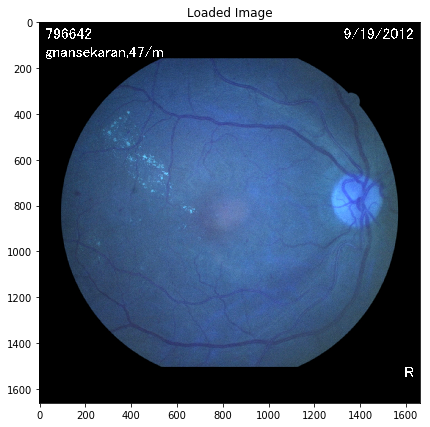

In [376]:
#Sample Preprocessing 
img = loadImage("image.jpg")

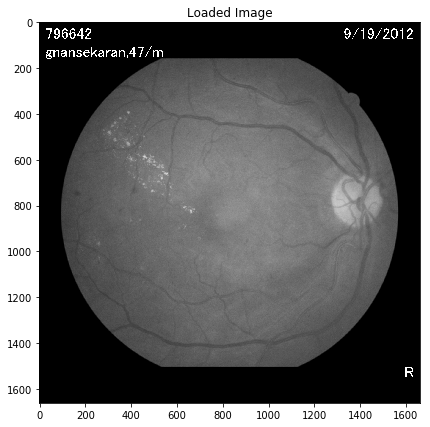

In [377]:
gray_img = loadImage("image.jpg", True)

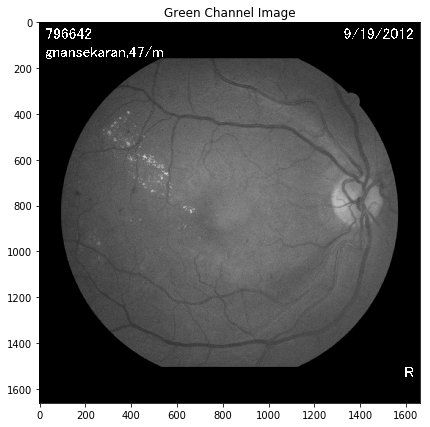

In [378]:
greenImage = greenChannel(img)

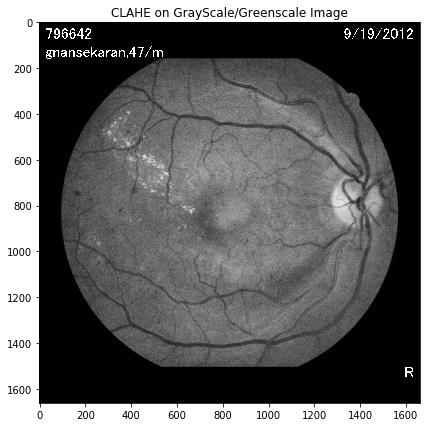

In [379]:
claheImage = applyClahe(greenImage)

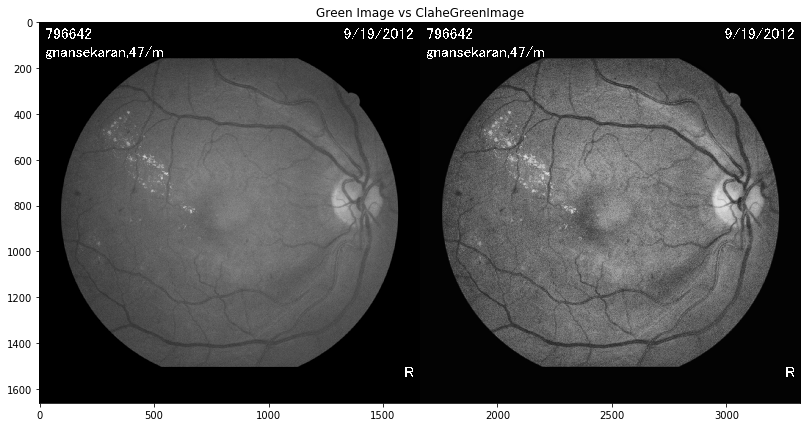

In [380]:
result = np.hstack((greenImage, claheImage))
#plt.rcParams["figure.figsize"] = (25,5)
plt.title("Green Image vs ClaheGreenImage")
plt.imshow(result, cmap='gray')

## Extracting Blood Vessels

In [381]:
def extract_bv(image):
    
        import cv2 as cv2
        
        b,green_fundus,r = cv2.split(image)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        contrast_enhanced_green_fundus = clahe.apply(green_fundus)

        # applying alternate sequential filtering (3 times closing opening)
        r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
        R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
        r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
        R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
        r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
        R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
        f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
        f5 = clahe.apply(f4)

        # removing very small contours through area parameter noise removal
        ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
        mask = np.ones(f5.shape[:2], dtype="uint8") * 255
        im2, contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            if cv2.contourArea(cnt) <= 200:
                cv2.drawContours(mask, [cnt], -1, 0, -1)
        im = cv2.bitwise_and(f5, f5, mask=mask)
        ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)
        newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)

        # removing blobs of unwanted bigger chunks taking in consideration they are not straight lines like blood
        #vessels and also in an interval of area
        fundus_eroded = cv2.bitwise_not(newfin)	
        xmask = np.ones(fundus_eroded.shape[:2], dtype="uint8") * 255
        x1, xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
        for cnt in xcontours:
            shape = "unidentified"
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)   
            if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
                shape = "circle"
            else:
                shape = "veins"
            if(shape=="circle"):
                cv2.drawContours(xmask, [cnt], -1, 0, -1)

        finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
        blood_vessels = cv2.bitwise_not(finimage)
        
        plt.title("Extracted Blood Vessels from RGB Image")
        plt.imshow(blood_vessels, cmap='gray')
        return blood_vessels

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

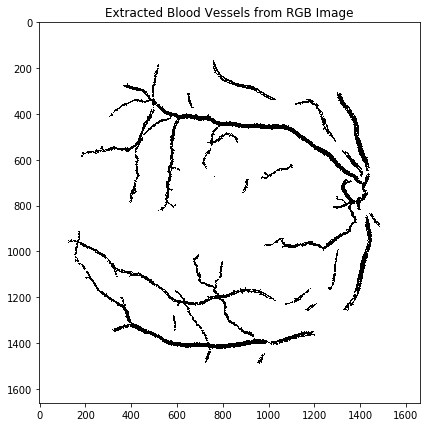

In [382]:
extract_bv(img)

In [383]:
img.shape

(1662, 1662, 3)

## Extracting MAs (Idk it is it correct)

In [384]:
#THIS IS NOT SO GOOD

def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

def extract_ma(image):
    r,g,b=cv2.split(image)
    comp=255-g
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
    histe=clahe.apply(comp)
    adjustImage = adjust_gamma(histe,gamma=3)
    comp = 255-adjustImage
    J =  adjust_gamma(comp,gamma=4)
    J = 255-J
    J = adjust_gamma(J,gamma=4)
    
    K=np.ones((11,11),np.float32)
    L = cv2.filter2D(J,-1,K)
    
    ret3,thresh2 = cv2.threshold(L,125,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    kernel2=np.ones((9,9),np.uint8)
    tophat = cv2.morphologyEx(thresh2, cv2.MORPH_TOPHAT, kernel2)
    kernel3=np.ones((7,7),np.uint8)
    opening = cv2.morphologyEx(tophat, cv2.MORPH_OPEN, kernel3)
    return opening

#https://github.com/tragu/microaneurysm_detection/blob/master/microaneurysm.py

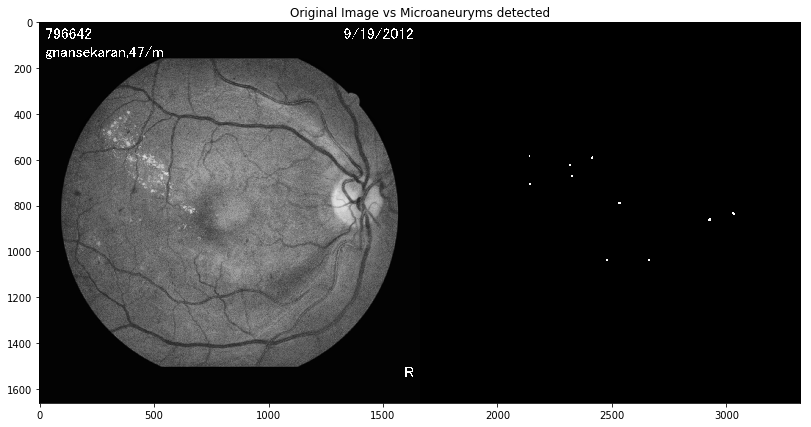

In [385]:
ma = extract_ma(img)

result = np.hstack((claheImage, ma))

plt.title("Original Image vs Microaneuryms detected");
plt.imshow(result, cmap='gray')

## Extraction lesions (Method 1)

##### Adjust threshold value , optimize it

In [386]:
from skimage import morphology

class BloodVessels:
    #img = cv2.imread("E:\\Rasheed Files\\Rasheed Data (DONOT DELETE)\\FYP\Dataset\\1\\30_left.jpeg")
    
    jpegImg = 0
    grayImg = 0
    curImg = 0
    
    
    def setImage(self, img):
        self.jpegImg = img
        self.curImg = np.array(img)    ##Convert jpegFile to numpy array (Required for CV2)


    def getImage(self):
        return self.curImg

        
    def greenComp(self):
    ###Extracting Green Component
        gcImg = self.curImg[:,:,1]
        self.curImg = gcImg
    
    
    def histEqualize(self):
        histEqImg = cv2.equalizeHist(self.curImg)
        self.curImg = histEqImg    


    def applyKirschFilter(self):
        gray = self.curImg
        if gray.ndim > 2:
            raise Exception("illegal argument: input must be a single channel image (gray)")
        kernelG1 = np.array([[ 5,  5,  5],
                             [-3,  0, -3],
                             [-3, -3, -3]], dtype=np.float32)
        kernelG2 = np.array([[ 5,  5, -3],
                             [ 5,  0, -3],
                             [-3, -3, -3]], dtype=np.float32)
        kernelG3 = np.array([[ 5, -3, -3],
                             [ 5,  0, -3],
                             [ 5, -3, -3]], dtype=np.float32)
        kernelG4 = np.array([[-3, -3, -3],
                             [ 5,  0, -3],
                             [ 5,  5, -3]], dtype=np.float32)
        kernelG5 = np.array([[-3, -3, -3],
                             [-3,  0, -3],
                             [ 5,  5,  5]], dtype=np.float32)
        kernelG6 = np.array([[-3, -3, -3],
                             [-3,  0,  5],
                             [-3,  5,  5]], dtype=np.float32)
        kernelG7 = np.array([[-3, -3,  5],
                             [-3,  0,  5],
                             [-3, -3,  5]], dtype=np.float32)
        kernelG8 = np.array([[-3,  5,  5],
                             [-3,  0,  5],
                             [-3, -3, -3]], dtype=np.float32)
    
        g1 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
        g2 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
        g3 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG3), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
        g4 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG4), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
        g5 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG5), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
        g6 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG6), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
        g7 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG7), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
        g8 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG8), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
        magn = cv2.max(g1, cv2.max(g2, cv2.max(g3, cv2.max(g4, cv2.max(g5, cv2.max(g6, cv2.max(g7, g8)))))))
        self.curImg = magn

    
    def applyThreshold(self):
        ret, threshImg = cv2.threshold(self.curImg,140,255,cv2.THRESH_BINARY_INV) #Adjust this
        self.curImg = threshImg

    
    def cleanSmallObjects(self):
        cleanImg = morphology.remove_small_objects(self.curImg, min_size=130, connectivity=100)
        self.curImg = cleanImg

In [387]:
bv = BloodVessels()

bv.setImage(img) #Input
bv.greenComp()
bv.histEqualize()
bv.applyKirschFilter()
bv.applyThreshold()
bv.cleanSmallObjects()

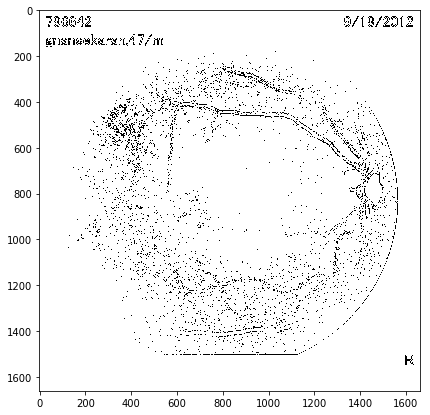

In [388]:
plt.imshow(bv.getImage(), cmap='gray')

## Extracting Exudates (Method 2)

In [552]:
#https://github.com/ebdulrasheed/Diabetic-Retinopathy-Feature-Extraction-using-Fundus-Images/blob/master/Exudates.py

class ExtractExudates:
    
    jpegImg = 0
    grayImg = 0
    curImg = 0

    def setImage(self, img):
        self.jpegImg = img
        self.curImg = np.array(img)    ##Convert jpegFile to numpy array (Required for CV2)

    def getImage(self):
        return self.curImg
        
    def greenComp(self):
    ###Extracting Green Component
        gcImg = self.curImg[:,:,1]
        self.curImg = gcImg

    def applyCLAHE(self):
    #Applying Contrast Limited Adaptive Histogram Equalization (CLAHE)
        self.curImg = applyClahe(self.curImg)
        
# create a CLAHE object (Arguments are optional).
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#claheImg = clahe.apply(clImg)
#cv2.imwrite('clahe_2.jpg',claheImg)

    def applyDilation(self):
        #Creating Structurig Element
        strEl = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
        #Dilation
        dilateImg = cv2.dilate(self.curImg, strEl)
        self.curImg = dilateImg

    def applyThreshold(self):
        #Thresholding with Complement/Inverse
        retValue, threshImg = cv2.threshold(self.curImg, 160, 255, cv2.THRESH_BINARY) #Change this to your convenience
        self.curImg = threshImg

    def applyMedianFilter(self):
        #Median Filtering
        medianImg = cv2.medianBlur(self.curImg,5)
        self.curImg = medianImg

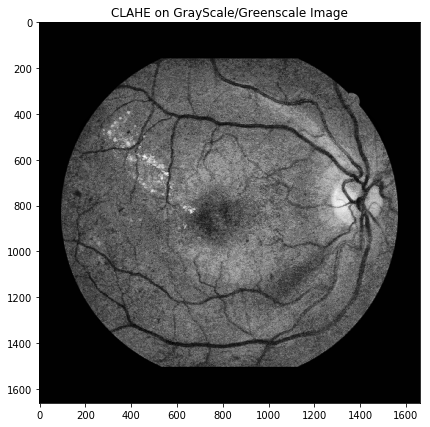

In [560]:
e = ExtractExudates()

e.setImage(img)

i1 = e.getImage()
e.greenComp()
i2 = e.getImage()
e.applyCLAHE()
#i3 = e.getImage()
#e.applyDilation()
i4 = e.getImage()
e.applyThreshold()
i5 = e.getImage()
e.applyMedianFilter()
i6 = e.getImage()

#res = np.hstack((i2,i3,i5,i6))

#plt.imshow(res, cmap='gray')


In [554]:
finalimg = e.curImg
initialimg = gray_img

#res = np.hstack((initialimg, finalimg))
#plt.imshow(res, cmap='gray')

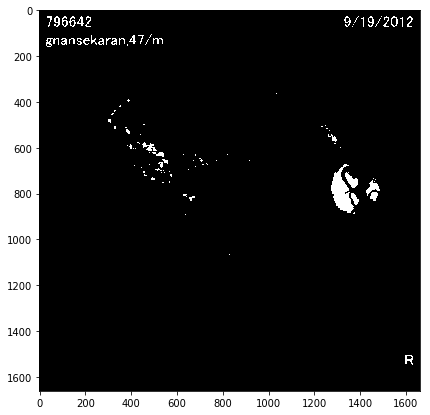

In [561]:
plt.imshow(finalimg, cmap='gray')

In [487]:
initialimg.shape

(1662, 1662)

In [488]:
finalimg.shape

(1865, 2487)

In [568]:
frame = img

if frame is None:
    print('Error loading image')
    exit()    

rows = frame.shape[0]
cols = frame.shape[1]

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV);

for i in range(0, cols):
    for j in range(0, rows):
        hsv[j, i][1] = 255;

frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR);



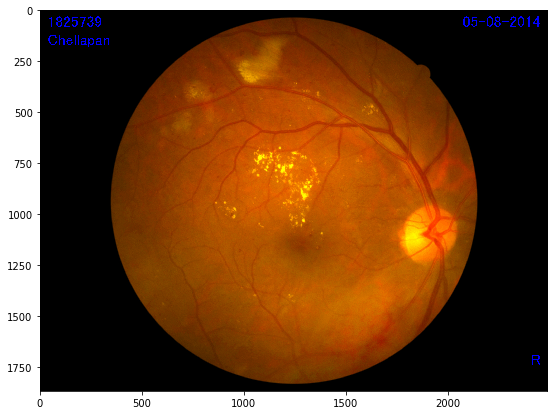

In [569]:
plt.imshow(frame)

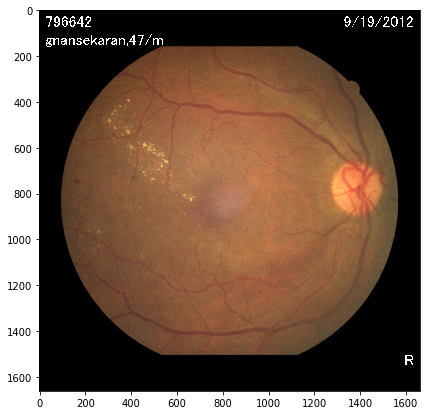

In [527]:
plt.imshow(img)

In [559]:
img = frame